In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.colors as mcolors
import warnings
import matplotlib.patches as patches
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42



In [2]:
sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=-1


In [3]:
sc.settings.figdir = "fig6"


In [4]:
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42


In [5]:
sc.settings.set_figure_params(dpi=50, dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))


In [6]:
import os
base_dir = '/nfs/team298/ls34/new_disease_atlas/model_scanvi5_EXTERNAL_OTHERTISSUES_4054/'
[x for x in os.listdir(base_dir) if x.startswith('adata_fbsonly')]

['adata_fbsonly_annotated.h5ad.final2',
 'adata_fbsonly_f6_nonskin2.h5ad',
 'adata_fbsonly_annotated.h5ad.final2.normalized',
 'adata_fbsonly_annotated.h5ad.final3.normalized',
 'adata_fbsonly_annotated.h5ad.final2.normalized.HLCA_only_extended',
 'adata_fbsonly.h5ad.countsonly.clustered6',
 'adata_fbsonly.h5ad.countsonly.clustered4',
 'adata_fbsonly_annotated.h5ad.final4_nonskinclustered.normalized',
 'adata_fbsonly.h5ad.countsonly.clustered3',
 'adata_fbsonly_annotated.h5ad.final4_nonskinclustered.normalized2',
 'adata_fbsonly_f6_nonskin2.h5ad.counts',
 'adata_fbsonly.h5ad.countsonly.clustered',
 'adata_fbsonly_f6_nonskin.h5ad',
 'adata_fbsonly_annotated.h5ad.final4_nonskinclustered.normalized_n100',
 'adata_fbsonly_annotated.h5ad.final',
 'adata_fbsonly.h5ad.countsonly',
 'adata_fbsonly.h5ad.countsonly.nostress',
 'adata_fbsonly.h5ad.countsonly.clustered5']

In [7]:
base_dir = '/nfs/team298/ls34/new_disease_atlas/model_scanvi5_EXTERNAL_OTHERTISSUES_4054/'




In [9]:
#adata=sc.read_h5ad(base_dir + "adata_fbsonly_annotated.h5ad.final3.normalized")
#adata=sc.read_h5ad(base_dir +   'adata_fbsonly_annotated.h5ad.final4_nonskinclustered.normalized2',)
adata=sc.read_h5ad(base_dir +  'adata_fbsonly_annotated.h5ad.final4_nonskinclustered.normalized_n100')
adata.shape
# Fig b

    #return LIST#adata=sc.read_h5ad(base_dir + "adata_fbsonly_annotated.h5ad.final3.normalized")
# #adata=sc.read_h5ad(base_dir +   'adata_fbsonly_annotated.h5ad.final4_nonskinclustered.normalized2',)
# adata=sc.read_h5ad(base_dir +  'adata_fbsonly_annotated.h5ad.final4_nonskinclustered.normalized_n100')
# adata.shape
# # Fig b
# RENAME = {"Non-skin1": "Non-skin",
#           "Non-skin2": "Non-skin",
#          }
# adata.obs["clusters"]=adata.obs["clusters"].map(RENAME).fillna(adata.obs["clusters"])
# adata.obs["clusters2"]=adata.obs["clusters2"].map(RENAME).fillna(adata.obs["clusters2"])



/nfs/team361/aa36/PythonEnvs_2/envinflowdec27/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


(1020542, 17143)

In [10]:
RENAME = {"Non-skin1": "Non-skin",
          "Non-skin2": "Non-skin",
         }
adata.obs["clusters"]=adata.obs["clusters"].map(RENAME).fillna(adata.obs["clusters"])
adata.obs["clusters2"]=adata.obs["clusters2"].map(RENAME).fillna(adata.obs["clusters2"])

def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata.var_names]  for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata.var_names]

In [11]:
# adata_lesional.write('/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas/adata_lesional11.h5ad')


In [12]:
# adata=sc.read_h5ad(base_dir +  'adata_fbsonly.h5ad.countsonly.clustered6')
# adata

In [13]:
adata.obs["annotation2"].value_counts()

annotation2
Endometrial                       145583
F2: Universal                     138796
Lung                              121393
F1: Superficial                   119486
F2/3: Stroma_PPARG+                78890
Intestine                          75724
F3: FRC-like                       74632
F4: DS_DPEP1+                      55221
Heart                              48746
F8: Fascia-like myofibroblast      38659
F7: Myofibroblast                  29196
Synovium                           20322
F4: TNN+COCH+                      17885
F5: NGFR+                          14277
F5: RAMP1+                         10623
Nasal mucosa                       10014
F6: Inflammatory myofibroblast      9827
F_Fascia                            4310
F4: DP_HHIP+                        3526
Skin                                3432
Name: count, dtype: int64

In [14]:
adata.X[:6,:6].todense()

matrix([[0.        , 0.        , 0.45830759, 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.8214543 , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.55074108, 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.43679356, 0.        , 0.58878396,
         0.        ],
        [0.        , 0.        , 1.00177025, 0.        , 0.        ,
         0.        ]])

In [15]:
# adata_f6_nonskin=adata[adata.obs["annotation2"].str.startswith("F6")]

In [16]:
# adata_f6_nonskin.write(base_dir + "adata_fbsonly_f6_nonskin2.h5ad.counts")

In [17]:
base_dir + "adata_fbsonly_f6_nonskin2.h5ad.counts"

'/nfs/team298/ls34/new_disease_atlas/model_scanvi5_EXTERNAL_OTHERTISSUES_4054/adata_fbsonly_f6_nonskin2.h5ad.counts'

In [18]:
import os
os.listdir('/nfs/team298/ls34/new_disease_atlas/model_scanvi5_EXTERNAL_OTHERTISSUES_4054/')

['adata_CROSSDISEASEforinflow.h5ad',
 'adata_fbsonly_annotated.h5ad.final2',
 'adata_fbsonly_f6_nonskin2.h5ad',
 'adata_fbsonly_annotated.h5ad.final2.normalized',
 'adata_mappedonly_notatlas.h5ad.counts',
 'adata_fbsonly_annotated.h5ad.final3.normalized',
 'adata_skin_and_lung.h5ad.integrated',
 'adata_fbsonly_annotated.h5ad.final2.normalized.HLCA_only_extended',
 'adata_myofbs.h5ad.postplots',
 'adata_ibd_taurus.h5ad.final2',
 'adata_fbsonly.h5ad.countsonly.clustered6',
 'adata_fbs_hlca_withoutnewclustering.h5ad',
 'adata_all_scvi5.h5ad.countsonly.subsampled',
 'adata_skin_and_lung.h5ad',
 'adata_f3only.h5ad',
 'adata_fbsonly.h5ad.countsonly.clustered4',
 'model.pt',
 'adata_fbsonly_annotated.h5ad.final4_nonskinclustered.normalized',
 'adata_all_scvi5.h5ad.countsonly',
 'adata_HLCA_fbs.integrated.normalized',
 'adata_fbsonly.h5ad.countsonly.clustered3',
 'adata_skin_and_lung.h5ad.HVGS',
 'adata_myofbs.h5ad',
 'adata_fbsonly_annotated.h5ad.final4_nonskinclustered.normalized2',
 'adata_

In [19]:
adata.obs["disease_id"].value_counts()

disease_id
Healthy                                222467
Skin                                   186094
Nonlesional                            169566
Endometrial                            145583
IBD                                     63134
Psoriasis                               54843
Heart                                   48746
COVID-19                                36578
RA                                      20322
Pulmonary fibrosis                      18105
Eczema                                  11034
Keloid                                   7837
Interstitial lung disease                6216
Rhinosinusitis w nasal polyps            5933
Lyme_disease/Erythema migrans            5604
Dupuytren                                5038
PSM                                      3521
SCLE                                     1921
Prurigo                                  1751
irAE                                     1327
Chronic rhinitis                         1203
Lung cancer - adenocarc

In [20]:
adata.obs["disease_id"].nunique()

30

In [21]:
# adata_f3=adata22[adata22.obs["clusters2"].str.startswith("F3")]
# adata_f3.obs["disease_id2"].value_counts()
# adata_f3.write(base_dir +  'adata_f3only.h5ad')
# base_dir +  'adata_f3only.h5ad'

In [22]:
adata.X[:6,:6].todense()

matrix([[0.        , 0.        , 0.45830759, 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.8214543 , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.55074108, 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.43679356, 0.        , 0.58878396,
         0.        ],
        [0.        , 0.        , 1.00177025, 0.        , 0.        ,
         0.        ]])

In [23]:
adata.obs.clusters2.value_counts()

clusters2
Non-skin                          382071
F2: Universal                     179897
F2/3: Perivascular                129866
F1: Superficial                    71876
F4: Hair-follicle associated       65680
F3: FRC-like                       63723
F8: Fascia-like myofibroblast      44435
F6: Inflammatory myofibroblast     23881
F7: Myofibroblast                  21272
Non-skin myofibroblast             17403
F5: NGFR+                          12569
F5: RAMP1+                          7146
F_Fascia                             723
Name: count, dtype: int64

In [24]:
sc.settings.set_figure_params(dpi=50,dpi_save=300, facecolor="white", frameon=False, figsize=(8, 8))


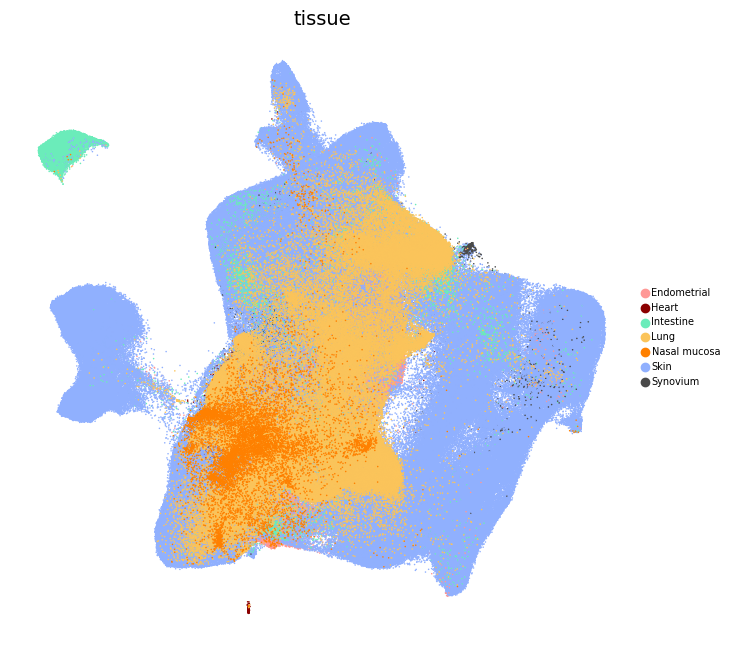

In [25]:
# # Define the color mapping
# COLORS = {
#     'Skin': "#90b0fe",
#     'Nasal mucosa': "#ec4459",
#  #   'Skin SSc': "#c9a0dc",
#     'Intestine': "#6BECBA",
#     'Heart': "#e8e0df",
#     'Synovium': "#9d54bb",
#     'Endometrial': "#bbc8e6",
#     'Lung': "#f4c2c2",  # Light pink for Lung
#     "Lung_IPF (?HLCA repeat)": "#f4c2c2", 
# }
# Define the color mapping
COLORS = {
    'Skin': "#90b0fe",# "#8ddae4",
    'Nasal mucosa': "#FF8000",
 #   'Skin SSc': "#c9a0dc",
    'Intestine': "#6BECBA",
    'Heart': "#8B0000",
    'Synovium': "#4A4A4A",
    'Endometrial':  "#ff9896",# "#FF66A1",
    'Lung':  "#fbc45a",# bRown#F0E0D6",#"#E4D1B9",#"#8E4585",# "#E6E6FA", ##"#ffc658",#"#FFFFE0",  #¢"#9B59B6", #"#aa40fc",#"#c6b0d5",#"#FFFF00",#"#f4c2c2",  # Light pink for Lung
}
#ffc658
# COLORS = {
#     'Skin': "#A1C8F3",  # A softer blue, warmer and more sophisticated than the original #90b0fe
#     'Nasal mucosa': "#FF6F00",  # A toned-down bright orange, still vibrant but more refined than #FF8000
#     'Intestine': "#4ECDC4",  # A more muted turquoise, less harsh than #6BECBA but still fresh
#     'Heart': "#B22222",  # A deep, rich red that feels more mature and grounded compared to #8B0000
#     'Synovium': "#707070",  # A softer, warmer grey with a little more character than #4A4A4A
#     'Endometrial': "#FFB6B9",  # A gentler, muted pinkish shade, more balanced than #FF9896
#     'Lung': "#8E44AD",  # A deeper, more elegant purple compared to #9B59B6
#     "Lung_IPF (?HLCA repeat)": "#8E44AD",  # Same as 'Lung', keeping it consistent
# }
# Ensure 'tissue' is a categorical variable
adata.obs["tissue"] = adata.obs["tissue"].astype("category")

# Match color order with tissue categories
adata.uns["tissue_colors"] = [COLORS[t] for t in adata.obs["tissue"].cat.categories]


sc.pl.umap(
    adata,
    color="tissue",
    s=5,
    legend_fontsize=7,
    save="fig6_fbs_bytissue.pdf"

)

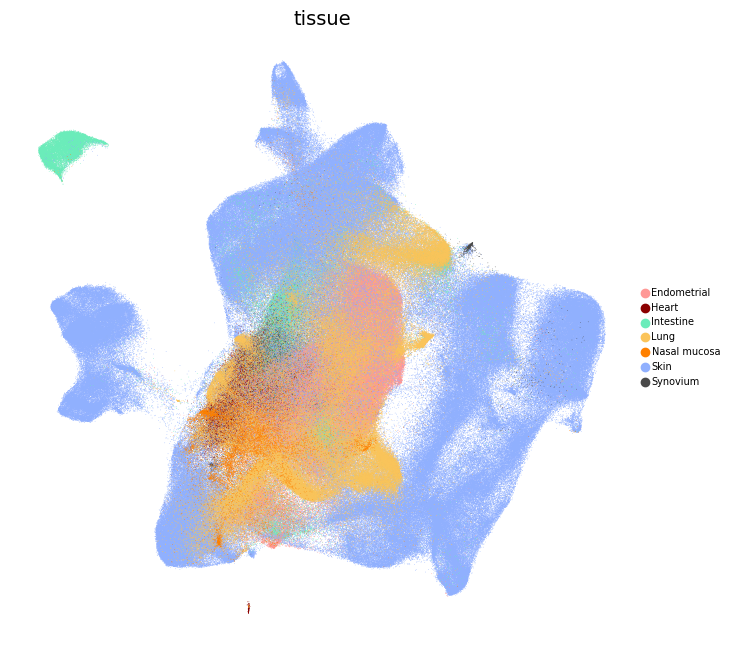

In [26]:
# # Define the color mapping
# COLORS = {
#     'Skin': "#90b0fe",
#     'Nasal mucosa': "#ec4459",
#  #   'Skin SSc': "#c9a0dc",
#     'Intestine': "#6BECBA",
#     'Heart': "#e8e0df",
#     'Synovium': "#9d54bb",
#     'Endometrial': "#bbc8e6",
#     'Lung': "#f4c2c2",  # Light pink for Lung
#     "Lung_IPF (?HLCA repeat)": "#f4c2c2", 
# }
# Define the color mapping
COLORS = {
    'Skin': "#90b0fe",# "#8ddae4",
    'Nasal mucosa': "#FF8000",
 #   'Skin SSc': "#c9a0dc",
    'Intestine': "#6BECBA",
    'Heart': "#8B0000",
    'Synovium': "#4A4A4A",
    'Endometrial':  "#ff9896",# "#FF66A1",
    'Lung':  "#fbc45a",# bRown#F0E0D6",#"#E4D1B9",#"#8E4585",# "#E6E6FA", ##"#ffc658",#"#FFFFE0",  #¢"#9B59B6", #"#aa40fc",#"#c6b0d5",#"#FFFF00",#"#f4c2c2",  # Light pink for Lung
    "Lung_IPF (?HLCA repeat)": "#ffc658",# "#FFFFE0",  # ¢"#9B59B6", #"#aa40fc",# "#c6b0d5",#"#FFFF00",# "#f4c2c2", 
}
#ffc658
# COLORS = {
#     'Skin': "#A1C8F3",  # A softer blue, warmer and more sophisticated than the original #90b0fe
#     'Nasal mucosa': "#FF6F00",  # A toned-down bright orange, still vibrant but more refined than #FF8000
#     'Intestine': "#4ECDC4",  # A more muted turquoise, less harsh than #6BECBA but still fresh
#     'Heart': "#B22222",  # A deep, rich red that feels more mature and grounded compared to #8B0000
#     'Synovium': "#707070",  # A softer, warmer grey with a little more character than #4A4A4A
#     'Endometrial': "#FFB6B9",  # A gentler, muted pinkish shade, more balanced than #FF9896
#     'Lung': "#8E44AD",  # A deeper, more elegant purple compared to #9B59B6
#     "Lung_IPF (?HLCA repeat)": "#8E44AD",  # Same as 'Lung', keeping it consistent
# }
# Ensure 'tissue' is a categorical variable
adata.obs["tissue"] = adata.obs["tissue"].astype("category")

# Match color order with tissue categories
adata.uns["tissue_colors"] = [COLORS[t] for t in adata.obs["tissue"].cat.categories]


sc.pl.umap(
    adata,
    color="tissue",
    s=1,
    legend_fontsize=7,
    save="fig7_fbs_bytissue.pdf"

)

/nfs/team361/aa36/PythonEnvs_2/envinflowdec27/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1148: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



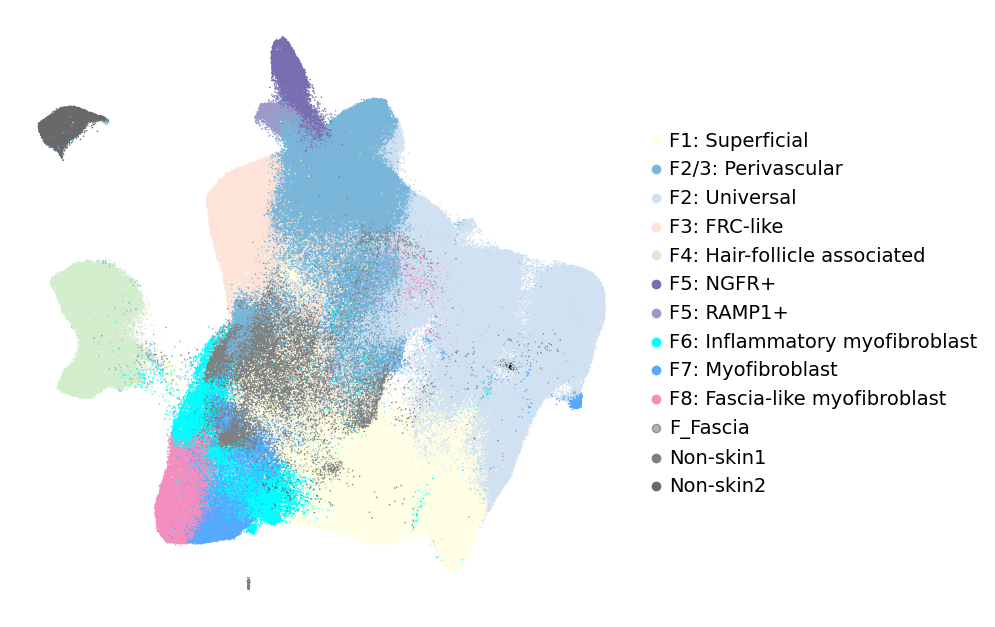

In [67]:
COLORS = {
    "F1: Superficial": np.array([1.0, 1.0, 0.898, 1.0]),
    "F1: Regenerative": np.array([0.996, 0.809, 0.396, 1.0]),
    "F2: Universal": np.array([0.814, 0.884, 0.950, 1.0]),
    "F2/3: Perivascular": np.array([0.473, 0.712, 0.851, 1.0]),
    "F3: FRC-like": np.array([0.997, 0.896, 0.849, 1.0]),
    "F4: DS_DPEP1+": np.array([0.827, 0.933, 0.803, 1.0]),
        "F4: Hair-follicle associated": np.array([0.827, 0.933, 0.803, 1.0]),

    "F4: TNN+COCH+": np.array([0.502, 0.791, 0.501, 1.0]),
    "F4: DP_HHIP+": np.array([0.153, 0.562, 0.283, 1.0]),
    "F5: RAMP1+": np.array([0.618, 0.602, 0.783, 1.0]),
        "F5: Schwann-like": np.array([0.618, 0.602, 0.783, 1.0]),

    "F5: NGFR+": np.array([0.473, 0.433, 0.699, 1.0]),
        "F6/7/8: Myofibroblast": np.array([0.0, 1.0, 1.0, 1.0]),

    "F6: Inflammatory myofibroblast": np.array([0.0, 1.0, 1.0, 1.0]),
    "F7: Myofibroblast": np.array([0.333, 0.667, 1.0, 1.0]),
    "F8: Fascia-like myofibroblast": np.array([0.957, 0.557, 0.745, 1.0]),
    "F_Fascia": np.array([0, 0, 0, 0.3]),
    
    "Pericyte": "#8B0000",  # Dark red
    "Non-skin0": "#A9A9A9",  # Dark grey
    "Non-skin1": "#808080",  # Medium grey
    "Non-skin2": "#696969",  # Dim grey
    "Myofibroblast PRG4+": "#585858",  # Slate grey
    "Non-skin myofibroblast": "#E0E0E0",  # Slate grey

    "Other": '#FFFFFF',  # Light grey
        'Skin': "#90b0fe",# "#8ddae4",
    'Nasal mucosa': "#FF8000",
 #   'Skin SSc': "#c9a0dc",
    'Intestine': "#6BECBA",
    'Heart': "#8B0000",
    'Synovium': "#000000", #"#4A4A4A",
    'Endometrial':  "#ff9896",# "#FF66A1",
    'Lung':"#FFD700",  #¢"#9B59B6", #"#aa40fc",#"#c6b0d5",#"#FFFF00",#"#f4c2c2",  # Light pink for Lung
    "Lung_IPF (?HLCA repeat)": "#FFD700",  
}

adata.obs["clusters_final"] = adata.obs["clusters_final"].astype("category")
adata.uns["clusters_final_colors"] = [COLORS[cat] for cat in adata.obs["clusters_final"].cat.categories]

# adata.obs["clusters2"] = adata.obs["clusters2"].astype("category")
# adata.uns["clusters2_colors"] = [COLORS[cat] for cat in adata.obs["clusters2"].cat.categories]




for n in [5]:
    sc.pl.umap(
        adata,
        color="clusters_final",
        s=n,
        vmax=2,
        vmin=0,
        #legend_loc="on data",
        legend_fontoutline=2,
        legend_fontsize=14,
        title='',
        #save = f"fig7b_pointsize{n}.pdf"
    )


NameError: name 'adata' is not defined

In [70]:
adata

AnnData object with n_obs × n_vars = 1020542 × 17143
    obs: 'sample_id', 'dataset_id', 'Site_status', 'Patient_status', 'Location', 'Site_status_binary', 'lvl5_annotation_tomap', 'Mapping_status2', 'leiden_res0.1', 'lvl5_annotation', 'tissue', 'leiden_res1', 'leiden_res0.5', 'disease_id', 'annotation2', 'annotation', 'clusters', 'final_plot', 'clusters2', 'clusters_archive', 'disease_id2', 'original_annotation', 'disease_cat_crosstissue', 'clusters3', 'clusters3_counts', 'clusters4', 'clusters4_counts', 'test', 'clusters5', 'clusters5_counts', 'clusters6', 'clusters6_counts', 'clusters_final', 'clusters_final_counts', 'clusters_final2'
    uns: 'clusters3', 'clusters3_colors', 'clusters4_colors', 'clusters5_colors', 'clusters6_colors', 'clusters_final2', 'log1p', 'neighbor_20', 'neighbors', 'test_colors', 'umap', 'clusters_final_colors'
    obsm: 'X_scvi', 'X_umap'
    obsp: 'connectivities', 'distances', 'neighbor_20_connectivities', 'neighbor_20_distances'

In [72]:
# del(adata.uns["clusters_final_colors"])

# adata.write('/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas/adata_crosstissue_fbsonly_normalized.h5ad')

In [3]:
# import scanpy as sc
# adata=sc.read_h5ad('/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas/adata_crosstissue_fbsonly_normalized.h5ad')

/nfs/team361/aa36/PythonEnvs_2/envinflowdec27/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
# import pickle

# # build it
# mapping_dict = adata.obs["clusters_final"].to_dict()

# # dump it in the working directory
# with open("crosstissuelabels.pkl", "wb") as fh:
#     pickle.dump(mapping_dict, fh, protocol=pickle.HIGHEST_PROTOCOL)

In [1]:
# import scanpy as sc
# sc.read_h5ad('/nfs/team298/ls34/new_disease_atlas/model_scanvi5_EXTERNAL_OTHERTISSUES_4054/adata_fbsonly.h5ad.countsonly.clustered5')
# adata

/nfs/team361/aa36/PythonEnvs_2/envinflowdec27/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


NameError: name 'adata' is not defined

In [ ]:
# adata.X[:6,:6].todense()

In [28]:
try:
    del(adata.uns["tissue_colors"])
except:
    1
try:
    del(adata.uns["clusters_final2_colors"])
except:
    1
try:
    del(adata.uns["clusters_final_colors"])
except:
    1#del(adata.uns["clusters_colors"])
#del(adata.uns["clusters2_colors"])

In [29]:
adata2=adata
adata3=adata[adata.obs["tissue"]!="Skin"]
adata4 = adata3[~adata3.obs["clusters_final"].str.startswith("Non")]
adata4.obs.tissue.value_counts()

tissue
Lung            103577
Endometrial     100821
Intestine        52152
Synovium         13514
Heart            10155
Nasal mucosa      6450
Name: count, dtype: int64

In [30]:
# # Create mapping dictionary from adata_myofb
# mapping_dict = adata_myofb.obs["test"].to_dict()

import pickle
with open("/nfs/team298/ls34/hlca_fb_labels_merged.pkl", "rb") as file:
    hlca_labels = pickle.load(file)

adata.obs["original_annotation"] = (
     adata.obs.index.to_series().map(hlca_labels).fillna(adata.obs["tissue"])
)
adata.obs["original_annotation"].value_counts()



original_annotation
Skin                             598760
Endometrial                      145583
Intestine                         75724
Heart                             48746
Alveolar fibroblasts              47649
Adventitial fibroblasts           27094
Peribronchial fibroblasts         26284
Synovium                          20322
Nasal mucosa                      10014
None                               6692
Lung                               5416
Subpleural fibroblasts             2820
3_Myofibroblasts                   2313
Fibroblasts PLIN2+                 2062
Pericytes                           335
Activated myofibroblasts            204
Lipofibroblasts                     162
Secondary crest myofibroblast       135
Fibroblasts WIF1+ CHRM2+            114
Nerve-associated fibroblasts         63
NK cells                             27
EC aerocyte capillary                 7
Multiciliated                         4
Alveolar macrophages                  4
Plasma cells        

In [31]:
with open('/nfs/team298/ls34/ibd_fb_labels.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

adata.obs["original_annotation"] = (
     adata.obs.index.to_series().map(loaded_dict).fillna(adata.obs["original_annotation"])
)
adata.obs["original_annotation"].value_counts()



original_annotation
Endometrial                       145583
F2: Universal                     132155
F1: Superficial                    95826
Skin                               76810
F2/3: Stroma_PPARG+                69237
Intestine                          66277
F3: FRC-like                       61385
F4: DS_DPEP1+                      49640
Heart                              48746
Alveolar fibroblasts               47649
F7: Fascia-like myofibroblast      38657
Adventitial fibroblasts            27094
F6: Myofibroblast                  26832
Peribronchial fibroblasts          26284
Synovium                           20322
F4: TNN+COCH+                      13348
F5: NGFR+                          13021
Nasal mucosa                       10014
F5: RAMP1+                          8951
None                                6692
F6: Inflammatory myofibroblast      5732
Lung                                5416
F_Fascia                            4155
Transitional Stromal 3 (C3+)        3

In [32]:
adata_i = adata[adata.obs["dataset_id"]=="Gut_postnatal"]

In [33]:
adata_ii = adata_i[adata_i.obs["clusters_final"].str.startswith("F3")]


In [34]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [55]:
import pickle

# Define the file path where the dictionary is saved
file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

with open(file_path, 'rb') as file:
    LESIONAL_DICT = pickle.load(file)

print("Dictionary loaded successfully.")

Dictionary loaded successfully.


In [56]:
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata.var_names]
    return LIST

# HLCA

In [37]:
1

1

In [57]:
adata_i = adata[adata.obs["dataset_id"]=="HLCA"]

In [58]:
adata_i=adata_i.copy()

In [47]:
adata_i.X[:5,:5].todense()

matrix([[0.      , 0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      , 0.      ],
        [2.254129, 0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      , 0.      ]])

In [59]:
LESIONAL_DICT = remove_markers(LESIONAL_DICT)
LESIONAL_DICT

{'F3': ['CCL19', 'CD74', 'CH25H', 'CXCL9'],
 'F1': ['COL18A1',
  'COL23A1',
  'COL13A1',
  'NKD2',
  'CRABP1',
  'TNFRSF21',
  'CXCL1'],
 'F1+F6': ['WNT5A', 'COL7A1'],
 'F6': ['CXCL8',
  'CXCL5',
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'CHI3L1',
  'CCL5',
  'FAM167A',
  'HIF1A'],
 'F6+F7': ['WNT2', 'COL10A1', 'LAMP5'],
 'F7': ['NRG1', 'OGN'],
 'F6-F8': ['ACTA2',
  'TAGLN',
  'ASPN',
  'COMP',
  'COL11A1',
  'ZNF469',
  'RUNX2',
  'SULF1',
  'ADAM12',
  'ADAM19',
  'COL8A1',
  'CREB3L1',
  'CTHRC1',
  'FABP5',
  'CDH2'],
 'F7+F8': ['C1QTNF3', 'CADM1', 'LRRC17', 'PIEZO2', 'SFRP4', 'KCNMA1'],
 'F8': ['ACAN', 'SCX', 'THBS4', 'ITGA10', 'FGF18', 'PRG4', 'CRTAC1']}

In [64]:
adata

AnnData object with n_obs × n_vars = 1020542 × 17143
    obs: 'sample_id', 'dataset_id', 'Site_status', 'Patient_status', 'Location', 'Site_status_binary', 'lvl5_annotation_tomap', 'Mapping_status2', 'leiden_res0.1', 'lvl5_annotation', 'tissue', 'leiden_res1', 'leiden_res0.5', 'disease_id', 'annotation2', 'annotation', 'clusters', 'final_plot', 'clusters2', 'clusters_archive', 'disease_id2', 'original_annotation', 'disease_cat_crosstissue', 'clusters3', 'clusters3_counts', 'clusters4', 'clusters4_counts', 'test', 'clusters5', 'clusters5_counts', 'clusters6', 'clusters6_counts', 'clusters_final', 'clusters_final_counts', 'clusters_final2'
    uns: 'clusters3', 'clusters3_colors', 'clusters4_colors', 'clusters5_colors', 'clusters6_colors', 'clusters_final2', 'log1p', 'neighbor_20', 'neighbors', 'test_colors', 'umap'
    obsm: 'X_scvi', 'X_umap'
    obsp: 'connectivities', 'distances', 'neighbor_20_connectivities', 'neighbor_20_distances'

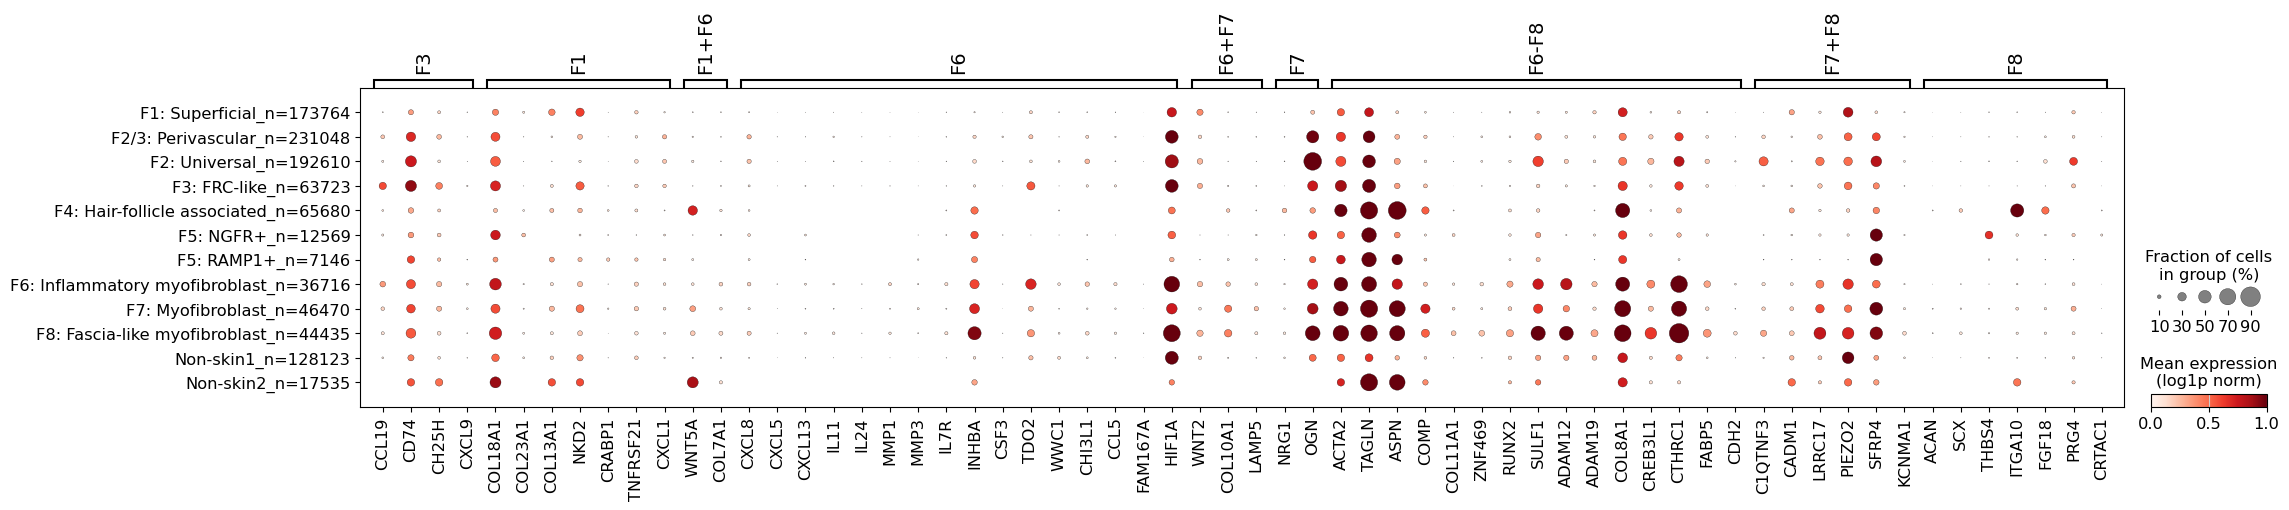

In [65]:
sc.pl.dotplot(
    adata_i,
    LESIONAL_DICT,
    groupby='clusters_final2',
    colorbar_title='Mean expression\n(log1p norm)', 
    #standard_scale="var",
    dendrogram=False,
    vmax=1
)


In [ ]:
ALLGENES_REMOVE_F4 = {'F1': ['APCDD1',
  'COL18A1',
  'COL23A1',
  'COL13A1',
  'NKD2',
  'RSPO1',
  'AXIN2',
  'WIF1',
  'CRABP1',
  'TNFRSF21'],
 'F2: Universal': ['CD34',
  'PI16',
  'DPP4',
  'MFAP5',
  'PCOLCE2',
  'SLPI',
  'CD70',
  'LGR5'],
 'F2/3: Bridge': ['CXCL12',
  'APOE',
  'APOC1',
  'C7',
  'PLA2G2A',
  'PPARG',
  'MYOC',
  'GDF10'],
 'F3': ['CCL19',
  'CD74',
  'CH25H',
  'TNFSF13B',
  'IL33',
  'IRF8',
  'IL15',
  'HLA-DRA',
  'ADAMDEC1',
  'CXCL9'],
 # 'F4: DS_DPEP1+': ['DPEP1', 'MYL4'],
 # 'F4: TNN+COCH+': ['TNN', 'COCH', 'RSPO4', 'MKX'],
 'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A'],
 'F5: RAMP1+': ['RAMP1', 'RELN'],
 'F5: NGFR+': ['EBF2', 'NGFR', 'ITGA6', 'CLDN1', 'CDH19'],
 'F1+F6': ['WNT5A', 'COL7A1'],
 'F6': ['CXCL8',
  'CXCL5',
  'CXCL6',
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'CHI3L1',
  'CCL5',
  'CCL11',
  'HIF1A'],
 'F6+F7': ['WNT2', 'COL10A1', 'LAMP5'],
 'F7': ['NRG1', 'OGN'],
 'F6-8': ['ACTA2',
  'TAGLN',
  'ASPN',
  'COMP',
  'COL11A1',
  'KIF26B',
  'ZNF469',
  'RUNX2',
  'SULF1',
  'ADAM12',
  'COL8A1',
  'LRRC15',
  'CREB3L1',
  'CTHRC1',
  'CCN4',
  'FABP5',
  'CDH2'],
 'F7+F8': ['C1QTNF3', 'CADM1', 'LRRC17', 'PIEZO2', 'SFRP4', 'KCNMA1']}
adata4=adata4[adata4.obs["clusters2"]!="F4: Hair-follicle associated"] # remove F4 as almost entirely from skin
counts = adata4.obs["clusters2"].value_counts()
new_labels = {label: f"{label}_n={counts[label]}" for label in counts.index}
adata4.obs["clusters2_counts"] = adata4.obs["clusters2"].map(new_labels)
sc.pl.dotplot(
    adata4,
    remove_markers(ALLGENES_REMOVE_F4),
    groupby=f'clusters2_counts',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
        save="7d_dotplot_nonskinfbs.pdf"

    #save="dotplot_wounds.pdf"
)

In [ ]:
import pickle

# Define file path
file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

# Load the object
with open(file_path, 'rb') as file:
    GENES = pickle.load(file)


ALL_GENES = {
    "F1": GENES["F1"],
    "F3": GENES["F3"],
    "F6": GENES["F6"],
    "F7": GENES["F7"],
    "F8": GENES["F8"]
}
GENES

In [ ]:
# # # Plot using the filtered data
# # sc.pl.dotplot(
# #     filtered_adata,
# #     remove_markers(ALL_GENES),
# #     groupby='original_annotation_counts',
# #     colorbar_title='Mean expression\n(log1p norm)', 
# #     #standard_scale="var",
# #     dendrogram=False,
# #     vmax=1
# # )
# # sc.pl.dotplot(
# #     filtered_adata,
# #     remove_markers(LESIONAL_DICT),
# #     groupby='original_annotation_counts',
# #     colorbar_title='Mean expression\n(log1p norm)', 
# #     #standard_scale="var",
# #     dendrogram=False,
# #     vmax=1
# # )
# sc.pl.dotplot(
#     adata4,
#     remove_markers(ALL_GENES),
#     groupby=f'clusters2_counts',
#     #vmax=1.1,
#     colorbar_title='Mean expression\n(variance scaled)', 
#    standard_scale="var",
#     dendrogram=False,
#         save="7d_dotplot_nonskinfbs.pdf"

#     #save="dotplot_wounds.pdf"
# )

In [ ]:
import pickle

pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)



import pickle

pickle_file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

with open(pickle_file_path, 'rb') as file:
    LESIONAL_GENES_VSHORT5 = pickle.load(file)





In [ ]:
sc.pl.dotplot(
    adata4,
    remove_markers(reynolds_short_final),
    groupby=f'clusters2_counts',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
        #save="7d_dotplot_nonskinfbs.pdf"

    #save="dotplot_wounds.pdf"
)

sc.pl.dotplot(
    adata4,
    remove_markers(LESIONAL_GENES_VSHORT5),
    groupby=f'clusters2_counts',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
      #  save="7d_dotplot_nonskinfbs.pdf"

    #save="dotplot_wounds.pdf"
)

In [ ]:
adata.obs["clusters2"]=adata.obs["clusters_final"]

In [ ]:

# # Set up the subplot grid with one row and as many columns as there are gene sets
# fig, axes = plt.subplots(1, len(ALL_GENES), figsize=(len(ALL_GENES) * 6, 6))  #

# # Loop through each gene set and plot the dotplots in the subplots
# for i, POPULATION in enumerate(ALL_GENES.keys()):
#     adata_ii = adata[adata.obs["clusters2"].str.startswith(POPULATION)]
#     #ORDER_TEMP = [x for x in ORDER if x in adata_ii.obs["disease_id"].unique()]

#     # Create the dotplot on the i-th axis
#     sc.pl.dotplot(
#         adata_ii,
#         remove_markers(ALL_GENES[POPULATION]), cmap="Reds",
#         groupby="disease_id2", vmax=1, colorbar_title='Mean expression\n(variance scaled)',
#         standard_scale="var", 
#         dendrogram=False,
#         title=POPULATION,
#         #categories_order=ORDER_TEMP,
#         ax=axes[i],  # Place the plot in the correct subplot
#         show=False  # To prevent the plot from displaying immediately
#     )

# # Adjust layout and show the plot
# #plt.savefig("all_disease_gene_expression.pdf", dpi=300, bbox_inches="tight") 

# plt.tight_layout()
            
# plt.show()

In [ ]:
fig, axes = plt.subplots(1, len(ALL_GENES), figsize=(len(ALL_GENES) * 6, 6))

for i, POPULATION in enumerate(ALL_GENES.keys()):
    # Subset the data for the specific population
    adata_ii = adata[adata.obs["clusters2"].str.startswith(POPULATION)].copy()

    # Compute counts *within* this subset
    tissue_counts = adata_ii.obs["tissue"].value_counts()

    # Filter out categories with too few counts (optional)
    min_count = 5  
    tissue_counts = tissue_counts[tissue_counts > min_count]
    
    # Create formatted labels with counts (thousand separator)
    adata_ii.obs["tissue_with_counts"] = adata_ii.obs["tissue"].map(
        lambda x: f"{x} (n={tissue_counts.get(x, 0):,})"  # <- Adds comma separator
    )

    # Make the dotplot using the new grouped column
    dp = sc.pl.dotplot(
        adata_ii,
        remove_markers(ALL_GENES[POPULATION]),
        cmap="Reds",
        groupby="tissue_with_counts",  # Use new formatted column
        colorbar_title="Mean expression\n(log1p norm)" if i == 0 else None,  # <- Hide legend on others
        vmax=1.2,
        dendrogram=False,
        title=POPULATION,
        ax=axes[i],
        show=False,
        dot_max=0.8
    )
    

plt.tight_layout()
plt.show()

In [ ]:
ALL_GENES2 = {key: value for key, value in ALL_GENES.items() if key != "F1"}

In [ ]:
fig, axes = plt.subplots(1, len(ALL_GENES), figsize=(len(ALL_GENES) * 6, 6))

for i, POPULATION in enumerate(ALL_GENES2.keys()):
    # Subset the data for the specific population
    adata_ii = adata[adata.obs["clusters2"].str.startswith(POPULATION)].copy()

    # Compute counts *within* this subset
    tissue_counts = adata_ii.obs["tissue"].value_counts()

    # Filter out categories with too few counts (optional)
    min_count = 5  
    tissue_counts = tissue_counts[tissue_counts > min_count]
    
    # Create formatted labels with counts (thousand separator)
    adata_ii.obs["tissue_with_counts"] = adata_ii.obs["tissue"].map(
        lambda x: f"{x} (n={tissue_counts.get(x, 0):,})"  # <- Adds comma separator
    )

    # Make the dotplot using the new grouped column
    dp = sc.pl.dotplot(
        adata_ii,
        remove_markers(ALL_GENES[POPULATION]),
        cmap="Reds",
        groupby="tissue_with_counts",  # Use new formatted column
        colorbar_title="Mean expression\n(log1p norm)" if i == 0 else None,  # <- Hide legend on others
        vmax=1.2,
        dendrogram=False,
        title=POPULATION,
        ax=axes[i],
        show=False,
        dot_max=0.8
    )
    

plt.tight_layout()
plt.show()

In [ ]:
LIST_TO_PLOT = [  'F1', 'F8',]
fig, axes = plt.subplots(1, len(LIST_TO_PLOT), figsize=(len(LIST_TO_PLOT) * 7, 7))

for i, POPULATION in enumerate(LIST_TO_PLOT):
    # Subset the data for the specific population
    adata_ii = adata[adata.obs["clusters2"].str.startswith(POPULATION)].copy()

    # Compute counts *within* this subset
    tissue_counts = adata_ii.obs["tissue"].value_counts()

    # Filter out categories with too few counts (optional)
    min_count = 1
    tissue_counts = tissue_counts[tissue_counts > min_count]
    
    # Create formatted labels with counts (thousand separator)
    adata_ii.obs["tissue_with_counts"] = adata_ii.obs["tissue"].map(
        lambda x: f"{x} (n={tissue_counts.get(x, 0):,})"  # <- Adds comma separator
    )

    # Make the dotplot using the new grouped column
    dp = sc.pl.dotplot(
        adata_ii,
        remove_markers(ALL_GENES[POPULATION]),
        cmap="Reds",
        groupby="tissue_with_counts",  # Use new formatted column
        colorbar_title="Mean expression\n(log1p norm)" if i == 0 else None,  # <- Hide legend on others
        vmax=1.2,
        dendrogram=False,
        title=POPULATION,
        ax=axes[i],
        show=False,
        dot_max=0.8
    )
    

plt.tight_layout()
plt.show()

In [ ]:
# ALL_GENES.keys()

In [ ]:
try:
    del(adata.uns["clusters_colors"])
    del(adata.uns["clusters2_colors"])
except:
    1

In [ ]:
LIST_TO_PLOT = [  'F3', 'F6',]
fig, axes = plt.subplots(1, len(LIST_TO_PLOT), figsize=(len(LIST_TO_PLOT) * 9, 7))

for i, POPULATION in enumerate(LIST_TO_PLOT):
    # Subset the data for the specific population
    adata_ii = adata[adata.obs["clusters2"].str.startswith(POPULATION)].copy()

    # Compute counts *within* this subset
    tissue_counts = adata_ii.obs["disease_id2"].value_counts()

    # Filter out categories with too few counts (optional)
    min_count = 5  
    tissue_counts = tissue_counts[tissue_counts > min_count]
    
    # Create formatted labels with counts (thousand separator)
    adata_ii.obs["disease_id2_with_counts"] = adata_ii.obs["disease_id2"].map(
        lambda x: f"{x} (n={tissue_counts.get(x, 0):,})"  # <- Adds comma separator
    )

    # Make the dotplot using the new grouped column
    dp = sc.pl.dotplot(
        adata_ii,
        remove_markers(ALL_GENES[POPULATION]),
        cmap="Reds",
        groupby="disease_id2_with_counts",  # Use new formatted column
        colorbar_title="Mean expression\n(log1p norm)" if i == 0 else None,  # <- Hide legend on others
        vmax=1.2,
        dendrogram=False,
        title=POPULATION,
        ax=axes[i],
        show=False,
        dot_max=0.8
    )
    

plt.tight_layout()
plt.show()

In [ ]:
COLORS = {
    "F1: Superficial": np.array([1.0, 1.0, 0.898, 1.0]),
    "F1: Regenerative": np.array([0.996, 0.809, 0.396, 1.0]),
    "F2: Universal": np.array([0.814, 0.884, 0.950, 1.0]),
    "F2/3: Perivascular": np.array([0.473, 0.712, 0.851, 1.0]),
    "F3: FRC-like": np.array([0.997, 0.896, 0.849, 1.0]),
    "F4: DS_DPEP1+": np.array([0.827, 0.933, 0.803, 1.0]),
        "F4: Hair-follicle associated": np.array([0.827, 0.933, 0.803, 1.0]),

    "F4: TNN+COCH+": np.array([0.502, 0.791, 0.501, 1.0]),
    "F4: DP_HHIP+": np.array([0.153, 0.562, 0.283, 1.0]),
    "F5: RAMP1+": np.array([0.618, 0.602, 0.783, 1.0]),
        "F5: Schwann-like": np.array([0.618, 0.602, 0.783, 1.0]),

    "F5: NGFR+": np.array([0.473, 0.433, 0.699, 1.0]),
        "F6/7/8: Myofibroblast": np.array([0.0, 1.0, 1.0, 1.0]),

    "F6: Inflammatory myofibroblast": np.array([0.0, 1.0, 1.0, 1.0]),
    "F7: Myofibroblast": np.array([0.333, 0.667, 1.0, 1.0]),
    "F8: Fascia-like myofibroblast": np.array([0.957, 0.557, 0.745, 1.0]),
    "F_Fascia": np.array([0, 0, 0, 0.3]),
    
    "Pericyte": "#8B0000",  # Dark red
    "Non-skin0": "#A9A9A9",  # Dark grey
    "Non-skin1": "#808080",  # Medium grey
    "Non-skin2": "#696969",  # Dim grey
        "Non-skin"  : "#808080", #"#696969",  # Dim grey

    "Myofibroblast PRG4+": "#585858",  # Slate grey
    "Non-skin myofibroblast": "#E0E0E0",  # Slate grey

    "Other": '#FFFFFF',  # Light grey
        'Skin': "#90b0fe",# "#8ddae4",
    'Nasal mucosa': "#FF8000",
 #   'Skin SSc': "#c9a0dc",
    'Intestine': "#6BECBA",
    'Heart': "#8B0000",
    'Synovium': "#000000", #"#4A4A4A",
    'Endometrial':  "#ff9896",# "#FF66A1",
    'Lung':"#FFD700",  #¢"#9B59B6", #"#aa40fc",#"#c6b0d5",#"#FFFF00",#"#f4c2c2",  # Light pink for Lung
    "Lung_IPF (?HLCA repeat)": "#FFD700",  
}

adata.obs["clusters"] = adata.obs["clusters"].astype("category")
adata.uns["clusters_colors"] = [COLORS[cat] for cat in adata.obs["clusters"].cat.categories]

adata.obs["clusters2"] = adata.obs["clusters2"].astype("category")
adata.uns["clusters2_colors"] = [COLORS[cat] for cat in adata.obs["clusters2"].cat.categories]




for n in [5, 10 ]:
    sc.pl.umap(
        adata,
        color="clusters2",
        s=n,
        vmax=2,
        vmin=0,
        #legend_loc="on data",
        legend_fontoutline=2,
        legend_fontsize=4,
        title='',
        save = f"fig7b_pointsize{n}.pdf"
    )


In [ ]:
try:
    del(adata.uns['clusters2_colors'])
except:
    1
try:    
    del(adata.uns['clusters_colors'])
except:
    1

In [ ]:

try:    
    del(adata.uns['skin_vs_other_colors'])
except:
    1

In [ ]:
# skin vs other

In [ ]:
import numpy as np

adata.obs["skin_vs_other"] = np.where(
    adata.obs["tissue"] == "Skin",
    adata.obs["clusters2"],
    adata.obs["tissue"]
)

In [ ]:
adata.obs.columns

In [ ]:
adata[adata.obs["skin_vs_other"]=="Skin"].obs.annotation.value_counts()

In [ ]:
adata.obs["skin_vs_other"] .value_counts()

In [ ]:
ALLGENES_REMOVE_F4 = {'F1': ['APCDD1',
  'COL18A1',
  'COL23A1',
  'COL13A1',
  'NKD2',
  'RSPO1',
  'AXIN2',
  'WIF1',
  'CRABP1',
  'TNFRSF21'],
 'F2: Universal': ['CD34',
  'PI16',
  'DPP4',
  'MFAP5',
  'PCOLCE2',
  'SLPI',
  'CD70',
  'LGR5'],
 'F2/3: Bridge': ['CXCL12',
  'APOE',
  'APOC1',
  'C7',
  'PLA2G2A',
  'PPARG',
  'MYOC',
  'GDF10'],
 'F3': ['CCL19',
  'CD74',
  'CH25H',
  'TNFSF13B',
  'IL33',
  'IRF8',
  'IL15',
  'HLA-DRA',
  'ADAMDEC1',
  'CXCL9'],
 # 'F4: DS_DPEP1+': ['DPEP1', 'MYL4'],
 # 'F4: TNN+COCH+': ['TNN', 'COCH', 'RSPO4', 'MKX'],
 'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A'],
 'F5: RAMP1+': ['RAMP1', 'RELN'],
 'F5: NGFR+': ['EBF2', 'NGFR', 'ITGA6', 'CLDN1', 'CDH19'],
 'F1+F6': ['WNT5A', 'COL7A1'],
 'F6': ['CXCL8',
  'CXCL5',
  'CXCL6',
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'CHI3L1',
  'CCL5',
  'CCL11',
  'HIF1A'],
 'F6+F7': ['WNT2', 'COL10A1', 'LAMP5'],
 'F7': ['NRG1', 'OGN'],
 'F6-8': ['ACTA2',
  'TAGLN',
  'ASPN',
  'COMP',
  'COL11A1',
  'KIF26B',
  'ZNF469',
  'RUNX2',
  'SULF1',
  'ADAM12',
  'COL8A1',
  'LRRC15',
  'CREB3L1',
  'CTHRC1',
  'CCN4',
  'FABP5',
  'CDH2'],
 'F7+F8': ['C1QTNF3', 'CADM1', 'LRRC17', 'PIEZO2', 'SFRP4', 'KCNMA1']}
adata4=adata4[adata4.obs["clusters2"]!="F4: Hair-follicle associated"] # remove F4 as almost entirely from skin
counts = adata4.obs["clusters2"].value_counts()
new_labels = {label: f"{label}_n={counts[label]}" for label in counts.index}
adata4.obs["clusters2_counts"] = adata4.obs["clusters2"].map(new_labels)
sc.pl.dotplot(
    adata4,
    remove_markers(ALLGENES_REMOVE_F4),
    groupby=f'clusters2_counts',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
        save="7d_dotplot_nonskinfbs.pdf"

    #save="dotplot_wounds.pdf"
)

In [ ]:
import numpy as np

conditions = [
    (adata.obs["tissue"] == "Skin") & (~adata.obs["clusters2"].str.startswith("Non")),
    (adata.obs["tissue"] == "Skin") & (adata.obs["clusters2"].str.startswith("Non")),
    (adata.obs["tissue"] != "Skin")
]

choices = [
    adata.obs["clusters2"],
    adata.obs["annotation2"],
    adata.obs["tissue"]
]

adata.obs["skin_vs_other"] = np.select(conditions, choices, default=np.nan)

In [ ]:
adata=adata[adata.obs["skin_vs_other"]!="Skin"]

In [ ]:
COLORS = {
    "F1: Superficial": np.array([1.0, 1.0, 0.898, 1.0]),
    "F1: Regenerative": np.array([0.996, 0.809, 0.396, 1.0]),
    "F2: Universal": np.array([0.814, 0.884, 0.950, 1.0]),
    "F2/3: Perivascular": np.array([0.473, 0.712, 0.851, 1.0]),
        "F2/3: Stroma_PPARG+": np.array([0.473, 0.712, 0.851, 1.0]),

    "F3: FRC-like": np.array([0.997, 0.896, 0.849, 1.0]),
    "F4: DS_DPEP1+": np.array([0.827, 0.933, 0.803, 1.0]),
        "F4: Hair-follicle associated": np.array([0.827, 0.933, 0.803, 1.0]),

    "F4: TNN+COCH+": np.array([0.502, 0.791, 0.501, 1.0]),
    "F4: DP_HHIP+": np.array([0.153, 0.562, 0.283, 1.0]),
    "F5: RAMP1+": np.array([0.618, 0.602, 0.783, 1.0]),
        "F5: Schwann-like": np.array([0.618, 0.602, 0.783, 1.0]),

    "F5: NGFR+": np.array([0.473, 0.433, 0.699, 1.0]),
        "F6/7/8: Myofibroblast": np.array([0.0, 1.0, 1.0, 1.0]),

    "F6: Inflammatory myofibroblast": np.array([0.0, 1.0, 1.0, 1.0]),
    "F7: Myofibroblast": np.array([0.333, 0.667, 1.0, 1.0]),
    "F8: Fascia-like myofibroblast": np.array([0.957, 0.557, 0.745, 1.0]),
    "F_Fascia": np.array([0, 0, 0, 0.3]),
    
    "Pericyte": "#8B0000",  # Dark red
    "Non-skin0": "#A9A9A9",  # Dark grey
    "Non-skin1": "#808080",  # Medium grey
    "Non-skin2": "#696969",  # Dim grey
        "Non-skin": "#696969",  # Dim grey

    "Myofibroblast PRG4+": "#585858",  # Slate grey
    "Non-skin myofibroblast": "#E0E0E0",  # Slate grey

    "Other": '#FFFFFF',  # Light grey
        'Skin': "#90b0fe",# "#8ddae4",
    'Nasal mucosa': "#FF8000",
 #   'Skin SSc': "#c9a0dc",
    'Intestine': "#6BECBA",
    'Heart': "#8B0000",
    'Synovium': "#000000", #"#4A4A4A",
    'Endometrial':  "#ff9896",# "#FF66A1",
    'Lung': "#F0E0D6", #"#8E4585",#"#FFD700",  #¢"#9B59B6", #"#aa40fc",#"#c6b0d5",#"#FFFF00",#"#f4c2c2",  # Light pink for Lung
    "Lung_IPF (?HLCA repeat)": "#FFD700",  
}

adata.obs["skin_vs_other"] = adata.obs["skin_vs_other"].astype("category")
adata.uns["skin_vs_other_colors"] = [COLORS[cat] for cat in adata.obs["skin_vs_other"].cat.categories]



sc.settings.set_figure_params(dpi=100, dpi_save=300, facecolor="white", frameon=False, figsize=(6,6))

for n in [0.5,]:
    sc.pl.umap(
        adata,
        color="skin_vs_other",
        s=n,
        vmax=2,
        vmin=0,
        #legend_loc="on data",
        legend_fontoutline=2,
        legend_fontsize=20,
        title='',
       save = f"fig7b_pointsize{n}_SKINvsOTHER.pdf"
    )


In [ ]:
sc.settings.set_figure_params(dpi=100, dpi_save=300, facecolor="white", frameon=False, figsize=(20,20))

for n in [10,]:
    sc.pl.umap(
        adata,
        color="skin_vs_other",
        s=n,
        vmax=2,
        vmin=0,
        #legend_loc="on data",
        legend_fontoutline=2,
        legend_fontsize=4,
        title='',
       save = f"fig7b_pointsize{n}_SKINvsOTHER.pdf"
    )
sc.settings.set_figure_params(dpi=100, dpi_save=300, facecolor="white", frameon=False, figsize=(20,20))

for n in [10,]:
    sc.pl.umap(
        adata,
        color="clusters2",
        s=n,
        vmax=2,
        vmin=0,
        #legend_loc="on data",
        legend_fontoutline=2,
        legend_fontsize=4,
        title='',
      # save = f"fig7b_pointsize{n}_SKINvsOTHER.pdf"
    )


In [ ]:
del(adata.uns[ 'skin_vs_other_colors'])

In [ ]:
adata[adata.obs["test"]=="Skin"].obs.disease_id.value_counts()

In [ ]:

adata.obs["clusters2"]=adata.obs["clusters_final"] 
adata.obs["clusters_final"].value_counts()

In [ ]:
# Fig b
RENAME = {"Non-skin1": "Non-skin",
          "Non-skin2": "Non-skin",
         }
adata.obs["clusters"]=adata.obs["clusters"].map(RENAME).fillna(adata.obs["clusters"])
adata.obs["clusters2"]=adata.obs["clusters2"].map(RENAME).fillna(adata.obs["clusters2"])

In [ ]:
ORDER2 = ['F1: Superficial', 
          'F2: Universal', 
          "F2/3: Perivascular",
         'F3: FRC-like', 
          'F4: Hair-follicle associated',
         'F5: RAMP1+', 
          'F5: NGFR+',
         'F6: Inflammatory myofibroblast', 
          'F7: Myofibroblast', 
        'F8: Fascia-like myofibroblast', 
         'F_Fascia',
          'Non-skin',
        # 'Non-skin1', 
        #  'Non-skin2', 
          #'Non-skin myofibroblast'
         ]
adata.obs['clusters2'] = pd.Categorical(adata.obs['clusters2'], categories=ORDER2, ordered=True)
adata.obs["clusters2"].value_counts()

In [ ]:
ORDER2_REVERSE = ORDER2[::-1]

adata.obs['tissue'] = adata.obs['tissue'].astype('category')
adata.obs['clusters2'] = adata.obs['clusters2'].astype('category')

cluster_tissue_counts = adata.obs.groupby('clusters2')['tissue'].value_counts(normalize=True).unstack().fillna(0)
overall_tissue_counts = adata.obs['tissue'].value_counts(normalize=True).reindex(cluster_tissue_counts.columns).fillna(0)
overall_tissue_counts.name = 'All fibroblasts'
cluster_tissue_counts = pd.concat([overall_tissue_counts.to_frame().T, cluster_tissue_counts])

cluster_tissue_counts = cluster_tissue_counts.reindex( ORDER2_REVERSE + ['All fibroblasts'] )

colors = [COLORS[t] for t in cluster_tissue_counts.columns]

fig, ax = plt.subplots(figsize=(6, len(cluster_tissue_counts) * 0.5))

spacing_factor = 0.3
positions = np.arange(len(cluster_tissue_counts), dtype=float)  # Ensure float dtype
positions[-1:] += spacing_factor  # Add a small offset after "ALL"

left = np.zeros(len(cluster_tissue_counts))
for tissue, color in zip(cluster_tissue_counts.columns, colors):
    ax.barh(positions, cluster_tissue_counts[tissue], left=left, color=color, 
                edgecolor="black",  
        linewidth=0.5 )
    left += cluster_tissue_counts[tissue]

ax.set_xticks([])  # Hide x-axis ticks
ax.set_yticks(positions)  # Ensure correct y-tick positions
ax.set_yticklabels(cluster_tissue_counts.index)  # Set y-tick labels from clusters
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
labels = cluster_tissue_counts.columns
fig.legend(handles, labels, loc='upper center', ncol=len(labels), 
           frameon=False, fontsize=12)

ax.grid(False)
plt.savefig("fig7/fig7b_proportions_in_fbs.pdf", dpi=300, bbox_inches="tight", format="pdf")
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # --- Keep Figure the Same ---
# fig, ax = plt.subplots(figsize=(6, len(cluster_tissue_counts) * 0.5))

# spacing_factor = 0.3
# positions = np.arange(len(cluster_tissue_counts), dtype=float)
# positions[-1:] += spacing_factor  # Offset "All fibroblasts"

# left = np.zeros(len(cluster_tissue_counts))

# for tissue, color in zip(cluster_tissue_counts.columns, colors):
#     ax.barh(positions, cluster_tissue_counts[tissue], left=left, color=color, 
#             edgecolor="black", linewidth=0.5)
#     left += cluster_tissue_counts[tissue]

# # --- Add X-Ticks & X-Label ---
# ax.set_xticks([0, 0.25, 0.5, 0.75, 1])  
# ax.set_xticklabels(["0", "0.25", "0.5", "0.75", "1"])  
# ax.set_xlabel("Proportion", fontsize=12)

# # --- Keep Y-Axis the Same ---
# ax.set_yticks(positions)
# ax.set_yticklabels(cluster_tissue_counts.index)

# # --- Adjust Spines (Make Bottom Visible) ---
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(True)  # Show bottom axis

# # --- Keep the Legend the Same ---
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
# labels = cluster_tissue_counts.columns
# fig.legend(handles, labels, loc='upper center', ncol=len(labels), 
#            frameon=False, fontsize=12)

# # --- Final Adjustments ---
# ax.grid(False)
# plt.savefig("fig7/fig7b_proportions_in_fbs.pdf", dpi=300, bbox_inches="tight", format="pdf")
# plt.show()

In [ ]:
# ALL_GENES3 = {'F1': ['APCDD1',
#   'COL18A1',
#   'COL23A1',
#   'COL13A1',
#   'NKD2',
#   'RSPO1',
#   'AXIN2',
#   'WIF1'],
#  'F2: Universal': ['CD34',
#   'PI16',
#   'DPP4',
#   'MFAP5',
#   'PCOLCE2',
#   'SLPI',
#   'CD70',
#   'LGR5'],
#  'F2/3: Bridge': ['CXCL12',
#   'APOE',
#   'EFEMP1',
#   'APOC1',
#   'C7',
#   'PLA2G2A',
#   'PPARG',
#   'MYOC',
#   'GDF10'],
#  'F3': ['CCL19',
#   'CD74',
#   'CH25H',
#   'TNFSF13B',
#   'IL33',
#   'IRF8',
#   'IL15',
#   'VCAM1',
#   'HLA-DRA',
#   'HLA-DRB1'],
#  # 'F4: DS_DPEP1+': ['MEF2C', 'DPEP1', 'MYL4'],
#  # 'F4: TNN+COCH+': ['TNN',
#  #  'COCH',
#  #  'CRABP1',
#  #  'COL24A1',
#  #  'RSPO4',
#  #  'SLITRK6',
#  #  'NRG3',
#  #  'MKX',
#  #  'TNMD'],
#  # 'F4: DP_HHIP+': ['CORIN',
#  #  'BMP7',
#  #  'WNT5A',
#  #  'LEF1',
#  #  'HHIP',
#  #  'RSPO3',
#  #  'INHBA',
#  #  'PTCH1'],
#  'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A'],
#  'F5+: RAMP1': ['RAMP1', 'RELN', 'PLEKHA6', 'IGFBP2', 'SFRP1'],
#  'F5: NGFR+': ['EBF2', 'NGFR', 'ITGA6', 'CDH19', 'CLDN1'],
#  'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
#  'F6 (both)': ['WNT2', 'COL10A1', 'LAMP5'],
#  'F6: Myofibroblast inflammatory': ['CXCL8',
#   'CXCL5',
#   'CXCL6',
#   'CXCL13',
#   'IL11',
#   'IL24',
#   'MMP1',
#   'MMP3',
#   'IL7R',
#   'INHBA',
#   'CSF3',
#   'TDO2',
#   'WWC1',
#   'CHI3L1',
#   'STAT4',
#   'CCL5',
#   'CCL3',
#   'CCL11',
#   'FAM167A'],
#  'F1/2/4/5 MARKERS  + F6': ['ASPN', 'COMP', 'COL11A1', 'SFRP4', 'CTHRC1'],
#  'F6: MyoFb': ['NRG1',
#   'OGN',
#   'ACTA2',
#   'TAGLN',
#   'KIF26B',
#   'ZNF469',
#   'RUNX2',
#   'SULF1',
#   'ADAM12',
#   'COL8A1',
#   'LRRC15',
#   'CREB3L1',
#   'FABP5',
#   'CDH2',
#   'C1QTNF3',
#   'CADM1',
#   'LRRC17',
#   'PIEZO2',
#   'KCNMA1'],
#  'F7': ['ACAN'],
#  'F_Fascia': ['SCX', 'THBS4', 'ITGA10', 'EVI2A', 'FGF18', 'PRG4', 'CRTAC1']}

# ALL_GENES={'F1': ['APCDD1',
#   'COL18A1',
#   'COL23A1',
#   'COL13A1',
#   'NKD2',
#   'RSPO1',
#   'AXIN2',
#   'WIF1',
#   #'SFRP2'
#                  ],
#  'F2: Universal': ['CD34',
#   'PI16',
#   'DPP4',
#   'MFAP5',
#   'PCOLCE2',
#   #'CTHRC1',
#   'SLPI',
#   'CD70',
#   'LGR5'],
#  'F2/3: Bridge': ['CXCL12',
#   'APOE',
#   'EFEMP1',
#   'APOC1',
#   'C7',
#   'PLA2G2A',
#   'PPARG',
#   'MYOC',
#   'GDF10'],
#  'F3': ['CCL19',
#   'CD74',
#   'CH25H',
#   'TNFSF13B',
#   'IL33',
#   'IRF8',
#   'IL15',
#   'VCAM1',
#   'HLA-DRA',
#   'HLA-DRB1'],
#  'F4: DS_DPEP1+': [ 'MEF2C', 'DPEP1', 'MYL4'],
#  'F4: TNN+COCH+': ['TNN',
#   'COCH',
#   'CRABP1',
#   'COL24A1',
#   'RSPO4',
#   'SLITRK6',
#   'NRG3',
#   'MKX',
#   'TNMD'],
#            'F4: DP_HHIP+': ['CORIN',
#   'BMP7',
#   'WNT5A',
#   'LEF1',
#   'HHIP',
#   'RSPO3',
#   'INHBA',
#   'PTCH1'],
#  'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A'],
#  'F5+: RAMP1': ['RAMP1', 'RELN', 'PLEKHA6', 'IGFBP2', 'SFRP1'],
#  'F5: NGFR+': ['EBF2', 'NGFR', 'ITGA6', 'CDH19', 'CLDN1'],
#           'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
#             'F6 (both)': ['WNT2', 'COL10A1', 'LAMP5'],
#  'F6: Myofibroblast inflammatory': ['CXCL8',
#   'CXCL5',
#   'CXCL6',
#   'CXCL13',
#   'IL11',
#   'IL24',
#   'MMP1',
#   'MMP3',
#   'IL7R',
#   'INHBA',
#   'CSF3',
#   'TDO2',
#   'WWC1',
#   'CHI3L1',
#   'STAT4',
#   'CCL5',
#   'CCL3',
#   'CCL11', "FAM167A"],
#             'F1/2/4/5 MARKERS  + F6': ['ASPN',   'COMP', 'COL11A1', 'SFRP4',  'CTHRC1', ],

#  'F6: MyoFb': ['NRG1', 'OGN', 'ACTA2',
#   'TAGLN',
#   'KIF26B',
#   'ZNF469',
#   'RUNX2',
#   'SULF1',
#   'ADAM12',
#   'COL8A1',
#   'LRRC15',
#   'CREB3L1',

#  # 'WISP1',
#   'FABP5',
#   'CDH2', 'C1QTNF3', 'CADM1', 'LRRC17', 'PIEZO2', 'KCNMA1'],
#             'F7': ['ACAN'],
#  'F_Fascia': ['SCX', 'THBS4', 'ITGA10', 'EVI2A', 'FGF18', 'PRG4', 'CRTAC1']
          
          
#           }

# def remove_markers(LIST):
#     try: 
#         LIST = {key: [gene for gene in genes if gene in adata.var_names] 
#                            for key, genes in LIST.items()}
#     except: 
#         LIST =[gene for gene in LIST if gene in adata.var_names]
#     return LIST


 

In [ ]:
import pickle

file_path = '/nfs/team298/ls34/fb_dict_lesional_FORWOUND.pkl'
with open(file_path, 'rb') as file:
    ALL_GENES_NOF8_PLUSDP = pickle.load(file)

 

In [ ]:
ALLGENES_REMOVE_F4 = {'F1': ['APCDD1',
  'COL18A1',
  'COL23A1',
  'COL13A1',
  'NKD2',
  'RSPO1',
  'AXIN2',
  'WIF1',
  'CRABP1',
  'TNFRSF21'],
 'F2: Universal': ['CD34',
  'PI16',
  'DPP4',
  'MFAP5',
  'PCOLCE2',
  'SLPI',
  'CD70',
  'LGR5'],
 'F2/3: Bridge': ['CXCL12',
  'APOE',
  'APOC1',
  'C7',
  'PLA2G2A',
  'PPARG',
  'MYOC',
  'GDF10'],
 'F3': ['CCL19',
  'CD74',
  'CH25H',
  'TNFSF13B',
  'IL33',
  'IRF8',
  'IL15',
  'HLA-DRA',
  'ADAMDEC1',
  'CXCL9'],
 # 'F4: DS_DPEP1+': ['DPEP1', 'MYL4'],
 # 'F4: TNN+COCH+': ['TNN', 'COCH', 'RSPO4', 'MKX'],
 'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A'],
 'F5: RAMP1+': ['RAMP1', 'RELN'],
 'F5: NGFR+': ['EBF2', 'NGFR', 'ITGA6', 'CLDN1', 'CDH19'],
 'F1+F6': ['WNT5A', 'COL7A1'],
 'F6': ['CXCL8',
  'CXCL5',
  'CXCL6',
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'CHI3L1',
  'CCL5',
  'CCL11',
  'HIF1A'],
 'F6+F7': ['WNT2', 'COL10A1', 'LAMP5'],
 'F7': ['NRG1', 'OGN'],
 'F6-8': ['ACTA2',
  'TAGLN',
  'ASPN',
  'COMP',
  'COL11A1',
  'KIF26B',
  'ZNF469',
  'RUNX2',
  'SULF1',
  'ADAM12',
  'COL8A1',
  'LRRC15',
  'CREB3L1',
  'CTHRC1',
  'CCN4',
  'FABP5',
  'CDH2'],

                      'F7+F8': ['C1QTNF3', 'CADM1', 'LRRC17', 'PIEZO2', 'SFRP4', 'KCNMA1'],
                     "F8": GENES["F8"]
                     }

In [ ]:
COLORS

In [ ]:

adata4=adata4[adata4.obs["clusters2"]!="F4: Hair-follicle associated"] # remove F4 as almost entirely from skin
counts = adata4.obs["clusters2"].value_counts()
new_labels = {label: f"{label}_n={counts[label]}" for label in counts.index}
adata4.obs["clusters2_counts"] = adata4.obs["clusters2"].map(new_labels)
sc.pl.dotplot(
    adata4,
    remove_markers(ALLGENES_REMOVE_F4),
    groupby=f'clusters2_counts',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
        save="7d_dotplot_nonskinfbs.pdf"

    #save="dotplot_wounds.pdf"
)

In [ ]:
list(adata4.obs.clusters_final.unique())

In [ ]:

adata4=adata4[adata4.obs["clusters_final"]!="F4: Hair-follicle associated"] # remove F4 as almost entirely from skin
counts = adata4.obs["clusters_final"].value_counts()
new_labels = {label: f"{label}\nn={counts[label]}" for label in counts.index}
adata4.obs["clusters_final_counts"] = adata4.obs["clusters_final"].map(new_labels)
sc.pl.dotplot(
    adata4,
    remove_markers(ALLGENES_REMOVE_F4),
    groupby=f'clusters_final',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
        save="7d_dotplot_nonskinfbs.pdf",
    categories_order=[ 'F1: Superficial',

 'F2: Universal',
 'F2/3: Perivascular', 'F3: FRC-like',
 
 'F5: RAMP1+', 'F5: NGFR+',
                     'F6: Inflammatory myofibroblast',
 'F7: Myofibroblast', 'F8: Fascia-like myofibroblast',
]

    #save="dotplot_wounds.pdf"
)

In [ ]:

adata4=adata4[adata4.obs["clusters_final"]!="F4: Hair-follicle associated"] # remove F4 as almost entirely from skin
counts = adata4.obs["clusters_final"].value_counts()
new_labels = {label: f"{label} n={counts[label]}" for label in counts.index}
adata4.obs["clusters_final_counts"] = adata4.obs["clusters_final"].map(new_labels)
sc.pl.dotplot(
    adata4,
    remove_markers(ALLGENES_REMOVE_F4),
    groupby=f'clusters_final_counts',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
        save="7d_dotplot_nonskinfbs.pdf",
    categories_order=[ 'F1: Superficial n=71450','F2: Universal n=27834',
        'F2/3: Perivascular n=114452',  'F3: FRC-like n=13466','F5: RAMP1+ n=701',
         'F5: NGFR+ n=246', 
         'F6: Inflammatory myofibroblast n=25502','F7: Myofibroblast n=28692', 'F8: Fascia-like myofibroblast n=3971']

    #save="dotplot_wounds.pdf"
)

In [ ]:
# adata22 = adata2[~adata2.obs["disease_id2"].isin(["Skin", "Healthy", "Nonlesional"])]
# adata22 = adata22[adata22.obs["disease_id2"]!="Endometrial"]

# ORDER_DISEASE =  [ 
#     'IBD', 'COVID-19',  'RA','Rhinosinusitis w nasal polyps/rhinitis',
#     'Lung cancer - pleomorphic', 'Lung cancer - large cell', 'Lung cancer - adenocarcinoma', 'Lung cancer - squamous cell',
#     'Non-specific interstitial pneumonia', 'Hypersensitivity pneumonitis', 'Interstitial lung disease', 'Pulmonary fibrosis', 
#     'Myocardial infarction',# 'Endometrial', 
#     'COPD',
# ]
# # Ensure categorical data types
# adata22.obs['disease_id2'] = adata22.obs['disease_id2'].astype('category')
# adata22.obs['clusters2'] = adata22.obs['clusters2'].astype('category')

# # Compute proportions
# cluster_tissue_counts = adata22.obs.groupby('disease_id2')['clusters2'].value_counts(normalize=True).unstack().fillna(0)
# #overall_tissue_counts = adata2.obs['clusters2'].value_counts(normalize=True).reindex(cluster_tissue_counts.columns).fillna(0)
# #overall_tissue_counts.name = 'All fibroblasts'
# #cluster_tissue_counts = pd.concat([overall_tissue_counts.to_frame().T, cluster_tissue_counts])
# cluster_tissue_counts = cluster_tissue_counts.reindex( ORDER_DISEASE)# + ['All fibroblasts'] )

# # Get colors for each category
# colors = [COLORS[t] for t in cluster_tissue_counts.columns]

# # Set figure size
# fig, ax = plt.subplots(figsize=(len(cluster_tissue_counts) * 0.8, 3))

# # Adjust bar positions
# spacing_factor = 0.3
# positions = np.arange(len(cluster_tissue_counts), dtype=float)  # X-axis positions
# #positions[-1:] += spacing_factor  # Offset for "ALL"

# # Initialize bottom position (for stacking)
# bottom = np.zeros(len(cluster_tissue_counts))

# # Plot vertical stacked bars
# for tissue, color in zip(cluster_tissue_counts.columns, colors):
#     ax.bar(positions, cluster_tissue_counts[tissue], bottom=bottom, color=color, 
#             edgecolor="black",  
#         linewidth=0.5
#           )
#     bottom += cluster_tissue_counts[tissue]

# # Formatting
# ax.set_xticks(positions)
# ax.set_xticklabels(cluster_tissue_counts.index, rotation=90)  # Rotate labels for readability
# ax.set_yticks([])  # Hide y-axis ticks
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

# # Create legend
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
# labels = cluster_tissue_counts.columns
# fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=12)

# ax.grid(False)
# #plt.savefig("fig7/7c_crosstissue_disease_proportions.pdf", dpi=300, bbox_inches="tight")

# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # --- Keep Figure the Same ---
# fig, ax = plt.subplots(figsize=(len(cluster_tissue_counts) * 0.8, 3))

# positions = np.arange(len(cluster_tissue_counts), dtype=float)  # X-axis positions
# bottom = np.zeros(len(cluster_tissue_counts))  # Initialize for stacking

# # --- Plot Stacked Bars ---
# for tissue, color in zip(cluster_tissue_counts.columns, colors):
#     ax.bar(positions, cluster_tissue_counts[tissue], bottom=bottom, color=color, 
#            edgecolor="black", linewidth=0.5)
#     bottom += cluster_tissue_counts[tissue]

# # --- Add X-Ticks ---
# ax.set_xticks(positions)
# ax.set_xticklabels(cluster_tissue_counts.index, rotation=90)  # Rotate for readability

# # --- Add Y-Ticks and Y-Label ---
# ax.set_yticks([0, 0.5, 1])  
# ax.set_yticklabels(["0", "0.5", "1"])  
# ax.set_ylabel("Proportion", fontsize=12)

# # --- Adjust Spines ---
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(True)  # Make left spine visible

# # --- Add Legend ---
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
# labels = cluster_tissue_counts.columns
# fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=12)

# # --- Final Adjustments ---
# ax.grid(False)
# plt.savefig("fig7/7c_crosstissue_disease_proportions.pdf", dpi=300, bbox_inches="tight")
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # --- Keep Figure the Same ---
# fig, ax = plt.subplots(figsize=(8, len(cluster_tissue_counts) * 0.8))

# positions = np.arange(len(cluster_tissue_counts), dtype=float)  # Y-axis positions (rows)
# left = np.zeros(len(cluster_tissue_counts))  # Initialize for stacking

# # --- Plot Stacked Bars ---
# for tissue, color in zip(cluster_tissue_counts.columns, colors):
#     ax.barh(positions, cluster_tissue_counts[tissue], left=left, color=color, 
#             edgecolor="black", linewidth=0.5)
#     left += cluster_tissue_counts[tissue]

# # --- Add Y-Ticks ---
# ax.set_yticks(positions)
# ax.set_yticklabels(cluster_tissue_counts.index)  # Set the y-tick labels to the index names

# # --- Add X-Ticks and X-Label ---
# ax.set_xticks([0, 0.5, 1])  
# ax.set_xticklabels(["0", "0.5", "1"])  
# ax.set_xlabel("Proportion", fontsize=12)

# # --- Adjust Spines ---
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(True)  # Make left spine visible
# ax.spines['bottom'].set_visible(False)  # Remove bottom spine for aesthetics

# # --- Add Legend ---
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
# labels = cluster_tissue_counts.columns
# fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=12)

# # --- Final Adjustments ---
# ax.grid(False)
# plt.tight_layout()
# #plt.savefig("fig7/7c_crosstissue_disease_proportions_horizontal.pdf", dpi=300, bbox_inches="tight")
# plt.show()

In [ ]:
colors

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# adata22 = adata2[~adata2.obs["disease_id2"].isin(["Skin", "Healthy", "Nonlesional"])]
# #prefixes = 

# ORDER_DISEASE =  [ 
#     'IBD', 'COVID-19',  'RA','Rhinosinusitis w nasal polyps/rhinitis',
#     'Lung cancer - pleomorphic', 'Lung cancer - large cell', 'Lung cancer - adenocarcinoma', 'Lung cancer - squamous cell',
#     'Non-specific interstitial pneumonia', 'Hypersensitivity pneumonitis', 'Interstitial lung disease', 'Pulmonary fibrosis', 
#     'Myocardial infarction',# 'Endometrial', 
#     'COPD',
# ]
# # Use `str.contains()` to check if the value matches the regex pattern and apply "Other" otherwise
# adata22.obs["clusters2"] = adata22.obs["clusters_final"].apply(
#     lambda x: x if pd.Series(x).str.contains("^F3:|^F6|^F7|^F8").any() else "Other"
# )#adata22 = adata2[adata2.obs["clusters_final"].str.startswith(["F1", "F3:", "F6", "F7", "F8"])]


# # Ensure categorical data types
# adata22.obs['disease_id2'] = adata22.obs['disease_id2'].astype('category')
# adata22.obs['clusters2'] = adata22.obs['clusters2'].astype('category')

# # Compute proportions
# # Reorder cluster_tissue_counts according to the specified order
# cluster_tissue_counts = cluster_tissue_counts.loc[ORDER_DISEASE]

# # Calculate the total number of cells for each disease
# total_cells_per_disease = adata22.obs['disease_id2'].value_counts().loc[ORDER_DISEASE]
# #

# # --- Keep Figure the Same ---
# fig, ax = plt.subplots(figsize=(len(cluster_tissue_counts) * 0.8, 3))

# positions = np.arange(len(cluster_tissue_counts), dtype=float)  # X-axis positions
# bottom = np.zeros(len(cluster_tissue_counts))  # Initialize for stacking

# # --- Plot Stacked Bars ---
# colors = [COLORS[t] for t in cluster_tissue_counts.columns]

# for tissue, color in zip(cluster_tissue_counts.columns, colors):
#     ax.bar(positions, cluster_tissue_counts[tissue], bottom=bottom, color=color, 
#            edgecolor="black", linewidth=0.5)
#     bottom += cluster_tissue_counts[tissue]

# # --- Add X-Ticks ---
# ax.set_xticks(positions)
# ax.set_xticklabels(cluster_tissue_counts.index, rotation=90)  # Rotate for readability

# # --- Add Y-Ticks and Y-Label ---
# ax.set_yticks([0, 0.5, 1])  
# ax.set_yticklabels(["0", "0.5", "1"])  
# ax.set_ylabel("Proportion", fontsize=12)

# # --- Adjust Spines ---
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(True)  # Make left spine visible

# # --- Add Legend ---
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
# labels = cluster_tissue_counts.columns
# fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=12)

# # --- Final Adjustments ---
# ax.grid(False)
# #plt.savefig("fig7/7c_crosstissue_disease_proportions.pdf", dpi=300, bbox_inches="tight")
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# adata22 = adata2[~adata2.obs["disease_id2"].isin(["Skin", "Healthy", "Nonlesional"])]
# #prefixes = 

# ORDER_DISEASE =  [ 
#     'IBD', 'COVID-19',  'RA','Rhinosinusitis w nasal polyps/rhinitis',
#     'Lung cancer - pleomorphic', 'Lung cancer - large cell', 'Lung cancer - adenocarcinoma', 'Lung cancer - squamous cell',
#     'Non-specific interstitial pneumonia', 'Hypersensitivity pneumonitis', 'Interstitial lung disease', 'Pulmonary fibrosis', 
#     'Myocardial infarction',# 'Endometrial', 
#     'COPD',
# ]
# # Use `str.contains()` to check if the value matches the regex pattern and apply "Other" otherwise
# adata22.obs["clusters2"] = adata22.obs["clusters_final"].apply(
#     lambda x: x if pd.Series(x).str.contains("^F3:|^F6|^F7|^F8").any() else "Other"
# )#adata22 = adata2[adata2.obs["clusters_final"].str.startswith(["F1", "F3:", "F6", "F7", "F8"])]


# # Ensure categorical data types
# adata22.obs['disease_id2'] = adata22.obs['disease_id2'].astype('category')
# adata22.obs['clusters2'] = adata22.obs['clusters2'].astype('category')

# # Compute proportions
# # Reorder cluster_tissue_counts according to the specified order
# cluster_tissue_counts = cluster_tissue_counts.loc[ORDER_DISEASE]

# # Calculate the total number of cells for each disease
# total_cells_per_disease = adata22.obs['disease_id2'].value_counts().loc[ORDER_DISEASE]
# #

# # --- Keep Figure the Same ---
# fig, ax = plt.subplots(figsize=(len(cluster_tissue_counts) * 0.5, 3))

# positions = np.arange(len(cluster_tissue_counts), dtype=float)  # X-axis positions
# bottom = np.zeros(len(cluster_tissue_counts))  # Initialize for stacking

# # --- Plot Stacked Bars ---
# colors = [COLORS[t] for t in cluster_tissue_counts.columns]

# for tissue, color in zip(cluster_tissue_counts.columns, colors):
#     ax.bar(positions, cluster_tissue_counts[tissue], bottom=bottom, color=color, 
#            edgecolor="black", linewidth=0.5)
#     bottom += cluster_tissue_counts[tissue]

# # --- Add X-Ticks ---
# ax.set_xticks(positions)
# #ax.set_xticklabels(cluster_tissue_counts.index, rotation=90)  # Rotate for readability
# ax.set_xticklabels([f"{disease} n={total_cells_per_disease[disease]:,}" for disease in cluster_tissue_counts.index], rotation=90)

# # --- Add Y-Ticks and Y-Label ---
# ax.set_yticks([0, 0.5, 1])  
# ax.set_yticklabels(["0", "0.5", "1"])  
# ax.set_ylabel("Proportion", fontsize=12)

# # --- Adjust Spines ---
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(True)  # Make left spine visible

# # --- Add Legend ---
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
# labels = cluster_tissue_counts.columns
# fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=12)

# # --- Final Adjustments ---
# ax.grid(False)
# #plt.savefig("fig7/7c_crosstissue_disease_proportions.pdf", dpi=300, bbox_inches="tight")
# plt.show()

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

adata22 = adata2[~adata2.obs["disease_id2"].isin(["Skin", "Healthy", "Nonlesional"])]
#prefixes = 
adata22.obs["disease_id2"].value_counts()

In [ ]:
# ORDER_DISEASE

In [ ]:
adata22.obs["clusters2"].value_counts()

In [ ]:
adata_f3=adata22[adata22.obs["clusters2"].str.startswith("F3")]
adata_f3.obs["disease_id2"].value_counts()

In [ ]:

# ORDER_DISEASE =  [ 
#     'IBD', 'COVID-19',  'RA','Rhinosinusitis w nasal polyps/rhinitis',
#     'Lung cancer - pleomorphic', 'Lung cancer - large cell', 'Lung cancer - adenocarcinoma', 'Lung cancer - squamous cell',
#      'Interstitial lung disease', 'Pulmonary fibrosis', 
#     'Myocardial infarction',# 'Endometrial', 
#     'Hypersensitivity pneumonitis', 'Non-specific interstitial pneumonia',
#     'COPD',
# ]
# # Use `str.contains()` to check if the value matches the regex pattern and apply "Other" otherwise
# adata22.obs["clusters2"] = np.where(
#     adata22.obs["clusters_final"].str.contains(r"^F3:|^F6|^F7", regex=True),
#     adata22.obs["clusters_final"],
#     "Other"
# )

# adata22=adata22[adata22.obs['disease_id2'] !="Endometrial"]


# # Ensure categorical data types
# adata22.obs['disease_id2'] = adata22.obs['disease_id2'].astype('category')
# adata22.obs['clusters2'] = adata22.obs['clusters2'].astype('category')

# # Compute proportions
# # Reorder cluster_tissue_counts according to the specified order
# # Compute proportions
# cluster_tissue_counts = adata22.obs.groupby('disease_id2')['clusters2'].value_counts(normalize=True).unstack().fillna(0)
# #overall_tissue_counts = adata2.obs['clusters2'].value_counts(normalize=True).reindex(cluster_tissue_counts.columns).fillna(0)
# #overall_tissue_counts.name = 'All fibroblasts'
# #cluster_tissue_counts = pd.concat([overall_tissue_counts.to_frame().T, cluster_tissue_counts])
# cluster_tissue_counts = cluster_tissue_counts.reindex( ORDER_DISEASE)# + ['All fibroblasts'] )

# # Calculate the total number of cells for each disease
# total_cells_per_disease = adata22.obs['disease_id2'].value_counts().loc[ORDER_DISEASE]
# #

# # --- Keep Figure the Same ---
# fig, ax = plt.subplots(figsize=(len(cluster_tissue_counts) * 0.5, 3))

# positions = np.arange(len(cluster_tissue_counts), dtype=float)  # X-axis positions
# bottom = np.zeros(len(cluster_tissue_counts))  # Initialize for stacking

# # --- Plot Stacked Bars ---
# colors = [COLORS[t] for t in cluster_tissue_counts.columns]

# for tissue, color in zip(cluster_tissue_counts.columns, colors):
#     ax.bar(positions, cluster_tissue_counts[tissue], bottom=bottom, color=color, 
#            edgecolor="black", linewidth=0.5)
#     bottom += cluster_tissue_counts[tissue]

# # --- Add X-Ticks ---
# ax.set_xticks(positions)
# #ax.set_xticklabels(cluster_tissue_counts.index, rotation=90)  # Rotate for readability
# ax.set_xticklabels([f"{disease} n={total_cells_per_disease[disease]:,}" for disease in cluster_tissue_counts.index], rotation=90)

# # --- Add Y-Ticks and Y-Label ---
# ax.set_yticks([0, 0.5, 1])  
# ax.set_yticklabels(["0", "0.5", "1"])  
# ax.set_ylabel("Proportion", fontsize=12)

# # --- Adjust Spines ---
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(True)  # Make left spine visible

# # --- Add Legend ---
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
# labels = cluster_tissue_counts.columns
# fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=12)

# # --- Final Adjustments ---
# ax.grid(False)
# #plt.savefig("fig7/7c_crosstissue_disease_proportions.pdf", dpi=300, bbox_inches="tight")
# plt.show()




In [ ]:
RENAME = {'IBD': 'Inflammation',
 'Myocardial infarction': 'Fibrosis',
 'RA': 'Inflammation',
 'COVID-19': 'Inflammation',
 'Lung cancer - adenocarcinoma': 'Cancer',
 'Pulmonary fibrosis': 'Fibrosis',
 'Rhinosinusitis w nasal polyps/rhinitis': 'Inflammation',
 'Interstitial lung disease': 'Fibrosis',
 'Hypersensitivity pneumonitis': 'Other',
 'Lung cancer - squamous cell': 'Cancer',
 'COPD': 'Other',
 'Non-specific interstitial pneumonia': 'Other',
 'Lung cancer - pleomorphic': 'Cancer',
 'Lung cancer - large cell': 'Cancer'}
adata22.obs["disease_category"]=adata22.obs["disease_id2"].map(RENAME)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data

# Apply prefix filtering
adata22.obs["clusters2"] = adata22.obs["clusters_final"].apply(
    lambda x: x if pd.Series(x).str.contains("^F3:|^F6|^F7|^F8").any() else "Other"
)

# Define disease order
ORDER_DISEASE = ['Inflammation', 'Cancer', 'Fibrosis', 'Other']
#ORDER_DISEASE = ORDER_DISEASE[::-1]

# Ensure categorical data types
adata22.obs['disease_category'] = adata22.obs['disease_category'].astype('category')
adata22.obs['clusters2'] = adata22.obs['clusters2'].astype('category')

# Compute proportions
cluster_tissue_counts = adata22.obs.groupby('disease_category')['clusters2'].value_counts(normalize=True).unstack().fillna(0)

# Reorder cluster_tissue_counts according to the specified order
cluster_tissue_counts = cluster_tissue_counts.loc[ORDER_DISEASE]

# Calculate the total number of cells for each disease
total_cells_per_disease = adata22.obs['disease_category'].value_counts().loc[ORDER_DISEASE]

# --- Keep Figure the Same ---
fig, ax = plt.subplots(figsize=(len(cluster_tissue_counts) * .9, 7))  # Adjust width for readability

positions = np.arange(len(cluster_tissue_counts))  # X-axis positions (disease types)
bottom = np.zeros(len(cluster_tissue_counts))  # Initialize for stacking

# --- Plot Stacked Bars ---
colors = [COLORS[t] for t in cluster_tissue_counts.columns]

for tissue, color in zip(cluster_tissue_counts.columns, colors):
    ax.bar(positions, cluster_tissue_counts[tissue], bottom=bottom, color=color, edgecolor="black", linewidth=0.5)
    bottom += cluster_tissue_counts[tissue]  # Update the "bottom" for stacking

# --- Add X-Ticks ---
ax.set_xticks(positions)
ax.set_xticklabels([f"{disease}" for disease in cluster_tissue_counts.index],
                rotation=90, fontsize=16)

# --- Add Y-Ticks and Y-Label ---
ax.set_yticks([0, 0.5, 1])  
ax.set_yticklabels(["0", "0.5", "1"])  
ax.set_ylabel("Proportion", fontsize=12)

# --- Adjust Spines ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# --- Add Legend ---
handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
labels = cluster_tissue_counts.columns
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, fontsize=12)

# --- Final Adjustments ---
ax.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# # Ensure order for disease_id2
# ORDER_DISEASE_ID2 = [d for d in ORDER_DISEASE if d in adata22.obs['disease_id2'].unique()]
# ORDER_DISEASE_CATEGORY = ['Inflammation', 'Cancer', 'Fibrosis', 'Other']

# # --------- First Plot (disease_id2) ---------
# cluster_tissue_counts_1 = adata22.obs.groupby('disease_id2')['clusters2'].value_counts(normalize=True).unstack().fillna(0)
# cluster_tissue_counts_1 = cluster_tissue_counts_1.reindex(ORDER_DISEASE_ID2)
# total_cells_per_disease_1 = adata22.obs['disease_id2'].value_counts().reindex(ORDER_DISEASE_ID2)

# positions_1 = np.arange(len(cluster_tissue_counts_1))
# bottom_1 = np.zeros(len(cluster_tissue_counts_1))

# colors_1 = [COLORS[t] for t in cluster_tissue_counts_1.columns]

# fig, axs = plt.subplots(1, 2, figsize=(18, 7), gridspec_kw={'width_ratios': [1, 1]})

# # Plot Stacked Bars for the First Plot
# for tissue, color in zip(cluster_tissue_counts_1.columns, colors_1):
#     axs[0].bar(positions_1, cluster_tissue_counts_1[tissue], bottom=bottom_1, color=color, 
#                edgecolor="black", linewidth=0.5)
#     bottom_1 += cluster_tissue_counts_1[tissue]

# axs[0].set_xticks(positions_1)
# axs[0].set_xticklabels([f"{disease} n={total_cells_per_disease_1[disease]:,}" 
#                         for disease in cluster_tissue_counts_1.index], rotation=90)
# axs[0].set_yticks([0, 0.5, 1])
# axs[0].set_yticklabels(["0", "0.5", "1"])
# axs[0].set_ylabel("Proportion", fontsize=12)
# axs[0].set_title("Disease-wise Proportions (disease_id2)")
# axs[0].grid(False)  # Remove background grid

# # --------- Second Plot (disease_category) ---------
# cluster_tissue_counts_2 = adata22.obs.groupby('disease_category')['clusters2'].value_counts(normalize=True).unstack().fillna(0)
# cluster_tissue_counts_2 = cluster_tissue_counts_2.reindex(ORDER_DISEASE_CATEGORY)
# total_cells_per_disease_2 = adata22.obs['disease_category'].value_counts().reindex(ORDER_DISEASE_CATEGORY)

# positions_2 = np.arange(len(cluster_tissue_counts_2))
# bottom_2 = np.zeros(len(cluster_tissue_counts_2))

# colors_2 = [COLORS[t] for t in cluster_tissue_counts_2.columns]

# for tissue, color in zip(cluster_tissue_counts_2.columns, colors_2):
#     axs[1].bar(positions_2, cluster_tissue_counts_2[tissue], bottom=bottom_2, color=color, 
#                edgecolor="black", linewidth=0.5)
#     bottom_2 += cluster_tissue_counts_2[tissue]

# axs[1].set_xticks(positions_2)
# axs[1].set_xticklabels([f"{disease}" for disease in cluster_tissue_counts_2.index],
#                         rotation=90, fontsize=16)
# axs[1].set_yticks([0, 0.5, 1])
# axs[1].set_yticklabels(["0", "0.5", "1"])
# axs[1].set_ylabel("Proportion", fontsize=12)
# axs[1].set_title("Category-wise Proportions (disease_category)")
# axs[1].grid(False)  # Remove background grid

# # --- Add Shared Legend ---
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors_1]
# labels = cluster_tissue_counts_1.columns
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, fontsize=12)

# plt.tight_layout()
# plt.show()

In [ ]:
# # Ensure order for disease_id2
# #ORDER_DISEASE_ID2 = [d for d in ORDER_DISEASE if d in adata22.obs['disease_id2'].unique()]
# ORDER_DISEASE_CATEGORY = ['Inflammation', 'Cancer', 'Fibrosis', 'Other']

# ORDER_DISEASE_ID2 =  [ 
#     'IBD', 'COVID-19',  'RA','Rhinosinusitis w nasal polyps/rhinitis',
#     'Lung cancer - pleomorphic', 'Lung cancer - large cell', 'Lung cancer - adenocarcinoma', 'Lung cancer - squamous cell',
#      'Interstitial lung disease', 'Pulmonary fibrosis', 
#     'Myocardial infarction',# 'Endometrial', 
#     'Hypersensitivity pneumonitis', 'Non-specific interstitial pneumonia',
#     'COPD',
# ]
# # --------- First Plot (disease_id2) ---------
# adata22.obs["clusters2"] = np.where(
#     adata22.obs["clusters_final"].str.contains(r"^F3:|^F6|^F7", regex=True),
#     adata22.obs["clusters_final"],
#     "Other"
# )
# cluster_tissue_counts_1 = adata22.obs.groupby('disease_id2')['clusters2'].value_counts(normalize=True).unstack().fillna(0)
# cluster_tissue_counts_1 = cluster_tissue_counts_1.reindex(ORDER_DISEASE_ID2)
# total_cells_per_disease_1 = adata22.obs['disease_id2'].value_counts().reindex(ORDER_DISEASE_ID2)

# positions_1 = np.arange(len(cluster_tissue_counts_1))
# bottom_1 = np.zeros(len(cluster_tissue_counts_1))

# colors_1 = [COLORS[t] for t in cluster_tissue_counts_1.columns]

# fig, axs = plt.subplots(1, 2, figsize=(16, 10), gridspec_kw={'width_ratios': [3, 1]})

# # Plot Stacked Bars for the First Plot
# for tissue, color in zip(cluster_tissue_counts_1.columns, colors_1):
#     axs[0].bar(positions_1, cluster_tissue_counts_1[tissue], bottom=bottom_1, color=color, 
#                edgecolor="black", linewidth=0.5)
#     bottom_1 += cluster_tissue_counts_1[tissue]

# axs[0].set_xticks(positions_1)
# axs[0].set_xticklabels([f"{disease} n={total_cells_per_disease_1[disease]:,}" 
#                         for disease in cluster_tissue_counts_1.index], rotation=90,
#                         fontsize=16)
# axs[0].set_yticks([0, 0.5, 1])
# axs[0].set_yticklabels(["0", "0.5", "1"])
# axs[0].set_ylabel("Proportion", fontsize=12)
# axs[0].grid(False)  # Remove background grid

# # Remove Top and Right Borders
# axs[0].spines['top'].set_visible(False)
# axs[0].spines['right'].set_visible(False)

# # --------- Second Plot (disease_category) ---------
# adata22.obs["clusters2"] = np.where(
#     adata22.obs["clusters_final"].str.contains(r"^F3:|^F6|^F7", regex=True),
#     adata22.obs["clusters_final"],
#     "Other"
# )
# cluster_tissue_counts_2 = adata22.obs.groupby('disease_category')['clusters2'].value_counts(normalize=True).unstack().fillna(0)
# cluster_tissue_counts_2 = cluster_tissue_counts_2.reindex(ORDER_DISEASE_CATEGORY)
# total_cells_per_disease_2 = adata22.obs['disease_category'].value_counts().reindex(ORDER_DISEASE_CATEGORY)

# positions_2 = np.arange(len(cluster_tissue_counts_2))
# bottom_2 = np.zeros(len(cluster_tissue_counts_2))

# colors_2 = [COLORS[t] for t in cluster_tissue_counts_2.columns]

# for tissue, color in zip(cluster_tissue_counts_2.columns, colors_2):
#     axs[1].bar(positions_2, cluster_tissue_counts_2[tissue], bottom=bottom_2, color=color, 
#                edgecolor="black", linewidth=0.5)
#     bottom_2 += cluster_tissue_counts_2[tissue]

# axs[1].set_xticks(positions_2)
# axs[1].set_xticklabels([f"{disease}" for disease in cluster_tissue_counts_2.index],
#                         rotation=90, fontsize=16)
# axs[1].set_yticks([0, 0.5, 1])
# axs[1].set_yticklabels(["0", "0.5", "1"])
# axs[1].set_ylabel("Proportion", fontsize=16)
# axs[1].grid(False)

# # Remove Top and Right Borders
# axs[1].spines['top'].set_visible(False)
# axs[1].spines['right'].set_visible(False)

# # --- Add Shared Legend ---
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors_1]
# labels = cluster_tissue_counts_1.columns
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, fontsize=12)

# plt.tight_layout()
# plt.show()

In [ ]:
# # Ensure order for disease_id2
# #ORDER_DISEASE_ID2 = [d for d in ORDER_DISEASE if d in adata22.obs['disease_id2'].unique()]
# ORDER_DISEASE_CATEGORY = ['Inflammation', 'Cancer', 'Fibrosis', 'Other']

# ORDER_DISEASE_ID2 =  [ 
#     'IBD', 'COVID-19',  'RA','Rhinosinusitis w nasal polyps/rhinitis',
#     'Lung cancer - pleomorphic', 'Lung cancer - large cell', 'Lung cancer - adenocarcinoma', 'Lung cancer - squamous cell',
#      'Interstitial lung disease', 'Pulmonary fibrosis', 
#     'Myocardial infarction',# 'Endometrial', 
#     'Hypersensitivity pneumonitis', 'Non-specific interstitial pneumonia',
#     'COPD',
# ]
# # --------- First Plot (disease_id2) ---------
# adata22.obs["clusters2"] = np.where(
#     adata22.obs["clusters_final"].str.contains(r"^F3:|^F6|^F7", regex=True),
#     adata22.obs["clusters_final"],
#     "Other"
# )
# cluster_tissue_counts_1 = adata22.obs.groupby('disease_id2')['clusters2'].value_counts(normalize=True).unstack().fillna(0)
# cluster_tissue_counts_1 = cluster_tissue_counts_1.reindex(ORDER_DISEASE_ID2)
# total_cells_per_disease_1 = adata22.obs['disease_id2'].value_counts().reindex(ORDER_DISEASE_ID2)

# positions_1 = np.arange(len(cluster_tissue_counts_1))
# bottom_1 = np.zeros(len(cluster_tissue_counts_1))

# colors_1 = [COLORS[t] for t in cluster_tissue_counts_1.columns]

# fig, axs = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [3.5, 1]})

# # Plot Stacked Bars for the First Plot
# for tissue, color in zip(cluster_tissue_counts_1.columns, colors_1):
#     axs[0].bar(positions_1, cluster_tissue_counts_1[tissue], bottom=bottom_1, color=color, 
#                edgecolor="black", linewidth=0.5)
#     bottom_1 += cluster_tissue_counts_1[tissue]

# axs[0].set_xticks(positions_1)
# axs[0].set_xticklabels([f"{disease}\nn={total_cells_per_disease_1[disease]:,}" 
#                         for disease in cluster_tissue_counts_1.index], rotation=90,
#                         fontsize=16)
# axs[0].set_yticks([0, 0.5, 1])
# axs[0].set_yticklabels(["0", "0.5", "1"])
# axs[0].set_ylabel("Proportion", fontsize=16)
# axs[0].grid(False)  # Remove background grid

# # Remove Top and Right Borders
# axs[0].spines['top'].set_visible(False)
# axs[0].spines['right'].set_visible(False)

# # --------- Second Plot (disease_category) ---------
# adata22.obs["clusters2"] = np.where(
#     adata22.obs["clusters_final"].str.contains(r"^F3:|^F6|^F7", regex=True),
#     adata22.obs["clusters_final"],
#     "Other"
# )
# cluster_tissue_counts_2 = adata22.obs.groupby('disease_category')['clusters2'].value_counts(normalize=True).unstack().fillna(0)
# cluster_tissue_counts_2 = cluster_tissue_counts_2.reindex(ORDER_DISEASE_CATEGORY)
# total_cells_per_disease_2 = adata22.obs['disease_category'].value_counts().reindex(ORDER_DISEASE_CATEGORY)

# positions_2 = np.arange(len(cluster_tissue_counts_2))
# bottom_2 = np.zeros(len(cluster_tissue_counts_2))

# colors_2 = [COLORS[t] for t in cluster_tissue_counts_2.columns]

# for tissue, color in zip(cluster_tissue_counts_2.columns, colors_2):
#     axs[1].bar(positions_2, cluster_tissue_counts_2[tissue], bottom=bottom_2, color=color, 
#                edgecolor="black", linewidth=0.5)
#     bottom_2 += cluster_tissue_counts_2[tissue]

# axs[1].set_xticks(positions_2)
# axs[1].set_xticklabels([f"{disease}" for disease in cluster_tissue_counts_2.index],
#                         rotation=90, fontsize=16)
# axs[1].set_yticks([0, 0.5, 1])
# axs[1].set_yticklabels(["0", "0.5", "1"])
# axs[1].set_ylabel("Proportion", fontsize=16)
# axs[1].grid(False)

# # Remove Top and Right Borders
# axs[1].spines['top'].set_visible(False)
# axs[1].spines['right'].set_visible(False)

# # --- Add Shared Legend ---
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors_1]
# labels = cluster_tissue_counts_1.columns
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=False, fontsize=12)

# plt.tight_layout()
# plt.show()

In [ ]:
# # Ensure order for disease_id2
# #ORDER_DISEASE_ID2 = [d for d in ORDER_DISEASE if d in adata22.obs['disease_id2'].unique()]
# ORDER_DISEASE_CATEGORY = ['Inflammation', 'Cancer', 'Fibrosis', 'Other']

# ORDER_DISEASE_ID2 =  [ 
#     'IBD', 'COVID-19',  'RA','Rhinosinusitis w nasal polyps/rhinitis',
#     'Lung cancer - pleomorphic', 'Lung cancer - large cell', 'Lung cancer - adenocarcinoma', 'Lung cancer - squamous cell',
#      'Interstitial lung disease', 'Pulmonary fibrosis', 
#     'Myocardial infarction',# 'Endometrial', 
#     'Hypersensitivity pneumonitis', 'Non-specific interstitial pneumonia',
#     'COPD',
# ]
# # --------- First Plot (disease_id2) ---------
# adata22.obs["clusters2"] = np.where(
#     adata22.obs["clusters_final"].str.contains(r"^F3:|^F6|^F7", regex=True),
#     adata22.obs["clusters_final"],
#     "Other"
# )
# cluster_tissue_counts_1 = adata22.obs.groupby('disease_id2')['clusters2'].value_counts(normalize=True).unstack().fillna(0)
# cluster_tissue_counts_1 = cluster_tissue_counts_1.reindex(ORDER_DISEASE_ID2)
# total_cells_per_disease_1 = adata22.obs['disease_id2'].value_counts().reindex(ORDER_DISEASE_ID2)

# positions_1 = np.arange(len(cluster_tissue_counts_1))
# bottom_1 = np.zeros(len(cluster_tissue_counts_1))

# colors_1 = [COLORS[t] for t in cluster_tissue_counts_1.columns]

# fig, axs = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [3.5, 1]})

# # Plot Stacked Bars for the First Plot
# for tissue, color in zip(cluster_tissue_counts_1.columns, colors_1):
#     axs[0].bar(positions_1, cluster_tissue_counts_1[tissue], bottom=bottom_1, color=color, 
#                edgecolor="black", linewidth=0.5)
#     bottom_1 += cluster_tissue_counts_1[tissue]

# axs[0].set_xticks(positions_1)
# axs[0].set_xticklabels([f"{disease}\nn={total_cells_per_disease_1[disease]:,}" 
#                         for disease in cluster_tissue_counts_1.index], rotation=90,
#                         fontsize=16)
# axs[0].set_yticks([0, 0.5, 1])
# axs[0].set_yticklabels(["0", "0.5", "1"])
# axs[0].set_ylabel("Proportion", fontsize=16)
# axs[0].grid(False)  # Remove background grid

# # Remove Top and Right Borders
# axs[0].spines['top'].set_visible(False)
# axs[0].spines['right'].set_visible(False)

# # --------- Second Plot (disease_category) ---------
# adata22.obs["clusters2"] = np.where(
#     adata22.obs["clusters_final"].str.contains(r"^F3:|^F6|^F7", regex=True),
#     adata22.obs["clusters_final"],
#     "Other"
# )
# cluster_tissue_counts_2 = adata22.obs.groupby('disease_category')['clusters2'].value_counts(normalize=True).unstack().fillna(0)
# cluster_tissue_counts_2 = cluster_tissue_counts_2.reindex(ORDER_DISEASE_CATEGORY)
# total_cells_per_disease_2 = adata22.obs['disease_category'].value_counts().reindex(ORDER_DISEASE_CATEGORY)

# positions_2 = np.arange(len(cluster_tissue_counts_2))
# bottom_2 = np.zeros(len(cluster_tissue_counts_2))

# colors_2 = [COLORS[t] for t in cluster_tissue_counts_2.columns]

# for tissue, color in zip(cluster_tissue_counts_2.columns, colors_2):
#     axs[1].bar(positions_2, cluster_tissue_counts_2[tissue], bottom=bottom_2, color=color, 
#                edgecolor="black", linewidth=0.5)
#     bottom_2 += cluster_tissue_counts_2[tissue]

# axs[1].set_xticks(positions_2)
# axs[1].set_xticklabels([f"{disease}" for disease in cluster_tissue_counts_2.index],
#                         rotation=90, fontsize=16)
# axs[1].set_yticks([0, 0.5, 1])
# axs[1].set_yticklabels(["0", "0.5", "1"])
# axs[1].set_ylabel("Proportion", fontsize=16)
# axs[1].grid(False)

# # Remove Top and Right Borders
# axs[1].spines['top'].set_visible(False)
# axs[1].spines['right'].set_visible(False)

# # --- Add Shared Legend ---
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors_1]
# labels = cluster_tissue_counts_1.columns
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=False, fontsize=12)

# plt.tight_layout()
# plt.show()

In [ ]:
# adata_f6 = adata22[adata22.obs["clusters2"].str.startswith("F6")]

In [ ]:
# adata_f6.obs["disease_id2"].value_counts()

In [ ]:
# base_dir = '/nfs/team298/ls34/new_disease_atlas/model_scanvi5_EXTERNAL_OTHERTISSUES_4054/'
# adata_f6.write(base_dir + "adata_fbsonly_f6_nonskin2.h5ad")

In [ ]:
# Ensure order for disease_id2
#ORDER_DISEASE_ID2 = [d for d in ORDER_DISEASE if d in adata22.obs['disease_id2'].unique()]
ORDER_DISEASE_CATEGORY = ['Inflammation', 'Cancer', 'Fibrosis', 'Other']

ORDER_DISEASE_ID2 =  [ 
    'IBD', 'COVID-19',  'RA','Rhinosinusitis w nasal polyps/rhinitis',
    'Lung cancer - pleomorphic', 'Lung cancer - large cell', 'Lung cancer - adenocarcinoma', 'Lung cancer - squamous cell',
     'Interstitial lung disease', 'Pulmonary fibrosis', 
    'Myocardial infarction',# 'Endometrial', 
    'Hypersensitivity pneumonitis', 'Non-specific interstitial pneumonia',
    'COPD',
]
# --------- First Plot (disease_id2) ---------
adata22.obs["clusters2"] = np.where(
    adata22.obs["clusters_final"].str.contains(r"^F3:|^F6|^F7", regex=True),
    adata22.obs["clusters_final"],
    "Other"
)
cluster_tissue_counts_1 = adata22.obs.groupby('disease_id2')['clusters2'].value_counts(normalize=True).unstack().fillna(0)
cluster_tissue_counts_1 = cluster_tissue_counts_1.reindex(ORDER_DISEASE_ID2)
total_cells_per_disease_1 = adata22.obs['disease_id2'].value_counts().reindex(ORDER_DISEASE_ID2)

positions_1 = np.arange(len(cluster_tissue_counts_1))
bottom_1 = np.zeros(len(cluster_tissue_counts_1))

colors_1 = [COLORS[t] for t in cluster_tissue_counts_1.columns]

fig, axs = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [3.5, 1]})

# Plot Stacked Bars for the First Plot
for tissue, color in zip(cluster_tissue_counts_1.columns, colors_1):
    axs[0].bar(positions_1, cluster_tissue_counts_1[tissue], bottom=bottom_1, color=color, 
               edgecolor="white", linewidth=0.5)
    bottom_1 += cluster_tissue_counts_1[tissue]

axs[0].set_xticks(positions_1)
axs[0].set_xticklabels([f"{disease}\nn={total_cells_per_disease_1[disease]:,}" 
                        for disease in cluster_tissue_counts_1.index], rotation=90,
                        fontsize=16)
axs[0].set_yticks([0, 0.5, 1])
axs[0].set_yticklabels(["0", "0.5", "1"])
axs[0].set_ylabel("Proportion", fontsize=16)
axs[0].grid(False)  # Remove background grid

# Remove Top and Right Borders
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# --------- Second Plot (disease_category) ---------
adata22.obs["clusters2"] = np.where(
    adata22.obs["clusters_final"].str.contains(r"^F3:|^F6|^F7", regex=True),
    adata22.obs["clusters_final"],
    "Other"
)
cluster_tissue_counts_2 = adata22.obs.groupby('disease_category')['clusters2'].value_counts(normalize=True).unstack().fillna(0)
cluster_tissue_counts_2 = cluster_tissue_counts_2.reindex(ORDER_DISEASE_CATEGORY)
total_cells_per_disease_2 = adata22.obs['disease_category'].value_counts().reindex(ORDER_DISEASE_CATEGORY)

positions_2 = np.arange(len(cluster_tissue_counts_2))
bottom_2 = np.zeros(len(cluster_tissue_counts_2))

colors_2 = [COLORS[t] for t in cluster_tissue_counts_2.columns]

for tissue, color in zip(cluster_tissue_counts_2.columns, colors_2):
    axs[1].bar(positions_2, cluster_tissue_counts_2[tissue], bottom=bottom_2, color=color, 
               edgecolor="white", linewidth=0.5)
    bottom_2 += cluster_tissue_counts_2[tissue]

axs[1].set_xticks(positions_2)
axs[1].set_xticklabels([f"{disease}" for disease in cluster_tissue_counts_2.index],
                        rotation=90, fontsize=16)
axs[1].set_yticks([0, 0.5, 1])
axs[1].set_yticklabels(["0", "0.5", "1"])
axs[1].set_ylabel("Proportion", fontsize=16)
axs[1].grid(False)

# Remove Top and Right Borders
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# --- Add Shared Legend ---
handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors_1]
labels = cluster_tissue_counts_1.columns
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=False, fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
adata

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Filter data
# adata22 = adata2[~adata2.obs["disease_id2"].isin(["Skin", "Healthy", "Nonlesional"])]

# # Apply prefix filtering
# adata22.obs["clusters2"] = adata22.obs["clusters_final"].apply(
#     lambda x: x if pd.Series(x).str.contains("^F3:|^F6|^F7|^F8").any() else "Other"
# )

# # Define disease order
# ORDER_DISEASE =  [ 
#     'COVID-19', 'Rhinosinusitis w nasal polyps/rhinitis', 'RA', 'IBD',
#     'Lung cancer - pleomorphic', 'Lung cancer - large cell', 'Lung cancer - adenocarcinoma', 'Lung cancer - squamous cell',
#     'Non-specific interstitial pneumonia', 'Interstitial lung disease', 'Pulmonary fibrosis', 
#     'Myocardial infarction', 'Endometrial', 'COPD', 'Hypersensitivity pneumonitis',
# ]

# # Ensure categorical data types
# adata22.obs['disease_id2'] = adata22.obs['disease_id2'].astype('category')
# adata22.obs['clusters2'] = adata22.obs['clusters2'].astype('category')

# # Compute proportions
# cluster_tissue_counts = adata22.obs.groupby('disease_id2')['clusters2'].value_counts(normalize=True).unstack().fillna(0)

# # Reorder cluster_tissue_counts according to the specified order
# cluster_tissue_counts = cluster_tissue_counts.loc[ORDER_DISEASE[::-1]]

# # --- Keep Figure the Same ---
# fig, ax = plt.subplots(figsize=(8, len(cluster_tissue_counts) * 0.8))  # Adjust height for readability

# positions = np.arange(len(cluster_tissue_counts))  # Y-axis positions (disease types)
# left = np.zeros(len(cluster_tissue_counts))  # Initialize for stacking

# # --- Plot Stacked Bars ---
# colors = [COLORS[t] for t in cluster_tissue_counts.columns]

# for tissue, color in zip(cluster_tissue_counts.columns, colors):
#     ax.barh(positions, cluster_tissue_counts[tissue], left=left, color=color, edgecolor="black", linewidth=0.5)
#     left += cluster_tissue_counts[tissue]  # Update the "left" for stacking

# # --- Add Y-Ticks ---
# ax.set_yticks(positions)
# ax.set_yticklabels(cluster_tissue_counts.index)  # Disease names as labels

# # --- Add X-Ticks and X-Label ---
# ax.set_xticks([0, 0.5, 1])  
# ax.set_xticklabels(["0", "0.5", "1"])  
# ax.set_xlabel("Proportion", fontsize=12)

# # --- Adjust Spines ---
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(True)  # Make left spine visible
# ax.spines['bottom'].set_visible(False)

# # --- Add Legend ---
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
# labels = cluster_tissue_counts.columns
# fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=12)

# # --- Final Adjustments ---
# ax.grid(False)

# plt.tight_layout()  # Adjust layout to prevent overlap
# # Save or display the plot
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Filter data
# adata22 = adata2[~adata2.obs["disease_id2"].isin(["Skin", "Healthy", "Nonlesional"])]
# adata22 = adata22[adata22.obs["disease_id2"]!="Endometrial"]
# # Apply prefix filtering
# adata22.obs["clusters2"] = adata22.obs["clusters_final"].apply(
#     lambda x: x if pd.Series(x).str.contains("^F3:|^F6|^F7|^F8").any() else "Other"
# )

# # Define disease order
# ORDER_DISEASE =  [ 
#     'IBD', 'COVID-19',  'RA','Rhinosinusitis w nasal polyps/rhinitis',
#     'Lung cancer - pleomorphic', 'Lung cancer - large cell', 'Lung cancer - adenocarcinoma', 'Lung cancer - squamous cell',
#     'Non-specific interstitial pneumonia', 'Hypersensitivity pneumonitis', 'Interstitial lung disease', 'Pulmonary fibrosis', 
#     'Myocardial infarction',# 'Endometrial', 
#     'COPD',
# ]
# ORDER_DISEASE=ORDER_DISEASE[::-1]

# # Ensure categorical data types
# adata22.obs['disease_id2'] = adata22.obs['disease_id2'].astype('category')
# adata22.obs['clusters2'] = adata22.obs['clusters2'].astype('category')

# # Compute proportions
# cluster_tissue_counts = adata22.obs.groupby('disease_id2')['clusters2'].value_counts(normalize=True).unstack().fillna(0)

# # Reorder cluster_tissue_counts according to the specified order
# cluster_tissue_counts = cluster_tissue_counts.loc[ORDER_DISEASE]

# # Calculate the total number of cells for each disease
# total_cells_per_disease = adata22.obs['disease_id2'].value_counts().loc[ORDER_DISEASE]

# # --- Keep Figure the Same ---
# fig, ax = plt.subplots(figsize=(8, len(cluster_tissue_counts) * 0.8))  # Adjust height for readability

# positions = np.arange(len(cluster_tissue_counts))  # Y-axis positions (disease types)
# left = np.zeros(len(cluster_tissue_counts))  # Initialize for stacking

# # --- Plot Stacked Bars ---
# colors = [COLORS[t] for t in cluster_tissue_counts.columns]

# for tissue, color in zip(cluster_tissue_counts.columns, colors):
#     ax.barh(positions, cluster_tissue_counts[tissue], left=left, color=color, edgecolor="black", linewidth=0.5)
#     left += cluster_tissue_counts[tissue]  # Update the "left" for stacking

# # --- Add Y-Ticks ---
# ax.set_yticks(positions)
# # Add the total number of cells to the y-tick labels with thousand separator
# ax.set_yticklabels([f"{disease}\nn={total_cells_per_disease[disease]:,}" for disease in cluster_tissue_counts.index])

# # --- Add X-Ticks and X-Label ---
# ax.set_xticks([0, 0.5, 1])  
# ax.set_xticklabels(["0", "0.5", "1"])  
# ax.set_xlabel("Proportion", fontsize=12)

# # --- Adjust Spines ---
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(True)  # Make left spine visible
# ax.spines['bottom'].set_visible(False)

# # --- Add Legend ---
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
# labels = cluster_tissue_counts.columns
# fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=12)

# # --- Final Adjustments ---
# ax.grid(False)

# plt.tight_layout()  # Adjust layout to prevent overlap
# # Save or display the plot
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Filter data
# adata22 = adata2[~adata2.obs["disease_id2"].isin(["Skin", "Healthy", "Nonlesional"])]
# adata22 = adata22[adata22.obs["disease_id2"]!="Endometrial"]
# # Apply prefix filtering
# adata22.obs["clusters2"] = adata22.obs["clusters_final"].apply(
#     lambda x: x if pd.Series(x).str.contains("^F3:|^F6|^F7|^F8").any() else "Other"
# )

# # Define disease order
# ORDER_DISEASE =  [ 
#     'IBD', 'COVID-19',  'RA','Rhinosinusitis w nasal polyps/rhinitis',
#     'Lung cancer - pleomorphic', 'Lung cancer - large cell', 'Lung cancer - adenocarcinoma', 'Lung cancer - squamous cell',
#     'Non-specific interstitial pneumonia', 'Hypersensitivity pneumonitis', 'Interstitial lung disease', 'Pulmonary fibrosis', 
#     'Myocardial infarction',# 'Endometrial', 
#     'COPD',
# ]
# ORDER_DISEASE=ORDER_DISEASE[::-1]

# # Ensure categorical data types
# adata22.obs['disease_id2'] = adata22.obs['disease_id2'].astype('category')
# adata22.obs['clusters2'] = adata22.obs['clusters2'].astype('category')

# # Compute proportions
# cluster_tissue_counts = adata22.obs.groupby('disease_id2')['clusters2'].value_counts(normalize=True).unstack().fillna(0)

# # Reorder cluster_tissue_counts according to the specified order
# cluster_tissue_counts = cluster_tissue_counts.loc[ORDER_DISEASE]

# # Calculate the total number of cells for each disease
# total_cells_per_disease = adata22.obs['disease_id2'].value_counts().loc[ORDER_DISEASE]

# # --- Keep Figure the Same ---
# fig, ax = plt.subplots(figsize=(7, len(cluster_tissue_counts) * 0.7))  # Adjust height for readability

# positions = np.arange(len(cluster_tissue_counts))  # Y-axis positions (disease types)
# left = np.zeros(len(cluster_tissue_counts))  # Initialize for stacking

# # --- Plot Stacked Bars ---
# colors = [COLORS[t] for t in cluster_tissue_counts.columns]

# for tissue, color in zip(cluster_tissue_counts.columns, colors):
#     ax.barh(positions, cluster_tissue_counts[tissue], left=left, color=color, edgecolor="black", linewidth=0.5)
#     left += cluster_tissue_counts[tissue]  # Update the "left" for stacking

# # --- Add Y-Ticks ---
# ax.set_yticks(positions)
# # Add the total number of cells to the y-tick labels with thousand separator
# ax.set_yticklabels([f"{disease}\nn={total_cells_per_disease[disease]:,}" for disease in cluster_tissue_counts.index])

# # --- Add X-Ticks and X-Label ---
# ax.set_xticks([0, 0.5, 1])  
# ax.set_xticklabels(["0", "0.5", "1"])  
# ax.set_xlabel("Proportion", fontsize=12)

# # --- Adjust Spines ---
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(True)  # Make left spine visible
# ax.spines['bottom'].set_visible(False)

# # --- Add Legend as a Single Row Above ---
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
# labels = cluster_tissue_counts.columns
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, fontsize=12)

# # --- Final Adjustments ---
# ax.grid(False)

# plt.tight_layout()  # Adjust layout to prevent overlap
# # Save or display the plot
# plt.show()

In [ ]:
# adata22 = adata2[~adata2.obs["disease_id2"].isin(["Skin", "Healthy", "Nonlesional"])]

# # HEALTHY DICT
# for x in adata22.obs["disease_id2"].unique():
#     adata_test = adata[adata.obs["disease_id2"]==x]
#     sc.pl.dotplot(
#         adata_test,
#         remove_markers(reynolds_short_final),
#         groupby=f'clusters_final',
#         #vmax=1.1,
#         colorbar_title='Mean expression\n(variance scaled)', 
#        standard_scale="var",
#         dendrogram=False,
#         title=x
#           #  save="7d_dotplot_nonskinfbs.pdf"

#         #save="dotplot_wounds.pdf"
#     )
    

In [ ]:
2

In [ ]:
adata22.obs["disease_id2"].value_counts()

In [ ]:
RENAME = {'IBD': 'Inflammation',
 'Myocardial infarction': 'Fibrosis',
 'RA': 'Inflammation',
 'COVID-19': 'Inflammation',
 'Lung cancer - adenocarcinoma': 'Cancer',
 'Pulmonary fibrosis': 'Fibrosis',
 'Rhinosinusitis w nasal polyps/rhinitis': 'Inflammation',
 'Interstitial lung disease': 'Fibrosis',
 'Hypersensitivity pneumonitis': 'Other',
 'Lung cancer - squamous cell': 'Cancer',
 'COPD': 'Other',
 'Non-specific interstitial pneumonia': 'Other',
 'Lung cancer - pleomorphic': 'Cancer',
 'Lung cancer - large cell': 'Cancer'}
adata2.obs["disease_category"]=adata2.obs["disease_id2"].map(RENAME).fillna(adata22.obs["disease_id2"])
adata2.obs["disease_category"].value_counts()

In [ ]:
adata22 = adata2[~adata2.obs["disease_id2"].isin(["Skin", "Healthy", "Nonlesional"])]
adata22 = adata22[adata22.obs["disease_id2"]!="Endometrial"]
{x:x for x in adata22.obs["disease_id2"].unique()}
adata2.obs["disease_category"].value_counts()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Filter data

# # Apply prefix filtering
# adata22.obs["clusters2"] = adata22.obs["clusters_final"].apply(
#     lambda x: x if pd.Series(x).str.contains("^F3:|^F6|^F7|^F8").any() else "Other"
# )

# # Define disease order
# ORDER_DISEASE =  [ 
#     'Inflammation','Cancer', 'Fibrosis', 'Other'
# ]
# ORDER_DISEASE=ORDER_DISEASE[::-1]

# # Ensure categorical data types
# adata22.obs['disease_category'] = adata22.obs['disease_category'].astype('category')
# adata22.obs['clusters2'] = adata22.obs['clusters2'].astype('category')

# # Compute proportions
# cluster_tissue_counts = adata22.obs.groupby('disease_category')['clusters2'].value_counts(normalize=True).unstack().fillna(0)

# # Reorder cluster_tissue_counts according to the specified order
# cluster_tissue_counts = cluster_tissue_counts.loc[ORDER_DISEASE]

# # Calculate the total number of cells for each disease
# total_cells_per_disease = adata22.obs['disease_category'].value_counts().loc[ORDER_DISEASE]

# # --- Keep Figure the Same ---
# fig, ax = plt.subplots(figsize=(7, len(cluster_tissue_counts) * 0.7))  # Adjust height for readability

# positions = np.arange(len(cluster_tissue_counts))  # Y-axis positions (disease types)
# left = np.zeros(len(cluster_tissue_counts))  # Initialize for stacking

# # --- Plot Stacked Bars ---
# colors = [COLORS[t] for t in cluster_tissue_counts.columns]

# for tissue, color in zip(cluster_tissue_counts.columns, colors):
#     ax.barh(positions, cluster_tissue_counts[tissue], left=left, color=color, edgecolor="black", linewidth=0.5)
#     left += cluster_tissue_counts[tissue]  # Update the "left" for stacking

# # --- Add Y-Ticks ---
# ax.set_yticks(positions)
# # Add the total number of cells to the y-tick labels with thousand separator
# ax.set_yticklabels([f"{disease}\nn={total_cells_per_disease[disease]:,}" for disease in cluster_tissue_counts.index])

# # --- Add X-Ticks and X-Label ---
# ax.set_xticks([0, 0.5, 1])  
# ax.set_xticklabels(["0", "0.5", "1"])  
# ax.set_xlabel("Proportion", fontsize=12)

# # --- Adjust Spines ---
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(True)  # Make left spine visible
# ax.spines['bottom'].set_visible(False)

# # --- Add Legend as a Single Row Above ---
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
# labels = cluster_tissue_counts.columns
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, fontsize=12)

# # --- Final Adjustments ---
# ax.grid(False)

# plt.tight_layout()  # Adjust layout to prevent overlap
# # Save or display the plot
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Filter data

# # Apply prefix filtering
# adata22.obs["clusters2"] = adata22.obs["clusters_final"].apply(
#     lambda x: x if pd.Series(x).str.contains("^F3:|^F6|^F7|^F8").any() else "Other"
# )

# # Define disease order
# ORDER_DISEASE = ['Inflammation', 'Cancer', 'Fibrosis', 'Other']
# #ORDER_DISEASE = ORDER_DISEASE[::-1]

# # Ensure categorical data types
# adata22.obs['disease_category'] = adata22.obs['disease_category'].astype('category')
# adata22.obs['clusters2'] = adata22.obs['clusters2'].astype('category')

# # Compute proportions
# cluster_tissue_counts = adata22.obs.groupby('disease_category')['clusters2'].value_counts(normalize=True).unstack().fillna(0)

# # Reorder cluster_tissue_counts according to the specified order
# cluster_tissue_counts = cluster_tissue_counts.loc[ORDER_DISEASE]

# # Calculate the total number of cells for each disease
# total_cells_per_disease = adata22.obs['disease_category'].value_counts().loc[ORDER_DISEASE]

# # --- Keep Figure the Same ---
# fig, ax = plt.subplots(figsize=(len(cluster_tissue_counts) * .9, 7))  # Adjust width for readability

# positions = np.arange(len(cluster_tissue_counts))  # X-axis positions (disease types)
# bottom = np.zeros(len(cluster_tissue_counts))  # Initialize for stacking

# # --- Plot Stacked Bars ---
# colors = [COLORS[t] for t in cluster_tissue_counts.columns]

# for tissue, color in zip(cluster_tissue_counts.columns, colors):
#     ax.bar(positions, cluster_tissue_counts[tissue], bottom=bottom, color=color, edgecolor="black", linewidth=0.5)
#     bottom += cluster_tissue_counts[tissue]  # Update the "bottom" for stacking

# # --- Add X-Ticks ---
# ax.set_xticks(positions)
# ax.set_xticklabels([f"{disease}" for disease in cluster_tissue_counts.index],
#                 rotation=90, fontsize=16)

# # --- Add Y-Ticks and Y-Label ---
# ax.set_yticks([0, 0.5, 1])  
# ax.set_yticklabels(["0", "0.5", "1"])  
# ax.set_ylabel("Proportion", fontsize=12)

# # --- Adjust Spines ---
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(True)
# ax.spines['bottom'].set_visible(True)

# # --- Add Legend ---
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
# labels = cluster_tissue_counts.columns
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, fontsize=12)

# # --- Final Adjustments ---
# ax.grid(False)
# plt.tight_layout()
# plt.show()

In [ ]:
# adata22 = adata2[~adata2.obs["disease_id2"].isin(["Skin", "Healthy", "Nonlesional"])]


# for x in adata22.obs["disease_id2"].unique():
#     adata_test = adata[adata.obs["disease_id2"]==x]
#     sc.pl.dotplot(
#         adata_test,
#         remove_markers(LESIONAL_DICT),
#         groupby=f'clusters_final',
#         #vmax=1.1,
#         colorbar_title='Mean expression\n(variance scaled)', 
#        standard_scale="var",
#         dendrogram=False,
#         title=x
#           #  save="7d_dotplot_nonskinfbs.pdf"

#         #save="dotplot_wounds.pdf"
#     )
    

In [ ]:
adata22 = adata2[~adata2.obs["disease_id2"].isin(["Healthy", "Nonlesional"])]

ORDER= [ 
    'IBD', 'COVID-19',  'RA','Rhinosinusitis w nasal polyps/rhinitis',
    'Lung cancer - pleomorphic', 'Lung cancer - large cell', 'Lung cancer - adenocarcinoma', 'Lung cancer - squamous cell',
    'Non-specific interstitial pneumonia', 'Hypersensitivity pneumonitis', 'Interstitial lung disease', 'Pulmonary fibrosis', 
    'Myocardial infarction',# 'Endometrial', 
    'COPD',
]
ORDER = ORDER+["Skin"]

In [ ]:
import pandas as pd

# Calculate the total number of fibroblasts per disease (based on "test13" column)
# This step counts all fibroblasts (subtypes) for each disease
total_fibroblasts_per_disease = adata.obs.groupby("disease_id2")["clusters_final"].count()

# Calculate the number of fibroblasts of each subtype per disease
fibroblast_subtype_counts = adata.obs.groupby(["disease_id2", "clusters_final"]).size().unstack(fill_value=0)

# Calculate the proportion of each fibroblast subtype for each disease
fibroblast_subtype_proportions = fibroblast_subtype_counts.div(total_fibroblasts_per_disease, axis=0)

# Print or view the result
print(fibroblast_subtype_proportions)

In [ ]:
for x in ORDER:
    if x not in list(adata22.obs["disease_id2"].unique()):
        print(x)

In [ ]:
for x in list(adata22.obs["disease_id2"].unique()):
    if x not in ORDER:
        print(x)

In [ ]:
# Define file path
file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

# Load the object
with open(file_path, 'rb') as file:
    GENES = pickle.load(file)



In [ ]:
adata22 = adata22[adata22.obs["disease_id2"]!="Endometrial"]


In [ ]:
adata22.obs["Patient_status2"]=adata22.obs["disease_id2"]
adata22.obs["test13"]=adata22.obs["clusters_final"]

# # Ignore warnings
# warnings.simplefilter("ignore", category=FutureWarning)
# warnings.simplefilter("ignore", category=UserWarning)

# # Define colormaps for different gene sets
# COLORMAPS = {   
#   #  "F1": mcolors.LinearSegmentedColormap.from_list("bright_yellow", ["#FFFFFF", "#FFD700"], N=256),
#     "F3": "Reds",
#     "F6": mcolors.LinearSegmentedColormap.from_list("neon_blue", ["#FFFFFF", "#00FFFF"], N=256),
#     "F7": "Blues",
#    # "F8": mcolors.LinearSegmentedColormap.from_list("neon_pink", ["#FFFFFF", "#F58FBE"], N=256)
# }

# CONTROL_SIZE = 1000
# N_BINS = 25
# FIGSIZE = (10, 0.5)

# # Gene sets
# GENE_SETS = ["F3", "F6", "F7",# "F8"
#             ]

# # Create subplots for all plots, sharing x-axis
# fig, axes = plt.subplots(nrows=len(GENE_SETS), figsize=(10, len(GENE_SETS) * 0.5), sharex=True)

# def plot_matrix(cluster_scores, cmap, normalisation, ax, show_xticks=False):
#     """Plots a single heatmap onto an existing axis `ax`, with explicit marking of missing conditions."""

#     # Ensure all ORDER categories exist
#     for condition in ORDER:
#         if condition not in cluster_scores.index:
#             cluster_scores.loc[condition] = np.nan  # Insert NaN row

#     # Reorder rows
#     cluster_scores = cluster_scores.loc[ORDER]

#     # Normalization
#     if normalisation == "minmax":
#         cluster_scores = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())

#     # Mask for missing values (NaNs will be greyed out)
#     mask = cluster_scores.isna()

#     # Convert cmap to LinearSegmentedColormap if it's a string
#     if isinstance(cmap, str):
#         cmap = plt.cm.get_cmap(cmap)

#     # Define a custom colormap that includes grey for missing values
#     cmap_with_grey = cmap
#     cmap_with_grey.set_bad(color='#D3D3D3')  # Light gray for NaNs

#     # Plot heatmap with mask (Transposed for vertical bars)
#     sns.heatmap(cluster_scores.T, cmap=cmap_with_grey, linewidths=0.5, linecolor='white', 
#                 cbar_kws={"label": "", "shrink": 0.9, "aspect": 10}, vmin=0, ax=ax, 
#                 square=False, xticklabels=False, yticklabels=False, mask=mask.T)
#     ax.grid(False)
#     cbar = ax.collections[0].colorbar
#     cbar.set_ticks([0, 0.5, 1])
#     cbar.set_ticklabels([0, 0.5, 1])
#     cbar = ax.collections[0].colorbar
#     cbar.ax.tick_params(labelsize=8)  # Adjust the font size (e.g., 8)

#     # Add a black border
#     ax.add_patch(patches.Rectangle(
#         (0, 0), len(cluster_scores.index), len(cluster_scores.columns),
#         linewidth=2, edgecolor='black', facecolor='none'))

#     # X-Ticks (only show for last plot)
#     if show_xticks:
#         ax.set_xticks([i + 0.5 for i in range(len(cluster_scores.index))])
#         ax.set_xticklabels(cluster_scores.index, rotation=90, fontsize=12, ha='center')
#     else:
#         ax.set_xticks([])  # Remove xticks for all but last subplot

#     # Y-Ticks (only for clarity)
#     ax.set_yticks([i + 0.5 for i in range(len(cluster_scores.columns))])
#     ax.set_yticklabels(cluster_scores.columns, fontsize=12, va='center')
#     ax.set_xlabel("")
#     ax.set_title("", fontsize=0)

# # Loop through each gene set
# for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
#     adata_ii = adata22[adata22.obs["test13"].str.startswith(gene_set)]
    
#     # Get the value counts of the "test13" column
#     value_counts = adata_ii.obs["Patient_status2"].value_counts()

#     # Get the values that occur more than 100 times
#     valid_values = value_counts[value_counts > 15].index
#     # Filter adata_ii to keep only those rows where "test13" is in the valid_values
#     adata_ii = adata_ii[adata_ii.obs["Patient_status2"].isin(valid_values)].copy()
#     adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
    
#     # Compute mean scores per patient status
#     cluster_scores = adata_ii.obs.groupby('Patient_status2')[[f"{gene_set}\nsignature"]].mean()
    
#     # Create a filtered list of diseases based on the fibroblast subtype proportions
#     filtered_diseases = []
#     for disease in cluster_scores.index:
#         # Check if the proportion of the current fibroblast subtype (e.g., F1, F3) is < 5%
#         fibroblast_proportion = None
#         for prefix in fibroblast_subtype_proportions.columns:
#             if prefix.startswith(gene_set):  # Check if the column name starts with the desired prefix (e.g., 'F1')
#                 fibroblast_proportion = fibroblast_subtype_proportions.loc[disease, prefix]
#                 break  # Stop after finding the matching column

#         if fibroblast_proportion is not None and fibroblast_proportion < 0.01:
#             filtered_diseases.append(disease)

#     # Plot matrix in the current axis
#     plot_matrix(cluster_scores, cmap, "minmax", axes[i], show_xticks=(i == len(GENE_SETS) - 1))

# # Add common x-axis label
# fig.supxlabel("", fontsize=14)

# plt.tight_layout()

# plt.show()

In [ ]:
# # adata22.obs["Patient_status2"]=adata22.obs["disease_id2"]
# # adata22.obs["test13"]=adata22.obs["clusters_final"]


# # adata22 = adata22[adata22.obs["disease_id2"]!="Endometrial"]

# # Ignore warnings
# warnings.simplefilter("ignore", category=FutureWarning)
# warnings.simplefilter("ignore", category=UserWarning)

# # Define colormaps for different gene sets
# COLORMAPS = {   
#   #  "F1": mcolors.LinearSegmentedColormap.from_list("bright_yellow", ["#FFFFFF", "#FFD700"], N=256),
#     "F3": "Reds",
#     "F6": mcolors.LinearSegmentedColormap.from_list("neon_blue", ["#FFFFFF", "#00FFFF"], N=256),
#     "F7": "Blues",
#    # "F8": mcolors.LinearSegmentedColormap.from_list("neon_pink", ["#FFFFFF", "#F58FBE"], N=256)
# }

# CONTROL_SIZE = 1000
# N_BINS = 25
# FIGSIZE = (2, 0.5)

# # Gene sets
# GENE_SETS = ["F3", "F6", "F7",# "F8"
#             ]

# # Create subplots for all plots, sharing x-axis
# fig, axes = plt.subplots(nrows=len(GENE_SETS), figsize=(5, len(GENE_SETS) * 0.5), sharex=True)

# def plot_matrix(cluster_scores, cmap, normalisation, ax, show_xticks=False):
#     """Plots a single heatmap onto an existing axis `ax`, with explicit marking of missing conditions."""

#     # Ensure all ORDER categories exist
#     for condition in ORDER:
#         if condition not in cluster_scores.index:
#             cluster_scores.loc[condition] = np.nan  # Insert NaN row

#     # Reorder rows
#     cluster_scores = cluster_scores.loc[ORDER]

#     # Normalization
#     if normalisation == "minmax":
#         cluster_scores = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())

#     # Mask for missing values (NaNs will be greyed out)
#     mask = cluster_scores.isna()

#     # Convert cmap to LinearSegmentedColormap if it's a string
#     if isinstance(cmap, str):
#         cmap = plt.cm.get_cmap(cmap)

#     # Define a custom colormap that includes grey for missing values
#     cmap_with_grey = cmap
#     cmap_with_grey.set_bad(color='#D3D3D3')  # Light gray for NaNs

#     # Plot heatmap with mask (Transposed for vertical bars)
#     sns.heatmap(cluster_scores.T, cmap=cmap_with_grey, linewidths=0.5, linecolor='white', 
#                 cbar_kws={"label": "", "shrink": 0.9, "aspect": 10}, vmin=0, ax=ax, 
#                 square=False, xticklabels=False, yticklabels=False, mask=mask.T)
#     ax.grid(False)
#     cbar = ax.collections[0].colorbar
#     cbar.set_ticks([0, 0.5, 1])
#     cbar.set_ticklabels([0, 0.5, 1])
#     cbar = ax.collections[0].colorbar
#     cbar.ax.tick_params(labelsize=8)  # Adjust the font size (e.g., 8)

#     # Add a black border
#     ax.add_patch(patches.Rectangle(
#         (0, 0), len(cluster_scores.index), len(cluster_scores.columns),
#         linewidth=2, edgecolor='black', facecolor='none'))

#     # X-Ticks (only show for last plot)
#     if show_xticks:
#         ax.set_xticks([i + 0.5 for i in range(len(cluster_scores.index))])
#         ax.set_xticklabels(cluster_scores.index, rotation=90, fontsize=12, ha='center')
#     else:
#         ax.set_xticks([])  # Remove xticks for all but last subplot

#     # Y-Ticks (only for clarity)
#     ax.set_yticks([i + 0.5 for i in range(len(cluster_scores.columns))])
#     ax.set_yticklabels(cluster_scores.columns, fontsize=12, va='center')
#     ax.set_xlabel("")
#     ax.set_title("", fontsize=0)

# # Loop through each gene set
# for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
#     adata_ii = adata22[adata22.obs["test13"].str.startswith(gene_set)]
    
#     # Get the value counts of the "test13" column
#     value_counts = adata_ii.obs["Patient_status2"].value_counts()

#     # Get the values that occur more than 100 times
#     valid_values = value_counts[value_counts > 15].index
#     # Filter adata_ii to keep only those rows where "test13" is in the valid_values
#     adata_ii = adata_ii[adata_ii.obs["Patient_status2"].isin(valid_values)].copy()
#     adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
    
#     # Compute mean scores per patient status
#     cluster_scores = adata_ii.obs.groupby('Patient_status2')[[f"{gene_set}\nsignature"]].mean()
    
#     # Create a filtered list of diseases based on the fibroblast subtype proportions
#     filtered_diseases = []
#     for disease in cluster_scores.index:
#         # Check if the proportion of the current fibroblast subtype (e.g., F1, F3) is < 5%
#         fibroblast_proportion = None
#         for prefix in fibroblast_subtype_proportions.columns:
#             if prefix.startswith(gene_set):  # Check if the column name starts with the desired prefix (e.g., 'F1')
#                 fibroblast_proportion = fibroblast_subtype_proportions.loc[disease, prefix]
#                 break  # Stop after finding the matching column

#         if fibroblast_proportion is not None and fibroblast_proportion < 0.01:
#             filtered_diseases.append(disease)

#     # Plot matrix in the current axis
#     plot_matrix(cluster_scores, cmap, "minmax", axes[i], show_xticks=(i == len(GENE_SETS) - 1))

# # Add common x-axis label
# fig.supxlabel("", fontsize=14)

# plt.tight_layout()

# plt.show()

In [ ]:
# import warnings
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# import matplotlib.patches as patches
# import scanpy as sc

# # adata22.obs["Patient_status2"]=adata22.obs["disease_id2"]
# # adata22.obs["test13"]=adata22.obs["clusters_final"]


# # adata22 = adata22[adata22.obs["disease_id2"]!="Endometrial"]

# # Ignore warnings
# warnings.simplefilter("ignore", category=FutureWarning)
# warnings.simplefilter("ignore", category=UserWarning)

# # Define colormaps for different gene sets
# COLORMAPS = {   
#   #  "F1": mcolors.LinearSegmentedColormap.from_list("bright_yellow", ["#FFFFFF", "#FFD700"], N=256),
#     "F3": "Reds",
#     "F6": mcolors.LinearSegmentedColormap.from_list("neon_blue", ["#FFFFFF", "#00FFFF"], N=256),
#    # "F7": "Blues",
#    # "F8": mcolors.LinearSegmentedColormap.from_list("neon_pink", ["#FFFFFF", "#F58FBE"], N=256)
# }

# CONTROL_SIZE = 1000
# N_BINS = 25
# FIGSIZE = (2, 0.5)
# # Gene sets
# GENE_SETS = ["F3", "F6", #"F7",# "F8"
#             ]


# # Create subplots for all plots, sharing x-axis
# fig, axes = plt.subplots(nrows=len(GENE_SETS), figsize=(5, len(GENE_SETS) * 0.5), sharex=True)

# def plot_matrix(cluster_scores, cmap, normalisation, ax, show_xticks=False):
#     """Plots a single heatmap onto an existing axis `ax`, with explicit marking of missing conditions."""

#     # Ensure all ORDER categories exist
#     for condition in ORDER:
#         if condition not in cluster_scores.index:
#             cluster_scores.loc[condition] = np.nan  # Insert NaN row

#     # Reorder rows
#     cluster_scores = cluster_scores.loc[ORDER]

#     # Normalization
#     if normalisation == "minmax":
#         cluster_scores = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())

#     # Mask for missing values (NaNs will be greyed out)
#     mask = cluster_scores.isna()

#     # Convert cmap to LinearSegmentedColormap if it's a string
#     if isinstance(cmap, str):
#         cmap = plt.cm.get_cmap(cmap)

#     # Define a custom colormap that includes grey for missing values
#     cmap_with_grey = cmap
#     cmap_with_grey.set_bad(color='#D3D3D3')  # Light gray for NaNs

#     # Plot heatmap with mask (Transposed for vertical bars)
#     sns.heatmap(cluster_scores.T, cmap=cmap_with_grey, linewidths=0.5, linecolor='white', 
#                 cbar_kws={"label": "", "shrink": 0.9, "aspect": 10}, vmin=0, ax=ax, 
#                 square=False, xticklabels=False, yticklabels=False, mask=mask.T)
#     ax.grid(False)
#     cbar = ax.collections[0].colorbar
#     cbar.set_ticks([0, 0.5, 1])
#     cbar.set_ticklabels([0, 0.5, 1])
#     cbar = ax.collections[0].colorbar
#     cbar.ax.tick_params(labelsize=8)  # Adjust the font size (e.g., 8)

#     # Add a black border
#     ax.add_patch(patches.Rectangle(
#         (0, 0), len(cluster_scores.index), len(cluster_scores.columns),
#         linewidth=2, edgecolor='black', facecolor='none'))

#     # X-Ticks (only show for last plot)
#     if show_xticks:
#         ax.set_xticks([i + 0.5 for i in range(len(cluster_scores.index))])
#         ax.set_xticklabels(cluster_scores.index, rotation=90, fontsize=12, ha='center')
#     else:
#         ax.set_xticks([])  # Remove xticks for all but last subplot

#     # Y-Ticks (only for clarity)
#     ax.set_yticks([i + 0.5 for i in range(len(cluster_scores.columns))])
#     ax.set_yticklabels(cluster_scores.columns, fontsize=12, va='center')
#     ax.set_xlabel("")
#     ax.set_title("", fontsize=0)

# # Loop through each gene set
# for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
#     adata_ii = adata22[adata22.obs["test13"].str.startswith(gene_set)]
    
#     # Get the value counts of the "test13" column
#     value_counts = adata_ii.obs["Patient_status2"].value_counts()

#     # Get the values that occur more than 100 times
#     valid_values = value_counts[value_counts > 15].index
#     # Filter adata_ii to keep only those rows where "test13" is in the valid_values
#     adata_ii = adata_ii[adata_ii.obs["Patient_status2"].isin(valid_values)].copy()
#     adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
    
#     # Compute mean scores per patient status
#     cluster_scores = adata_ii.obs.groupby('Patient_status2')[[f"{gene_set}\nsignature"]].mean()
    
#     # Create a filtered list of diseases based on the fibroblast subtype proportions
#     filtered_diseases = []
#     for disease in cluster_scores.index:
#         # Check if the proportion of the current fibroblast subtype (e.g., F1, F3) is < 5%
#         fibroblast_proportion = None
#         for prefix in fibroblast_subtype_proportions.columns:
#             if prefix.startswith(gene_set):  # Check if the column name starts with the desired prefix (e.g., 'F1')
#                 fibroblast_proportion = fibroblast_subtype_proportions.loc[disease, prefix]
#                 break  # Stop after finding the matching column

#         if fibroblast_proportion is not None and fibroblast_proportion < 0.02:
#             filtered_diseases.append(disease)

#     cluster_scores = cluster_scores.loc[~cluster_scores.index.isin(filtered_diseases)]
#     plot_matrix(cluster_scores, cmap, "minmax", axes[i], show_xticks=(i == len(GENE_SETS) - 1))

# # Add common x-axis label
# fig.supxlabel("", fontsize=14)

# plt.tight_layout()

# plt.show()

In [ ]:
# import warnings
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# import matplotlib.patches as patches
# import scanpy as sc

# # Ignore warnings
# warnings.simplefilter("ignore", category=FutureWarning)
# warnings.simplefilter("ignore", category=UserWarning)

# # Define colormaps for different gene sets
# COLORMAPS = {   
#     "F3": "Reds",  # Keep only "F3"
# }

# CONTROL_SIZE = 1000
# N_BINS = 25
# FIGSIZE = (2, 0.5)

# # Gene sets
# GENE_SETS = ["F3"]  # Only plot "F3"

# # Create subplots for all plots, sharing x-axis
# fig, axes = plt.subplots(nrows=len(GENE_SETS), figsize=(5, len(GENE_SETS) * 0.5), sharex=True)

# def plot_matrix(cluster_scores, cmap, normalisation, ax, show_xticks=False):
#     """Plots a single heatmap onto an existing axis `ax`, with explicit marking of missing conditions."""

#     # Ensure all ORDER categories exist
#     for condition in ORDER:
#         if condition not in cluster_scores.index:
#             cluster_scores.loc[condition] = np.nan  # Insert NaN row

#     # Reorder rows
#     cluster_scores = cluster_scores.loc[ORDER]

#     # Normalization
#     if normalisation == "minmax":
#         cluster_scores = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())

#     # Mask for missing values (NaNs will be greyed out)
#     mask = cluster_scores.isna()

#     # Convert cmap to LinearSegmentedColormap if it's a string
#     if isinstance(cmap, str):
#         cmap = plt.cm.get_cmap(cmap)

#     # Define a custom colormap that includes grey for missing values
#     cmap_with_grey = cmap
#     cmap_with_grey.set_bad(color='#D3D3D3')  # Light gray for NaNs

#     # Plot heatmap with mask (Transposed for vertical bars)
#     sns.heatmap(cluster_scores.T, cmap=cmap_with_grey, linewidths=0.5, linecolor='white', 
#                 cbar_kws={"label": "", "shrink": 0.9, "aspect": 10}, vmin=0, ax=ax, 
#                 square=False, xticklabels=False, yticklabels=False, mask=mask.T)
#     ax.grid(False)
#     cbar = ax.collections[0].colorbar
#     cbar.set_ticks([0, 0.5, 1])
#     cbar.set_ticklabels([0, 0.5, 1])
#     cbar = ax.collections[0].colorbar
#     cbar.ax.tick_params(labelsize=8)  # Adjust the font size (e.g., 8)

#     # Add a black border
#     ax.add_patch(patches.Rectangle(
#         (0, 0), len(cluster_scores.index), len(cluster_scores.columns),
#         linewidth=2, edgecolor='black', facecolor='none'))

#     # X-Ticks (only show for last plot)
#     if show_xticks:
#         ax.set_xticks([i + 0.5 for i in range(len(cluster_scores.index))])
#         ax.set_xticklabels(cluster_scores.index, rotation=90, fontsize=12, ha='center')
#     else:
#         ax.set_xticks([])  # Remove xticks for all but last subplot

#     # Y-Ticks (only for clarity)
#     ax.set_yticks([i + 0.5 for i in range(len(cluster_scores.columns))])
#     ax.set_yticklabels(cluster_scores.columns, fontsize=12, va='center')
#     ax.set_xlabel("")
#     ax.set_title("", fontsize=0)

# # Loop through each gene set (only "F3" in this case)
# for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
#     adata_ii = adata22[adata22.obs["test13"].str.startswith(gene_set)]
    
#     # Get the value counts of the "test13" column
#     value_counts = adata_ii.obs["Patient_status2"].value_counts()

#     # Get the values that occur more than 15 times (you can adjust this threshold as needed)
#     valid_values = value_counts[value_counts > 15].index
    
#     # Filter adata_ii to keep only those rows where "test13" is in the valid_values
#     adata_ii = adata_ii[adata_ii.obs["Patient_status2"].isin(valid_values)].copy()
    
#     # Score genes for the current gene set
#     adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
    
#     # Compute mean scores per patient status
#     cluster_scores = adata_ii.obs.groupby('Patient_status2')[[f"{gene_set}\nsignature"]].mean()
    
#     # Create a filtered list of diseases based on the fibroblast subtype proportions
#     filtered_diseases = []
#     for disease in cluster_scores.index:
#         # Check if the proportion of the current fibroblast subtype (e.g., F1, F3) is < 5%
#         fibroblast_proportion = None
#         for prefix in fibroblast_subtype_proportions.columns:
#             if prefix.startswith(gene_set):  # Check if the column name starts with the desired prefix (e.g., 'F3')
#                 fibroblast_proportion = fibroblast_subtype_proportions.loc[disease, prefix]
#                 break  # Stop after finding the matching column

#         if fibroblast_proportion is not None and fibroblast_proportion < 0.02:
#             filtered_diseases.append(disease)

#     cluster_scores = cluster_scores.loc[~cluster_scores.index.isin(filtered_diseases)]
    
#     # Plot matrix in the current axis
#     plot_matrix(cluster_scores, cmap, "minmax", axes[i], show_xticks=(i == len(GENE_SETS) - 1))

# # Add common x-axis label
# fig.supxlabel("", fontsize=14)

# plt.tight_layout()

# # Show plot
# plt.show()

In [ ]:
# import warnings
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# import matplotlib.patches as patches
# import scanpy as sc

# # Ignore warnings
# warnings.simplefilter("ignore", category=FutureWarning)
# warnings.simplefilter("ignore", category=UserWarning)

# # Define colormaps for different gene sets
# COLORMAPS = {   
#     "F6": mcolors.LinearSegmentedColormap.from_list("neon_blue", ["#FFFFFF", "#00FFFF"], N=256),  # Only "F6"
# }

# CONTROL_SIZE = 1000
# N_BINS = 25
# FIGSIZE = (2, 0.5)

# # Gene sets
# GENE_SETS = ["F6"]  # Only plot "F6"

# # Create subplots for all plots, sharing x-axis
# fig, axes = plt.subplots(nrows=len(GENE_SETS), figsize=(5, len(GENE_SETS) * 0.5), sharex=True)

# # If only one plot is needed, axes will be a single Axes object, not an array
# if len(GENE_SETS) == 1:
#     axes = [axes]  # Make axes a list for consistency

# def plot_matrix(cluster_scores, cmap, normalisation, ax, show_xticks=False):
#     """Plots a single heatmap onto an existing axis `ax`, with explicit marking of missing conditions."""

#     # Ensure all ORDER categories exist
#     for condition in ORDER:
#         if condition not in cluster_scores.index:
#             cluster_scores.loc[condition] = np.nan  # Insert NaN row

#     # Reorder rows
#     cluster_scores = cluster_scores.loc[ORDER]

#     # Normalization
#     if normalisation == "minmax":
#         cluster_scores = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())

#     # Mask for missing values (NaNs will be greyed out)
#     mask = cluster_scores.isna()

#     # Convert cmap to LinearSegmentedColormap if it's a string
#     if isinstance(cmap, str):
#         cmap = plt.cm.get_cmap(cmap)

#     # Define a custom colormap that includes grey for missing values
#     cmap_with_grey = cmap
#     cmap_with_grey.set_bad(color='#D3D3D3')  # Light gray for NaNs

#     # Plot heatmap with mask (Transposed for vertical bars)
#     sns.heatmap(cluster_scores.T, cmap=cmap_with_grey, linewidths=0.5, linecolor='white', 
#                 cbar_kws={"label": "", "shrink": 0.9, "aspect": 10, "orientation": "vertical"}, 
#                 vmin=0, ax=ax, square=False, xticklabels=False, yticklabels=False, mask=mask.T)
#     ax.grid(False)
#     cbar = ax.collections[0].colorbar
#     cbar.set_ticks([0, 0.5, 1])
#     cbar.set_ticklabels([0, 0.5, 1])
#     cbar = ax.collections[0].colorbar
#     cbar.ax.tick_params(labelsize=8)  # Adjust the font size (e.g., 8)

#     # Add a black border
#     ax.add_patch(patches.Rectangle(
#         (0, 0), len(cluster_scores.index), len(cluster_scores.columns),
#         linewidth=2, edgecolor='black', facecolor='none'))

#     # X-Ticks (only show for last plot)
#     if show_xticks:
#         ax.set_xticks([i + 0.5 for i in range(len(cluster_scores.index))])
#         ax.set_xticklabels(cluster_scores.index, rotation=90, fontsize=12, ha='center')
#     else:
#         ax.set_xticks([])  # Remove xticks for all but last subplot

#     # Y-Ticks (only for clarity)
#     ax.set_yticks([i + 0.5 for i in range(len(cluster_scores.columns))])
#     ax.set_yticklabels(cluster_scores.columns, fontsize=12, va='center')
#     ax.set_xlabel("")
#     ax.set_title("", fontsize=0)

# # Loop through each gene set (only "F6" in this case)
# for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
#     adata_ii = adata22[adata22.obs["test13"].str.startswith(gene_set)]
    
#     # Get the value counts of the "test13" column
#     value_counts = adata_ii.obs["Patient_status2"].value_counts()

#     # Get the values that occur more than 15 times (you can adjust this threshold as needed)
#     valid_values = value_counts[value_counts > 15].index
    
#     # Filter adata_ii to keep only those rows where "test13" is in the valid_values
#     adata_ii = adata_ii[adata_ii.obs["Patient_status2"].isin(valid_values)].copy()
    
#     # Score genes for the current gene set
#     adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
    
#     # Compute mean scores per patient status
#     cluster_scores = adata_ii.obs.groupby('Patient_status2')[[f"{gene_set}\nsignature"]].mean()
    
#     # Create a filtered list of diseases based on the fibroblast subtype proportions
#     filtered_diseases = []
#     for disease in cluster_scores.index:
#         # Check if the proportion of the current fibroblast subtype (e.g., F1, F3) is < 5%
#         fibroblast_proportion = None
#         for prefix in fibroblast_subtype_proportions.columns:
#             if prefix.startswith(gene_set):  # Check if the column name starts with the desired prefix (e.g., 'F6')
#                 fibroblast_proportion = fibroblast_subtype_proportions.loc[disease, prefix]
#                 break  # Stop after finding the matching column

#         if fibroblast_proportion is not None and fibroblast_proportion < 0.02:
#             filtered_diseases.append(disease)

#     cluster_scores = cluster_scores.loc[~cluster_scores.index.isin(filtered_diseases)]
    
#     # Plot matrix in the current axis
#     plot_matrix(cluster_scores, cmap, "minmax", axes[i], show_xticks=(i == len(GENE_SETS) - 1))

# # Add common x-axis label
# fig.supxlabel("", fontsize=14)

# plt.tight_layout()

# # Show plot
# plt.show()

In [ ]:
LIST_TO_PLOT = [  'F3', 'F6',]
fig, axes = plt.subplots(1, len(LIST_TO_PLOT), figsize=(len(LIST_TO_PLOT) * 7, 7))

for i, POPULATION in enumerate(LIST_TO_PLOT):
    # Subset the data for the specific population
    adata_ii = adata22[adata22.obs["clusters2"].str.startswith(POPULATION)].copy()

    # Compute counts *within* this subset
    tissue_counts = adata_ii.obs["disease_id2"].value_counts()

    # Filter out categories with too few counts (optional)
    min_count = 5  
    tissue_counts = tissue_counts[tissue_counts > min_count]
    
    # Create formatted labels with counts (thousand separator)
    adata_ii.obs["disease_id2_with_counts"] = adata_ii.obs["disease_id2"].map(
        lambda x: f"{x} (n={tissue_counts.get(x, 0):,})"  # <- Adds comma separator
    )

    # Make the dotplot using the new grouped column
    dp = sc.pl.dotplot(
        adata_ii,
        remove_markers(ALL_GENES[POPULATION]),
        cmap="Reds",
        groupby="disease_id2_with_counts",  # Use new formatted column
        colorbar_title="Mean expression\n(log1p norm)" if i == 0 else None,  # <- Hide legend on others
        vmax=1.2,
        dendrogram=False,
        title=POPULATION,
        ax=axes[i],
        show=False,
        dot_max=0.8
    )
    

plt.tight_layout()
plt.show()

In [ ]:
ORDER1=['Skin (n=28,525)', 'IBD (n=6,758)',  'COVID-19 (n=919)','RA (n=303)', 
      'Interstitial lung disease (n=521)',
         'Pulmonary fibrosis (n=982)', 
        'Myocardial infarction (n=85)', 
       ]

In [ ]:
ORDER2=['Skin (n=9,745)', 
        'IBD (n=3,045)',    'COVID-19 (n=2,641)',  'RA (n=5,296)', 'Rhinosinusitis w nasal polyps/rhinitis (n=1,932)', 
 #   'Lung cancer - pleomorphic (n=0)', 
        'Lung cancer - large cell (n=55)',  'Lung cancer - adenocarcinoma (n=124)',  'Lung cancer - squamous cell (n=56)', 
 'Interstitial lung disease (n=596)',     'Pulmonary fibrosis (n=863)',

             'Myocardial infarction (n=612)', 'COPD (n=13)', ]

In [ ]:
LIST_TO_PLOT = [  'F3', 'F6',]

CROSSTISSUE_MMP1 = ["MMP1", "COL7A1", "WNT5A", "ISG15", "IL7R", "B2M", "SOD2", "ISG15", "ICAM1", "CXCL1", "CD74", "ICAM1", "TWIST1", "CCL11"]

#fig, axes = plt.subplots(1, len(LIST_TO_PLOT), figsize=(len(LIST_TO_PLOT) * 7, 7))

try:

    for i, POPULATION in enumerate(LIST_TO_PLOT):
        # Subset the data for the specific population
        adata_ii = adata22[adata22.obs["clusters2"].str.startswith(POPULATION)].copy()

        # Compute counts *within* this subset
        tissue_counts = adata_ii.obs["disease_id2"].value_counts()

        # Filter out categories with too few counts (optional)
        min_count = 5  
        tissue_counts = tissue_counts[tissue_counts > min_count]

        # Create formatted labels with counts (thousand separator)
        adata_ii.obs["disease_id2_with_counts"] = adata_ii.obs["disease_id2"].map(
            lambda x: f"{x} (n={tissue_counts.get(x, 0):,})"  # <- Adds comma separator
        )

        # Make the dotplot using the new grouped column
        if POPULATION == "F3":
            co = ORDER1
        else:
            co = ORDER2
        sc.pl.dotplot(
            adata_ii,
            remove_markers(ALL_GENES[POPULATION]),
            cmap="Reds",
            groupby="disease_id2_with_counts",  # Use new formatted column
            colorbar_title="Mean expression\n(log1p norm)",  # <- Hide legend on others
            vmax=1.2,
            dendrogram=False,
            title=POPULATION,
            #ax=axes[i],
            show=True,
            dot_max=0.8,
            categories_order=co
        )
        print(list(adata_ii.obs["disease_id2_with_counts"].unique()))

except:
    
    for i, POPULATION in enumerate(LIST_TO_PLOT):
        # Subset the data for the specific population
        adata_ii = adata22[adata22.obs["clusters2"].str.startswith(POPULATION)].copy()

        # Compute counts *within* this subset
        tissue_counts = adata_ii.obs["disease_id2"].value_counts()

        # Filter out categories with too few counts (optional)
        min_count = 5  
        tissue_counts = tissue_counts[tissue_counts > min_count]

        # # Create formatted labels with counts (thousand separator)
        # adata_ii.obs["disease_id2_with_counts"] = adata_ii.obs["disease_id2"].map(
        #     lambda x: f"{x} (n={tissue_counts.get(x, 0):,})"  # <- Adds comma separator
        # )

        # Make the dotplot using the new grouped column
        if POPULATION == "F3":
            co = ORDER1
        else:
            co = ORDER2
        sc.pl.dotplot(
            adata_ii,
            remove_markers(ALL_GENES[POPULATION]),
            cmap="Reds",
            groupby="disease_id2",  # Use new formatted column
            colorbar_title="Mean expression\n(log1p norm)",  # <- Hide legend on others
            vmax=1.2,
            dendrogram=False,
            title=POPULATION,
            #ax=axes[i],
            show=True,
            dot_max=0.8,
           # categories_order=co
        )
        #print(list(adata_ii.obs["disease_id2_with_counts"].unique()))



In [ ]:
LIST_TO_PLOT = [  'F3', 'F6',]

CROSSTISSUE_MMP1 = ["MMP1", "COL7A1", "WNT5A", "ISG15", "IL7R", "B2M", "SOD2", "ISG15", "ICAM1", "CXCL1", "CD74", "ICAM1", "TWIST1", "CCL11"]

#fig, axes = plt.subplots(1, len(LIST_TO_PLOT), figsize=(len(LIST_TO_PLOT) * 7, 7))

for i, POPULATION in enumerate(LIST_TO_PLOT):
    # Subset the data for the specific population
    adata_ii = adata22[adata22.obs["clusters2"].str.startswith(POPULATION)].copy()

    # Compute counts *within* this subset
    tissue_counts = adata_ii.obs["disease_id2"].value_counts()
    print(tissue_counts)
    # Filter out categories with too few counts (optional)
    min_count = 5  
    tissue_counts = tissue_counts[tissue_counts > min_count]
    valid_categories = tissue_counts[tissue_counts > min_count].index  # Get categories with counts greater than 5

    adata_ii = adata_ii[adata_ii.obs["disease_id2"].isin(valid_categories)].copy()
    
    # Create formatted labels with counts (thousand separator)
    adata_ii.obs["disease_id2_with_counts"] = adata_ii.obs["disease_id2"].map(
        lambda x: f"{x} (n={tissue_counts.get(x, 0):,})"  # <- Adds comma separator
    )

    # Make the dotplot using the new grouped column
    if POPULATION == "F3":
        co = ORDER1
        sc.pl.dotplot(
            adata_ii,
            remove_markers(ALL_GENES[POPULATION]),
            cmap="Reds",
            groupby="disease_id2_with_counts",  # Use new formatted column
            colorbar_title="Mean expression\n(log1p norm)",  # <- Hide legend on others
            vmax=1.2,
            dendrogram=False,
            title=POPULATION,
            #ax=axes[i],
            show=True,
            dot_max=0.8,
            categories_order=co
        )
    else:
        CROSSTISSUE_MMP1 = ["MMP1", "COL7A1", "WNT5A", "ISG15", "IL7R", "B2M", "SOD2", "ISG15", "ICAM1", "CXCL1", "CD74", "ICAM1", "TWIST1", "CCL11"]
        sc.pl.dotplot(
            adata_ii,
            remove_markers(CROSSTISSUE_MMP1),
            cmap="Reds",
            groupby="disease_id2_with_counts",  # Use new formatted column
            colorbar_title="Mean expression\n(log1p norm)",  # <- Hide legend on others
            vmax=1.2,
            dendrogram=False,
            title=POPULATION,
            #ax=axes[i],
            show=True,
            dot_max=0.8,
            categories_order=ORDER2
        )
    print(list(adata_ii.obs["disease_id2_with_counts"].unique()))
    


In [ ]:
sc.pl.dotplot(
            adata,
            remove_markers(CROSSTISSUE_MMP1),
            cmap="Reds",
            groupby="clusters_final",  # Use new formatted column
            colorbar_title="Mean expression\n(log1p norm)",  # <- Hide legend on others
            vmax=1.2,
            dendrogram=False,
            #title=POPULATION,
            #ax=axes[i],
            show=True,
            dot_max=0.8,
            #categories_order=ORDER2
        )

In [ ]:
import pandas as pd

# Calculate the total number of fibroblasts per disease (based on "test13" column)
# This step counts all fibroblasts (subtypes) for each disease
total_fibroblasts_per_disease = adata.obs.groupby("disease_id2")["clusters_final"].count()

# Calculate the number of fibroblasts of each subtype per disease
fibroblast_subtype_counts = adata.obs.groupby(["disease_id2", "clusters_final"]).size().unstack(fill_value=0)

# Calculate the proportion of each fibroblast subtype for each disease
fibroblast_subtype_proportions = fibroblast_subtype_counts.div(total_fibroblasts_per_disease, axis=0)

# Create a new row for "F2: Universal" with 1 for all columns
f2_universal_row = pd.Series(1, index=fibroblast_subtype_proportions.columns, name="F2: Universal")

# Append the new row to the fibroblast_subtype_proportions DataFrame using pd.concat
fibroblast_subtype_proportions = pd.concat([fibroblast_subtype_proportions, f2_universal_row.to_frame().T])

# Print or view the result
print(fibroblast_subtype_proportions)

In [ ]:
### try ADD F2

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import scanpy as sc

# adata22.obs["Patient_status2"]=adata22.obs["disease_id2"]
# adata22.obs["test13"]=adata22.obs["clusters_final"]


# adata22 = adata22[adata22.obs["disease_id2"]!="Endometrial"]

# Ignore warnings
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=UserWarning)

# Define colormaps for different gene sets
COLORMAPS = {   
  #  "F1": mcolors.LinearSegmentedColormap.from_list("bright_yellow", ["#FFFFFF", "#FFD700"], N=256),
    "F3": "Reds",
    "F6": mcolors.LinearSegmentedColormap.from_list("neon_blue", ["#FFFFFF", "#00FFFF"], N=256),
    "F7": "Blues",
   # "F8": mcolors.LinearSegmentedColormap.from_list("neon_pink", ["#FFFFFF", "#F58FBE"], N=256)
}

CONTROL_SIZE = 1000
N_BINS = 25
FIGSIZE = (2, 0.5)

# Gene sets
GENE_SETS = ["F3", "F6", "F7",# "F8"
            ]

# Create subplots for all plots, sharing x-axis
fig, axes = plt.subplots(nrows=len(GENE_SETS), figsize=(5, len(GENE_SETS) * 0.5), sharex=True)
if "F2: Universal" not in ORDER:
    ORDER = ORDER + ["F2: Universal"]

def plot_matrix(cluster_scores, cmap, normalisation, ax, show_xticks=False):
    """Plots a single heatmap onto an existing axis `ax`, with explicit marking of missing conditions."""

    # Ensure all ORDER categories exist
    for condition in ORDER:
        if condition not in cluster_scores.index:
            cluster_scores.loc[condition] = np.nan  # Insert NaN row

    # Reorder rows
    cluster_scores = cluster_scores.loc[ORDER]

    # Normalization
    if normalisation == "minmax":
        cluster_scores = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())

    # Mask for missing values (NaNs will be greyed out)
    mask = cluster_scores.isna()

    # Convert cmap to LinearSegmentedColormap if it's a string
    if isinstance(cmap, str):
        cmap = plt.cm.get_cmap(cmap)

    # Define a custom colormap that includes grey for missing values
    cmap_with_grey = cmap
    cmap_with_grey.set_bad(color='#D3D3D3')  # Light gray for NaNs

    # Plot heatmap with mask (Transposed for vertical bars)
    sns.heatmap(cluster_scores.T, cmap=cmap_with_grey, linewidths=0.5, linecolor='white', 
                cbar_kws={"label": "", "shrink": 0.9, "aspect": 10}, vmin=0, ax=ax, 
                square=False, xticklabels=False, yticklabels=False, mask=mask.T)
    ax.grid(False)
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, 0.5, 1])
    cbar.set_ticklabels([0, 0.5, 1])
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=8)  # Adjust the font size (e.g., 8)

    # Add a black border
    ax.add_patch(patches.Rectangle(
        (0, 0), len(cluster_scores.index), len(cluster_scores.columns),
        linewidth=2, edgecolor='black', facecolor='none'))

    # X-Ticks (only show for last plot)
    if show_xticks:
        ax.set_xticks([i + 0.5 for i in range(len(cluster_scores.index))])
        ax.set_xticklabels(cluster_scores.index, rotation=90, fontsize=12, ha='center')
    else:
        ax.set_xticks([])  # Remove xticks for all but last subplot

    # Y-Ticks (only for clarity)
    ax.set_yticks([i + 0.5 for i in range(len(cluster_scores.columns))])
    ax.set_yticklabels(cluster_scores.columns, fontsize=12, va='center')
    ax.set_xlabel("")
    ax.set_title("", fontsize=0)

# Loop through each gene set
for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
    adata_ii = adata22[(adata22.obs["test13"].str.startswith(gene_set))|
                      (adata22.obs["test13"].str.startswith("F2:"))
                      ]

    adata_ii.obs["Patient_status2"] = np.where(
        adata_ii.obs["test13"].str.startswith("F2:"),
        "F2: Universal",
        adata_ii.obs["Patient_status2"]
)
    # Get the value counts of the "test13" column
    value_counts = adata_ii.obs["Patient_status2"].value_counts()

    # Get the values that occur more than 100 times
    valid_values = value_counts[value_counts > 15].index
    # Filter adata_ii to keep only those rows where "test13" is in the valid_values
    adata_ii = adata_ii[adata_ii.obs["Patient_status2"].isin(valid_values)].copy()
    adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
    
    # Compute mean scores per patient status
    cluster_scores = adata_ii.obs.groupby('Patient_status2')[[f"{gene_set}\nsignature"]].mean()
    
    # Create a filtered list of diseases based on the fibroblast subtype proportions
    filtered_diseases = []
    for disease in cluster_scores.index:
        # Check if the proportion of the current fibroblast subtype (e.g., F1, F3) is < 5%
        fibroblast_proportion = None
        for prefix in fibroblast_subtype_proportions.columns:
            if prefix.startswith(gene_set):  # Check if the column name starts with the desired prefix (e.g., 'F1')
                fibroblast_proportion = fibroblast_subtype_proportions.loc[disease, prefix]
                break  # Stop after finding the matching column

        if fibroblast_proportion is not None and fibroblast_proportion < 0.01:
            filtered_diseases.append(disease)

    # Plot matrix in the current axis
    plot_matrix(cluster_scores, cmap, "minmax", axes[i], show_xticks=(i == len(GENE_SETS) - 1))

# Add common x-axis label
fig.supxlabel("", fontsize=14)

plt.tight_layout()

plt.show()

In [ ]:
# adata22.obs["Patient_status2"]=adata22.obs["disease_id2"]
# adata22.obs["test13"]=adata22.obs["clusters_final"]


# adata22 = adata22[adata22.obs["disease_id2"]!="Endometrial"]

# Ignore warnings
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=UserWarning)

# Define colormaps for different gene sets
COLORMAPS = {   
  #  "F1": mcolors.LinearSegmentedColormap.from_list("bright_yellow", ["#FFFFFF", "#FFD700"], N=256),
    "F3": "Reds",
    "F6": mcolors.LinearSegmentedColormap.from_list("neon_blue", ["#FFFFFF", "#00FFFF"], N=256),
   # "F7": "Blues",
   # "F8": mcolors.LinearSegmentedColormap.from_list("neon_pink", ["#FFFFFF", "#F58FBE"], N=256)
}

CONTROL_SIZE = 1000
N_BINS = 25
FIGSIZE = (2, 0.5)

# Gene sets
GENE_SETS = [#"F3",
    "F6", "F7",# "F8"
            ]

# Create subplots for all plots, sharing x-axis
fig, axes = plt.subplots(nrows=len(GENE_SETS), figsize=(5, len(GENE_SETS) * 0.5), sharex=True)
if "F2: Universal" not in ORDER:
    ORDER = ORDER + ["F2: Universal"]

def plot_matrix(cluster_scores, cmap, normalisation, ax, show_xticks=False):
    """Plots a single heatmap onto an existing axis `ax`, with explicit marking of missing conditions."""

    # Ensure all ORDER categories exist
    for condition in ORDER:
        if condition not in cluster_scores.index:
            cluster_scores.loc[condition] = np.nan  # Insert NaN row

    # Reorder rows
    cluster_scores = cluster_scores.loc[ORDER]

    # Normalization
    if normalisation == "minmax":
        cluster_scores = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())

    # Mask for missing values (NaNs will be greyed out)
    mask = cluster_scores.isna()

    # Convert cmap to LinearSegmentedColormap if it's a string
    if isinstance(cmap, str):
        cmap = plt.cm.get_cmap(cmap)

    # Define a custom colormap that includes grey for missing values
    cmap_with_grey = cmap
    cmap_with_grey.set_bad(color='#D3D3D3')  # Light gray for NaNs

    # Plot heatmap with mask (Transposed for vertical bars)
    sns.heatmap(cluster_scores.T, cmap=cmap_with_grey, linewidths=0.5, linecolor='white', 
                cbar_kws={"label": "", "shrink": 0.9, "aspect": 10}, vmin=0, ax=ax, 
                square=False, xticklabels=False, yticklabels=False, mask=mask.T)
    ax.grid(False)
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, 0.5, 1])
    cbar.set_ticklabels([0, 0.5, 1])
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=8)  # Adjust the font size (e.g., 8)

    # Add a black border
    ax.add_patch(patches.Rectangle(
        (0, 0), len(cluster_scores.index), len(cluster_scores.columns),
        linewidth=2, edgecolor='black', facecolor='none'))

    # X-Ticks (only show for last plot)
    if show_xticks:
        ax.set_xticks([i + 0.5 for i in range(len(cluster_scores.index))])
        ax.set_xticklabels(cluster_scores.index, rotation=90, fontsize=12, ha='center')
    else:
        ax.set_xticks([])  # Remove xticks for all but last subplot

    # Y-Ticks (only for clarity)
    ax.set_yticks([i + 0.5 for i in range(len(cluster_scores.columns))])
    ax.set_yticklabels(cluster_scores.columns, fontsize=12, va='center')
    ax.set_xlabel("")
    ax.set_title("", fontsize=0)

# Loop through each gene set
for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
    adata_ii = adata22[(adata22.obs["test13"].str.startswith(gene_set))|
                      (adata22.obs["test13"].str.startswith("F2:"))
                      ]

    adata_ii.obs["Patient_status2"] = np.where(
        adata_ii.obs["test13"].str.startswith("F2:"),
        "F2: Universal",
        adata_ii.obs["Patient_status2"]
)
    # Get the value counts of the "test13" column
    value_counts = adata_ii.obs["Patient_status2"].value_counts()

    # Get the values that occur more than 100 times
    valid_values = value_counts[value_counts > 15].index
    # Filter adata_ii to keep only those rows where "test13" is in the valid_values
    adata_ii = adata_ii[adata_ii.obs["Patient_status2"].isin(valid_values)].copy()
    adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
    
    # Compute mean scores per patient status
    cluster_scores = adata_ii.obs.groupby('Patient_status2')[[f"{gene_set}\nsignature"]].mean()
    
    # Create a filtered list of diseases based on the fibroblast subtype proportions
    filtered_diseases = []
    for disease in cluster_scores.index:
        # Check if the proportion of the current fibroblast subtype (e.g., F1, F3) is < 5%
        fibroblast_proportion = None
        for prefix in fibroblast_subtype_proportions.columns:
            if prefix.startswith(gene_set):  # Check if the column name starts with the desired prefix (e.g., 'F1')
                fibroblast_proportion = fibroblast_subtype_proportions.loc[disease, prefix]
                break  # Stop after finding the matching column

        if fibroblast_proportion is not None and fibroblast_proportion < 0.02:
            filtered_diseases.append(disease)
    cluster_scores = cluster_scores.loc[~cluster_scores.index.isin(filtered_diseases)]
    plot_matrix(cluster_scores, cmap, "minmax", axes[i], show_xticks=(i == len(GENE_SETS) - 1))

# Add common x-axis label
fig.supxlabel("", fontsize=14)

plt.tight_layout()

plt.show()

In [ ]:
GENES['F3'] =  ['CCL19',"CD74" ,  'CH25H',  "TNFSF13B",  'IL33', "IRF8" ,#"COX4I2", 
       # "IL7",
        "IL15",
        "VCAM1", "HLA-DRA", "HLA-DRB1",# "CCL11","CCL7", "CCL2",
        'ADAMDEC1', 'CXCL9'
        #"ICAM1", 
        #'CX3CL1', 'ACHE', 'CCL8', 
 
           ]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as patches

def plot_matrix(cluster_scores, cmap, normalisation, ax, show_xticks=False):
    """Plots a single heatmap onto an existing axis `ax`, with explicit marking of missing conditions."""

    # Ensure that ax is a valid axis
    if isinstance(ax, np.ndarray):
        ax = ax[0]  # In case ax is part of an array (e.g., axes[0])

    # Ensure all ORDER categories exist
    for condition in ORDER:
        if condition not in cluster_scores.index:
            cluster_scores.loc[condition] = np.nan  # Insert NaN row

    # Reorder rows
    cluster_scores = cluster_scores.loc[ORDER]

    # Normalization
    if normalisation == "minmax":
        cluster_scores = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())

    # Mask for missing values (NaNs will be greyed out)
    mask = cluster_scores.isna()

    # Convert cmap to LinearSegmentedColormap if it's a string (use plt.get_cmap)
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)  # Use plt.get_cmap for fetching colormap

    # Define a custom colormap that includes grey for missing values
    cmap_with_grey = cmap
    cmap_with_grey.set_bad(color='#D3D3D3')  # Light gray for NaNs

    # Plot heatmap with mask (Transposed for vertical bars)
    sns.heatmap(cluster_scores.T, cmap=cmap_with_grey, linewidths=0.5, linecolor='white', 
                cbar=False, vmin=0, ax=ax, square=True, xticklabels=False, yticklabels=False, mask=mask.T)
    ax.grid(False)
    
    # Add colorbar manually to have more control over size
    sm = plt.cm.ScalarMappable(cmap=cmap_with_grey, norm=plt.Normalize(vmin=0, vmax=1))
    sm.set_array([])  # This is required to make colorbar work with ScalarMappable

    # Adjust the size and position of the colorbar manually
    cbar = ax.figure.colorbar(sm, ax=ax, fraction=0.015, pad=0.03, shrink=0.5)  # Adjusted values for colorbar size
    cbar.set_ticks([0, 0.5, 1])
    cbar.set_ticklabels([0, 0.5, 1])
    cbar.ax.tick_params(labelsize=10)  # Increase the tick label size (e.g., 14)

    # Rotate colorbar ticks to 90 degrees
    cbar.ax.yaxis.set_tick_params(rotation=90)

    # Add a black border around the heatmap
    ax.add_patch(patches.Rectangle(
        (0, 0), len(cluster_scores.index), len(cluster_scores.columns),
        linewidth=2, edgecolor='black', facecolor='none'))

    # X-Ticks (only show for last plot)
    if show_xticks:
        ax.set_xticks([i + 0.5 for i in range(len(cluster_scores.index))])
        ax.set_xticklabels(cluster_scores.index, rotation=90, fontsize=12, ha='center')
    else:
        ax.set_xticks([])  # Remove xticks for all but last subplot

    # Y-Ticks (Remove y-ticks completely)
    ax.set_yticks([])  # Remove y-ticks

    ax.set_xlabel("")  # Turn off xlabel
    ax.set_title("", fontsize=0)

# Define colormaps for different gene sets
COLORMAPS = {   
    "F3": "Reds",
}

CONTROL_SIZE = 1000
N_BINS = 25
FIGSIZE = (6, 2)  # Adjusted figure size to make it wider

# Gene sets
GENE_SETS = ["F3"]

# Create the figure and axes explicitly for subplots
fig, axes = plt.subplots(1, len(GENE_SETS), figsize=FIGSIZE)  # Adjusted subplot creation

# Loop through each gene set
for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
    adata_ii = adata22[(adata22.obs["test13"].str.startswith(gene_set))|
                      (adata22.obs["test13"].str.startswith("F2:"))
                      ]

    adata_ii.obs["Patient_status2"] = np.where(
        adata_ii.obs["test13"].str.startswith("F2:"),
        "F2: Universal",
        adata_ii.obs["Patient_status2"]
    )
    # Get the value counts of the "test13" column
    value_counts = adata_ii.obs["Patient_status2"].value_counts()

    # Get the values that occur more than 100 times
    valid_values = value_counts[value_counts > 50].index
    # Filter adata_ii to keep only those rows where "test13" is in the valid_values
    adata_ii = adata_ii[adata_ii.obs["Patient_status2"].isin(valid_values)].copy()
    adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
    
    # Compute mean scores per patient status
    cluster_scores = adata_ii.obs.groupby('Patient_status2')[[f"{gene_set}\nsignature"]].mean()
    
    # Create a filtered list of diseases based on the fibroblast subtype proportions
    filtered_diseases = []
    for disease in cluster_scores.index:
        # Check if the proportion of the current fibroblast subtype (e.g., F1, F3) is < 5%
        fibroblast_proportion = None
        for prefix in fibroblast_subtype_proportions.columns:
            if prefix.startswith(gene_set):  # Check if the column name starts with the desired prefix (e.g., 'F1')
                fibroblast_proportion = fibroblast_subtype_proportions.loc[disease, prefix]
                break  # Stop after finding the matching column

        if fibroblast_proportion is not None and fibroblast_proportion < 0.01:
            filtered_diseases.append(disease)
    cluster_scores = cluster_scores.loc[~cluster_scores.index.isin(filtered_diseases)]
    
    # Handle single subplot case
    if len(GENE_SETS) == 1:
        plot_matrix(cluster_scores, cmap, "minmax", axes, show_xticks=True)
    else:
        plot_matrix(cluster_scores, cmap, "minmax", axes[i], show_xticks=(i == len(GENE_SETS) - 1))

# Adjust subplot layout for better spacing
plt.subplots_adjust(right=0.85)  # Adjust this value as needed to fit the colorbar

# Remove common xlabel
fig.supxlabel("")  # Remove the xlabel

plt.tight_layout()
plt.show()

In [ ]:
GENES["F6"] = ['WNT5A',
 'COL7A1',
 'CXCL8',
 'CXCL5',
 'CXCL6',
 'CXCL13',
 'IL11',
 'IL24',
 'MMP1',
 'MMP3',
 'IL7R',
 'INHBA',
 'CSF3',
 'TDO2',
 'WWC1',
 'CHI3L1',
 'STAT4',
 'CCL5',
 'CCL3',
 'CCL11']

In [ ]:
CONTROL_SIZE = 1000
N_BINS = 25
FIGSIZE = (6, 2)  # Adjusted figure size to make it wider
# Define colormaps for different gene sets
COLORMAPS = {   
    "F6": mcolors.LinearSegmentedColormap.from_list("neon_blue", ["#FFFFFF", "#00FFFF"], N=256)

}
# Gene sets
GENE_SETS = ["F6"]

# Create the figure and axes explicitly for subplots
fig, axes = plt.subplots(1, len(GENE_SETS), figsize=FIGSIZE)  # Adjusted subplot creation

# Loop through each gene set
for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
    adata_ii = adata22[(adata22.obs["test13"].str.startswith(gene_set))|
                      (adata22.obs["test13"].str.startswith("F2:"))
                      ]

    adata_ii.obs["Patient_status2"] = np.where(
        adata_ii.obs["test13"].str.startswith("F2:"),
        "F2: Universal",
        adata_ii.obs["Patient_status2"]
    )
    # Get the value counts of the "test13" column
    value_counts = adata_ii.obs["Patient_status2"].value_counts()

    # Get the values that occur more than 100 times
    valid_values = value_counts[value_counts > 50].index
    # Filter adata_ii to keep only those rows where "test13" is in the valid_values
    adata_ii = adata_ii[adata_ii.obs["Patient_status2"].isin(valid_values)].copy()
    adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
    
    # Compute mean scores per patient status
    cluster_scores = adata_ii.obs.groupby('Patient_status2')[[f"{gene_set}\nsignature"]].mean()
    
    # Create a filtered list of diseases based on the fibroblast subtype proportions
    filtered_diseases = []
    for disease in cluster_scores.index:
        # Check if the proportion of the current fibroblast subtype (e.g., F1, F3) is < 5%
        fibroblast_proportion = None
        for prefix in fibroblast_subtype_proportions.columns:
            if prefix.startswith(gene_set):  # Check if the column name starts with the desired prefix (e.g., 'F1')
                fibroblast_proportion = fibroblast_subtype_proportions.loc[disease, prefix]
                break  # Stop after finding the matching column

        if fibroblast_proportion is not None and fibroblast_proportion < 0.01:
            filtered_diseases.append(disease)
    cluster_scores = cluster_scores.loc[~cluster_scores.index.isin(filtered_diseases)]
    
    # Handle single subplot case
    if len(GENE_SETS) == 1:
        plot_matrix(cluster_scores, cmap, "minmax", axes, show_xticks=True)
    else:
        plot_matrix(cluster_scores, cmap, "minmax", axes[i], show_xticks=(i == len(GENE_SETS) - 1))

# Adjust subplot layout for better spacing
plt.subplots_adjust(right=0.85)  # Adjust this value as needed to fit the colorbar

# Remove common xlabel
fig.supxlabel("")  # Remove the xlabel

plt.tight_layout()
plt.show()

In [ ]:
GENES['F6'] = ['CXCL8',
 'CXCL5',
 'CXCL6',
 'CXCL13',
 'IL11',
 'IL24',
 'MMP1',
 'MMP3',
 'IL7R',
# 'INHBA',
 'CSF3',
 'TDO2',
 'WWC1',
 'CHI3L1',
 'CCL5',
 'CCL11',
 'FAM167A',
 #'HIF1A'
              ]

In [ ]:
CONTROL_SIZE = 1000
N_BINS = 25
FIGSIZE = (6, 2)  # Adjusted figure size to make it wider
# Define colormaps for different gene sets
COLORMAPS = {   
    "F6": mcolors.LinearSegmentedColormap.from_list("neon_blue", ["#FFFFFF", "#00FFFF"], N=256)

}
# Gene sets
GENE_SETS = ["F6"]

# Create the figure and axes explicitly for subplots
fig, axes = plt.subplots(1, len(GENE_SETS), figsize=FIGSIZE)  # Adjusted subplot creation

# Loop through each gene set
for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
    adata_ii = adata22[(adata22.obs["test13"].str.startswith(gene_set))|
                      (adata22.obs["test13"].str.startswith("F2:"))
                      ]

    adata_ii.obs["Patient_status2"] = np.where(
        adata_ii.obs["test13"].str.startswith("F2:"),
        "F2: Universal",
        adata_ii.obs["Patient_status2"]
    )
    # Get the value counts of the "test13" column
    value_counts = adata_ii.obs["Patient_status2"].value_counts()

    # Get the values that occur more than 100 times
    valid_values = value_counts[value_counts > 50].index
    # Filter adata_ii to keep only those rows where "test13" is in the valid_values
    adata_ii = adata_ii[adata_ii.obs["Patient_status2"].isin(valid_values)].copy()
    adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
    
    # Compute mean scores per patient status
    cluster_scores = adata_ii.obs.groupby('Patient_status2')[[f"{gene_set}\nsignature"]].mean()
    
    # Create a filtered list of diseases based on the fibroblast subtype proportions
    filtered_diseases = []
    for disease in cluster_scores.index:
        # Check if the proportion of the current fibroblast subtype (e.g., F1, F3) is < 5%
        fibroblast_proportion = None
        for prefix in fibroblast_subtype_proportions.columns:
            if prefix.startswith(gene_set):  # Check if the column name starts with the desired prefix (e.g., 'F1')
                fibroblast_proportion = fibroblast_subtype_proportions.loc[disease, prefix]
                break  # Stop after finding the matching column

        if fibroblast_proportion is not None and fibroblast_proportion < 0.01:
            filtered_diseases.append(disease)
    cluster_scores = cluster_scores.loc[~cluster_scores.index.isin(filtered_diseases)]
    
    # Handle single subplot case
    if len(GENE_SETS) == 1:
        plot_matrix(cluster_scores, cmap, "minmax", axes, show_xticks=True)
    else:
        plot_matrix(cluster_scores, cmap, "minmax", axes[i], show_xticks=(i == len(GENE_SETS) - 1))

# Adjust subplot layout for better spacing
plt.subplots_adjust(right=0.85)  # Adjust this value as needed to fit the colorbar

# Remove common xlabel
fig.supxlabel("")  # Remove the xlabel

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as patches
from matplotlib import colorbar

def plot_matrix(cluster_scores, cmap, normalisation, ax, show_xticks=False):
    """Plots a single heatmap onto an existing axis `ax`, with explicit marking of missing conditions."""

    # Ensure that ax is a valid axis
    if isinstance(ax, np.ndarray):
        ax = ax[0]  # In case ax is part of an array (e.g., axes[0])

    # Ensure all ORDER categories exist
    for condition in ORDER:
        if condition not in cluster_scores.index:
            cluster_scores.loc[condition] = np.nan  # Insert NaN row

    # Reorder rows
    cluster_scores = cluster_scores.loc[ORDER]

    # Normalization
    if normalisation == "minmax":
        cluster_scores = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())

    # Mask for missing values (NaNs will be greyed out)
    mask = cluster_scores.isna()

    # Convert cmap to LinearSegmentedColormap if it's a string (use plt.get_cmap)
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)  # Use plt.get_cmap for fetching colormap

    # Define a custom colormap that includes grey for missing values
    cmap_with_grey = cmap
    cmap_with_grey.set_bad(color='#D3D3D3')  # Light gray for NaNs

    # Plot heatmap with mask (Transposed for vertical bars)
    sns.heatmap(cluster_scores.T, cmap=cmap_with_grey, linewidths=0.5, linecolor='white', 
                cbar=False, vmin=0, ax=ax, square=True, xticklabels=False, yticklabels=False, mask=mask.T)
    ax.grid(False)
    
    # Add colorbar manually to have more control
    sm = plt.cm.ScalarMappable(cmap=cmap_with_grey, norm=plt.Normalize(vmin=0, vmax=1))
    sm.set_array([])  # Required to make colorbar work with ScalarMappable

    # Create colorbar with smaller size
    cbar = ax.figure.colorbar(sm, ax=ax, fraction=0.02, pad=0.04)  # Adjust fraction and pad for size
    cbar.set_ticks([0, 0.5, 1])
    cbar.set_ticklabels([0, 0.5, 1])
    cbar.ax.tick_params(labelsize=6)  # Adjust font size of ticks

    # Add a black border
    ax.add_patch(patches.Rectangle(
        (0, 0), len(cluster_scores.index), len(cluster_scores.columns),
        linewidth=2, edgecolor='black', facecolor='none'))

    # X-Ticks (only show for last plot)
    if show_xticks:
        ax.set_xticks([i + 0.5 for i in range(len(cluster_scores.index))])
        ax.set_xticklabels(cluster_scores.index, rotation=90, fontsize=12, ha='center')
    else:
        ax.set_xticks([])  # Remove xticks for all but last subplot

    # Y-Ticks (only for clarity)
    ax.set_yticks([i + 0.5 for i in range(len(cluster_scores.columns))])
    ax.set_yticklabels(cluster_scores.columns, fontsize=12, va='center')
    ax.set_xlabel("")  # Turn off xlabel
    ax.set_title("", fontsize=0)

# Define colormaps for different gene sets
COLORMAPS = {   
    "F3": "Reds",
}

CONTROL_SIZE = 1000
N_BINS = 25
FIGSIZE = (12, 6)  # Adjusted figure size to make it wider

# Gene sets
GENE_SETS = ["F3"]

# Create the figure and axes explicitly for subplots
fig, axes = plt.subplots(1, len(GENE_SETS), figsize=FIGSIZE)  # Adjusted subplot creation

# Loop through each gene set
for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
    adata_ii = adata22[(adata22.obs["test13"].str.startswith(gene_set))|
                      (adata22.obs["test13"].str.startswith("F2:"))
                      ]

    adata_ii.obs["Patient_status2"] = np.where(
        adata_ii.obs["test13"].str.startswith("F2:"),
        "F2: Universal",
        adata_ii.obs["Patient_status2"]
    )
    # Get the value counts of the "test13" column
    value_counts = adata_ii.obs["Patient_status2"].value_counts()

    # Get the values that occur more than 100 times
    valid_values = value_counts[value_counts > 15].index
    # Filter adata_ii to keep only those rows where "test13" is in the valid_values
    adata_ii = adata_ii[adata_ii.obs["Patient_status2"].isin(valid_values)].copy()
    adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
    
    # Compute mean scores per patient status
    cluster_scores = adata_ii.obs.groupby('Patient_status2')[[f"{gene_set}\nsignature"]].mean()
    
    # Create a filtered list of diseases based on the fibroblast subtype proportions
    filtered_diseases = []
    for disease in cluster_scores.index:
        # Check if the proportion of the current fibroblast subtype (e.g., F1, F3) is < 5%
        fibroblast_proportion = None
        for prefix in fibroblast_subtype_proportions.columns:
            if prefix.startswith(gene_set):  # Check if the column name starts with the desired prefix (e.g., 'F1')
                fibroblast_proportion = fibroblast_subtype_proportions.loc[disease, prefix]
                break  # Stop after finding the matching column

        if fibroblast_proportion is not None and fibroblast_proportion < 0.01:
            filtered_diseases.append(disease)
    cluster_scores = cluster_scores.loc[~cluster_scores.index.isin(filtered_diseases)]
    
    # Handle single subplot case
    if len(GENE_SETS) == 1:
        plot_matrix(cluster_scores, cmap, "minmax", axes, show_xticks=True)
    else:
        plot_matrix(cluster_scores, cmap, "minmax", axes[i], show_xticks=(i == len(GENE_SETS) - 1))

# Remove common xlabel
fig.supxlabel("")  # Remove the xlabel

plt.tight_layout()
plt.show()

In [ ]:
# Define colormaps for different gene sets
COLORMAPS = {   
    "F6": mcolors.LinearSegmentedColormap.from_list("neon_blue", ["#FFFFFF", "#00FFFF"], N=256)

}

CONTROL_SIZE = 1000
N_BINS = 25
FIGSIZE = (12, 6)  # Adjusted figure size to make it wider

# Gene sets
GENE_SETS = ["F6"]

# Create the figure and axes explicitly for subplots
fig, axes = plt.subplots(1, len(GENE_SETS), figsize=FIGSIZE)  # Adjusted subplot creation

# Loop through each gene set
for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
    adata_ii = adata22[(adata22.obs["test13"].str.startswith(gene_set))|
                      (adata22.obs["test13"].str.startswith("F2:"))
                      ]

    adata_ii.obs["Patient_status2"] = np.where(
        adata_ii.obs["test13"].str.startswith("F2:"),
        "F2: Universal",
        adata_ii.obs["Patient_status2"]
    )
    # Get the value counts of the "test13" column
    value_counts = adata_ii.obs["Patient_status2"].value_counts()

    # Get the values that occur more than 100 times
    valid_values = value_counts[value_counts > 15].index
    # Filter adata_ii to keep only those rows where "test13" is in the valid_values
    adata_ii = adata_ii[adata_ii.obs["Patient_status2"].isin(valid_values)].copy()
    adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
    
    # Compute mean scores per patient status
    cluster_scores = adata_ii.obs.groupby('Patient_status2')[[f"{gene_set}\nsignature"]].mean()
    
    # Create a filtered list of diseases based on the fibroblast subtype proportions
    filtered_diseases = []
    for disease in cluster_scores.index:
        # Check if the proportion of the current fibroblast subtype (e.g., F1, F3) is < 5%
        fibroblast_proportion = None
        for prefix in fibroblast_subtype_proportions.columns:
            if prefix.startswith(gene_set):  # Check if the column name starts with the desired prefix (e.g., 'F1')
                fibroblast_proportion = fibroblast_subtype_proportions.loc[disease, prefix]
                break  # Stop after finding the matching column

        if fibroblast_proportion is not None and fibroblast_proportion < 0.01:
            filtered_diseases.append(disease)
    cluster_scores = cluster_scores.loc[~cluster_scores.index.isin(filtered_diseases)]
    
    # Handle single subplot case
    if len(GENE_SETS) == 1:
        plot_matrix(cluster_scores, cmap, "minmax", axes, show_xticks=True)
    else:
        plot_matrix(cluster_scores, cmap, "minmax", axes[i], show_xticks=(i == len(GENE_SETS) - 1))

# Remove common xlabel
fig.supxlabel("")  # Remove the xlabel

plt.tight_layout()
plt.show()

In [ ]:
# import pandas as pd

# # Calculate the total number of fibroblasts per disease (based on "test13" column)
# # This step counts all fibroblasts (subtypes) for each disease
# total_fibroblasts_per_disease = adata.obs.groupby("disease_id2")["clusters_final"].count()

# # Calculate the number of fibroblasts of each subtype per disease
# fibroblast_subtype_counts = adata.obs.groupby(["disease_id2", "clusters_final"]).size().unstack(fill_value=0)

# # Calculate the proportion of each fibroblast subtype for each disease
# fibroblast_subtype_proportions = fibroblast_subtype_counts.div(total_fibroblasts_per_disease, axis=0)

# # Create a new row for "F2: Universal" with 1 for all columns
# f2_universal_row = pd.Series(1, index=fibroblast_subtype_proportions.columns, name="F2: Universal")

# # Append the new row to the fibroblast_subtype_proportions DataFrame using pd.concat
# fibroblast_subtype_proportions = pd.concat([fibroblast_subtype_proportions, f2_universal_row.to_frame().T])

# # Print or view the result
# print(fibroblast_subtype_proportions)

In [ ]:
# Import necessary libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import scanpy as sc

# Ignore warnings
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=UserWarning)

# Define colormaps for different gene sets
COLORMAPS = {   
    "F3": "Reds",  # F3 color map
}

CONTROL_SIZE = 1000
N_BINS = 25
FIGSIZE = (2, 0.5)

# Gene sets - Only include "F3" for plotting
GENE_SETS = ["F3"]

# Create subplots for all plots, sharing x-axis
fig, ax = plt.subplots(figsize=(5, 0.5), sharex=True)  # Here, ax is a single Axes object

# Ensure "F2: Universal" is in the ORDER list
if "F2: Universal" not in ORDER:
    ORDER = ORDER + ["F2: Universal"]

def plot_matrix(cluster_scores, cmap, normalisation, ax, show_xticks=False):
    """Plots a single heatmap onto an existing axis `ax`, with explicit marking of missing conditions."""

    # Ensure all ORDER categories exist
    for condition in ORDER:
        if condition not in cluster_scores.index:
            cluster_scores.loc[condition] = 0  # Set it to 0 or another valid value instead of NaN

    # Reorder rows
    cluster_scores = cluster_scores.loc[ORDER]

    # Normalization
    if normalisation == "minmax":
        cluster_scores = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())

    # Mask for missing values (NaNs will be greyed out)
    mask = cluster_scores.isna()

    # Convert cmap to LinearSegmentedColormap if it's a string
    if isinstance(cmap, str):
        cmap = plt.cm.get_cmap(cmap)

    # Define a custom colormap that includes grey for missing values
    cmap_with_grey = cmap
    cmap_with_grey.set_bad(color='#D3D3D3')  # Light gray for NaNs

    # Plot heatmap with mask (Transposed for vertical bars)
    sns.heatmap(cluster_scores.T, cmap=cmap_with_grey, linewidths=0.5, linecolor='white', 
                cbar_kws={"label": "", "shrink": 0.9, "aspect": 10}, vmin=0, ax=ax, 
                square=False, xticklabels=False, yticklabels=False, mask=mask.T)
    ax.grid(False)
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, 0.5, 1])
    cbar.set_ticklabels([0, 0.5, 1])
    cbar.ax.tick_params(labelsize=8)  # Adjust the font size (e.g., 8)

    # Add a black border
    ax.add_patch(patches.Rectangle(
        (0, 0), len(cluster_scores.index), len(cluster_scores.columns),
        linewidth=2, edgecolor='black', facecolor='none'))

    # X-Ticks (only show for last plot)
    if show_xticks:
        ax.set_xticks([i + 0.5 for i in range(len(cluster_scores.index))])
        ax.set_xticklabels(cluster_scores.index, rotation=90, fontsize=12, ha='center')
    else:
        ax.set_xticks([])  # Remove xticks for all but last subplot

    # Y-Ticks (only for clarity)
    ax.set_yticks([i + 0.5 for i in range(len(cluster_scores.columns))])
    ax.set_yticklabels(cluster_scores.columns, fontsize=12, va='center')
    ax.set_xlabel("")
    ax.set_title("", fontsize=0)

# Loop through the "F3" gene set only
for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
    if gene_set == "F3":  # Process only F3
        adata_ii = adata22[(adata22.obs["test13"].str.startswith(gene_set)) |
                           (adata22.obs["test13"].str.startswith("F2:"))]

        adata_ii.obs["Patient_status2"] = np.where(
            adata_ii.obs["test13"].str.startswith("F2:"),
            "F2: Universal",
            adata_ii.obs["Patient_status2"]
        )
        
        # Get the value counts of the "test13" column
        value_counts = adata_ii.obs["Patient_status2"].value_counts()

        # Get the values that occur more than 100 times
        valid_values = value_counts[value_counts > 100].index

        # Filter adata_ii to keep only those rows where "test13" is in the valid_values
        adata_ii = adata_ii[adata_ii.obs["Patient_status2"].isin(valid_values)].copy()
        adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
        
        # Compute mean scores per patient status
        cluster_scores = adata_ii.obs.groupby('Patient_status2')[[f"{gene_set}\nsignature"]].mean()
        
        # For the "F3" gene set, ensure "F2: Universal" is not greyed out
        if gene_set == "F3":
            # Ensure "F2: Universal" is in the cluster_scores, and set it to 0 if not
            if "F2: Universal" not in cluster_scores.index:
                cluster_scores.loc["F2: Universal"] = 0  # Assign a valid value instead of NaN

        # Create a filtered list of diseases based on the fibroblast subtype proportions
        filtered_diseases = []
        print("Let's look at filtering: ", cluster_scores.index)
        for disease in cluster_scores.index:
            
            # Check if the proportion of the current fibroblast subtype (e.g., F1, F3) is < 5%
            fibroblast_proportion = None
            for prefix in fibroblast_subtype_proportions.columns:
                if prefix.startswith(gene_set):  # Check if the column name starts with the desired prefix (e.g., 'F1')
                    fibroblast_proportion = fibroblast_subtype_proportions.loc[disease, prefix]
                    print(fibroblast_proportion)
                    break  # Stop after finding the matching column

            if fibroblast_proportion is not None and fibroblast_proportion < 0.10:
                filtered_diseases.append(disease)
        print(filtered_diseases)
        # Filter the cluster scores to exclude the diseases with low fibroblast proportions
        cluster_scores = cluster_scores.loc[~cluster_scores.index.isin(filtered_diseases)]

        # Plot the matrix for the "F3" gene set
        plot_matrix(cluster_scores, cmap, "minmax", ax, show_xticks=True)  # Passing ax instead of axes[i]

# Add common x-axis label
fig.supxlabel("", fontsize=14)

plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# Loop through the "F3" gene set only
for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
    if gene_set == "F3":  # Process only F3
        adata_ii = adata22[(adata22.obs["test13"].str.startswith(gene_set)) |
                           (adata22.obs["test13"].str.startswith("F2:"))]

        adata_ii.obs["Patient_status2"] = np.where(
            adata_ii.obs["test13"].str.startswith("F2:"),
            "F2: Universal",
            adata_ii.obs["Patient_status2"]
        )
        
        # Get the value counts of the "test13" column
        value_counts = adata_ii.obs["Patient_status2"].value_counts()

        # Get the values that occur more than 100 times
        valid_values = value_counts[value_counts > 15].index

        # Filter adata_ii to keep only those rows where "test13" is in the valid_values
        adata_ii = adata_ii[adata_ii.obs["Patient_status2"].isin(valid_values)].copy()
        adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
        
        # Compute mean scores per patient status
        cluster_scores = adata_ii.obs.groupby('Patient_status2')[[f"{gene_set}\nsignature"]].mean()
        
        # For the "F3" gene set, ensure "F2: Universal" is not greyed out
        if gene_set == "F3":
            # Ensure "F2: Universal" is in the cluster_scores, and set it to 0 if not
            if "F2: Universal" not in cluster_scores.index:
                cluster_scores.loc["F2: Universal"] = 0  # Assign a valid value instead of NaN

        # Create a filtered list of diseases based on the fibroblast subtype proportions
        filtered_diseases = []
        for disease in cluster_scores.index:
            # Get the proportion of the F3 fibroblast subtype for this disease
            fibroblast_proportion_F3 = fibroblast_subtype_proportions.loc[disease, "F3: FRC-like"]  # Use the full name "F3: FRC-like"
            
            # If the F3 proportion is less than 2%, exclude this disease
            if fibroblast_proportion_F3 < 0.02:
                filtered_diseases.append(disease)
        
        # Filter the cluster scores to exclude the diseases with low F3 fibroblast proportions
        cluster_scores = cluster_scores.loc[~cluster_scores.index.isin(filtered_diseases)]

        # Plot the matrix for the "F3" gene set
        plot_matrix(cluster_scores, cmap, "minmax", ax, show_xticks=True)  # Passing ax instead of axes[i]

# Add common x-axis label
fig.supxlabel("", fontsize=14)

plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# Loop through the "F3" gene set only
for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
    if gene_set == "F3":  # Process only F3
        adata_ii = adata22[(adata22.obs["test13"].str.startswith(gene_set)) |
                           (adata22.obs["test13"].str.startswith("F2:"))]

        adata_ii.obs["Patient_status2"] = np.where(
            adata_ii.obs["test13"].str.startswith("F2:"),
            "F2: Universal",
            adata_ii.obs["Patient_status2"]
        )
        
        # Get the value counts of the "test13" column
        value_counts = adata_ii.obs["Patient_status2"].value_counts()

        # Get the values that occur more than 100 times
        valid_values = value_counts[value_counts > 15].index

        # Filter adata_ii to keep only those rows where "test13" is in the valid_values
        adata_ii = adata_ii[adata_ii.obs["Patient_status2"].isin(valid_values)].copy()
        adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
        
        # Compute mean scores per patient status
        cluster_scores = adata_ii.obs.groupby('Patient_status2')[[f"{gene_set}\nsignature"]].mean()
        
        # For the "F3" gene set, ensure "F2: Universal" is not greyed out
        if gene_set == "F3":
            # Ensure "F2: Universal" is in the cluster_scores, and set it to 0 if not
            if "F2: Universal" not in cluster_scores.index:
                cluster_scores.loc["F2: Universal"] = 0  # Assign a valid value instead of NaN

        # Create a filtered list of diseases based on the fibroblast subtype proportions
        filtered_diseases = []
        for disease in cluster_scores.index:
            # Get the proportion of the F3 fibroblast subtype for this disease
            fibroblast_proportion_F3 = fibroblast_subtype_proportions.loc[disease, "F3: FRC-like"]  # Use the full name "F3: FRC-like"
            
            # If the F3 proportion is less than 2%, exclude this disease
            if fibroblast_proportion_F3 < 0.02:
                filtered_diseases.append(disease)
        
        # Filter the cluster scores to exclude the diseases with low F3 fibroblast proportions
        cluster_scores = cluster_scores.loc[~cluster_scores.index.isin(filtered_diseases)]

        # Plot the matrix for the "F3" gene set
        plot_matrix(cluster_scores, cmap, "minmax", ax, show_xticks=True)  # Passing ax instead of axes[i]

# Add common x-axis label
fig.supxlabel("", fontsize=14)

plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming you have the DataFrame 'fibroblast_subtype_proportions' already loaded
# # Example of the structure of fibroblast_subtype_proportions
# # fibroblast_subtype_proportions = ...

# # List of diseases you want to work with
# # Assuming cluster_scores is a DataFrame with disease data (already defined)
# # Replace this with your actual data

# # Initialize the list for storing filtered diseases
# filtered_diseases = []

# # Iterate over each disease and filter based on the proportion of F3
# for disease in cluster_scores.index:
#     # Access the correct column for 'F3: FRC-like'
#     fibroblast_proportion_F3 = fibroblast_subtype_proportions.loc[disease, "F3: FRC-like"]  # Use the correct column name

#     # If the F3 proportion is less than 2%, exclude this disease
#     if fibroblast_proportion_F3 < 0.02:
#         filtered_diseases.append(disease)

# # Now, filter the cluster_scores DataFrame to exclude the diseases
# # that don't meet the threshold for the F3 fibroblast subtype
# cluster_scores = cluster_scores.loc[~cluster_scores.index.isin(filtered_diseases)]

# # Now, you can plot the results. I'm assuming you're working with a matrix plot.
# # Adjust this section to your needs.

# def plot_matrix(data, cmap, normalization, ax, show_xticks=False):
#     # This is a generic function to plot the matrix (customize based on your needs)
#     cax = ax.matshow(data, cmap=cmap)
#     fig.colorbar(cax, ax=ax)

#     # Show xticks or not depending on the flag
#     if show_xticks:
#         ax.set_xticks(range(data.shape[1]))
#         ax.set_xticklabels(data.columns, rotation=90)
#     else:
#         ax.set_xticks([])

#     ax.set_yticks(range(data.shape[0]))
#     ax.set_yticklabels(data.index)

# # Assuming cluster_scores is now the filtered DataFrame to plot
# fig, axes = plt.subplots(1, 1, figsize=(10, 8))  # Adjust the number of subplots if necessary

# # Plot the matrix for the "F3" gene set (filtered diseases)
# plot_matrix(cluster_scores, cmap='viridis', normalization="minmax", ax=axes)

# # Adjust the layout and labels
# fig.suptitle("Gene Expression Heatmap for F3: FRC-like Subtype", fontsize=16)
# fig.supxlabel("Genes", fontsize=14)
# fig.supylabel("Diseases", fontsize=14)

# plt.tight_layout()
# plt.show()

In [ ]:
# import warnings
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# import matplotlib.patches as patches
# import scanpy as sc

# # adata22.obs["Patient_status2"]=adata22.obs["disease_id2"]
# # adata22.obs["test13"]=adata22.obs["clusters_final"]


# # adata22 = adata22[adata22.obs["disease_id2"]!="Endometrial"]

# # Ignore warnings
# warnings.simplefilter("ignore", category=FutureWarning)
# warnings.simplefilter("ignore", category=UserWarning)

# # Define colormaps for different gene sets
# COLORMAPS = {   
#   #  "F1": mcolors.LinearSegmentedColormap.from_list("bright_yellow", ["#FFFFFF", "#FFD700"], N=256),
#     "F3": "Reds",
#     "F6": mcolors.LinearSegmentedColormap.from_list("neon_blue", ["#FFFFFF", "#00FFFF"], N=256),
#    # "F7": "Blues",
#    # "F8": mcolors.LinearSegmentedColormap.from_list("neon_pink", ["#FFFFFF", "#F58FBE"], N=256)
# }

# CONTROL_SIZE = 1000
# N_BINS = 25
# FIGSIZE = (2, 0.5)
# # Gene sets
# GENE_SETS = ["F3", "F6", #"F7",# "F8"
#             ]


# # Create subplots for all plots, sharing x-axis
# fig, axes = plt.subplots(nrows=len(GENE_SETS), figsize=(5, len(GENE_SETS) * 0.5), sharex=True)

# def plot_matrix(cluster_scores, cmap, normalisation, ax, show_xticks=False):
#     """Plots a single heatmap onto an existing axis `ax`, with explicit marking of missing conditions."""

#     # Ensure all ORDER categories exist
#     for condition in ORDER:
#         if condition not in cluster_scores.index:
#             cluster_scores.loc[condition] = np.nan  # Insert NaN row

#     # Reorder rows
#     cluster_scores = cluster_scores.loc[ORDER]

#     # Normalization
#     if normalisation == "minmax":
#         cluster_scores = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())

#     # Mask for missing values (NaNs will be greyed out)
#     mask = cluster_scores.isna()

#     # Convert cmap to LinearSegmentedColormap if it's a string
#     if isinstance(cmap, str):
#         cmap = plt.cm.get_cmap(cmap)

#     # Define a custom colormap that includes grey for missing values
#     cmap_with_grey = cmap
#     cmap_with_grey.set_bad(color='#D3D3D3')  # Light gray for NaNs

#     # Plot heatmap with mask (Transposed for vertical bars)
#     sns.heatmap(cluster_scores.T, cmap=cmap_with_grey, linewidths=0.5, linecolor='white', 
#                 cbar_kws={"label": "", "shrink": 0.9, "aspect": 10}, vmin=0, ax=ax, 
#                 square=False, xticklabels=False, yticklabels=False, mask=mask.T)
#     ax.grid(False)
#     cbar = ax.collections[0].colorbar
#     cbar.set_ticks([0, 0.5, 1])
#     cbar.set_ticklabels([0, 0.5, 1])
#     cbar = ax.collections[0].colorbar
#     cbar.ax.tick_params(labelsize=8)  # Adjust the font size (e.g., 8)

#     # Add a black border
#     ax.add_patch(patches.Rectangle(
#         (0, 0), len(cluster_scores.index), len(cluster_scores.columns),
#         linewidth=2, edgecolor='black', facecolor='none'))

#     # X-Ticks (only show for last plot)
#     if show_xticks:
#         ax.set_xticks([i + 0.5 for i in range(len(cluster_scores.index))])
#         ax.set_xticklabels(cluster_scores.index, rotation=90, fontsize=12, ha='center')
#     else:
#         ax.set_xticks([])  # Remove xticks for all but last subplot

#     # Y-Ticks (only for clarity)
#     ax.set_yticks([i + 0.5 for i in range(len(cluster_scores.columns))])
#     ax.set_yticklabels(cluster_scores.columns, fontsize=12, va='center')
#     ax.set_xlabel("")
#     ax.set_title("", fontsize=0)

# # Loop through each gene set
# for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
#     adata_ii = adata22[adata22.obs["test13"].str.startswith(gene_set)]
    
#     # Get the value counts of the "test13" column
#     value_counts = adata_ii.obs["Patient_status2"].value_counts()

#     # Get the values that occur more than 100 times
#     valid_values = value_counts[value_counts > 15].index
#     # Filter adata_ii to keep only those rows where "test13" is in the valid_values
#     adata_ii = adata_ii[adata_ii.obs["Patient_status2"].isin(valid_values)].copy()
#     adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
    
#     # Compute mean scores per patient status
#     cluster_scores = adata_ii.obs.groupby('Patient_status2')[[f"{gene_set}\nsignature"]].mean()
    
#     # Create a filtered list of diseases based on the fibroblast subtype proportions
#     filtered_diseases = []
#     for disease in cluster_scores.index:
#         # Check if the proportion of the current fibroblast subtype (e.g., F1, F3) is < 5%
#         fibroblast_proportion = None
#         for prefix in fibroblast_subtype_proportions.columns:
#             if prefix.startswith(gene_set):  # Check if the column name starts with the desired prefix (e.g., 'F1')
#                 fibroblast_proportion = fibroblast_subtype_proportions.loc[disease, prefix]
#                 break  # Stop after finding the matching column

#         if fibroblast_proportion is not None and fibroblast_proportion < 0.02:
#             filtered_diseases.append(disease)

#     cluster_scores = cluster_scores.loc[~cluster_scores.index.isin(filtered_diseases)]
#     plot_matrix(cluster_scores, cmap, "minmax", axes[i], show_xticks=(i == len(GENE_SETS) - 1))

# # Add common x-axis label
# fig.supxlabel("", fontsize=14)

# plt.tight_layout()

# plt.show()

In [ ]:
plot_matrix(cluster_scores, "Reds", "minmax", axes[0], show_xticks=(i == len(GENE_SETS) - 1))
plt.show()

In [ ]:
value_counts

In [ ]:
# stop

In [ ]:
# COLORS

In [ ]:
# cluster_tissue_counts.columns

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # --- Keep Figure the Same ---
# fig, ax = plt.subplots(figsize=(8, len(cluster_tissue_counts) * 0.8))

# positions = np.arange(len(cluster_tissue_counts), dtype=float)  # Y-axis positions (rows)
# left = np.zeros(len(cluster_tissue_counts))  # Initialize for stacking

# # --- Plot Stacked Bars ---
# for tissue, color in zip(cluster_tissue_counts.columns, colors):
#     ax.barh(positions, cluster_tissue_counts[tissue], left=left, color=color, 
#             edgecolor="black", linewidth=0.5)
#     left += cluster_tissue_counts[tissue]

# # --- Add Y-Ticks ---
# ax.set_yticks(positions)
# ax.set_yticklabels(cluster_tissue_counts.index)  # Set the y-tick labels to the index names

# # --- Add X-Ticks and X-Label ---
# ax.set_xticks([0, 0.5, 1])  
# ax.set_xticklabels(["0", "0.5", "1"])  
# ax.set_xlabel("Proportion", fontsize=12)

# # --- Adjust Spines ---
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(True)  # Make left spine visible
# ax.spines['bottom'].set_visible(False)  # Remove bottom spine for aesthetics

# # --- Add Legend ---
# handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='none') for color in colors]
# labels = cluster_tissue_counts.columns
# fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=12)

# # --- Final Adjustments ---
# ax.grid(False)
# plt.tight_layout()
# plt.savefig("fig7/7c_crosstissue_disease_proportions_horizontal.pdf", dpi=300, bbox_inches="tight")
# plt.show()

In [ ]:
# STaaaOP

In [ ]:
# HLCA

In [ ]:
# base_dir = '/nfs/team298/ls34/new_disease_atlas/model_scanvi5_EXTERNAL_OTHERTISSUES_4054/'
# adata_lung=sc.read_h5ad(base_dir + "adata_fbsonly_annotated.h5ad.final2.normalized.HLCA_only_extended")


In [ ]:
# adata_lung = adata[adata.obs["dataset_id"]=="HLCA"]
# base_dir = '/nfs/team298/ls34/new_disease_atlas/model_scanvi5_EXTERNAL_OTHERTISSUES_4054/'

# adata_lung.write(base_dir + "adata_fbs_hlca_withoutnewclustering.h5ad")

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# --- Compute Proportions ---
total_counts = adata_lung.obs["disease_id2"].value_counts()  # Total cells per disease
f3_counts = adata_lung.obs[adata_lung.obs["clusters_final"] == "F3: FRC-like"]["disease_id2"].value_counts()  # F3-like counts per disease

proportions = (f3_counts / total_counts).fillna(0)  # Compute proportion, fill missing with 0
proportions = proportions.sort_values(ascending=False)  # Sort from highest to lowest

# --- Calculate Standard Error ---
# For each disease, calculate the standard error of the proportion (based on the binomial distribution)
# Standard error of a proportion: sqrt(p * (1 - p) / n)
se = np.sqrt((proportions * (1 - proportions)) / total_counts.loc[proportions.index])

# Calculate 95% confidence interval (1.96 * SE)
ci = 1.96 * se

# --- Create Figure ---
fig, ax = plt.subplots(figsize=(len(proportions) * 0.4, 3))

positions = np.arange(len(proportions))  # X-axis positions

# --- Plot Bars ---
ax.bar(positions, proportions, color="red", edgecolor="black", linewidth=0.5)

# --- Add Error Bars ---
ax.errorbar(positions, proportions, yerr=ci, fmt='none', color='black', capsize=5, linewidth=1)

# --- Add Labels and Formatting ---
ax.set_xticks(positions)
ax.set_xticklabels(proportions.index, rotation=90)  # Rotate for readability
ax.set_yticks([0, 0.3])  
ax.set_yticklabels(["0", "0.3"])  
ax.set_ylabel("Proportion of F3-like Cells", fontsize=12)

# --- Adjust Spines ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)  # Keep left spine visible

# --- Final Adjustments ---
ax.grid(False)
#plt.savefig("fig_f3_like_proportions.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# --- Compute Proportions ---
# First, we get the counts for the 'F3: FRC-like' cluster within each sample
f3_counts_by_sample = adata_lung.obs[adata_lung.obs["clusters_final"] == "F3: FRC-like"].groupby("sample_id")["disease_id2"].value_counts()

# Compute total counts per sample
total_counts_by_sample = adata_lung.obs.groupby("sample_id")["disease_id2"].value_counts()

# Compute proportions of F3-like cells for each sample (F3-like counts / total counts)
proportions_by_sample = f3_counts_by_sample / total_counts_by_sample

# Now, we compute the mean proportion of F3-like cells for each disease
proportions = proportions_by_sample.groupby("disease_id2").mean().sort_values(ascending=False)

# --- Calculate Standard Error based on sample_id ---
# For each disease, calculate the standard error of the proportion based on sample_id
# Standard error of a proportion: sqrt(p * (1 - p) / n)
se_by_sample = proportions_by_sample.groupby("disease_id2").apply(lambda x: np.sqrt((x * (1 - x)).mean() / len(x)))

# Calculate 95% confidence interval (1.96 * SE)
ci = 1.96 * se_by_sample

# --- Create Figure ---
fig, ax = plt.subplots(figsize=(len(proportions) * 0.4, 3))

positions = np.arange(len(proportions))  # X-axis positions

# --- Plot Bars ---
ax.bar(positions, proportions, color="red", edgecolor="black", linewidth=0.5)

# --- Add Error Bars ---
ax.errorbar(positions, proportions, yerr=ci, fmt='none', color='black', capsize=5, linewidth=1)

# --- Add Labels and Formatting ---
ax.set_xticks(positions)
ax.set_xticklabels(proportions.index, rotation=90) 

In [ ]:
adata_lung.obs["ssb"]=[x if x=="Healthy" else "Disease" for x in adata_lung.obs["disease_id2"]]
                
               
import matplotlib.pyplot as plt
import numpy as np

# --- Compute Proportions ---
total_counts = adata_lung.obs["ssb"].value_counts()  # Total cells per disease
f3_counts = adata_lung.obs[adata_lung.obs["clusters_final"] == "F3: FRC-like"]["ssb"].value_counts()  # F3-like counts per disease

proportions = (f3_counts / total_counts).fillna(0)  # Compute proportion, fill missing with 0
proportions = proportions.sort_values(ascending=False)  # Sort from highest to lowest

# --- Create Figure ---
fig, ax = plt.subplots(figsize=(len(proportions) * 0.4, 3))

positions = np.arange(len(proportions))  # X-axis positions

# --- Plot Bars ---
ax.bar(positions, proportions, color="#fee4d8", edgecolor="black", linewidth=0.5)

# --- Add Labels and Formatting ---
ax.set_xticks(positions)
ax.set_xticklabels(proportions.index, rotation=90)  # Rotate for readability
#ax.set_yticks()#[0, 0.3])  
#ax.set_yticklabels()#["0", "0.3"])  
ax.set_ylabel("Proportion of F3-like Cells", fontsize=12)

# --- Adjust Spines ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)  # Keep left spine visible

# --- Final Adjustments ---
ax.grid(False)
plt.savefig("fig_f3_like_proportions_binary.pdf", dpi=300, bbox_inches="tight")
plt.show()
    

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Compute Proportions ---
# First, create binary "ssb" label: "Healthy" or "Disease"
adata_lung.obs["ssb"] = [x if x == "Healthy" else "Disease" for x in adata_lung.obs["disease_id2"]]

# Count the total number of cells and the F3-like cells by 'ssb' category
total_counts = adata_lung.obs["ssb"].value_counts()  # Total cells per "Healthy" / "Disease"
f3_counts = adata_lung.obs[adata_lung.obs["clusters_final"] == "F3: FRC-like"]["ssb"].value_counts()  # F3-like cells per group

# Calculate the proportion of F3-like cells in each group (Healthy/Disease)
proportions = (f3_counts / total_counts).fillna(0)  # Proportion of F3-like cells
proportions = proportions.sort_values(ascending=False)  # Sort from highest to lowest

# --- Compute Standard Error ---
# To compute the standard error for each proportion, we need the counts per group
# Standard error of a proportion = sqrt(p * (1 - p) / n)
n_healthy = total_counts.get('Healthy', 0)  # Number of Healthy samples
n_disease = total_counts.get('Disease', 0)  # Number of Disease samples

# Proportions for Healthy and Disease groups
p_healthy = proportions.get('Healthy', 0)
p_disease = proportions.get('Disease', 0)

# Standard errors for Healthy and Disease groups
se_healthy = np.sqrt((p_healthy * (1 - p_healthy)) / n_healthy) if n_healthy > 0 else 0
se_disease = np.sqrt((p_disease * (1 - p_disease)) / n_disease) if n_disease > 0 else 0

# 95% Confidence Interval (1.96 * SE)
ci_healthy = 1.96 * se_healthy
ci_disease = 1.96 * se_disease

# --- Create Figure ---
fig, ax = plt.subplots(figsize=(len(proportions) * 0.4, 3))

# Set positions for the bars
positions = np.arange(len(proportions))  # X-axis positions

# --- Plot Bars ---
ax.bar(positions, proportions, color="#fee4d8", edgecolor="black", linewidth=0.5)

# --- Add Error Bars ---
# Here we need to find the correct positions for 'Healthy' and 'Disease' in the sorted proportions
error_bar_positions = [positions[proportions.index.get_loc("Healthy")], positions[proportions.index.get_loc("Disease")]]

se_values = [se_healthy, se_disease]
ci_values = [ci_healthy, ci_disease]

# Adding error bars to the correct positions
ax.errorbar(error_bar_positions, [p_healthy, p_disease], yerr=ci_values, fmt='none', color='black', capsize=5, linewidth=1)

# --- Add Labels and Formatting ---
ax.set_xticks(positions)
ax.set_xticklabels(proportions.index, rotation=90)  # Rotate for readability
ax.set_ylabel("Proportion of F3-like Cells", fontsize=12)

# --- Adjust Spines ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)  # Keep left spine visible

# --- Final Adjustments ---
ax.grid(False)
#plt.savefig("fig_f3_like_proportions_binary_with_se.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# import pickle
# with open("/nfs/team298/ls34/hlca_fb_labels_merged.pkl", "rb") as file:
#     hlca_labels = pickle.load(file)
    
    


# # # Create mapping dictionary from adata_myofb
# # mapping_dict = adata_myofb.obs["test"].to_dict()

# adata_lung.obs["original_annotation"] = (
#      adata_lung.obs.index.to_series().map(hlca_labels).fillna(adata_lung.obs["original_annotation"])
# )
# adata_lung.obs["original_annotation"].value_counts()



In [ ]:
# adata_lung.obs.disease_id.value_counts()

In [ ]:
# adata_lung

In [ ]:
# adata_lung.obs.new_clusters.value_counts()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Compute Proportions ---
total_counts = adata_lung.obs["disease_id2"].value_counts()  # Total cells per disease
f3_counts = adata_lung.obs[adata_lung.obs["new_clusters"] == "F3-like"]["disease_id2"].value_counts()  # F3-like counts per disease

proportions = (f3_counts / total_counts).fillna(0)  # Compute proportion, fill missing with 0
proportions = proportions.sort_values(ascending=False)  # Sort from highest to lowest

# --- Create Figure ---
fig, ax = plt.subplots(figsize=(len(proportions) * 0.4, 3))

positions = np.arange(len(proportions))  # X-axis positions

# --- Plot Bars ---
ax.bar(positions, proportions, color="red", edgecolor="black", linewidth=0.5)

# --- Add Labels and Formatting ---
ax.set_xticks(positions)
ax.set_xticklabels(proportions.index, rotation=90)  # Rotate for readability
ax.set_yticks([0, 0.3])  
ax.set_yticklabels(["0", "0.3"])  
ax.set_ylabel("Proportion of F3-like Cells", fontsize=12)

# --- Adjust Spines ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)  # Keep left spine visible

# --- Final Adjustments ---
ax.grid(False)
plt.savefig("fig_f3_like_proportions.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Compute Proportions ---
total_counts = adata_lung.obs["disease_id2"].value_counts()
f3_counts = adata_lung.obs[adata_lung.obs["new_clusters"] == "F3-like"]["disease_id2"].value_counts()

proportions = (f3_counts / total_counts).fillna(0)
proportions = proportions.sort_values(ascending=False)

# --- Create Figure ---
fig, ax = plt.subplots(figsize=(len(proportions) * 0.4, 3))
positions = np.arange(len(proportions))

# --- Create Color List ---
light_green = "#8af08a"  # Light pastel green
light_red = "#fee4d8"   # Light pastel red
colors = [light_green if disease == "Healthy" else light_red for disease in proportions.index]

# --- Plot Bars ---
ax.bar(positions, proportions, color=colors, edgecolor="black", linewidth=0.5)

# --- Add Labels and Formatting ---
ax.set_xticks(positions)
ax.set_xticklabels(proportions.index, rotation=90)
ax.set_yticks([0, 0.3])
ax.set_yticklabels(["0", "0.3"])
ax.set_ylabel("Proportion of F3-like Cells", fontsize=12)

# --- Adjust Spines ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)

# --- Final Adjustments ---
ax.grid(False)
plt.savefig("fig_f3_like_proportions_green.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Compute Proportions ---
total_counts = adata_lung.obs["disease_id2"].value_counts()
f3_counts = adata_lung.obs[adata_lung.obs["new_clusters"] == "F3-like"]["disease_id2"].value_counts()

proportions = (f3_counts / total_counts).fillna(0)
proportions = proportions.sort_values(ascending=False)

# --- Compute Sample-Level Proportions ---
sample_data = adata_lung.obs.groupby(["sample_id", "disease_id2"])["new_clusters"].apply(
    lambda x: (x == "F3-like").mean()
).reset_index(name="proportion")

# --- Calculate Standard Errors ---
se_data = sample_data.groupby("disease_id2")["proportion"].agg(["mean", "std", "count"])
se_data["se"] = se_data["std"] / np.sqrt(se_data["count"])
se_data["ci95"] = 1.96 * se_data["se"]

# --- Extract CI for Plotting ---
ci95 = se_data.reindex(proportions.index)["ci95"].fillna(0)

# --- Create Figure ---
fig, ax = plt.subplots(figsize=(len(proportions) * 0.4, 3))
positions = np.arange(len(proportions))

# --- Create Color List ---
light_green = "#8af08a"
light_red = "#fee4d8"
colors = [light_green if disease == "Healthy" else light_red for disease in proportions.index]

# --- Plot Bars with Error Bars ---
ax.bar(positions, proportions, color=colors, edgecolor="black", linewidth=0.5, yerr=ci95, capsize=5)

# --- Add Labels and Formatting ---
ax.set_xticks(positions)
ax.set_xticklabels(proportions.index, rotation=90)
ax.set_yticks([0, 0.3])
ax.set_yticklabels(["0", "0.3"])
ax.set_ylabel("Proportion of F3-like Cells", fontsize=12)

# --- Adjust Spines ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)

# --- Final Adjustments ---
ax.grid(False)
plt.savefig("fig_f3_like_proportions_green_ci.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
adata_lung.obs["ssb"]=[x if x=="Healthy" else "Disease" for x in adata_lung.obs["disease_id2"]]
                
               
            
    

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Compute Proportions ---
total_counts = adata_lung.obs["ssb"].value_counts()  # Total cells per disease
f3_counts = adata_lung.obs[adata_lung.obs["new_clusters"] == "F3-like"]["ssb"].value_counts()  # F3-like counts per disease

proportions = (f3_counts / total_counts).fillna(0)  # Compute proportion, fill missing with 0
proportions = proportions.sort_values(ascending=False)  # Sort from highest to lowest

# --- Create Figure ---
fig, ax = plt.subplots(figsize=(len(proportions) * 0.4, 3))

positions = np.arange(len(proportions))  # X-axis positions

# --- Plot Bars ---
ax.bar(positions, proportions, color="#fee4d8", edgecolor="black", linewidth=0.5)

# --- Add Labels and Formatting ---
ax.set_xticks(positions)
ax.set_xticklabels(proportions.index, rotation=90)  # Rotate for readability
#ax.set_yticks()#[0, 0.3])  
#ax.set_yticklabels()#["0", "0.3"])  
ax.set_ylabel("Proportion of F3-like Cells", fontsize=12)

# --- Adjust Spines ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)  # Keep left spine visible

# --- Final Adjustments ---
ax.grid(False)
plt.savefig("fig_f3_like_proportions_binary.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Compute Proportions ---
total_counts = adata_lung.obs["ssb"].value_counts()  # Total cells per disease
f3_counts = adata_lung.obs[adata_lung.obs["new_clusters"] == "F3-like"]["ssb"].value_counts()  # F3-like counts per disease

proportions = (f3_counts / total_counts).fillna(0)  # Compute proportion, fill missing with 0
proportions = proportions.sort_values(ascending=False)  # Sort from highest to lowest

# --- Compute 95% Confidence Interval (CI) ---
se = np.sqrt((proportions * (1 - proportions)) / total_counts)  # Standard error
ci_95 = 1.96 * se  # 95% confidence interval

# --- Create Figure ---
fig, ax = plt.subplots(figsize=(len(proportions) * 0.4, 3))

positions = np.arange(len(proportions))  # X-axis positions

# --- Plot Bars with Error Bars ---
ax.bar(positions, proportions, color="red", edgecolor="black", linewidth=0.5, yerr=ci_95, capsize=3)

# --- Add Labels and Formatting ---
ax.set_xticks(positions)
ax.set_xticklabels(proportions.index, rotation=90)  # Rotate for readability
ax.set_ylabel("Proportion of F3-like Cells", fontsize=12)

# --- Adjust Spines ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)  # Keep left spine visible

# --- Final Adjustments ---
ax.grid(False)
plt.savefig("fig_f3_like_proportions_binary.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Compute Proportions ---
total_counts = adata_lung.obs["ssb"].value_counts()  # Total cells per disease
f3_counts = adata_lung.obs[adata_lung.obs["new_clusters"] == "F3-like"]["ssb"].value_counts()  # F3-like counts per disease

proportions = (f3_counts / total_counts).fillna(0)  # Compute proportion, fill missing with 0
proportions = proportions.sort_values(ascending=False)  # Sort from highest to lowest

# --- Compute 95% Confidence Interval (CI) ---
se = np.sqrt((proportions * (1 - proportions)) / total_counts)  # Standard error
ci_95 = 1.96 * se  # 95% confidence interval

# --- Create Figure ---
fig, ax = plt.subplots(figsize=(len(proportions) * 0.4, 3))

positions = np.arange(len(proportions))  # X-axis positions

# --- Plot Bars with Error Bars ---
ax.bar(positions, proportions, color="red", edgecolor="black", linewidth=0.5, yerr=ci_95, capsize=3)

# --- Add Sample-Level Dots ---
for i, disease in enumerate(proportions.index):
    sample_proportions = []  # Collect proportions per sample
    
    for sample in adata_lung.obs["sample_id"].unique():
        # Get the count of F3-like cells for this sample and disease
        sample_subset = adata_lung.obs[(adata_lung.obs["sample_id"] == sample) & 
                                       (adata_lung.obs["ssb"] == disease)]
        
        f3_count = (sample_subset["new_clusters"] == "F3-like").sum()
        total_count = len(sample_subset)
        
        if total_count > 0:
            sample_proportions.append(f3_count / total_count)
    
    # Scatter the sample proportions with slight jitter
    jitter = np.random.normal(0, 0.05, size=len(sample_proportions))  # Small jitter
    ax.scatter(i + jitter, sample_proportions, color="black", s=10, alpha=0.6, zorder=3)

# --- Add Labels and Formatting ---
ax.set_xticks(positions)
ax.set_xticklabels(proportions.index, rotation=90)  # Rotate for readability
ax.set_ylabel("Proportion of F3-like Cells", fontsize=12)

# --- Adjust Spines ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)  # Keep left spine visible

# --- Final Adjustments ---
ax.grid(False)
plt.savefig("fig_f3_like_proportions_with_samples.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
frc_genes = {"TRC":  ["CCL19", "CCL21",   "IL33", "IL7", "IL15", "TNFSF13B", #"HLA-DRA"
                     ],
            "TRBC": ["CH25H"],
             "MRC": [ "MADCAM1", "TNFSF11" ], 
             "FDC": ['CR2',  "CXCL13", "CXCL12"],
             "PRC": ['CCL21', "ACTA2", "ITGA1", "NOTCH3", "MCAM"]
            }




sc.pl.matrixplot(
        adata_lung,
        frc_genes,
        groupby="original_annotation",
       # vmax=0.5,
    cmap="Reds",
        dendrogram=False,
    standard_scale="var",
        colorbar_title="Mean expression\n(variance scaled)",
    #save="frc.pdf"
    )     


In [ ]:
adata_lung= adata_lung[adata_lung.obs["original_annotation"]!="pericytes"]
adata_lung= adata_lung[adata_lung.obs["original_annotation"]!="Pericytes"]

In [ ]:
cell_counts = adata_lung.obs["original_annotation"].value_counts()
valid_categories = cell_counts[cell_counts >= 50].index
adata_lung = adata_lung[adata_lung.obs["original_annotation"].isin(valid_categories)].copy()

#adata_lung=adata_lung[adata_lung.obs["original_annotation"]!="Lung"]
LUNG_ORDER = [ 'Alveolar fibroblasts',
                             'Peribronchial fibroblasts',
              'Adventitial fibroblasts',
               'Subpleural fibroblasts',
             'Fibroblasts PLIN2+',
  'Lipofibroblasts',
                                     'Fibroblasts WIF1+ CHRM2+',
 'Nerve-associated fibroblasts',
              'Secondary crest myofibroblast',
 'Activated myofibroblasts',   '3_Myofibroblasts', #'Pericytes',  
              'None',  'Lung', 
]

LUNG_ORDER2 = [ 'Alveolar fibroblasts',
                             'Peribronchial fibroblasts',
              'Adventitial fibroblasts',
               'Subpleural fibroblasts',
             'Fibroblasts PLIN2+',
  'Lipofibroblasts',
                                     'Fibroblasts WIF1+ CHRM2+',
 'Nerve-associated fibroblasts',
              'Secondary crest myofibroblast',
 'Activated myofibroblasts',  '3_Myofibroblasts',"No label/none"
]

In [ ]:
import pickle

pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)
 


In [ ]:
RENAME = {"Lung" : "No label/none",
          "None" : "No label/none",}
adata_lung.obs["original_annotation2"] = adata_lung.obs["original_annotation"].map(RENAME).fillna(adata_lung.obs["original_annotation"])

In [ ]:
# GENES0=['CCL19',
#  'CD74',
#  'CH25H',
#  'TNFSF13B',
#  'IL33',
#  'IRF8',
#  'IL15',
#  'VCAM1',  
#  #'HLA-DRA',
        
# # 'HLA-DRB1'
#        ]


sc.pl.dotplot(
        adata_lung,
        remove_markers(reynolds_short_final["F3"]),
        groupby="new_clusters",
        vmax=1.2, cmap="Reds",
        dendrogram=False,
        colorbar_title="Mean expression\n(log1p norm)",
    save="7f_frc_like_lung_f3_markers.pdf"
    )   

sc.settings.figdir = "sfig7"

sc.pl.dotplot(
        adata_lung,
        remove_markers(reynolds_short_final["F3"]),
        groupby="original_annotation",
        vmax=1.2, cmap="Reds",
        dendrogram=False,
        colorbar_title="Mean expression\n(log1p norm)",
    categories_order=LUNG_ORDER,
    save="frc_ORIGINAL_annotations_supplementary.pdf"
    )     
sc.settings.figdir = "fig7"

# sc.pl.dotplot(
#         adata_lung,
#         GENES0,
#         groupby="new_clusters",
#         cmap="Reds",
#         dendrogram=False,
#         standard_scale="var",
#         colorbar_title="Mean expression\n(variance scaled)",
#     #save="frc.pdf"

#     )     
# # sc.pl.dotplot(
# #         adata_lung,
# #         GENES0,
# #         groupby="original_annotation",
# #        # vmax=0.5,
# #     cmap="Reds",
#         dendrogram=False,
#     standard_scale="var",
#         colorbar_title="Mean expression\n(variance scaled)",
#     #save="frc.pdf"

#     )     
# sc.pl.matrixplot(
#         adata_lung,
#         GENES0,
#         groupby="new_clusters",
#         vmax=0.5, cmap="Reds",
#         dendrogram=False,
#         standard_scale="var",
#         colorbar_title="Mean expression\n(log1p norm)",
#     #save="frc.pdf"

#     )     
# sc.pl.matrixplot(
#         adata_lung,
#         GENES0,
#         groupby="original_annotation",
#        # vmax=0.5,
#     cmap="Reds",
#         dendrogram=False,
#     standard_scale="var",
#         colorbar_title="Mean expression\n(variance scaled)",
#     #save="frc.pdf"

 #   )     


In [ ]:
counts = adata_lung[adata_lung.obs["new_clusters"] == "F3-like"].obs["original_annotation2"].value_counts()

# Minimalist bar plot
plt.figure(figsize=(4, 2))  # Adjust figure size
plt.bar(counts.index, counts.values, color="#e60000")  # Red bars (#e60000)

# Labels
plt.xlabel("Original annotation (HLCA)", fontsize=10)
plt.ylabel("Cell counts", fontsize=10)

# Formatting
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels for readability
plt.yticks(fontsize=8)
plt.gca().spines[['top', 'right', 'left']].set_visible(False)  # Hide unnecessary spines
plt.gca().spines['bottom'].set_color("gray")  # Light bottom spine
plt.grid(False)  # Remove background grid

# Save figure as PDF with high DPI
plt.savefig("fig7/7f_original_new_annotations_hlca.pdf", format="pdf", dpi=300, bbox_inches="tight")

plt.show()

In [ ]:
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata.var_names]
    return LIST


 

In [ ]:
sc.pl.dotplot(
    adata_lung,
    remove_markers(ALLGENES_REMOVE_F4),
    groupby=f'original_annotation',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
    categories_order=LUNG_ORDER,
    save="sfig7d_fibroblasts_with_skin_markers.pdf"
)


In [ ]:
# stop

In [ ]:
# F3 plots

In [ ]:
adata_f3_f2 = adata[adata.obs["clusters2"].str.startswith(("F3", "F2:"))]
adata_f3_f2 = adata_f3_f2[adata_f3_f2.obs["disease_id2"]!="Healthy"]
GENES0=list(ALL_GENES["F3"])

In [ ]:
GENES0=  remove_markers(reynolds_short_final["F3"])


In [ ]:
adata_f3_f2.var_names = adata_f3_f2.var_names.astype(str)

In [ ]:
CONTROL_SIZE = 1000 #
N_BINS=25  
adata_f3_f2 = sc.tl.score_genes(adata_f3_f2, GENES0, ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="Stroma_MCP")




In [ ]:
RENAME ={'F2: Universal_Skin': 'F2: Universal',
 'F3: FRC-like_Skin': 'F3: FRC-like_Skin',
 'F3: FRC-like_IBD': 'F3: FRC-like_IBD',
 'F2: Universal_IBD': 'F2: Universal',
 'F2: Universal_Heart': 'F2: Universal',
 'F3: FRC-like_Heart': 'F3: FRC-like_Heart',
 'F3: FRC-like_Healthy': 'F3: FRC-like_Healthy',
 'F2: Universal_Healthy':'F2: Universal',
 'F2: Universal_RA': 'F2: Universal',
 'F3: FRC-like_RA': 'F3: FRC-like_RA',
 'F2: Universal_Endometrial': 'F2: Universal',
 'F3: FRC-like_Endometrial': 'F3: FRC-like_Endometrial',
 'F3: FRC-like_COVID-19': 'F3: FRC-like_COVID-19',
 'F3: FRC-like_Pulmonary fibrosis': 'F3: FRC-like_Pulmonary fibrosis',
 'F2: Universal_Pulmonary fibrosis': 'F2: Universal',
 'F2: Universal_COVID-19': 'F2: Universal',
 'F3: FRC-like_Interstitial lung disease': 'F3: FRC-like_Interstitial lung disease',
 'F2: Universal_COPD': 'F2: Universal',
 'F2: Universal_Interstitial lung disease': 'F2: Universal',
 'F2: Universal_Hypersensitivity pneumonitis': 'F2: Universal',
        }

adata_f3_f2.obs['final_plot2']=adata_f3_f2.obs['final_plot'].map(RENAME)
adata_f3_f2.obs['final_plot2'].value_counts()

In [ ]:
# counts = adata_f3_f2.obs['final_plot2'].value_counts()
# valid_categories = counts[counts > 100].index
# adata_f3_f2 = adata_f3_f2[adata_f3_f2.obs['final_plot2'].isin(valid_categories)].copy()

In [ ]:
cluster_scores = adata_f3_f2.obs.groupby('final_plot2')[['Stroma_MCP']].mean()




In [ ]:
def plot_matrix2(cluster_scores, cmap="viridis", normalisation=None, colorbar_ticks=[0, 0.5, 1], dataset_name="Prenatal Fibroblasts",
                 reorder_dict=None, reorder_list=None, FIGSIZE=(10, 0.5), SAVEFILE="missing.pdf"):
    max_score = cluster_scores.max().max()
    
    # Apply normalization if specified
    if not normalisation:
        cluster_scores_normalized = cluster_scores
    else:
        if normalisation == "max":
            cluster_scores_normalized = cluster_scores / max_score
        elif normalisation == "minmax":
            cluster_scores_normalized = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())
        elif normalisation == "row":
            cluster_scores_normalized = cluster_scores.div(cluster_scores.max(axis=0), axis=1)
        elif normalisation == "col":
            cluster_scores_normalized = cluster_scores.div(cluster_scores.max(axis=1), axis=0)
        else:
            print("Not valid normalisation method. Choose from ['max', 'minmax', 'row', 'col']")
    
    fig, ax = plt.subplots(figsize=FIGSIZE)
    
    # Plot heatmap with spacing
    sns.heatmap(cluster_scores_normalized.T,  # Transpose to place Patient_status2 on the x-axis
                cmap=cmap,
                linewidths=0.5,  # Small white gaps between boxes
                linecolor='white',  # Color of the gaps
                cbar_kws={"label": "Gene module\nscore"},
                vmin=0,
                ax=ax,
                square=False,  
                xticklabels=False,  
                yticklabels=False)  
    
    # Remove gridlines
    ax.grid(False)

    # Adjust colorbar ticks
    cbar = ax.collections[0].colorbar
    cbar.set_ticks(colorbar_ticks)
    cbar.set_ticklabels(colorbar_ticks)
    
    names = [x.split("_")[-1] for x in cluster_scores.index]
    names = [x if x.startswith("F2") else "F3 - "+x for x in names]

    ax.set_xticks([i + 0.5 for i in range(len(cluster_scores.index))])
    ax.set_xticklabels(names, rotation=90, fontsize=12, ha='center')

    plt.title(normalisation, fontsize=14)  
    plt.xlabel(dataset_name, fontsize=14)  
    plt.ylabel("", fontsize=14)  

    plt.tight_layout()  
    plt.savefig(f"fig7/{SAVEFILE}", dpi=300,bbox_inches='tight')

    plt.show()


plot_matrix2(cluster_scores, cmap="Reds", normalisation="minmax", 
            colorbar_ticks=[0, 0.5, 1], FIGSIZE=(8, 0.5), dataset_name="", SAVEFILE="7e_f3.pdf")



In [ ]:
# {x:x for x in adata_f6_f2.obs['final_plot'].unique()}

In [ ]:
# F6 Inflammatory myofibroblast

In [ ]:
adata_f6_f2 = adata[adata.obs["clusters2"].str.startswith(("F6", "F2:"))]
adata_f6_f2 = adata_f6_f2[adata_f6_f2.obs["disease_id2"]!="Healthy"]
adata_f6_f2 = adata_f6_f2[adata_f6_f2.obs["disease_id2"]!="Nonlesional"]

In [ ]:
# adata_f6_f2 = adata[adata.obs["clusters2"].str.startswith(("F6", "F5: NGFR+"))]
# adata_f6_f2 = adata_f6_f2[adata_f6_f2.obs["disease_id"]!="Healthy"]

In [ ]:
adata_f6_f2.obs["final_plot"] = np.where(
    adata_f6_f2.obs["tissue"] == "Skin",
    adata_f6_f2.obs["clusters2"].astype(str) + "_" + adata_f6_f2.obs["tissue"].astype(str),
    adata_f6_f2.obs["clusters2"].astype(str) + "_" + adata_f6_f2.obs["disease_id2"].astype(str)
)

adata_f6_f2.obs['final_plot2']=["F2: Universal" if x.startswith("F2:") else x for x in adata_f6_f2.obs['final_plot']]
adata_f6_f2.obs['final_plot2'].value_counts()

In [ ]:
import pandas as pd

# Count how many cells are in each category of 'final_plot2'
value_counts = adata_f6_f2.obs['final_plot2'].value_counts()

# Get the categories with counts >= 10
valid_categories = value_counts[value_counts >= 10].index

# Filter out the cells that belong to categories with fewer than 10 counts
adata_f6_f2 = adata_f6_f2[adata_f6_f2.obs['final_plot2'].isin(valid_categories)]

adata_f6_f2.obs['final_plot2'].value_counts()

In [ ]:
# RENAME = {'F6: Inflammatory myofibroblast_IBD': 'F6: Inflammatory myofibroblast_IBD',
#  'F2: Universal_IBD': 'F2: Universal',
#  'F2: Universal_Heart': 'F2: Universal',
#  'F6: Inflammatory myofibroblast_Healthy': 'F6: Inflammatory myofibroblast_Healthy',
#  'F2: Universal_Healthy': 'F2: Universal',
#  'F6: Inflammatory myofibroblast_RA': 'F6: Inflammatory myofibroblast_RA',
#  'F2: Universal_RA': 'F2: Universal',
#  'F6: Inflammatory myofibroblast_Endometrial': 'F6: Inflammatory myofibroblast_Endometrial',
#  'F2: Universal_Endometrial': 'F2: Universal',
#  'F6: Inflammatory myofibroblast_COVID-19': 'F6: Inflammatory myofibroblast_COVID-19',
#  'F6: Inflammatory myofibroblast_Pulmonary fibrosis': 'F6: Inflammatory myofibroblast_Pulmonary fibrosis',
#  'F2: Universal_Pulmonary fibrosis': 'F2: Universal',
#  'F2: Universal_COVID-19': 'F2: Universal',
#  'F6: Inflammatory myofibroblast_Lung cancer - squamous cell': 'F6: Inflammatory myofibroblast_Lung cancer - squamous cell',
#  'F6: Inflammatory myofibroblast_Interstitial lung disease': 'F6: Inflammatory myofibroblast_Interstitial lung disease',
#  'F6: Inflammatory myofibroblast_Chronic rhinitis': 'F6: Inflammatory myofibroblast_Chronic rhinitis',
#  'F2: Universal_COPD': 'F2: Universal',
#  'F6: Inflammatory myofibroblast_Lung cancer - adenocarcinoma': 'F6: Inflammatory myofibroblast_Lung cancer - adenocarcinoma',
#  'F2: Universal_Interstitial lung disease':'F2: Universal',
#  'F6: Inflammatory myofibroblast_Lung cancer - large cell': 'F6: Inflammatory myofibroblast_Lung cancer - large cell',
#  'F2: Universal_Hypersensitivity pneumonitis': 'F2: Universal',
#            'F2: Universal_Skin': 'F2: Universal',
#  'F6: Inflammatory myofibroblast_Rhinosinusitis w nasal polyps': 'F6: Inflammatory myofibroblast_Rhinosinusitis w nasal polyps'}
# adata_f6_f2.obs['final_plot2']=adata_f6_f2.obs['final_plot'].map(RENAME).fillna(adata_f6_f2.obs['final_plot'])
# adata_f6_f2.obs['final_plot2'].value_counts()




In [ ]:
CONTROL_SIZE = 1000 #
N_BINS=25  
# GENES0 =  ['CXCL8',
#   'CXCL5',
#   #'CXCL6',
#   'CXCL13',
#   'IL11',
#   'IL24',
#   'MMP1',
#   'MMP3',
#   'IL7R',
#   'INHBA',
#  # 'CSF3',
#   # 'TDO2',
#   # 'WWC1',
#   # 'CHI3L1',
#   # 'STAT4',
#   # 'CCL5',
#   # 'CCL3',
#   # 'CCL11', 
#       #     "FAM167A"
#           ]

GENES0= remove_markers(LESIONAL_DICT["F1+F6"])  + remove_markers(LESIONAL_DICT["F6"]) #+ remove_markers(LESIONAL_DICT["F6+F7"]) 
GENES0


In [ ]:
GENES0 = ['WNT5A',
 'COL7A1',
 'CXCL8',
 'CXCL5',
 'CXCL13',
 'IL11',
 'IL24',
 'MMP1',
 'MMP3',
 'IL7R',
 'INHBA',
 'CSF3',
 'TDO2',
 'WWC1',
 'CHI3L1',
 'CCL5',
 'FAM167A',]

In [ ]:
sc.pl.dotplot(
    adata_f6_f2,
    remove_markers(GENES0),
    groupby=f'final_plot2',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
    dot_max=0.5
    #save="dotplot_wounds.pdf"
)

sc.pl.dotplot(
    adata_f6_f2,
    remove_markers(GENES0),
    groupby=f'final_plot2',
    vmax=1.,
    colorbar_title='Mean expression\n(log1p norm)', 
   #standard_scale="var",
        dot_max=0.5,

    dendrogram=False,
    #dot
    #save="dotplot_wounds.pdf"
)

In [ ]:
1

In [ ]:

adata_f6_f2 = sc.tl.score_genes(adata_f6_f2, GENES0, ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="Stroma_MCP")


In [ ]:
cluster_scores = adata_f6_f2.obs.groupby('final_plot2')[['Stroma_MCP']].mean()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_matrix2(cluster_scores, cmap="viridis", normalisation=None, colorbar_ticks=[0, 0.5, 1], dataset_name="Prenatal Fibroblasts",
                 reorder_dict=None, reorder_list=None, FIGSIZE=(10, 0.5), SAVEFILE="missing.pdf"):
    max_score = cluster_scores.max().max()
    
    # Apply normalization if specified
    if not normalisation:
        cluster_scores_normalized = cluster_scores
    else:
        if normalisation == "max":
            cluster_scores_normalized = cluster_scores / max_score
        elif normalisation == "minmax":
            cluster_scores_normalized = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())
        elif normalisation == "row":
            cluster_scores_normalized = cluster_scores.div(cluster_scores.max(axis=0), axis=1)
        elif normalisation == "col":
            cluster_scores_normalized = cluster_scores.div(cluster_scores.max(axis=1), axis=0)
        else:
            print("Not valid normalisation method. Choose from ['max', 'minmax', 'row', 'col']")
    
    fig, ax = plt.subplots(figsize=FIGSIZE)
    
    # Plot heatmap with spacing
    sns.heatmap(cluster_scores_normalized.T,  # Transpose to place Patient_status2 on the x-axis
                cmap=cmap,
                linewidths=0.5,  # Small white gaps between boxes
                linecolor='white',  # Color of the gaps
                cbar_kws={"label": "Gene module\nscore"},
                vmin=0,
                ax=ax,
                square=False,  
                xticklabels=False,  
                yticklabels=False)  
    
    # Remove gridlines
    ax.grid(False)

    # Adjust colorbar ticks
    cbar = ax.collections[0].colorbar
    cbar.set_ticks(colorbar_ticks)
    cbar.set_ticklabels(colorbar_ticks)
    
    names = [x.split("_")[-1] for x in cluster_scores.index]
    names = [x if x.startswith("F2") else "F6 - "+x for x in names]

    ax.set_xticks([i + 0.5 for i in range(len(cluster_scores.index))])
    ax.set_xticklabels(names, rotation=90, fontsize=12, ha='center')

    plt.title(normalisation, fontsize=14)  
    plt.xlabel(dataset_name, fontsize=14)  
    plt.ylabel("", fontsize=14)  

    plt.tight_layout()  
    plt.savefig(f"fig7/{SAVEFILE}", dpi=300,bbox_inches='tight')

    plt.show()


# plot_matrix2(cluster_scores, cmap="Blues", normalisation="minmax", 
#             colorbar_ticks=[0, 0.5, 1], FIGSIZE=(8, 0.5), dataset_name="", SAVEFILE="7e_f6.pdf")
CMAP =  mcolors.LinearSegmentedColormap.from_list("neon_blue", ["#FFFFFF", "#00FFFF"], N=256)  # Neon Blue

plot_matrix2(cluster_scores, cmap=CMAP, normalisation="minmax", 
            colorbar_ticks=[0, 0.5, 1], FIGSIZE=(10, 0.5), dataset_name="",SAVEFILE="7e_f6.pdf")


plot_matrix2(cluster_scores, cmap="Blues", normalisation="minmax", 
            colorbar_ticks=[0, 0.5, 1], FIGSIZE=(10, 0.5), dataset_name="")

In [ ]:
CONTROL_SIZE = 1000 #
N_BINS=25  
GENES0 =  ['CXCL8',
  'CXCL5',
  #'CXCL6',
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',

          ]

adata_f6_f2 = sc.tl.score_genes(adata_f6_f2, GENES0, ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="Stroma_MCP")


In [ ]:
adata_f6_f2 = sc.tl.score_genes(adata_f6_f2, GENES0, ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name="Stroma_MCP")

cluster_scores = adata_f6_f2.obs.groupby('final_plot2')[['Stroma_MCP']].mean()

In [ ]:
plot_matrix2(cluster_scores, cmap=CMAP, normalisation="minmax", 
            colorbar_ticks=[0, 0.5, 1], FIGSIZE=(8, 0.5), dataset_name="", SAVEFILE="7e_f6_smallerpanel.pdf")


In [ ]:
sc.pl.dotplot(
    adata_f6_f2,
    remove_markers(GENES0),
    groupby=f'final_plot2',
    #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   standard_scale="var",
    dendrogram=False,
    #save="dotplot_wounds.pdf"
)

sc.pl.dotplot(
    adata_f6_f2,
    remove_markers(GENES0),
    groupby=f'final_plot2',
    vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
   #standard_scale="var",
    dendrogram=False,
    #save="dotplot_wounds.pdf"
)

In [ ]:
adata_f6_f2.obs.disease_id2.value_counts()

In [ ]:
stop

In [ ]:

# plot_matrix2(cluster_scores, cmap="Reds", normalisation="minmax", 
#             colorbar_ticks=[0, 0.5, 1], FIGSIZE=(10, 0.5), dataset_name="")


# plot_matrix2(cluster_scores, cmap="Blues", normalisation="minmax", 
#             colorbar_ticks=[0, 0.5, 1], FIGSIZE=(10, 0.5), dataset_name="")

In [ ]:
# # sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(2,2))
# sc.pl.dotplot(
#     adata_f6_f2,
#     color=["IL11", "MMP1",  "WNT5A",   "ADAM12",   "SFRP4", 
#            "CXCL5", "IL7R", "COL7A1",  #  "LRRC15", 
#            "CDH2",
#            "CXCL13", "IL24","COL8A1",  "CTHRC1",   "ACTA2", 
           
           
          
       
           
       
  
        
# #                "", 
# #               "WNT2",    
           
          
#    ],
#     s=15,
#     legend_loc=None,
#     vmax="p99",
#     ncols=5,
#     cmap="Reds",
#     #save="fig3_featuremaps.pdf"  # Don't save yet
# )

In [ ]:
# plot_matrix(cluster_scores, cmap="Reds", normalisation="minmax", 
#             colorbar_ticks=[0, 1], FIGSIZE=(0.5, 10), dataset_name="")

In [ ]:
# def plot_boxplot(cluster_scores_long, FIGSIZE=(12, 6)):
#     fig, ax = plt.subplots(figsize=FIGSIZE)

#     # Boxplot with swapped axes (distribution of 'Stroma_MCP' across 'Patient_status2')
#     sns.boxplot(
#         data=cluster_scores_long,
#         x="final_plot2",  # Group by 'Patient_status2' on the x-axis
#         y="Stroma_MCP",       # Distribution of 'Stroma_MCP' score on the y-axis
#         ax=ax,
#         width=0.6
#     )

#     # Stripplot (overlay sample-level points) showing dots for each 'sample_id'
#     sns.stripplot(
#         data=cluster_scores_long,
#         x="final_plot2",  # Group by 'Patient_status2' on the x-axis
#         y="Stroma_MCP",       # The 'Stroma_MCP' scores on the y-axis
#         ax=ax,
#         jitter=True,
#         color='black',
#         alpha=0.1,
#         zorder=3,
#         size=0.1,  # Adjust size of dots for clarity
#         #hue="sample_id",  # Each sample will be colored by its 'sample_id'
#         dodge=True,  # Separates dots by 'sample_id'
#         legend=False  # Turn off the legend to avoid clutter
#     )

#     # Remove background grid
#     ax.grid(False)

#     # Customizing plot
#     ax.set_title("Boxplot of Stroma_MCP by Patient Status (Sample-Level Variation)")
#     ax.set_xlabel("Patient Status")
#     ax.set_ylabel("Stroma_MCP Score")

#     plt.tight_layout()
#     plt.show()

In [ ]:
# cluster_scores_long = adata_f3_f2.obs[['sample_id', 'final_plot2', 'Stroma_MCP']].copy()
# missing_samples = cluster_scores_long[cluster_scores_long['Stroma_MCP'].isna()]
# if not missing_samples.empty:
#     print("Missing Stroma_MCP for the following samples:")
#     print(missing_samples)



# plot_boxplot(cluster_scores_long)

In [ ]:
# cluster_scores_long = adata_f3_f2.obs[['dataset_id', 'final_plot2', 'Stroma_MCP']].copy()
# missing_samples = cluster_scores_long[cluster_scores_long['Stroma_MCP'].isna()]
# if not missing_samples.empty:
#     print("Missing Stroma_MCP for the following samples:")
#     print(missing_samples)



# plot_boxplot(cluster_scores_long)

In [ ]:

# import scanpy as sc
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

In [ ]:
# All plots

In [ ]:
# COLORS = {
#     "F1: Superficial": np.array([1.0, 1.0, 0.898, 1.0]),
#     "F1: Regenerative": np.array([0.996, 0.809, 0.396, 1.0]),
#     "F2: Universal": np.array([0.814, 0.884, 0.950, 1.0]),
#     "F2/3: Perivascular": np.array([0.473, 0.712, 0.851, 1.0]),
#     "F3: FRC-like": np.array([0.997, 0.896, 0.849, 1.0]),
#     "F4: DS_DPEP1+": np.array([0.827, 0.933, 0.803, 1.0]),
#         "F4: Hair-follicle associated": np.array([0.827, 0.933, 0.803, 1.0]),

#     "F4: TNN+COCH+": np.array([0.502, 0.791, 0.501, 1.0]),
#     "F4: DP_HHIP+": np.array([0.153, 0.562, 0.283, 1.0]),
#     "F5: RAMP1+": np.array([0.618, 0.602, 0.783, 1.0]),
#         "F5: Schwann-like": np.array([0.618, 0.602, 0.783, 1.0]),

#     "F5: NGFR+": np.array([0.473, 0.433, 0.699, 1.0]),
#         "F6/7/8: Myofibroblast": np.array([0.0, 1.0, 1.0, 1.0]),

#     "F6: Inflammatory myofibroblast": np.array([0.0, 1.0, 1.0, 1.0]),
#     "F7: Myofibroblast": np.array([0.333, 0.667, 1.0, 1.0]),
#     "F8: Fascia-like myofibroblast": np.array([0.957, 0.557, 0.745, 1.0]),
#     "F_Fascia": np.array([0, 0, 0, 0.3]),
    
#     "Pericyte": "#8B0000",  # Dark red
#     "Non-skin0": "#A9A9A9",  # Dark grey
#     "Non-skin1": "#808080",  # Medium grey
#     "Non-skin2": "#696969",  # Dim grey
#     "Myofibroblast PRG4+": "#585858",  # Slate grey
#     "Non-skin myofibroblast": "#E0E0E0",  # Slate grey

#     "Other": '#D3D3D3',  # Light grey
#         'Skin': "#90b0fe",# "#8ddae4",
#     'Nasal mucosa': "#FF8000",
#  #   'Skin SSc': "#c9a0dc",
#     'Intestine': "#6BECBA",
#     'Heart': "#8B0000",
#     'Synovium': "#4A4A4A",
#     'Endometrial':  "#ff9896",# "#FF66A1",
#     'Lung':"#FFFFE0",  #¢"#9B59B6", #"#aa40fc",#"#c6b0d5",#"#FFFF00",#"#f4c2c2",  # Light pink for Lung
#     "Lung_IPF (?HLCA repeat)": "#FFFFE0",  
# }


# adata2.obs['disease_id2'] = adata2.obs['disease_id2'].astype('category')
# adata2.obs['clusters2'] = adata2.obs['clusters2'].astype('category')

# cluster_tissue_counts = adata2.obs.groupby('disease_id2')['clusters2'].value_counts(normalize=True).unstack().fillna(0)
# overall_tissue_counts = adata2.obs['clusters2'].value_counts(normalize=True).reindex(cluster_tissue_counts.columns).fillna(0)
# overall_tissue_counts.name = 'All fibroblasts'
# cluster_tissue_counts = pd.concat([overall_tissue_counts.to_frame().T, cluster_tissue_counts])

# #cluster_tissue_counts = cluster_tissue_counts.reindex( ORDER_DISEASE)# + ['All fibroblasts'] )

# colors = [COLORS[t] for t in cluster_tissue_counts.columns]

# fig, ax = plt.subplots(figsize=(6, len(cluster_tissue_counts) * 0.5))

# spacing_factor = 0.3
# positions = np.arange(len(cluster_tissue_counts), dtype=float)  # Ensure float dtype
# positions[-1:] += spacing_factor  # Add a small offset after "ALL"

# left = np.zeros(len(cluster_tissue_counts))
# for tissue, color in zip(cluster_tissue_counts.columns, colors):
#     ax.barh(positions, cluster_tissue_counts[tissue], left=left, color=color, edgecolor='none')
#     left += cluster_tissue_counts[tissue]
# # for tissue  in cluster_tissue_counts.columns:
# #     ax.barh(positions, cluster_tissue_counts[tissue], left=left,  edgecolor='none')
# #     left += cluster_tissue_counts[tissue]

# ax.set_xticks([])  # Hide x-axis ticks
# ax.set_yticks(positions)  # Ensure correct y-tick positions
# ax.set_yticklabels(cluster_tissue_counts.index)  # Set y-tick labels from clusters
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)


# handles = [plt.Rectangle((0, 0), 1, 1, color=color, 
#                          edgecolor='none') for color in colors]
# labels = cluster_tissue_counts.columns
# fig.legend(handles, labels, loc='upper center', ncol=len(labels), 
#            frameon=False, fontsize=12)

# ax.grid(False)
# #plt.savefig("figures/fig7c_proportions_in_fbs.pdf", dpi=300, bbox_inches="tight", format="pdf")
# plt.show()

In [ ]:
# adata2[adata2.obs["disease_id2"]=="Heart"].obs.dataset_id.value_counts()

In [ ]:
list(adata22.obs['disease_id2'].unique())

In [ ]:
# import pandas as pd
# ORDER = [ 'F1: Superficial','F2: Universal',"F2/3: Perivascular",
#  'F3: FRC-like',
#  'F4: Hair-follicle associated',
# "F5: RAMP1+", "F5: NGFR+",
# # 'F5: Schwann-like',
#  'F6/7/8: Myofibroblast', 'F_Fascia',
#       #    'Non-skin0',
#  'Non-skin1',
#  'Non-skin2',
#  #'Non-skin3',
#  #'Pericyte',

# ]
# # Ensure clusters is categorical with the desired order

# # # Dotplot wi

In [ ]:
2

In [ ]:
# adata.obs.clusters.value_counts()

In [ ]:
# adata.obs.disease_id.value_counts()

In [ ]:
adata_i = adata[adata.obs["final_plot"].str.startswith("F3")]
adata_i.shape
cluster_counts = adata_i.obs["final_plot"].value_counts()
cluster_counts

clusters_to_keep = cluster_counts[cluster_counts >= 100].index
clusters_to_keep
adata_i = adata_i[adata_i.obs["final_plot"].isin(clusters_to_keep)].copy()
adata_i=adata_i[adata_i.obs["final_plot"]!="F3: FRC-like_Healthy"]

In [ ]:
# cluster_counts = adata3.obs['clusters'].value_counts()

# # Update the 'clusters' column to include counts in the format 'cluster_{count}'
# adata3.obs['clusters'] = adata3.obs['clusters'].apply(lambda x: f"{x}_n={cluster_counts[x]}")

# # Now you can generate your dotplot
# sc.pl.dotplot(
#     adata3,
#     remove_markers(ALL_GENES3),
#     groupby='clusters',
#     colorbar_title='Mean expression\n(variance scaled)',
#     standard_scale="var",
#     dendrogram=False,
# )
# sc.pl.matrixplot(
#     adata3,
#     remove_markers(ALL_GENES3),
#     groupby='clusters',
#     colorbar_title='Mean expression\n(variance scaled)',
#     standard_scale="var",
#     dendrogram=False,
#     cmap="Reds"
# )

# sc.pl.matrixplot(
#     adata3,
#     remove_markers(ALL_GENES3),
#     groupby='clusters',
#     colorbar_title='Mean expression\n(variance scaled)',
#    # standard_scale="var",
#     vmax=.7,
#     dendrogram=False,
#     cmap="Reds"
# )

In [ ]:
# adata3.obs.tissue.value_counts()

In [ ]:
del(adata3.uns)

In [ ]:
# Dotplot with custom order
# Step 1: Get the counts of each cluster
cluster_counts = adata3.obs["clusters"].value_counts()

# Step 2: Filter clusters with counts >= 500
clusters_to_keep = cluster_counts[cluster_counts >= 500].index

# Step 3: Subset adata3 to keep only the clusters with >= 500 counts
adata3 = adata3[adata3.obs["clusters"].isin(clusters_to_keep)].copy()
 


# Calculate the count of cells for each cluster
cluster_counts = adata3.obs['clusters'].value_counts()

# Update the 'clusters' column to include counts in the format 'cluster_{count}'
adata3.obs['clusters'] = adata3.obs['clusters'].apply(lambda x: f"{x}_n={cluster_counts[x]}")

# # Now you can generate your dotplot
# sc.pl.dotplot(
#     adata3,
#     remove_markers(ALL_GENES3),
#     groupby='clusters',
#     colorbar_title='Mean expression\n(variance scaled)',
#     standard_scale="var",
#     dendrogram=False,
# )
# sc.pl.matrixplot(
#     adata3,
#     remove_markers(ALL_GENES3),
#     groupby='clusters',
#     colorbar_title='Mean expression\n(variance scaled)',
#     standard_scale="var",
#     dendrogram=False,
#     cmap="Reds"
# )

In [ ]:
# # Define the color mapping
# # COLORS = {
# #     'Skin': "#90b0fe",
# #     'Nasal mucosa': "#FF8000",
# #  #   'Skin SSc': "#c9a0dc",
# #     'Intestine': "#6BECBA",
# #     'Heart': "#8B0000",
# #     'Synovium': "#4A4A4A",
# #     'Endometrial': "#FF66A1",
# #     'Lung': "#f4c2c2",  # Light pink for Lung
# #     "Lung_IPF (?HLCA repeat)": "#f4c2c2", 
# # }

# # Ensure 'tissue' is a categorical variable
# # Count the number of cells per tissue
# tissue_counts = adata.obs["tissue"].value_counts(normalize=True).sort_index()

# # Get colors in the same order
# colors = [COLORS[t] for t in tissue_counts.index]

# # Plot a single stacked bar
# fig, ax = plt.subplots(figsize=(6, 0.5))  # Wide, short figure
# ax.barh(0, tissue_counts.values, left=tissue_counts.cumsum().shift(1, fill_value=0), color=colors)

# # Remove all extra details for a minimalist look
# ax.set_xticks([])
# ax.set_yticks([])
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

# # Show the plot
# plt.show()

In [ ]:
F3_GENES = {
    'Shared F2/3': ['CXCL12',  'APOC1',  'C7','PLA2G2A',
  #'PPARG',  'MYOC',  'GDF10'
    ],
 'F3': ['CCL19', 'CD74', 'CH25H', 'TNFSF13B',  'VCAM1', 'IL33', 'IRF8', 'IL15', "HLA-DRA"],
            "Activated": ["ADAMDEC1", "CXCL9", "CXCL10",
                          #"RBP5", "CXCL13", "ICAM1", "FDCSP"
                         ],
            "Other": ["CCL21", #"CD200"
                     ]
           }

In [ ]:
#adata.obs.Patient_status2.value_counts()

In [ ]:
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata2,
    remove_markers(F3_GENES),  
    groupby="clusters",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
  #  standard_scale="var",
    vmax=0.7,
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata2,
    remove_markers(F3_GENES ),  
    groupby="clusters",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds",
        save="F3_ALL_TISSUES.pdf"

)
sc.pl.matrixplot(
    adata2,
    remove_markers(F3_GENES ),  
    groupby="clusters",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds",
    swap_axes=True,
)
# # Plot dotplot with updated labels
# sc.pl.dotplot(
#     adata3,
#     remove_markers(F3_GENES),  
#     groupby="clusters",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )




In [ ]:
adata_i = adata[adata.obs["clusters"]=="F3: FRC-like"]
adata_i = adata_i[adata_i.obs["disease_id2"]!="Nonlesional"] 
adata_i = adata_i[adata_i.obs["disease_id2"]!="Healthy"] 

# Calculate counts for each category in "final_plot"
counts = adata_i.obs["final_plot"].value_counts()

adata_i.obs["final_plot_with_counts"] = adata_i.obs["final_plot"].astype(str) + " (n=" + adata_i.obs["final_plot"].map(counts).astype(str) + ")"
ORDER = ['F3: FRC-like_Skin (n=28531)', 'F3: FRC-like_IBD (n=6758)', 'F3: FRC-like_Interstitial lung disease (n=521)', 'F3: FRC-like_RA (n=303)','F3: FRC-like_COVID-19 (n=919)', 'F3: FRC-like_Pulmonary fibrosis (n=982)',
         'F3: FRC-like_Endometrial (n=832)', 'F3: FRC-like_Heart (n=85)' ]


# counts = adata_i.obs["final_plot"].value_counts()
# valid_cell_types = counts[counts >= 100].index  # Cell types with count >= 100
# adata_i = adata_i[adata_i.obs["final_plot"].isin(valid_cell_types)].copy()


# Plot dotplot with updated labels
sc.pl.dotplot(
    adata_i,
    remove_markers(F3_GENES),  
    groupby="final_plot_with_counts",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    categories_order=ORDER
)




In [ ]:
# adata_i[adata_i.obs["disease_id"]=="Heart"].obs.lvl5_annotation.value_counts() 

In [ ]:
# # F3_GENES = { 'F3': ['CCL19', 'CD74', 'CH25H', 'TNFSF13B', 'IL33', 'IRF8', 'IL15', 'VCAM1', "HLA-DRA"],
# #             "Activated": ["ADAMDEC1", "CXCL9", "CXCL10", "RBP5", "CXCL13", "ICAM1", "FDCSP"],
# #            }
 
# # Plot dotplot with updated labels
# sc.pl.dotplot(
#     adata_i,
#     remove_markers(F3_GENES),  
#     groupby="final_plot_with_counts",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
#     categories_order=ORDER
# )
# # Plot dotplot with updated labels
# sc.pl.dotplot(
#     adata_i,
#     remove_markers(F3_GENES),  
#     groupby="final_plot_with_counts",  # Use the modified column
#     colorbar_title='Mean expression\n(log1p norm)', 
#    # standard_scale="var",
#     vmax=1,
#     dendrogram=False,
#     categories_order=ORDER
# )



In [ ]:
# # F3_GENES = { 'F3': ['CCL19', 'CD74', 'CH25H', 'TNFSF13B', 'VCAM1', 'IRF8', 'IL15',  'IL33',  "HLA-DRA"],
# #             "Activated": ["ADAMDEC1", "CXCL9", "CXCL10", "RBP5", "CXCL13", "ICAM1", "FDCSP"],
# #            }
 
# # Plot dotplot with updated labels
# sc.pl.matrixplot(
#     adata_i,
#     remove_markers(F3_GENES),  
#     groupby="final_plot_with_counts",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
#     categories_order=ORDER,
#         cmap="Reds"
# )
# # Plot dotplot with updated labels
# sc.pl.matrixplot(
#     adata_i,
#     remove_markers(F3_GENES),  
#     groupby="final_plot_with_counts",  # Use the modified column
#     colorbar_title='Mean expression\n(log1p norm)', 
#    # standard_scale="var",
#     vmax=.7,
#     dendrogram=False,
#     categories_order=ORDER,
#     cmap="Reds"
# )
# # Plot dotplot with updated labels
# sc.pl.matrixplot(
#     adata_i,
#     remove_markers(F3_GENES),  
#     groupby="final_plot_with_counts",  # Use the modified column
#     colorbar_title='Mean expression\n(log1p norm)', 
#    # standard_scale="var",
#     vmax=1,
#     dendrogram=False,
#     categories_order=ORDER,
#     cmap="Reds"
# )
# flattened_genes = [gene for gene_list in F3_GENES.values() for gene in gene_list]
# sc.pl.matrixplot(
#     adata_i,
#     remove_markers(flattened_genes),  
#     groupby="final_plot_with_counts",  # Use the modified column
#     colorbar_title='Mean expression\n(log1p norm)', 
#    # standard_scale="var",
#     vmax=1,
#     dendrogram=False,
#     categories_order=ORDER,
#     cmap="Reds"
# )
# # sc.pl.matrixplot(
# #     adata_i,
# #     remove_markers(F3_GENES),  
# #     groupby="disease_id",  # Use the modified column
# #     colorbar_title='Mean expression\n(log1p norm)', 
# #    # standard_scale="var",
# #     vmax=.75,
# #     dendrogram=False,
# #     #categories_order=ORDER,
# #     cmap="Reds"
# # )




In [ ]:
adata_i.obs["final_plot_with_counts2"]=["F3_"+x.split('_')[1] for x in adata_i.obs["final_plot_with_counts"]]
adata_i.obs["final_plot_with_counts2"].value_counts()

In [ ]:
# # Get the categories from ORDER and final_plot_with_counts2
# order_set = set(ORDER)
# categories_set = set(adata_i.obs['final_plot_with_counts2'].unique())

# # Find the categories that are in ORDER but not in final_plot_with_counts2
# missing_in_final_plot = order_set - categories_set

# # Find the categories that are in final_plot_with_counts2 but not in ORDER
# extra_in_final_plot = categories_set - order_set

# print("Missing categories in final_plot_with_counts2:", missing_in_final_plot)
# print("Extra categories in final_plot_with_counts2:", extra_in_final_plot)

In [ ]:
F3_GENES = {"F3":  ['CCL19',
 'CD74',
 'CH25H',
 'TNFSF13B',
 'IL33',
 'IRF8',
 'IL15',
 'VCAM1',
 'HLA-DRA',
 'HLA-DRB1', "RBP5", "ICAM1",  'C7'], 
            "Activated": ["ADAMDEC1", "CXCL9"],
                                                    
         # "LTo": [  "CXCL13",
                  
                  
         #  'FDCSP', 'SPNS2', 'MADCAM1',   "TNFSF11",]
  
           }
ORDER = ['F3_Skin (n=28531)',
         'F3_IBD (n=6758)', 
         'F3_Interstitial lung disease (n=521)',
          'F3_RA (n=303)',
    'F3_COVID-19 (n=919)','F3_Pulmonary fibrosis (n=982)',  'F3_Endometrial (n=832)', 
         'F3_Heart (n=85)',  
        ]
# F3_GENES = { 'F3': ['CCL19', 'CD74', 'CH25H', 'TNFSF13B', 'VCAM1', 'IRF8', 'IL15',  'IL33',  "HLA-DRA"],
#             "Activated": ["ADAMDEC1", "CXCL9", "CXCL10", "RBP5", "CXCL13", "ICAM1", "FDCSP"],
#            }
 
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata_i,
    remove_markers(F3_GENES),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    categories_order=ORDER,
        cmap="Reds"
)
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata_i,
    remove_markers(F3_GENES),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=.7,
    dendrogram=False,
    categories_order=ORDER,
    cmap="Reds",
    save="F3_by_tissue.pdf",
)
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata_i,
    remove_markers(F3_GENES),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=1,
    dendrogram=False,
    categories_order=ORDER,
    cmap="Reds"
)
flattened_genes = [gene for gene_list in F3_GENES.values() for gene in gene_list]
sc.pl.matrixplot(
    adata_i,
    remove_markers(flattened_genes),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=1,
    dendrogram=False,
    categories_order=ORDER,
    cmap="Reds",
        save="F3_by_tissue.pdf",

)

sc.pl.dotplot(
    adata_i,
    remove_markers(F3_GENES),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=.7,
    dendrogram=False,
    categories_order=ORDER,
    cmap="Reds",
    save="F3_by_tissue.pdf",
)
# Plot dotplot with updated labels
sc.pl.dotplot(
    adata_i,
    remove_markers(F3_GENES),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=1,
    dendrogram=False,
    categories_order=ORDER,
    cmap="Reds"
)
flattened_genes = [gene for gene_list in F3_GENES.values() for gene in gene_list]
sc.pl.dotplot(
    adata_i,
    remove_markers(flattened_genes),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=1,
    dendrogram=False,
    categories_order=ORDER,
    cmap="Reds",
        save="F3_by_tissue.pdf",

)
# sc.pl.matrixplot(
#     adata_i,
#     remove_markers(F3_GENES),  
#     groupby="disease_id",  # Use the modified column
#     colorbar_title='Mean expression\n(log1p norm)', 
#    # standard_scale="var",
#     vmax=.75,
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )


     

In [ ]:
adata_iii=adata_i[~adata_i.obs["final_plot_with_counts2"].str.startswith("F3_Skin")]
ORDER2 = [#'F3_Skin (n=28531)',
         'F3_IBD (n=6758)', 
         'F3_Interstitial lung disease (n=521)',
          'F3_RA (n=303)',
    'F3_COVID-19 (n=919)','F3_Pulmonary fibrosis (n=982)',  'F3_Endometrial (n=832)', 
         'F3_Heart (n=85)',  
        ]
sc.pl.matrixplot(
    adata_iii,
    remove_markers(flattened_genes),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=1,
    dendrogram=False,
    categories_order=ORDER2,
    cmap="Reds",
        save="F3_by_tissue.pdf",

)
         
sc.pl.dotplot(
    adata_iii,
    remove_markers(flattened_genes),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=1,
    dendrogram=False,
    categories_order=ORDER2,
    cmap="Reds",
        save="F3_by_tissue.pdf",

)
     
# sc.pl.matrix

In [ ]:
F3_GENES = {"F3":  ['CCL19',
 'CD74',
 'CH25H',
 'TNFSF13B',
 'IL33',
 'IRF8',
 'IL15',
 'VCAM1',
 'HLA-DRA',
 'HLA-DRB1', "RBP5", "ICAM1",  'C7'], 
            "Activated": ["ADAMDEC1", "CXCL9"],
                                                    
          "LTo": [  "CXCL13",
                  
                  
           'FDCSP', 'SPNS2', 'MADCAM1',   "TNFSF11",]
  
           }
ORDER = ['F3_Skin (n=28531)',
         'F3_IBD (n=6758)', 
         'F3_Interstitial lung disease (n=521)',
          'F3_RA (n=303)',
    'F3_COVID-19 (n=919)','F3_Pulmonary fibrosis (n=982)',  'F3_Endometrial (n=832)', 
         'F3_Heart (n=85)',  
        ]
# F3_GENES = { 'F3': ['CCL19', 'CD74', 'CH25H', 'TNFSF13B', 'VCAM1', 'IRF8', 'IL15',  'IL33',  "HLA-DRA"],
#             "Activated": ["ADAMDEC1", "CXCL9", "CXCL10", "RBP5", "CXCL13", "ICAM1", "FDCSP"],
#            }
 
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata_i,
    remove_markers(F3_GENES),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    categories_order=ORDER,
        cmap="Reds"
)
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata_i,
    remove_markers(F3_GENES),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=.7,
    dendrogram=False,
    categories_order=ORDER,
    cmap="Reds",
       # save="F3_by_tissue_withlto.pdf",

)
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata_i,
    remove_markers(F3_GENES),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=1,
    dendrogram=False,
    categories_order=ORDER,
    cmap="Reds"
)
flattened_genes = [gene for gene_list in F3_GENES.values() for gene in gene_list]
sc.pl.matrixplot(
    adata_i,
    remove_markers(flattened_genes),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=1,
    dendrogram=False,
    categories_order=ORDER,
    cmap="Reds",
        save="F3_by_tissue_withlto.pdf",

)
# sc.pl.matrixplot(
#     adata_i,
#     remove_markers(F3_GENES),  
#     groupby="disease_id",  # Use the modified column
#     colorbar_title='Mean expression\n(log1p norm)', 
#    # standard_scale="var",
#     vmax=.75,
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )


     

In [ ]:
# # Plot dotplot with updated labels
# sc.pl.matrixplot(
#     adata_i,
#     remove_markers(F3_GENES),  
#     groupby="final_plot_with_counts",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
#     categories_order=ORDER,
#         cmap="Reds"
# )
# # Plot dotplot with updated labels
# sc.pl.matrixplot(
#     adata_i,
#     remove_markers(F3_GENES),  
#     groupby="final_plot_with_counts",  # Use the modified column
#     colorbar_title='Mean expression\n(log1p norm)', 
#    # standard_scale="var",
#     vmax=.7,
#     dendrogram=False,
#     categories_order=ORDER,
#     cmap="Reds"
# )
# flattened_genes = [gene for gene_list in F3_GENES.values() for gene in gene_list]

# # Plot dotplot with updated labels
# sc.pl.matrixplot(
#     adata_i,
#     remove_markers(flattened_genes),  
#     groupby="final_plot_with_counts",  # Use the modified column
#     colorbar_title='Mean expression\n(log1p norm)', 
#    # standard_scale="var",
#     vmax=1,
#     dendrogram=False,
#     categories_order=ORDER,
#     cmap="Reds",
#     #dot_max=.8
# )
 
# #     adata_i,
# #     remove_markers(F3_GENES),  
# #     groupby="disease_id",  # Use the modified column
# #     colorbar_title='Mean expression\n(log1p norm)', 
# #    # standard_scale="var",
# #     vmax=.75,
# #     dendrogram=False,
# #     #categories_order=ORDER,
# #     cmap="Reds"
# # )


     

In [ ]:
lto_genes=['CCL19', 'CCL21', 'CXCL13',  'TNFSF11',  'VCAM1', 'RBP5', 'CD74',  
           'C7',
          'ICAM1',   
           'FDCSP', 'IL33', 'SPNS2', 'MADCAM1',
          ]

# Plot dotplot with updated labels
sc.pl.dotplot(
    adata_i,
    remove_markers(lto_genes),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    categories_order=ORDER,
        cmap="Reds",
        save="LTO_GENES_ONLY_IN_F3.pdf",

)
# Plot dotplot with updated labels
sc.pl.dotplot(
    adata_i,
    remove_markers(lto_genes),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=.7,
    dendrogram=False,
    categories_order=ORDER,
    cmap="Reds"
)
# Plot dotplot with updated labels
sc.pl.dotplot(
    adata_i,
    remove_markers(lto_genes),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=1,
    dendrogram=False,
    categories_order=ORDER,
    cmap="Reds"
)
 
#     adata_i,
#     remove_markers(F3_GENES),  
#     groupby="disease_id",  # Use the modified column
#     colorbar_title='Mean expression\n(log1p norm)', 
#    # standard_scale="var",
#     vmax=.75,
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )


     

In [ ]:
# F3_GENES = { 'F3': ['CCL19', 'CD74', 'CH25H', 'TNFSF13B', 'VCAM1', 'IRF8', 'IL15',  'IL33',  "HLA-DRA"],
#             "Activated": ["ADAMDEC1", "CXCL9", "CXCL10", "RBP5", "CXCL13", "ICAM1", "FDCSP"],
#            }
 
# Plot dotplot with updated labels

RA_GENES = ["CXCL5", "CD200", "CCL19", "CDH11", "FGFR2", "COL12A1", "DKK3"]
sc.pl.matrixplot(
    adata_i,
    remove_markers(RA_GENES),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    categories_order=ORDER,
        cmap="Reds"
)
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata_i,
    remove_markers(RA_GENES),  
    groupby="final_plot_with_counts2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=.7,
    dendrogram=False,
    categories_order=ORDER,
    cmap="Reds"
)
sc.pl.matrixplot(
    adata_i,
    remove_markers(RA_GENES),  
    groupby="disease_id2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=.75,
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)


adata_ii=adata[adata.obs["disease_id2"]=="RA"]
sc.pl.matrixplot(
    adata_ii,
    remove_markers(RA_GENES),  
    groupby="clusters",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    cmap="Reds"
)

In [ ]:
adata2.obs.disease_id2.value_counts() 

In [ ]:
del(adata2.uns)

In [ ]:
adataRA = adata2[adata2.obs.disease_id=="RA"]

In [ ]:
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adataRA,
    remove_markers(RA_GENES),  
    groupby="clusters",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
  #  standard_scale="var",
    vmax=0.7,
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adataRA,
    remove_markers(RA_GENES ),  
    groupby="clusters",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
sc.pl.matrixplot(
    adata_ii,
    remove_markers(RA_GENES ),  
    groupby="clusters",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
 
 

In [ ]:
#adata_ii=adata_i[adata_i.obs["tissue"]=="Lung"]
adata_ii=adata[adata.obs["tissue"]=="Lung"]
# Plot dotplot with updated labels
import pandas as pd

# Step 1: Count the number of cells per lvl5_annotation
counts = adata_ii.obs["lvl5_annotation"].value_counts()

# Step 2: Create a mapping: {"Old_Label": "New_Label_n=Count"}
new_labels = {label: f"{label}_n={counts[label]}" for label in counts.index}

# Step 3: Update the "lvl5_annotation" column
adata_ii.obs["lvl5_annotation"] = adata_ii.obs["lvl5_annotation"].map(new_labels)

# Step 4: Plot with updated labels
sc.pl.matrixplot(
    adata_ii,
    remove_markers(F3_GENES["F3"]),  
    groupby="lvl5_annotation",  # Now includes counts
    colorbar_title='Mean expression\n(log1p norm)', 
    vmax=0.7,
    dendrogram=False,
    cmap="Reds"
)
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata_ii,
    remove_markers(F3_GENES["F3"]),  
    groupby="lvl5_annotation",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
# # Plot dotplot with updated labels
# sc.pl.dotplot(
#     adata3,
#     remove_markers(F3_GENES),  
#     groupby="clusters",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )




In [ ]:
sc.pl.matrixplot(
    adata_ii,
    remove_markers(ALL_GENES),  
    groupby="lvl5_annotation",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)

sc.pl.dotplot(
    adata_ii,
    remove_markers(ALL_GENES),  
    groupby="lvl5_annotation",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)

In [ ]:
sc.pl.dotplot(
    adata_ii,
    remove_markers(ALL_GENES),  
    groupby="lvl5_annotation",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata_ii,
    remove_markers(F3_GENES["F3"]),  
    groupby="lvl5_annotation",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
  #  standard_scale="var",
    vmax=0.7,
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata_ii,
    remove_markers(F3_GENES["F3"]),  
    groupby="lvl5_annotation",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
# # Plot dotplot with updated labels
# sc.pl.dotplot(
#     adata3,
#     remove_markers(F3_GENES),  
#     groupby="clusters",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )

# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata_ii,
    remove_markers(F3_GENES["F3"]),  
    groupby="disease_id2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
  #  standard_scale="var",
    vmax=0.7,
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata_ii,
    remove_markers(F3_GENES["F3"]),  
    groupby="disease_id2",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
# # Plot dotplot with updated labels
# sc.pl.dotplot(
#     adata3,
#     remove_markers(F3_GENES),  
#     groupby="clusters",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )





In [ ]:
# df

In [ ]:
# {x:x for x in adata.obs.disease_id.unique()}

In [ ]:
adata2=adata[adata.obs["disease_id2"]!="Healthy"]
adata2=adata2[adata2.obs["disease_id2"]!="Nonlesional"]

In [ ]:
adata_f3_f2.obs["disease_id2"].value_counts()

In [ ]:
adata2.obs["disease_id2"].value_counts()

In [ ]:
adata[adata.obs["disease_id2"]=="Lung cancer - squamous cell"].obs["clusters2"].str.startswith("F3").value_counts()

In [ ]:
adata[adata.obs["clusters2"].str.startswith("F3")].obs["disease_id2"].unique()

In [ ]:
adata_f3_f2.obs["disease_id"].value_counts()

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Extract relevant columns
# df = adata2.obs[["disease_id2", "clusters2"]].copy()

# # Compute proportion of "F3" cells per disease_id
# df["is_F3"] = df["clusters2"].str.startswith("F3")  # Boolean mask
# proportions = df.groupby("disease_id2")["is_F3"].mean().reset_index()

# # Plot
# plt.figure(figsize=(10, 10))
# sns.barplot(data=proportions, x="disease_id2", y="is_F3", color="steelblue")

# # Labels & Formatting
# plt.xlabel("Disease ID", fontsize=12)
# plt.ylabel("Proportion of F3 Cells", fontsize=12)
# plt.xticks(rotation=90)
# plt.title("Proportion of F3 Cells by Disease ID", fontsize=14)
# plt.tight_layout()

# plt.show()




In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Extract relevant columns
# df = adata2.obs[["disease_id2", "clusters2"]].copy()

# # Identify disease_id2 values that contain at least one "F3" cell
# valid_diseases = df.loc[df["clusters2"].str.startswith("F3"), "disease_id2"].unique()

# # Filter the dataframe to only include these disease_id2 values
# df = df[df["disease_id2"].isin(valid_diseases)]

# # Compute proportion of "F3" cells per disease_id2
# df["is_F3"] = df["clusters2"].str.startswith("F3")  # Boolean mask
# proportions = df.groupby("disease_id2")["is_F3"].mean().reset_index()

# # Plot
# plt.figure(figsize=(10, 10))
# sns.barplot(data=proportions, x="disease_id2", y="is_F3", color="steelblue")

# # Labels & Formatting
# plt.xlabel("Disease ID", fontsize=12)
# plt.ylabel("Proportion of F3 Cells", fontsize=12)
# plt.xticks(rotation=90)
# plt.title("Proportion of F3 Cells by Disease ID", fontsize=14)
# plt.tight_layout()

# plt.show()

In [ ]:
# adata[adata.obs["disease_id2"]=="Pulmonary fibrosis"].obs["clusters2"].value_counts()

In [ ]:
adata

In [ ]:
adata_i[adata_i.obs["clusters"]=="F3: FRC-like"].obs.dataset_id.value_counts()

In [ ]:
adata_i.obs.lvl5_annotation.value_counts()

In [ ]:
# # Subset data
# adata_i = adata[adata.obs["final_plot"].str.startswith("F2:")].copy()
# # F3_GENES = {'F2/3: Bridge': ['CXCL12',
# #   'APOE',
# #   'EFEMP1',
# #   'APOC1',
# #   'C7',
# #   'PLA2G2A',
# #   'PPARG',
# #   'MYOC',
# #   'GDF10'],
# #  'F3': ['CCL19', 'CD74', 'CH25H', 'TNFSF13B', 'IL33', 'IRF8', 'IL15', 'VCAM1', "HLA-DRA"],
# #             "Activated": ["ADAMDEC1", "CXCL9", "CXCL10", "RBP5", "CXCL13", "ICAM1", "FDCSP"],
# #            }
# # Calculate counts for each category in "final_plot"
# counts = adata_i.obs["final_plot"].value_counts()

# # Create a new column with labels formatted as "label (count)"
# adata_i.obs["final_plot_with_counts"] = adata_i.obs["final_plot"].astype(str) + " (n=" + adata_i.obs["final_plot"].map(counts).astype(str) + ")"

# # Plot dotplot with updated labels
# sc.pl.dotplot(
#     adata_i,
#     remove_markers(ALL_GENES),  
#     groupby="final_plot_with_counts",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
# )

In [ ]:
adata.obs["final_plot"].value_counts()

In [ ]:
# # Subset data
# adata_f6 = adata[adata.obs["final_plot"].str.startswith("F6")].copy()
# # F3_GENES = {'F2/3: Bridge': ['CXCL12',
# #   'APOE',
# #   'EFEMP1',
# #   'APOC1',
# #   'C7',
# #   'PLA2G2A',
# #   'PPARG',
# #   'MYOC',
# #   'GDF10'],
# #  'F3': ['CCL19', 'CD74', 'CH25H', 'TNFSF13B', 'IL33', 'IRF8', 'IL15', 'VCAM1', "HLA-DRA"],
# #             "Activated": ["ADAMDEC1", "CXCL9", "CXCL10", "RBP5", "CXCL13", "ICAM1", "FDCSP"],
# #            }
# # Calculate counts for each category in "final_plot"
# counts = adata_f6.obs["final_plot"].value_counts()
# counts

In [ ]:

# # Create a new column with labels formatted as "label (count)"
# adata_f6.obs["final_plot_with_counts"] = adata_f6.obs["final_plot"].astype(str) + " (n=" + adata_f6.obs["final_plot"].map(counts).astype(str) + ")"
# adata_f6.obs["final_plot_with_counts"].value_counts()

In [ ]:

# # Plot dotplot with updated labels
# sc.pl.dotplot(
#     adata_f6,
#     remove_markers(ALL_GENES),  
#     groupby="final_plot_with_counts",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
# )

In [ ]:
import pickle
file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'
with open(file_path, 'rb') as file:
    LESIONAL_GENES_VSHORT5 = pickle.load(file)
adata_i = adata[adata.obs["final_plot"].str.startswith("F6")].copy()
# F3_GENES = {'F2/3: Bridge': ['CXCL12',
#   'APOE',
#   'EFEMP1',
#   'APOC1',
#   'C7',
#   'PLA2G2A',
#   'PPARG',
#   'MYOC',
#   'GDF10'],
#  'F3': ['CCL19', 'CD74', 'CH25H', 'TNFSF13B', 'IL33', 'IRF8', 'IL15', 'VCAM1', "HLA-DRA"],
#             "Activated": ["ADAMDEC1", "CXCL9", "CXCL10", "RBP5", "CXCL13", "ICAM1", "FDCSP"],
#            }
# Calculate counts for each category in "final_plot"
counts = adata_i.obs["final_plot"].value_counts()

# Create a new column with labels formatted as "label (count)"
adata_i.obs["final_plot_with_counts"] = adata_i.obs["final_plot"].astype(str) + " (n=" + adata_i.obs["final_plot"].map(counts).astype(str) + ")"

# Plot dotplot with updated labels
sc.pl.dotplot(
    adata_i,
    remove_markers(LESIONAL_GENES_VSHORT5),  
    groupby="final_plot_with_counts",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
)

In [ ]:
# ALL_GENES3

In [ ]:
# sc.pl.umap(
#     adata3,
#     color=["IL11", "MMP1",  "WNT5A",   "ADAM12",   "SFRP4", 
#            "CXCL5", "IL7R", "COL7A1",  #  "LRRC15", 
#            "CDH2",
#            "CXCL13", "IL24","COL8A1",  "CTHRC1",   "ACTA2", 
           
           
          
       
           
       
  
        
# #                "", 
# #               "WNT2",    
           
          
#    ],
#     s=15,
#     legend_loc=None,
#     vmax=4,
#     ncols=5,
#     cmap="Reds",
#     #save="fig3_featuremaps.pdf"  # Don't save yet
# )

In [ ]:

# sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(2,2))

# sc.pl.umap(
#     adata3,
#     color=["IL11", "MMP1",  "WNT5A",   "ADAM12",   "SFRP4", 
#            "CXCL5", "IL7R", "COL7A1",  #  "LRRC15", 
#            "CDH2",
#            "CXCL13", "IL24","COL8A1",  "CTHRC1",   "ACTA2", 
           
           
          
       
           
       
  
        
# #                "", 
# #               "WNT2",    
           
          
#    ],
#     s=15,
#     legend_loc=None,
#     vmax=4,
#     ncols=5,
#     cmap="Reds",
#     #save="fig3_featuremaps.pdf"  # Don't save yet
# )

In [ ]:
# adata

In [ ]:

# #sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(2,2))

# sc.pl.umap(
#     adata3,
#     color=["IL11", "MMP1",  "WNT5A",   "ADAM12",   "SFRP4", 
#            "CXCL5", "IL7R", "COL7A1",  #  "LRRC15", 
#            "CDH2",
#            "CXCL13", "IL24","COL8A1",  "CTHRC1",   "ACTA2", 
           
           
          
       
           
       
  
        
# #                "", 
# #               "WNT2",    
           
          
#    ],
#     s=15,
#     legend_loc=None,
#     vmax="p99",
#     ncols=5,
#     cmap="Reds",
#     #save="fig3_featuremaps.pdf"  # Don't save yet
# )

In [ ]:
# MYOFB_GENES = {'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
#  'F6 (both)': ['WNT2', 'COL10A1', 'LAMP5'],
#  'F6: Myofibroblast inflammatory': ['CXCL8',
#   'CXCL5',
#   'CXCL13',
#   'IL11',
#   'IL24',
#   'MMP1',
#   'MMP3',
#   'IL7R',
#   'INHBA',
#   'CSF3',
#   'TDO2',
#   'WWC1',
#   'CHI3L1',
#   'STAT4',
#   'CCL5',
#   'CCL3',
#   'FAM167A'],
#  'F1/2/4/5 MARKERS  + F6': ['ASPN', 'COMP', 'COL11A1', 'SFRP4', 'CTHRC1'],
#  'F6: MyoFb': ['NRG1',
#   'OGN',
#   'ACTA2',
#   'TAGLN',
#   'ZNF469',
#   'RUNX2',
#   'SULF1',
#   'ADAM12',
#   'COL8A1',
#   'CREB3L1',
#   'FABP5',
#   'CDH2',
#   'C1QTNF3',
#   'CADM1',
#   'LRRC17',
#   'PIEZO2',
#   'KCNMA1'],
#  'F7': ['ACAN'],
#                 'F_Fascia': ['SCX', 'THBS4', 'ITGA10', 'EVI2A', 'FGF18', 'PRG4', 'CRTAC1']

#               }


In [ ]:
# MYOFB_GENES_SHORT = {'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
#  'F6 (both)': ['WNT2', 'COL10A1', 'LAMP5'],
#  # 'F6: Myofibroblast inflammatory': ['CXCL8',
#  #  'CXCL5',
#  #  'CXCL13',
#  #  'IL11',
#  #  'IL24',
#  #  'MMP1',
#  #  'MMP3',
#  #  'IL7R',
#  #  'INHBA',
#  #  'CSF3',
#  #  'TDO2',
#  #  'WWC1',
#  #  'CHI3L1',
#  #  'STAT4',
#  #  'CCL5',
#  #  'CCL3',
#  #  'FAM167A'],
#  'F6: MyoFb': [

#   'ACTA2',
#   'TAGLN',
#   'ZNF469',
#   'RUNX2',
#   'SULF1',
#   'ADAM12',
#   'COL8A1',
#   'CREB3L1',
#   'FABP5',
#   'CDH2',
#   'C1QTNF3',
#   'CADM1',
#   'LRRC17',
#   'PIEZO2',
#   'KCNMA1',   ],
#  'F1/2/4/5 MARKERS  + F6': ['ASPN', 'COMP', 'COL11A1', 'SFRP4', 'CTHRC1', 'OGN',],
#               }

# # Plot dotplot with updated labels
# sc.pl.matrixplot(
#     adata2,
#     remove_markers(MYOFB_GENES_SHORT),  
#     groupby="clusters",  # Use the modified column
#     colorbar_title='Mean expression\n(log1p norm)', 
#   #  standard_scale="var",
#     vmax=0.7,
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )
# # Plot dotplot with updated labels
# sc.pl.matrixplot(
#     adata2,
#     remove_markers(MYOFB_GENES_SHORT),  
#     groupby="clusters",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )
# # # Plot dotplot with updated labels
# # sc.pl.dotplot(
# #     adata3,
# #     remove_markers(F3_GENES),  
# #     groupby="clusters",  # Use the modified column
# #     colorbar_title='Mean expression\n(variance scaled)', 
# #     standard_scale="var",
# #     dendrogram=False,
# #     #categories_order=ORDER,
# #     cmap="Reds"
# # )


# flattened_genes = [gene for gene_list in MYOFB_GENES_SHORT.values() for gene in gene_list]
# sc.pl.matrixplot(
#     adata2,
#     remove_markers(flattened_genes),  
#     groupby="clusters",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )
# # # Plot dotpl

In [ ]:
# MYOFB_GENES_SHORT = {'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
#  'F6 (both)': ['WNT2', 'COL10A1', 'LAMP5'],
#  # 'F6: Myofibroblast inflammatory': ['CXCL8',
#  #  'CXCL5',
#  #  'CXCL13',
#  #  'IL11',
#  #  'IL24',
#  #  'MMP1',
#  #  'MMP3',
#  #  'IL7R',
#  #  'INHBA',
#  #  'CSF3',
#  #  'TDO2',
#  #  'WWC1',
#  #  'CHI3L1',
#  #  'STAT4',
#  #  'CCL5',
#  #  'CCL3',
#  #  'FAM167A'],
#  'F6: MyoFb': [

#   'ACTA2',
#   'TAGLN',
#   'ZNF469',
#   'RUNX2',
#   'SULF1',
#   'ADAM12',
#   'COL8A1',
#   'CREB3L1',
#   'FABP5',
#   'CDH2',
#   'C1QTNF3',
#   'CADM1',
#   'LRRC17',
#   'PIEZO2',
#   'KCNMA1',   ],
#  'F1/2/4/5 MARKERS  + F6': ['ASPN', 'COMP', 'COL11A1', 'SFRP4', 'CTHRC1', 'OGN',],
#               }

# # Plot dotplot with updated labels
# sc.pl.matrixplot(
#     adata2,
#     remove_markers(MYOFB_GENES_SHORT),  
#     groupby="clusters2|",  # Use the modified column
#     colorbar_title='Mean expression\n(log1p norm)', 
#   #  standard_scale="var",
#     vmax=0.7,
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )
# # Plot dotplot with updated labels
# sc.pl.matrixplot(
#     adata2,
#     remove_markers(MYOFB_GENES_SHORT),  
#     groupby="clusters2",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )
# # # Plot dotplot with updated labels
# # sc.pl.dotplot(
# #     adata3,
# #     remove_markers(F3_GENES),  
# #     groupby="clusters",  # Use the modified column
# #     colorbar_title='Mean expression\n(variance scaled)', 
# #     standard_scale="var",
# #     dendrogram=False,
# #     #categories_order=ORDER,
# #     cmap="Reds"
# # )


# flattened_genes = [gene for gene_list in MYOFB_GENES_SHORT.values() for gene in gene_list]
# sc.pl.matrixplot(
#     adata2,
#     remove_markers(flattened_genes),  
#     groupby="clusters2",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )
# # # Plot dotpl

In [ ]:
remove_markers(flattened_genes),

In [ ]:
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata3,
    remove_markers(MYOFB_GENES_SHORT),  
    groupby="clusters",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
  #  standard_scale="var",
    vmax=0.5,
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata3,
    remove_markers(MYOFB_GENES_SHORT),  
    groupby="clusters",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
# # Plot dotplot with updated labels
# sc.pl.dotplot(
#     adata3,
#     remove_markers(F3_GENES),  
#     groupby="clusters",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )





In [ ]:

# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata3,
    remove_markers(ALL_GENES3),  
    groupby="clusters",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
  #  standard_scale="var",
    vmax=0.7,
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata3,
    remove_markers(ALL_GENES3),  
    groupby="clusters",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
# # Plot dotplot with updated labels
# sc.pl.dotplot(
#     adata3,
#     remove_markers(F3_GENES),  
#     groupby="clusters",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )





In [ ]:

# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata3,
    remove_markers(ALL_GENES3),  
    groupby="clusters2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
  #  standard_scale="var",
    vmax=0.7,
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata3,
    remove_markers(ALL_GENES3),  
    groupby="clusters2",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
# # Plot dotplot with updated labels
# sc.pl.dotplot(
#     adata3,
#     remove_markers(F3_GENES),  
#     groupby="clusters",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )





In [ ]:

# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata3,
    remove_markers(ALL_GENES3),  
    groupby="clusters",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
  #  standard_scale="var",
    vmax=0.7,
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata3,
    remove_markers(ALL_GENES3),  
    groupby="clusters",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)
# # Plot dotplot with updated labels
# sc.pl.dotplot(
#     adata3,
#     remove_markers(F3_GENES),  
#     groupby="clusters",  # Use the modified column
#     colorbar_title='Mean expression\n(variance scaled)', 
#     standard_scale="var",
#     dendrogram=False,
#     #categories_order=ORDER,
#     cmap="Reds"
# )





In [ ]:
adata_i = adata2[adata2.obs["clusters"].str.startswith("F6")]
# Calculate counts for each category in "final_plot"
counts = adata_i.obs["final_plot"].value_counts()

# Create a new column with labels formatted as "label (count)"
adata_i.obs["final_plot_with_counts"] = adata_i.obs["final_plot"].astype(str) + " (n=" + adata_i.obs["final_plot"].map(counts).astype(str) + ")"
ORDER = ['F3: FRC-like_Skin (n=50270)', 'F3: FRC-like_IBD (n=6758)', 'F3: FRC-like_Interstitial lung disease (n=521)', 'F3: FRC-like_RA (n=303)','F3: FRC-like_COVID-19 (n=919)', 'F3: FRC-like_Pulmonary fibrosis (n=982)',
         'F3: FRC-like_Endometrial (n=832)', ]

# Plot dotplot with updated labels
sc.pl.dotplot(
    adata_i,
    remove_markers(F3_GENES),  
    groupby="final_plot_with_counts",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    categories_order=ORDER
)


F3_GENES = { 'F3': ['CCL19', 'CD74', 'CH25H', 'TNFSF13B', 'VCAM1', 'IRF8', 'IL15',  'IL33',  "HLA-DRA"],
            "Activated": ["ADAMDEC1", "CXCL9", "CXCL10", "RBP5", "CXCL13", "ICAM1", "FDCSP"],
           }
 
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata_i,
    remove_markers(F3_GENES),  
    groupby="final_plot_with_counts",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
    categories_order=ORDER,
        cmap="Reds"
)
# Plot dotplot with updated labels
sc.pl.matrixplot(
    adata_i,
    remove_markers(F3_GENES),  
    groupby="final_plot_with_counts",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=.7,
    dendrogram=False,
    categories_order=ORDER,
    cmap="Reds"
)
sc.pl.matrixplot(
    adata_i,
    remove_markers(F3_GENES),  
    groupby="disease_id2",  # Use the modified column
    colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    vmax=.75,
    dendrogram=False,
    #categories_order=ORDER,
    cmap="Reds"
)




# taurus

In [ ]:
# del(adata2.uns)

In [ ]:
# adata_ibd = adata2[adata2.obs["dataset_id"].str.startswith("GSE282122_GSE282122")]
# adata_ibd.obs

In [ ]:
# import scanpy as sc
# import numpy as np
# adata_myofb=sc.read_h5ad('/nfs/team298/ls34/new_disease_atlas/model_scanvi5_EXTERNAL_OTHERTISSUES_4054/adata_myofbs.h5ad.postplots')
# #adata.X[:7,:7].A
# adata_myofb

In [ ]:
# # Create mapping dictionary from adata_myofb
# mapping_dict = adata_myofb.obs["test"].to_dict()

# # Convert index to a Series and apply mapping
# adata_ibd.obs["clusters"] = (
#     adata_ibd.obs.index.to_series().map(mapping_dict).fillna(adata_ibd.obs["clusters"])
# )




In [ ]:
# RENAME = {'GSM8636267': 'Post',
#  'GSM8636268': 'Post',
#  'GSM8636269': 'Post',
#  'GSM8636270': 'Post',
#  'GSM8636271': 'Pre',
#  'GSM8636272': 'Pre',
#  'GSM8636273': 'Pre',
#  'GSM8636274': 'Post',
#  'GSM8636275': 'Post',
#  'GSM8636276': 'Post',
#  'GSM8636277': 'Pre',
#  'GSM8636278': 'Pre',
#  'GSM8636279': 'Pre',
#  'GSM8636280': 'Post',
#  'GSM8636281': 'Post',
#  'GSM8636282': 'Post',
#  'GSM8636283': 'Post',
#  'GSM8636284': 'Pre',
#  'GSM8636285': 'Pre',
#  'GSM8636286': 'Pre',
#  'GSM8636287': 'Pre',
#  'GSM8636288': 'Post',
#  'GSM8636289': 'Post',
#  'GSM8636290': 'Post',
#  'GSM8636291': 'Post',
#  'GSM8636292': 'Pre',
#  'GSM8636293': 'Pre',
#  'GSM8636294': 'Pre',
#  'GSM8636295': 'Pre',
#  'GSM8636296': 'Post',
#  'GSM8636297': 'Pre',
#  'GSM8636298': 'Pre',
#  'GSM8636299': 'Pre',
#  'GSM8636300': 'Pre',
#  'GSM8636301': 'Pre',
#  'GSM8636302': 'Pre',
#  'GSM8636303': 'Pre',
#  'GSM8636304': 'Post',
#  'GSM8636305': 'Post',
#  'GSM8636306': 'Pre',
#  'GSM8636307': 'Pre',
#  'GSM8636308': 'Pre',
#  'GSM8636309': 'Post',
#  'GSM8636310': 'Post',
#  'GSM8636311': 'Post',
#  'GSM8636312': 'Pre',
#  'GSM8636313': 'Pre',
#  'GSM8636314': 'Pre',
#  'GSM8636315': 'Post',
#  'GSM8636316': 'Post',
#  'GSM8636317': 'Post',
#  'GSM8636318': 'Post',
#  'GSM8636319': 'Pre',
#  'GSM8636320': 'Pre',
#  'GSM8636321': 'Pre',
#  'GSM8636322': 'Post',
#  'GSM8636323': 'Post',
#  'GSM8636324': 'Post',
#  'GSM8636325': 'Post',
#  'GSM8636326': 'Pre',
#  'GSM8636327': 'Pre',
#  'GSM8636328': 'Post',
#  'GSM8636329': 'Post',
#  'GSM8636330': 'Post',
#  'GSM8636331': 'Pre',
#  'GSM8636332': 'Pre',
#  'GSM8636333': 'Pre',
#  'GSM8636334': 'Pre',
#  'GSM8636335': 'Post',
#  'GSM8636336': 'Post',
#  'GSM8636337': 'Post',
#  'GSM8636338': 'Post',
#  'GSM8636339': 'Post',
#  'GSM8636340': 'Pre',
#  'GSM8636341': 'Pre',
#  'GSM8636342': 'Pre',
#  'GSM8636343': 'Post',
#  'GSM8636344': 'Post',
#  'GSM8636345': 'Post',
#  'GSM8636346': 'Pre',
#  'GSM8636347': 'Pre',
#  'GSM8636348': 'Pre',
#  'GSM8636349': 'Post',
#  'GSM8636350': 'Post',
#  'GSM8636351': 'Post',
#  'GSM8636352': 'Pre',
#  'GSM8636353': 'Pre',
#  'GSM8636354': 'Pre',
#  'GSM8636355': 'Pre',
#  'GSM8636356': 'Post',
#  'GSM8636357': 'Post',
#  'GSM8636358': 'Post',
#  'GSM8636359': 'Post',
#  'GSM8636360': 'Pre',
#  'GSM8636361': 'Pre',
#  'GSM8636362': 'Pre',
#  'GSM8636363': 'Post',
#  'GSM8636364': 'Post',
#  'GSM8636365': 'Post',
#  'GSM8636366': 'Pre',
#  'GSM8636367': 'Pre',
#  'GSM8636368': 'Pre',
#  'GSM8636369': 'Post',
#  'GSM8636370': 'Post',
#  'GSM8636371': 'Post',
#  'GSM8636372': 'Pre',
#  'GSM8636373': 'Pre',
#  'GSM8636374': 'Pre',
#  'GSM8636375': 'Pre',
#  'GSM8636376': 'Post',
#  'GSM8636377': 'Post',
#  'GSM8636378': 'Post',
#  'GSM8636379': 'Post',
#  'GSM8636380': 'Pre',
#  'GSM8636381': 'Pre',
#  'GSM8636382': 'Post',
#  'GSM8636383': 'Post',
#  'GSM8636384': 'Post',
#  'GSM8636385': 'None',
#  'GSM8636386': 'None',
#  'GSM8636387': 'None',
#  'GSM8636388': 'None',
#  'GSM8636389': 'Pre',
#  'GSM8636390': 'Pre',
#  'GSM8636391': 'Pre',
#  'GSM8636392': 'Post',
#  'GSM8636393': 'Post',
#  'GSM8636394': 'Post',
#  'GSM8636395': 'Pre',
#  'GSM8636396': 'Pre',
#  'GSM8636397': 'Pre',
#  'GSM8636398': 'Post',
#  'GSM8636399': 'Post',
#  'GSM8636400': 'Post',
#  'GSM8636401': 'Pre',
#  'GSM8636402': 'Pre',
#  'GSM8636403': 'Post',
#  'GSM8636404': 'Post',
#  'GSM8636405': 'Post',
#  'GSM8636406': 'Pre',
#  'GSM8636407': 'Pre',
#  'GSM8636408': 'Pre',
#  'GSM8636409': 'Post',
#  'GSM8636410': 'Post',
#  'GSM8636411': 'Post',
#  'GSM8636412': 'Pre',
#  'GSM8636413': 'Pre',
#  'GSM8636414': 'Pre',
#  'GSM8636415': 'Post',
#  'GSM8636416': 'Post',
#  'GSM8636417': 'Post',
#  'GSM8636418': 'Pre',
#  'GSM8636419': 'Pre',
#  'GSM8636420': 'Post',
#  'GSM8636421': 'Post',
#  'GSM8636422': 'Post',
#  'GSM8636423': 'Pre',
#  'GSM8636424': 'Pre',
#  'GSM8636425': 'Pre',
#  'GSM8636426': 'Pre',
#  'GSM8636427': 'Post',
#  'GSM8636428': 'Post',
#  'GSM8636429': 'Post',
#  'GSM8636430': 'Post',
#  'GSM8636431': 'Pre',
#  'GSM8636432': 'Pre',
#  'GSM8636433': 'Post',
#  'GSM8636434': 'Post',
#  'GSM8636435': 'Pre',
#  'GSM8636436': 'Pre',
#  'GSM8636437': 'Post',
#  'GSM8636438': 'Post',
#  'GSM8636439': 'Pre',
#  'GSM8636440': 'Pre',
#  'GSM8636441': 'Pre',
#  'GSM8636442': 'Pre',
#  'GSM8636443': 'Post',
#  'GSM8636444': 'Post',
#  'GSM8636445': 'Post',
#  'GSM8636446': 'Post',
#  'GSM8636447': 'Pre',
#  'GSM8636448': 'Pre',
#  'GSM8636449': 'Post',
#  'GSM8636450': 'Post',
#      'GSM8636451': 'None',
#  'GSM8636452': 'None',
#  'GSM8636453': 'None',
#  'GSM8636454': 'None',
#  'GSM8636455': 'None',
#  'GSM8636456': 'None',
#  'GSM8636457': 'None',
#  'GSM8636458': 'None',
#  'GSM8636459': 'Pre',
#  'GSM8636460': 'Post',
#  'GSM8636461': 'Pre',
#  'GSM8636462': 'Pre',
#  'GSM8636463': 'Pre',
#  'GSM8636464': 'Post',
#  'GSM8636465': 'Pre',
#  'GSM8636466': 'Pre',
#  'GSM8636467': 'Post',
#  'GSM8636468': 'Post',
#  'GSM8636469': 'Post',
#  'GSM8636470': 'Pre',
#  'GSM8636471': 'Pre',
#  'GSM8636472': 'Post',
#  'GSM8636473': 'Pre',
#  'GSM8636474': 'Post',
#  'GSM8636475': 'Pre',
#  'GSM8636476': 'Post',
#  'GSM8636477': 'Pre',
#  'GSM8636478': 'Pre',
#  'GSM8636479': 'Pre',
#  'GSM8636480': 'Pre',
#  'GSM8636481': 'Pre',
#  'GSM8636482': 'Pre'}
# adata_ibd.obs["treatment"] = adata_ibd.obs["sample_id"].map(RENAME).fillna(adata_ibd.obs["sample_id"])
# adata_ibd.obs["treatment"].value_counts()

In [ ]:
RENAME = {'GSM8636267': '26M29',
 'GSM8636268': '26M29',
 'GSM8636269': '26M29',
 'GSM8636270': '26M29',
 'GSM8636271': '26M29',
 'GSM8636272': '26M29',
 'GSM8636273': '26M29',
 'GSM8636274': '31F146',
 'GSM8636275': '31F146',
 'GSM8636276': '31F146',
 'GSM8636277': '31F146',
 'GSM8636278': '31F146',
 'GSM8636279': '31F146',
 'GSM8636280': '37M287',
 'GSM8636281': '37M287',
 'GSM8636282': '37M287',
 'GSM8636283': '37M287',
 'GSM8636284': '37M287',
 'GSM8636285': '37M287',
 'GSM8636286': '37M287',
 'GSM8636287': '37M287',
 'GSM8636288': '28F98',
 'GSM8636289': '28F98',
 'GSM8636290': '28F98',
 'GSM8636291': '28F98',
 'GSM8636292': '28F98',
 'GSM8636293': '28F98',
 'GSM8636294': '28F98',
 'GSM8636295': '28F98',
 'GSM8636296': '37M228',
 'GSM8636297': '37M228',
 'GSM8636298': '37M228',
 'GSM8636299': '37M228',
 'GSM8636300': '37M228',
 'GSM8636301': '39F24',
 'GSM8636302': '39F24',
 'GSM8636303': '39F24',
 'GSM8636304': '39F24',
 'GSM8636305': '39F24',
 'GSM8636306': '38M20',
 'GSM8636307': '38M20',
 'GSM8636308': '38M20',
 'GSM8636309': '38M20',
 'GSM8636310': '38M20',
 'GSM8636311': '38M20',
 'GSM8636312': '43F156',
 'GSM8636313': '43F156',
 'GSM8636314': '43F156',
 'GSM8636315': '43F156',
 'GSM8636316': '43F156',
 'GSM8636317': '43F156',
 'GSM8636318': '43F156',
 'GSM8636319': '24F33',
 'GSM8636320': '24F33',
 'GSM8636321': '24F33',
 'GSM8636322': '24F33',
 'GSM8636323': '24F33',
 'GSM8636324': '24F33',
 'GSM8636325': '24F33',
 'GSM8636326': '29F12',
 'GSM8636327': '29F12',
 'GSM8636328': '29F12',
 'GSM8636329': '29F12',
 'GSM8636330': '29F12',
 'GSM8636331': '17M24',
 'GSM8636332': '17M24',
 'GSM8636333': '17M24',
 'GSM8636334': '17M24',
 'GSM8636335': '17M24',
 'GSM8636336': '17M24',
 'GSM8636337': '17M24',
 'GSM8636338': '17M24',
 'GSM8636339': '17M24',
 'GSM8636340': '49F12',
 'GSM8636341': '49F12',
 'GSM8636342': '49F12',
 'GSM8636343': '49F12',
 'GSM8636344': '49F12',
 'GSM8636345': '49F12',
 'GSM8636346': '30M60',
 'GSM8636347': '30M60',
 'GSM8636348': '30M60',
 'GSM8636349': '30M60',
 'GSM8636350': '30M60',
 'GSM8636351': '30M60',
 'GSM8636352': '36M86',
 'GSM8636353': '36M86',
 'GSM8636354': '36M86',
 'GSM8636355': '36M86',
 'GSM8636356': '36M86',
 'GSM8636357': '36M86',
 'GSM8636358': '36M86',
 'GSM8636359': '36M86',
 'GSM8636360': '21M81',
 'GSM8636361': '21M81',
 'GSM8636362': '21M81',
 'GSM8636363': '21M81',
 'GSM8636364': '21M81',
 'GSM8636365': '21M81',
 'GSM8636366': '55F26',
 'GSM8636367': '55F26',
 'GSM8636368': '55F26',
 'GSM8636369': '55F26',
 'GSM8636370': '55F26',
 'GSM8636371': '55F26',
 'GSM8636372': '28M3',
 'GSM8636373': '28M3',
 'GSM8636374': '28M3',
 'GSM8636375': '28M3',
 'GSM8636376': '28M3',
 'GSM8636377': '28M3',
 'GSM8636378': '28M3',
 'GSM8636379': '28M3',
 'GSM8636380': '17M12',
 'GSM8636381': '17M12',
 'GSM8636382': '17M12',
 'GSM8636383': '17M12',
 'GSM8636384': '17M12',
 'GSM8636385': 'None',
 'GSM8636386': 'None',
 'GSM8636387': 'None',
 'GSM8636388': 'None',
 'GSM8636389': '28M26',
 'GSM8636390': '28M26',
 'GSM8636391': '28M26',
 'GSM8636392': '28M26',
 'GSM8636393': '28M26',
 'GSM8636394': '28M26',
 'GSM8636395': '20F48',
 'GSM8636396': '20F48',
 'GSM8636397': '20F48',
 'GSM8636398': '20F48',
 'GSM8636399': '20F48',
 'GSM8636400': '20F48',
 'GSM8636401': '41F80',
 'GSM8636402': '41F80',
 'GSM8636403': '41F80',
 'GSM8636404': '41F80',
 'GSM8636405': '41F80',
 'GSM8636406': '31M19',
 'GSM8636407': '31M19',
 'GSM8636408': '31M19',
 'GSM8636409': '31M19',
 'GSM8636410': '31M19',
 'GSM8636411': '31M19',
 'GSM8636412': '36M156',
 'GSM8636413': '36M156',
 'GSM8636414': '36M156',
 'GSM8636415': '36M156',
 'GSM8636416': '36M156',
 'GSM8636417': '36M156',
 'GSM8636418': '50F10',
 'GSM8636419': '50F10',
 'GSM8636420': '50F10',
 'GSM8636421': '50F10',
 'GSM8636422': '50F10',
 'GSM8636423': '27M183',
 'GSM8636424': '27M183',
 'GSM8636425': '27M183',
 'GSM8636426': '27M183',
 'GSM8636427': '27M183',
 'GSM8636428': '27M183',
 'GSM8636429': '27M183',
 'GSM8636430': '27M183',
 'GSM8636431': '41F124',
 'GSM8636432': '41F124',
 'GSM8636433': '41F124',
 'GSM8636434': '41F124',
 'GSM8636435': '49F257',
 'GSM8636436': '49F257',
 'GSM8636437': '49F257',
 'GSM8636438': '49F257',
 'GSM8636439': '30F1',
 'GSM8636440': '30F1',
 'GSM8636441': '30F1',
 'GSM8636442': '30F1',
 'GSM8636443': '30F1',
 'GSM8636444': '30F1',
 'GSM8636445': '30F1',
 'GSM8636446': '30F1',
 'GSM8636447': '61M39',
 'GSM8636448': '61M39',
 'GSM8636449': '61M39',
 'GSM8636450': '61M39',
     'GSM8636451': 'None',
 'GSM8636452': 'None',
 'GSM8636453': 'None',
 'GSM8636454': 'None',
 'GSM8636455': 'None',
 'GSM8636456': 'None',
 'GSM8636457': 'None',
 'GSM8636458': 'None',
 'GSM8636459': '39M132',
 'GSM8636460': '39M132',
 'GSM8636461': '41M132',
 'GSM8636462': '26F132',
 'GSM8636463': '26F132',
 'GSM8636464': '26F132',
 'GSM8636465': '32M120',
 'GSM8636466': '32M120',
 'GSM8636467': '32M120',
 'GSM8636468': '32M120',
 'GSM8636469': '32M120',
 'GSM8636470': '34M168',
 'GSM8636471': '34M168',
 'GSM8636472': '34M168',
 'GSM8636473': '49F12',
 'GSM8636474': '49F12',
 'GSM8636475': '23M24',
 'GSM8636476': '23M24',
 'GSM8636477': '28F72',
 'GSM8636478': '28F72',
 'GSM8636479': '28F108',
 'GSM8636480': '28F108',
 'GSM8636481': '54F3',
 'GSM8636482': '54F3'}
adata_ibd.obs["donor"] = adata_ibd.obs["sample_id"].map(RENAME).fillna(adata_ibd.obs["treatment"])
adata_ibd.obs["donor"].value_counts()

In [ ]:
# RENAME = {'GSM8636267': '7.98423196',
#  'GSM8636268': '0.48',
#  'GSM8636269': '1.75548643',
#  'GSM8636270': '5.91255513',
#  'GSM8636271': '7.39',
#  'GSM8636272': '5.47',
#  'GSM8636273': '2.92',
#  'GSM8636274': '6.99',
#  'GSM8636275': '5.96',
#  'GSM8636276': '2.94',
#  'GSM8636277': '6.08',
#  'GSM8636278': '6.65',
#  'GSM8636279': '2.21',
#  'GSM8636280': '8.75',
#  'GSM8636281': '8.033',
#  'GSM8636282': '6.63',
#  'GSM8636283': '6.54',
#  'GSM8636284': '5.88',
#  'GSM8636285': '6.23',
#  'GSM8636286': '7.38',
#  'GSM8636287': '4.15',
#  'GSM8636288': '0.18',
#  'GSM8636289': '2.25',
#  'GSM8636290': '3.94',
#  'GSM8636291': '7.21',
#  'GSM8636292': '1.11',
#  'GSM8636293': '2.46',
#  'GSM8636294': '5.28',
#  'GSM8636295': '7.05',
#  'GSM8636296': '5.58',
#  'GSM8636297': '4.29',
#  'GSM8636298': '2.97',
#  'GSM8636299': '2.02',
#  'GSM8636300': '8.90',
#  'GSM8636301': '2.48',
#  'GSM8636302': '0',
#  'GSM8636303': '8.98',
#  'GSM8636304': '8.91',
#  'GSM8636305': '8.27',
#  'GSM8636306': '10',
#  'GSM8636307': '6.82',
#  'GSM8636308': '2.63',
#  'GSM8636309': '7.42',
#  'GSM8636310': '3.63',
#  'GSM8636311': '3.17',
#  'GSM8636312': '6.87',
#  'GSM8636313': '4.09',
#  'GSM8636314': '6.88',
#  'GSM8636315': '4.06',
#  'GSM8636316': '2.92',
#  'GSM8636317': '1.29',
#  'GSM8636318': '1.23',
#  'GSM8636319': '7.53',
#  'GSM8636320': '8.04',
#  'GSM8636321': '7.81',
#  'GSM8636322': '4.64',
#  'GSM8636323': '3.37',
#  'GSM8636324': '6.15',
#  'GSM8636325': '2.15',
#  'GSM8636326': '7.71',
#  'GSM8636327': '6.35',
#  'GSM8636328': '7.04',
#  'GSM8636329': '6.26',
#  'GSM8636330': '6.65',
#  'GSM8636331': '6.20',
#  'GSM8636332': '7.82',
#  'GSM8636333': '7.09',
#  'GSM8636334': '5.92',
#  'GSM8636335': '5.60',
#  'GSM8636336': '4.55',
#  'GSM8636337': '2.61',
#  'GSM8636338': '0.39',
#  'GSM8636339': '2.01',
#  'GSM8636340': '1.23',
#  'GSM8636341': '2.86',
#  'GSM8636342': '4.87',
#  'GSM8636343': '2.76',
#  'GSM8636344': '2.79',
#  'GSM8636345': '1.75',
#  'GSM8636346': '6.91',
#  'GSM8636347': '6.90',
#  'GSM8636348': '2.59',
#  'GSM8636349': '4.06',
#  'GSM8636350': '3.25',
#  'GSM8636351': '3.62',
#  'GSM8636352': '8.08',
#  'GSM8636353': '0.68',
#  'GSM8636354': '4.13',
#  'GSM8636355': '3.41',
#  'GSM8636356': '6.13',
#  'GSM8636357': '2.85',
#  'GSM8636358': '3.69',
#  'GSM8636359': '1.31',
#  'GSM8636360': '6.83',
#  'GSM8636361': '5.27',
#  'GSM8636362': '4.12',
#  'GSM8636363': '6.53',
#  'GSM8636364': '3.60',
#  'GSM8636365': '5.84',
#  'GSM8636366': '4.33',
#  'GSM8636367': '3.21',
#  'GSM8636368': '8.09',
#  'GSM8636369': '3.58',
#  'GSM8636370': '1.00',
#  'GSM8636371': '4.81',
#  'GSM8636372': '5.82',
#  'GSM8636373': '7.79',
#  'GSM8636374': '6.99',
#  'GSM8636375': '3.18',
#  'GSM8636376': '2.24',
#  'GSM8636377': '6.20',
#  'GSM8636378': '4.68',
#  'GSM8636379': '2.99',
#  'GSM8636380': '7.74',
#  'GSM8636381': '7.58',
#  'GSM8636382': '5.48',
#  'GSM8636383': '8.67',
#  'GSM8636384': '8.85',
#  'GSM8636385': '5.68',
#  'GSM8636386': '5.48',
#  'GSM8636387': '5.20',
#  'GSM8636388': '3.10',
#  'GSM8636389': '6.99',
#  'GSM8636390': '6.12',
#  'GSM8636391': '7.86',
#  'GSM8636392': '4.68',
#  'GSM8636393': '5.46',
#  'GSM8636394': '6.64',
#  'GSM8636395': '7.54',
#  'GSM8636396': '7.59',
#  'GSM8636397': '8.20',
#  'GSM8636398': '2.63',
#  'GSM8636399': '3.10',
#  'GSM8636400': '5.59',
#  'GSM8636401': '6.97',
#  'GSM8636402': '7.21',
#  'GSM8636403': '1.76',
#  'GSM8636404': '0.95',
#  'GSM8636405': '2.27',
#  'GSM8636406': '0.93',
#  'GSM8636407': '2.44',
#  'GSM8636408': '3.72',
#  'GSM8636409': '3.42',
#  'GSM8636410': '0.88',
#  'GSM8636411': '2.88',
#  'GSM8636412': '1.95',
#  'GSM8636413': '2.01',
#  'GSM8636414': '4.19',
#  'GSM8636415': '3.34',
#  'GSM8636416': '4.29',
#  'GSM8636417': '5.33',
#  'GSM8636418': '0.78',
#  'GSM8636419': '7.74',
#  'GSM8636420': '6.98',
#  'GSM8636421': '8.69',
#  'GSM8636422': '7.05',
#  'GSM8636423': '8.51',
#  'GSM8636424': '8.54',
#  'GSM8636425': '5.10',
#  'GSM8636426': '6.11',
#  'GSM8636427': '6.34',
#  'GSM8636428': '3.40',
#  'GSM8636429': '5.31',
#  'GSM8636430': '1.42',
#  'GSM8636431': '8.87',
#  'GSM8636432': '7.59',
#  'GSM8636433': '9.86',
#  'GSM8636434': '1.68',
#  'GSM8636435': '9.11',
#  'GSM8636436': '1.89',
#  'GSM8636437': '8.27',
#  'GSM8636438': '2.66',
#  'GSM8636439': '7.97',
#  'GSM8636440': '9.64',
#  'GSM8636441': '8.34',
#  'GSM8636442': '8.07',
#  'GSM8636443': '5.98',
#  'GSM8636444': '8.43',
#  'GSM8636445': '2.82',
#  'GSM8636446': '3.38',
#  'GSM8636447': '8.58',
#  'GSM8636448': '6.61',
#  'GSM8636449': '6.31',
#  'GSM8636450': '1.88',
#      'GSM8636451': '6.40',
#  'GSM8636452': '5.47',
#  'GSM8636453': '2.34',
#  'GSM8636454': '4.39',
#  'GSM8636455': '3.27',
#  'GSM8636456': '3.58',
#  'GSM8636457': '2.38',
#  'GSM8636458': '2.97',
#  'GSM8636459': '6.85',
#  'GSM8636460': '7.46',
#  'GSM8636461': '5.12',
#  'GSM8636462': '5.96',
#  'GSM8636463': '6.47',
#  'GSM8636464': '7.65',
#  'GSM8636465': '7.64',
#  'GSM8636466': '7.13',
#  'GSM8636467': '8.16',
#  'GSM8636468': '6.21',
#  'GSM8636469': '3.11',
#  'GSM8636470': '8.01',
#  'GSM8636471': '7.37',
#  'GSM8636472': '3.03',
#  'GSM8636473': '7.45',
#  'GSM8636474': '7.51',
#  'GSM8636475': '7.37',
#  'GSM8636476': '8.38',
#  'GSM8636477': '7.17',
#  'GSM8636478': '8.09',
#  'GSM8636479': '8.81',
#  'GSM8636480': '7.43',
#  'GSM8636481': '7.86',
#  'GSM8636482': '6.89'}
# adata_ibd.obs["score"] = adata_ibd.obs["sample_id"].map(RENAME).fillna(adata_ibd.obs["sample_id"])
# adata_ibd.obs["score"].value_counts()

In [ ]:
# import scanpy as sc
# base_dir = '/nfs/team298/ls34/new_disease_atlas/model_scanvi5_EXTERNAL_OTHERTISSUES_4054/'
# adata_ibd.write(base_dir + "adata_ibd_taurus.h5ad.final2")
# adata_ibd.X[:6,:6].A

# TAURUS plots

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scanpy as sc
from matplotlib.ticker import MultipleLocator


In [ ]:

base_dir = '/nfs/team298/ls34/new_disease_atlas/model_scanvi5_EXTERNAL_OTHERTISSUES_4054/'
adata_ibd=sc.read_h5ad(base_dir + "adata_ibd_taurus.h5ad.final2")
adata=adata_ibd
#adata.X[:6,:6].A


In [ ]:
# adata_ibd.obs["clusters"].value_counts()

In [ ]:
adata_ibd.obs.columns



In [ ]:
adata_ibd.obs["treatment"].value_counts()




In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# numeric cast, drop NaNs
scores = (
    pd.to_numeric(adata_ibd.obs["score"], errors="coerce")
      .dropna()
)

fig, ax = plt.subplots(figsize=(5, 4))
ax.hist(scores, bins=30, edgecolor="black")
ax.set_xlabel("Severity score")
ax.set_ylabel("Number of cells")
ax.grid(False)                     # ← kills the grid
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
# new column
adata_ibd.obs["outcome"] = np.where(
    adata_ibd.obs["treatment"].eq("Pre"),   # condition
    "Pre",                                  # if true
    adata_ibd.obs["score"]                  # else keep score
)
adata_ibd.obs["outcome"] .value_counts()

In [ ]:
import numpy as np
import pandas as pd

# ------------------------------------------------------------------
# 1.  Pull the outcome column once
out = adata_ibd.obs["outcome"]

# 2.  Coerce to numeric.  Non-numeric strings ("Pre") → NaN
scores = pd.to_numeric(out, errors="coerce")

# 3.  Bin the numeric scores
bins   = [-np.inf, 2, 4, 6, 8, 10]          # left-inclusive, right-exclusive
labels = ["<2", "2-4", "4-6", "6-8", "8-10"]

binned = pd.cut(scores, bins=bins, labels=labels, right=False)

# ------------------------------------------------------------------
# 4.  Assemble the final column: keep "Pre", otherwise use the bin label
adata_ibd.obs["outcome_grouped"] = np.where(
    out == "Pre",          # condition
    "Pre",                 # keep Pre
    binned.astype(str)     # categorical → str so NaN becomes 'nan'
)

# Optional: convert to categorical for prettier ordering
order = ["Pre"] + labels
adata_ibd.obs["outcome_grouped"] = pd.Categorical(
    adata_ibd.obs["outcome_grouped"], categories=order, ordered=True
)

print(adata_ibd.obs["outcome_grouped"].value_counts(dropna=False))

In [ ]:
ok great. how can i make a plot showing 

adata_ibd.obs["outcome_grouped"]

In [ ]:
adata_ibd.obs

In [ ]:
adata_ibd

In [ ]:
adata_ibd.obs["treatment"].value_counts()

In [ ]:
adata_ibd.obs["donor"].value_counts()

In [ ]:
adata_ibd.obs["donor"]=adata_ibd.obs["donor"].fillna("missing")

In [ ]:
how can i do a plot showing proportion of cells 
for each sample  adata_ibd.obs['sample_id ']  by adata_ibd.obs["donor"]
 only for pre-treatment (i.e. adata_ibd.obs['treatment'] =="Pre" samples?

In [ ]:
adata_ibd.obs["outcome_grouped"] has both outcome scores for post 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1.  Basic column refs
COL_SAMPLE  = "sample_id"      # note the trailing space in your table
COL_DONOR   = "donor"
COL_CLUSTER = "clusters"
TARGET      = "F6: Inflammatory myofibroblast"

# -------------------------------------------------------------
# 2.  Per-sample F6 fraction
obs = adata_ibd.obs.copy()
obs=obs[obs["treatment"]=="Pre"]
obs["sample_id"] = obs[COL_SAMPLE].astype(str).str.strip()   # fix the space

num = (
    obs.groupby("sample_id")[COL_CLUSTER]
       .apply(lambda s: (s == TARGET).sum())
       .rename("n_F6")
)
den = (
    obs["sample_id"]
       .value_counts()
       .rename("n_total")
)

df = (
    pd.concat([num, den], axis=1)
      .fillna(0)
      .assign(prop=lambda d: d["n_F6"] / d["n_total"])
      .reset_index()
      .rename(columns={"index": "sample_id"})
)

# attach donor for each sample
df = df.merge(
    obs.groupby("sample_id")[COL_DONOR].first().reset_index(),
    on="sample_id"
)

# -------------------------------------------------------------
# 3.  Dot plot — x = donor, y = prop, one dot per sample
donors = sorted(df[COL_DONOR].astype(str).unique())
x_pos  = {d: i for i, d in enumerate(donors)}

plt.figure(figsize=(max(8, len(donors)*0.3), 4))

plt.scatter(
    df[COL_DONOR].map(x_pos) + np.random.uniform(-0.15, 0.15, size=len(df)),  # jitter
    df["prop"],
    s=60, edgecolor="black", linewidth=0.5, alpha=0.8
)

plt.xticks(range(len(donors)), donors, rotation=45, ha="right")
plt.ylim(0, 1)
plt.ylabel("Proportion of F6 cells")
plt.xlabel("Donor (each dot = one sample)")
plt.title("Inflammatory myofibroblast fraction per sample")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


in this plot, how can i colour dots red if donor.isin['37M287', '23M24', '50F10', '17M12', '49F257']
and green if ['27M183',
 '41F80',
 '61M39',
 '41F124',
 '26M29',
 '43F156',
 '55F26',
 '17M24',
 '31M19']

In [ ]:
adata_ibd.obs.donor.value_counts()

In [ ]:
# 1.  How many cells per donor?
counts = adata_ibd.obs["donor"].value_counts()

# 2.  Donors with ≥ 100 cells
good_donors = counts[counts >= 500].index

# 3.  Subset AnnData and make a copy
adata_ibd = adata_ibd[adata_ibd.obs["donor"].isin(good_donors)].copy()



In [ ]:
# -------------------------------------------------------------
# define donor sets
red_donors = {'38M20',
 '28F98',
 '29F12',
 '50F10',
 '28M3',
 '37M287',
 '27M183',
 '31F146',
 '28M26',
 '36M86',
 '24F33',
 '32M120',
 '26M29',
 '17M12'}
green_donors = {
'27M183',
 '41F80',
 '43F156',
 '17M24',
 '30F1',
 '61M39',
 '24F33',
 '49F12',
 '38M20',
 '36M86',
 '36M156',
 '26M29',
 '28M3',
 '20F48',
 '28F98',
 '55F26',
 '31M19',
 '32M120',
 '30M60',
 '31F146'
}

# colour column
df["dot_colour"] = np.where(
    df[COL_DONOR].isin(red_donors),   "red",
    np.where(df[COL_DONOR].isin(green_donors), "green", "grey")
)

# -------------------------------------------------------------
# 3.  Dot plot — x = donor, y = prop, one dot per sample
donors = sorted(df[COL_DONOR].astype(str).unique())
x_pos  = {d: i for i, d in enumerate(donors)}

plt.figure(figsize=(max(8, len(donors)*0.3), 4))

plt.scatter(
    df[COL_DONOR].map(x_pos) + np.random.uniform(-0.15, 0.15, size=len(df)),
    df["prop"],
    c=df["dot_colour"],      # <- use colour vector
    s=60, edgecolor="black", linewidth=0.5, alpha=0.8
)

plt.xticks(range(len(donors)), donors, rotation=90, ha="center", fontsize=6)
plt.ylim(0, 1)
plt.ylabel("Proportion of F6 cells")
plt.xlabel("Donor (each dot = one sample)")
plt.title("Inflammatory myofibroblast fraction per sample")

# legend handles
import matplotlib.lines as mlines
handles = [
    mlines.Line2D([], [], marker="o", linestyle="", color="red",   label="Post-treatment score >=6"),
    mlines.Line2D([], [], marker="o", linestyle="", color="green", label="Post-treatment score <=4"),
    mlines.Line2D([], [], marker="o", linestyle="", color="grey",  label="Post-treatment score <4-6"),
]
plt.legend(handles=handles, title="donor sets", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# … all the prep code above …

fig, ax = plt.subplots(figsize=(max(8, len(donors)*0.3), 4))

ax.scatter(
    df[COL_DONOR].map(x_pos) + np.random.uniform(-0.15, 0.15, size=len(df)),
    df["prop"],
    c=df["dot_colour"],
    s=60, edgecolor="black", linewidth=0.5, alpha=0.8
)

ax.set_xticks(range(len(donors)))
ax.set_xticklabels(donors, rotation=90, ha="center", fontsize=6)
ax.set_ylim(0, 1)
ax.set_ylabel("Proportion of F6 cells")
ax.set_xlabel("Donor (each dot = one sample)")

# 1 ─ remove any background grid
ax.grid(False)

# 2 ─ legend with no title and no frame
import matplotlib.lines as mlines
handles = [
    mlines.Line2D([], [], marker="o", linestyle="", color="red",   label="Post-tx score ≥ 6"),
    mlines.Line2D([], [], marker="o", linestyle="", color="green", label="Post-tx score ≤ 4"),
    mlines.Line2D([], [], marker="o", linestyle="", color="grey",  label="Post-tx score 4-6"),
]
ax.legend(handles=handles, frameon=False, loc="upper left", bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.show()

In [ ]:
adata_ibd[adata_ibd.obs["treatment"]=="Pre"].obs.score.value_counts()

In [ ]:
adata_ibd

In [ ]:
list(adata_ibd[(adata_ibd.obs["outcome_grouped"]=="<2")|
              (adata_ibd.obs["outcome_grouped"]=="2-4")
              ].obs.donor.unique())

In [ ]:
list(adata_ibd[(adata_ibd.obs["outcome_grouped"]=="8-10")|
              (adata_ibd.obs["outcome_grouped"]=="6-8")
              ].obs.donor.unique())

In [ ]:
# -------------------------------------------------------------
# define donor sets
red_donors = list(adata_ibd[(adata_ibd.obs["outcome_grouped"]=="8-10")#|
              #(adata_ibd.obs["outcome_grouped"]=="2-4")
              ].obs.donor.unique())
green_donors = list(adata_ibd[(adata_ibd.obs["outcome_grouped"]=="<2")
             # (adata_ibd.obs["outcome_grouped"]=="6-8")
              ].obs.donor.unique())

# colour column
df["dot_colour"] = np.where(
    df[COL_DONOR].isin(red_donors),   "red",
    np.where(df[COL_DONOR].isin(green_donors), "green", "grey")
)

# -------------------------------------------------------------
# 3.  Dot plot — x = donor, y = prop, one dot per sample
donors = sorted(df[COL_DONOR].astype(str).unique())
x_pos  = {d: i for i, d in enumerate(donors)}

# plt.figure(figsize=(max(8, len(donors)*0.3), 4))

fig, ax = plt.subplots(figsize=(max(8, len(donors)*0.3), 4))

ax.scatter(
    df[COL_DONOR].map(x_pos) + np.random.uniform(-0.15, 0.15, size=len(df)),
    df["prop"],
    c=df["dot_colour"],
    s=60, edgecolor="black", linewidth=0.5, alpha=0.8
)

ax.set_xticks(range(len(donors)))
ax.set_xticklabels(donors, rotation=90, ha="center", fontsize=6)
ax.set_ylim(0, 1)
ax.set_ylabel("Proportion of F6 cells")
ax.set_xlabel("Donor (each dot = one sample)")

# 1 ─ remove any background grid
ax.grid(False)

# 2 ─ legend with no title and no frame
import matplotlib.lines as mlines
handles = [
    mlines.Line2D([], [], marker="o", linestyle="", color="red",   label="Post-tx score ≥ 8"),
    mlines.Line2D([], [], marker="o", linestyle="", color="green", label="Post-tx score ≤ 2"),
    mlines.Line2D([], [], marker="o", linestyle="", color="grey",  label="Post-tx score 2-8"),
]
ax.legend(handles=handles, frameon=False, loc="upper left", bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ────────────────────────────────────────────────────────────────
# 0.  Columns & target label
COL_SAMPLE   = "sample_id"          # note the trailing space in your data
COL_CLUSTER  = "clusters"
COL_TREAT    = "treatment"
COL_OUTCOME  = "outcome_grouped"
TARGET_LABEL = "F6: Inflammatory myofibroblast"

# ────────────────────────────────────────────────────────────────
# 1.  Pre-treatment subset
obs_pre = adata_ibd.obs[adata_ibd.obs[COL_TREAT] == "Pre"].copy()
obs_pre["sample_id"] = obs_pre[COL_SAMPLE].astype(str).str.strip()  # fix the space

# ────────────────────────────────────────────────────────────────
# 2.  Per-sample proportion of F6 cells
num = (
    obs_pre.groupby("sample_id")[COL_CLUSTER]
           .apply(lambda s: (s == TARGET_LABEL).sum())
           .rename("n_target")
)
den = (
    obs_pre["sample_id"]
          .value_counts()
          .rename("n_total")
)

df = (
    pd.concat([num, den], axis=1)
      .fillna(0)
      .assign(prop=lambda d: d["n_target"] / d["n_total"])
      .reset_index()
      .rename(columns={"index": "sample_id"})
)

# bring the outcome bucket for each sample
df = df.merge(
    obs_pre.groupby("sample_id")[COL_OUTCOME].first().reset_index(),
    on="sample_id"
)

# ────────────────────────────────────────────────────────────────
# 3.  Plot
cats = ["Pre", "<2", "2-4", "4-6", "6-8", "8-10"]      # desired order
df[COL_OUTCOME] = pd.Categorical(df[COL_OUTCOME], categories=cats, ordered=True)

x_pos = df[COL_OUTCOME].cat.codes            # 0 … N-1 per outcome bucket
jitter = np.random.uniform(-0.15, 0.15, size=len(df))  # spread the dots

plt.figure(figsize=(7, 4))
plt.scatter(
    x_pos + jitter,          # x with small jitter
    df["prop"],              # y
    s=60, edgecolor="black", linewidth=0.5,
)
plt.xticks(range(len(cats)), cats, rotation=0)
plt.ylabel("Proportion of F6 cells")
plt.xlabel("Outcome group (pre-treatment samples)")
plt.title("Inflammatory myofibroblast fraction per sample")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
adata_ibd.obs['treatment'].value_counts()

In [ ]:
adata_ibd.obs['Site_status'].value_counts()

In [ ]:
adata_ibd = adata_ibd[adata_ibd.obs['Site_status']!="Healthy"]

In [ ]:
# sc.pl.umap(
#     adata_ibd,
#     color="clusters",
#     s=10,
#     vmax=2,
#     vmin=0,
#     #legend_loc="on data",
#     legend_fontoutline=2,
#     legend_fontsize=8,
#     title=''
# )

In [ ]:
RENAME = { "Lesional": "Inflamed IBD",
          "Nonlesional": "Non-inflamed IBD"}
adata_ibd.obs["Site_status"] = adata_ibd.obs["Site_status"].map(RENAME)

In [ ]:
#CATEGORIES=list(adata.obs['tissue'] .unique())


COLORS = {
    "F1: Superficial": np.array([1.0, 1.0, 0.898, 1.0]),
    "F1: Regenerative": np.array([0.996, 0.809, 0.396, 1.0]),
    "F2: Universal": np.array([0.814, 0.884, 0.950, 1.0]),
    "F2/3: Perivascular": np.array([0.473, 0.712, 0.851, 1.0]),
        "F2/3: Stroma_PPARG+": np.array([0.473, 0.712, 0.851, 1.0]),

    "F3: FRC-like": np.array([0.997, 0.896, 0.849, 1.0]),
    "F4: DS_DPEP1+": np.array([0.827, 0.933, 0.803, 1.0]),
        "F4: Hair-follicle associated": np.array([0.827, 0.933, 0.803, 1.0]),

    "F4: TNN+COCH+": np.array([0.502, 0.791, 0.501, 1.0]),
    "F4: DP_HHIP+": np.array([0.153, 0.562, 0.283, 1.0]),
    "F5: RAMP1+": np.array([0.618, 0.602, 0.783, 1.0]),
        "F5: Schwann-like": np.array([0.618, 0.602, 0.783, 1.0]),

    "F5: NGFR+": np.array([0.473, 0.433, 0.699, 1.0]),
        "F6/7/8: Myofibroblast": np.array([0.0, 1.0, 1.0, 1.0]),

    "F6: Inflammatory myofibroblast": np.array([0.0, 1.0, 1.0, 1.0]),
    "F7: Myofibroblast": np.array([0.333, 0.667, 1.0, 1.0]),
    "F8: Fascia-like myofibroblast": np.array([0.957, 0.557, 0.745, 1.0]),
    "F_Fascia": np.array([0, 0, 0, 0.3]),
    
    # New additions:
    "Pericyte": "#8B0000",  # Dark red
    'Myofibroblast_CDH2hi_PRG4hi': "#A9A9A9",  # Dark grey
    "Non-skin1": "#808080",  # Medium grey
    "Non-skin2": "#696969",  # Dim grey
    'Myofibroblast_CCL19hi': "#585858",  # Slate grey

    "Other": '#FFFFFF',  # Light grey
        'Skin': "#90b0fe",# "#8ddae4",
    'Nasal mucosa': "#FF8000",
 #   'Skin SSc': "#c9a0dc",
    'Intestine': "#6BECBA",
    'Heart': "#8B0000",
    'Synovium': "#4A4A4A",
    'Endometrial':  "#ff9896",# "#FF66A1",
    'Lung':"#FFFFE0",  #¢"#9B59B6", #"#aa40fc",#"#c6b0d5",#"#FFFF00",#"#f4c2c2",  # Light pink for Lung
    "Lung_IPF (?HLCA repeat)": "#FFFFE0",  
}

# # Assuming ORDER is your custom list
# ORDER = ['F1: Superficial', 'F2: Universal', 'F2/3: Stroma_PPARG+', 'F3: FRC-like', 'F4: Hair-follicle associated', 
#          'F5: Schwann-like', 'F6/7/8: Myofibroblast', 'F_Fascia', 'Non-skin0', 'Non-skin1', 'Non-skin2', 'Non-skin3',# 'Pericyte'
#         ]
# ORDER=ORDER[::-1]
# Ensure 'tissue' and 'clusters' are categorical
adata_ibd.obs['clusters'] = adata_ibd.obs['clusters'].astype('category')
adata_ibd.obs['Site_status'] = adata_ibd.obs['Site_status'].astype('category')

# Get tissue proportions within each cluster
cluster_tissue_counts = adata_ibd.obs.groupby('Site_status')['clusters'].value_counts(normalize=True).unstack().fillna(0)

# Ensure tissue order matches COLORS dictionary and custom ORDER
#cluster_tissue_counts = cluster_tissue_counts.loc[ORDER]  # Reorder based on ORDER

# Get colors in the right order
colors = [COLORS[t] for t in cluster_tissue_counts.columns]

# Create horizontal stacked bar plot
fig, ax = plt.subplots(figsize=(8, len(cluster_tissue_counts) * 0.5))  # Adjust height based on clusters

left = np.zeros(len(cluster_tissue_counts))
for tissue, color in zip(cluster_tissue_counts.columns, colors):
    ax.barh(cluster_tissue_counts.index, cluster_tissue_counts[tissue], left=left, color=color,
            edgecolor='none')
    left += cluster_tissue_counts[tissue]

# Minimalist styling
ax.set_xticks([])  # Hide x-axis ticks
ax.set_yticks(np.arange(len(cluster_tissue_counts)))  # Ensure y-ticks are aligned
ax.set_yticklabels(cluster_tissue_counts.index)  # Set y-tick labels from clusters
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove background grid
ax.grid(False)

# Show plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
CATEGORIES=list(adata.obs['tissue'] .unique())
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

COLORS = {
    "F1: Superficial": np.array([1.0, 1.0, 0.898, 1.0]),
    "F1: Regenerative": np.array([0.996, 0.809, 0.396, 1.0]),
    "F2: Universal": np.array([0.814, 0.884, 0.950, 1.0]),
   "F2/3: Perivascular": np.array([0.473, 0.712, 0.851, 1.0]),
            "F2/3: Stroma_PPARG+": np.array([0.473, 0.712, 0.851, 1.0]),

    "F3: FRC-like": np.array([0.997, 0.896, 0.849, 1.0]),
    "F4: DS_DPEP1+": np.array([0.827, 0.933, 0.803, 1.0]),
        "F4: Hair-follicle associated": np.array([0.827, 0.933, 0.803, 1.0]),

    "F4: TNN+COCH+": np.array([0.502, 0.791, 0.501, 1.0]),
    "F4: DP_HHIP+": np.array([0.153, 0.562, 0.283, 1.0]),
    "F5: RAMP1+": np.array([0.618, 0.602, 0.783, 1.0]),
        "F5: Schwann-like": np.array([0.618, 0.602, 0.783, 1.0]),

    "F5: NGFR+": np.array([0.473, 0.433, 0.699, 1.0]),
        "F6/7/8: Myofibroblast": np.array([0.0, 1.0, 1.0, 1.0]),

    "F6: Inflammatory myofibroblast": np.array([0.0, 1.0, 1.0, 1.0]),
    "F7: Myofibroblast": np.array([0.333, 0.667, 1.0, 1.0]),
    "F8: Fascia-like myofibroblast": np.array([0.957, 0.557, 0.745, 1.0]),
    "F_Fascia": np.array([0, 0, 0, 0.3]),
    
    # New additions:
    "Pericyte": "#8B0000",  # Dark red
    'Myofibroblast_CDH2hi_PRG4hi': "#A9A9A9",  # Dark grey
    "Non-skin1": "#808080",  # Medium grey
    "Non-skin2": "#696969",  # Dim grey
    'Myofibroblast_CCL19hi': "#585858",  # Slate grey

    "Other": '#FFFFFF',  # Light grey
        'Skin': "#90b0fe",# "#8ddae4",
    'Nasal mucosa': "#FF8000",
 #   'Skin SSc': "#c9a0dc",
    'Intestine': "#6BECBA",
    'Heart': "#8B0000",
    'Synovium': "#4A4A4A",
    'Endometrial':  "#ff9896",# "#FF66A1",
    'Lung':"#FFFFE0",  #¢"#9B59B6", #"#aa40fc",#"#c6b0d5",#"#FFFF00",#"#f4c2c2",  # Light pink for Lung
    "Lung_IPF (?HLCA repeat)": "#FFFFE0",  
}

# # Assuming ORDER is your custom list
# ORDER = ['F1: Superficial', 'F2: Universal', 'F2/3: Stroma_PPARG+', 'F3: FRC-like', 'F4: Hair-follicle associated', 
#          'F5: Schwann-like', 'F6/7/8: Myofibroblast', 'F_Fascia', 'Non-skin0', 'Non-skin1', 'Non-skin2', 'Non-skin3',# 'Pericyte'
#         ]
# ORDER=ORDER[::-1]
# Ensure 'tissue' and 'clusters' are categorical
adata_ibd.obs['clusters'] = adata_ibd.obs['clusters'].astype('category')
adata_ibd.obs['treatment'] = adata_ibd.obs['treatment'].astype('category')

# Get tissue proportions within each cluster
cluster_tissue_counts = adata_ibd.obs.groupby('treatment')['clusters'].value_counts(normalize=True).unstack().fillna(0)

# Ensure tissue order matches COLORS dictionary and custom ORDER
#cluster_tissue_counts = cluster_tissue_counts.loc[ORDER]  # Reorder based on ORDER

# Get colors in the right order
colors = [COLORS[t] for t in cluster_tissue_counts.columns]

# Create horizontal stacked bar plot
fig, ax = plt.subplots(figsize=(8, len(cluster_tissue_counts) * 0.5))  # Adjust height based on clusters

left = np.zeros(len(cluster_tissue_counts))
for tissue, color in zip(cluster_tissue_counts.columns, colors):
    ax.barh(cluster_tissue_counts.index, cluster_tissue_counts[tissue], left=left, color=color,
            edgecolor='none')
    left += cluster_tissue_counts[tissue]

# Minimalist styling
ax.set_xticks([])  # Hide x-axis ticks
ax.set_yticks(np.arange(len(cluster_tissue_counts)))  # Ensure y-ticks are aligned
ax.set_yticklabels(cluster_tissue_counts.index)  # Set y-tick labels from clusters
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove background grid
ax.grid(False)

# Show plot
plt.show()

In [ ]:
# Count occurrences of each Site_status
site_counts = adata_ibd.obs['Site_status'].value_counts()

# Keep only Site_status categories with at least 50 occurrences
valid_sites = site_counts[site_counts >= 50].index

# Filter the dataset
adata_ibd = adata_ibd[adata_ibd.obs['Site_status'].isin(valid_sites)]

In [ ]:
adata_ibd.obs['Site_status'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure categorical data
adata_ibd.obs['clusters'] = adata_ibd.obs['clusters'].astype('category')
adata_ibd.obs['Site_status'] = adata_ibd.obs['Site_status'].astype('category')
adata_ibd.obs['sample_id'] = adata_ibd.obs['sample_id'].astype('category')  # Ensure sample_id is categorical

# Get proportions per Site_status and sample_id
cluster_tissue_counts = (
    adata_ibd.obs.groupby(['Site_status', 'sample_id'])['clusters']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

# Fix index: Convert (Site_status, sample_id) tuple into a single string label
cluster_tissue_counts.index = [
    f"{site} (Donor {donor})" for site, donor in cluster_tissue_counts.index
]
# Remove samples with no clusters (all zeros)
cluster_tissue_counts = cluster_tissue_counts.loc[cluster_tissue_counts.sum(axis=1) > 0]

# Get colors in the right order (fallback to gray if missing)
colors = [COLORS.get(t, "gray") for t in cluster_tissue_counts.columns]

# Dynamically adjust figure size but prevent excessive height
num_samples = len(cluster_tissue_counts)
fig_height = min(0.4 * num_samples, 50)  # Keep it reasonable

# # Create horizontal stacked bar plot
# fig, ax = plt.subplots(figsize=(12, fig_height))  # Adjust height dynamically

# left = np.zeros(len(cluster_tissue_counts))  # Start stacking from zero
# for cluster, color in zip(cluster_tissue_counts.columns, colors):
#     ax.barh(cluster_tissue_counts.index, cluster_tissue_counts[cluster], left=left, color=color, edgecolor='none')
#     left += cluster_tissue_counts[cluster]  # Increment left position for stacking

# # Styling
# ax.set_xlabel("Proportion of Cells")
# ax.set_yticks(np.arange(len(cluster_tissue_counts)))
# ax.set_yticklabels(cluster_tissue_counts.index,  fontsize=2)  # Already fixed above
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.grid(False)

# # Show plot
# plt.show()

In [ ]:
adata_ibd2 = adata_ibd[adata_ibd.obs["treatment"] !="Post"]

In [ ]:
adata_ibd2.obs["score"]=adata_ibd2.obs["score"].astype('float32')



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure correct types
adata_ibd2.obs['clusters'] = adata_ibd2.obs['clusters'].astype('category')
adata_ibd2.obs['sample_id'] = adata_ibd2.obs['sample_id'].astype('category')
adata_ibd2.obs['score'] = adata_ibd2.obs['score'].astype('float32')

# Filter for F6 cells
f6_cells = adata_ibd2.obs[adata_ibd2.obs['clusters'] == "F6: Inflammatory myofibroblast"]

# Compute proportion of F6 per sample
f6_proportion = (
    f6_cells.groupby("sample_id").size() / adata_ibd2.obs.groupby("sample_id").size()
).fillna(0)  # Fill missing values with 0

# Get average score per sample_id
sample_scores = adata_ibd2.obs.groupby("sample_id")["score"].mean()

# Merge proportions with scores
plot_data = pd.DataFrame({"score": sample_scores, "f6_proportion": f6_proportion}).dropna()

# Sort by score (optional, helps visualization)
plot_data = plot_data.sort_values("score")

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(plot_data["score"], plot_data["f6_proportion"], alpha=0.7, color="red", edgecolors="black")

# Labels and styling
plt.xlabel("Score")
plt.ylabel("Proportion of F6 Cells (Per Sample)")
plt.title("F6: Inflammatory Myofibroblast Proportion vs. Score")
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(10,10))

# Ensure correct types
adata_ibd2.obs['clusters'] = adata_ibd2.obs['clusters'].astype('category')
adata_ibd2.obs['sample_id'] = adata_ibd2.obs['sample_id'].astype('category')
adata_ibd2.obs['score'] = adata_ibd2.obs['score'].astype('float32')

# Filter for F6 cells
f6_cells = adata_ibd2.obs[adata_ibd2.obs['clusters'] == "F6: Inflammatory myofibroblast"]

# Compute proportion of F6 per sample
f6_proportion = (
    f6_cells.groupby("sample_id").size() / adata_ibd2.obs.groupby("sample_id").size()
).fillna(0)  # Fill missing values with 0

# Get average score per sample_id
sample_scores = adata_ibd2.obs.groupby("sample_id")["score"].mean()

# Get Site_status per sample_id
sample_site_status = adata_ibd2.obs.groupby("sample_id")["Site_status"].first().astype(str)  

# Merge proportions, scores, and Site_status
plot_data = pd.DataFrame({
    "score": sample_scores, 
    "f6_proportion": f6_proportion,
    "Site_status": sample_site_status
}).dropna()

# Sort by score
plot_data = plot_data.sort_values("score")

# Define custom colors
custom_colors =["#d8656d", "#47b2ce", ]
unique_statuses = plot_data["Site_status"].unique()
color_map = {status: custom_colors[i % len(custom_colors)] for i, status in enumerate(unique_statuses)}
plot_data["color"] = plot_data["Site_status"].map(color_map)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(
    plot_data["score"], plot_data["f6_proportion"], 
    s=80, c=plot_data["color"], alpha=0.6, edgecolors="black"
)

# Labels and styling
ax.set_xlabel("Score")
ax.set_ylabel("Proportion of F6 Cells (Per Sample)")

# Remove title
ax.set_title("")

# Remove grid
ax.grid(False)

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create legend outside the plot
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[status], markersize=8, label=status) 
                  for status in unique_statuses]
ax.legend(handles=legend_patches, title="Site Status", loc="upper left", bbox_to_anchor=(1.05, 1))

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
adata_ibd3=adata_ibd2[adata_ibd2.obs["Site_status"]=="Inflamed IBD"]

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns  

#sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(3, 1))

adata_ibd3.obs['clusters'] = adata_ibd3.obs['clusters'].astype('category')
adata_ibd3.obs['sample_id'] = adata_ibd3.obs['sample_id'].astype('category')
adata_ibd3.obs['score'] = adata_ibd3.obs['score'].astype('float32')

f6_cells = adata_ibd3.obs[adata_ibd3.obs['clusters'] == "F6: Inflammatory myofibroblast"]

f6_proportion = (
    f6_cells.groupby("sample_id").size() / adata_ibd3.obs.groupby("sample_id").size()
).fillna(0)  

sample_scores = adata_ibd3.obs.groupby("sample_id")["score"].mean()
sample_site_status = adata_ibd3.obs.groupby("sample_id")["Site_status"].first().astype(str)  

plot_data = pd.DataFrame({
    "score": sample_scores, 
    "f6_proportion": f6_proportion,
    "Site_status": sample_site_status
}).dropna()

plot_data = plot_data.sort_values("score")

custom_colors = ["#00ffff"]  
unique_statuses = plot_data["Site_status"].unique()
color_map = {status: custom_colors[i % len(custom_colors)] for i, status in enumerate(unique_statuses)}
plot_data["color"] = plot_data["Site_status"].map(color_map)

fig, ax = plt.subplots(figsize=(2, 3))

scatter = ax.scatter(
    plot_data["score"], plot_data["f6_proportion"], 
    s=10, c=plot_data["color"], alpha=.8, edgecolors="black"
)

sns.regplot(x="score", y="f6_proportion", data=plot_data, ax=ax, scatter=False, color="black", line_kws={'linewidth': 1})

ax.set_xlabel("Inflammation score", fontsize=7)
ax.set_ylabel("Proportion of F6 (per sample)", fontsize=7)
ax.tick_params(axis='both', which='major', labelsize=7)
ax.set_ylim(bottom=0)  
ax.set_xlim(left=0)    
ax.set_title("")
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("taurus_byseverity.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import scanpy as sc
# import seaborn as sns  # You need seaborn for the regression line

# # Set figure parameters for high-quality output
# sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(3, 1))

# # Ensure correct types
# adata_ibd3.obs['clusters'] = adata_ibd3.obs['clusters'].astype('category')
# adata_ibd3.obs['sample_id'] = adata_ibd3.obs['sample_id'].astype('category')
# adata_ibd3.obs['score'] = adata_ibd3.obs['score'].astype('float32')

# # Filter for F6 cells
# f6_cells = adata_ibd3.obs[adata_ibd3.obs['clusters'] == "F6: Inflammatory myofibroblast"]

# # Compute proportion of F6 per sample
# f6_proportion = (
#     f6_cells.groupby("sample_id").size() / adata_ibd3.obs.groupby("sample_id").size()
# ).fillna(0)  # Fill missing values with 0

# # Get average score per sample_id
# sample_scores = adata_ibd3.obs.groupby("sample_id")["score"].mean()

# # Get Site_status per sample_id
# sample_site_status = adata_ibd3.obs.groupby("sample_id")["Site_status"].first().astype(str)  

# # Merge proportions, scores, and Site_status
# plot_data = pd.DataFrame({
#     "score": sample_scores, 
#     "f6_proportion": f6_proportion,
#     "Site_status": sample_site_status
# }).dropna()

# # Sort by score
# plot_data = plot_data.sort_values("score")

# # Define custom colors
# custom_colors = ["#00ffff"]  #["#d8656d", "#47b2ce", ]
# unique_statuses = plot_data["Site_status"].unique()
# color_map = {status: custom_colors[i % len(custom_colors)] for i, status in enumerate(unique_statuses)}
# plot_data["color"] = plot_data["Site_status"].map(color_map)

# # Create figure
# fig, ax = plt.subplots(figsize=(2, 3))

# # Scatter plot with colored points
# scatter = ax.scatter(
#     plot_data["score"], plot_data["f6_proportion"], 
#     s=20, c=plot_data["color"], alpha=.8, edgecolors="black"
# )

# # Add correlation line (linear regression line)
# sns.regplot(x="score", y="f6_proportion", data=plot_data, ax=ax, scatter=False, color="black", line_kws={'linewidth': 1})

# # Labels and styling
# ax.set_xlabel("Inflammation score", fontsize=7)
# ax.set_ylabel("Proportion of F6 (per sample)", fontsize=7)

# # Set the font size for xticks and yticks
# ax.tick_params(axis='both', which='major', labelsize=7)

# # Remove title
# ax.set_title("")

# # Remove grid
# ax.grid(False)

# # Remove top and right border
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# # Make sure layout fits
# plt.tight_layout()

# # Show plot
# plt.show()

In [ ]:
adata_ibd2.obs['clusters'] = adata_ibd2.obs['clusters'].astype('category')
adata_ibd2.obs['sample_id'] = adata_ibd2.obs['sample_id'].astype('category')
adata_ibd2.obs['Site_status'] = adata_ibd2.obs['Site_status'].astype('category')

f6_cells = adata_ibd2.obs[adata_ibd2.obs['clusters'] == "F6: Inflammatory myofibroblast"]
f6_proportions = f6_cells.groupby(["sample_id", "Site_status"]).size() / adata_ibd2.obs.groupby("sample_id").size()
f6_proportions = f6_proportions.reset_index(name="f6_proportion")

def bootstrap_ci(data, n_iterations=1000, ci=95):
    means = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_iterations)]
    lower, upper = np.percentile(means, [(100 - ci) / 2, 100 - (100 - ci) / 2])
    return lower, upper

site_statuses = f6_proportions['Site_status'].unique()
conf_intervals = [(status, *bootstrap_ci(f6_proportions[f6_proportions['Site_status'] == status]['f6_proportion'])) for status in site_statuses]
conf_intervals_df = pd.DataFrame(conf_intervals, columns=["Site_status", "CI_lower", "CI_upper"])

plot_data = pd.merge(f6_proportions, conf_intervals_df, on="Site_status", how="left")

custom_colors = ["#d8656d", "#00ffff"]
color_map = {status: custom_colors[i % len(custom_colors)] for i, status in enumerate(site_statuses)}

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x="Site_status", y="f6_proportion", data=plot_data, ax=ax, palette=color_map, ci=None)
sns.scatterplot(x="Site_status", y="f6_proportion", data=plot_data, ax=ax, color="black", s=80, alpha=0.6, edgecolor="white", marker="o")

for i, status in enumerate(site_statuses):
    y_mean = plot_data[plot_data['Site_status'] == status]['f6_proportion'].mean()
    ci_lower = plot_data[plot_data['Site_status'] == status]['CI_lower'].iloc[0]
    ci_upper = plot_data[plot_data['Site_status'] == status]['CI_upper'].iloc[0]
    ax.errorbar(x=i, y=y_mean, yerr=[[y_mean - ci_lower], [ci_upper - y_mean]], fmt='none', color='black', capsize=5)

ax.set_xlabel("Site Status")
ax.set_ylabel("Proportion of F6 Cells (Per Sample)")
ax.set_title("Proportion of F6 Cells by Site Status with 95% CI")
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Site Status", loc="upper left", bbox_to_anchor=(1.05, 1), frameon=False)

plt.tight_layout()
plt.savefig("taurus_proportions.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import seaborn as sns
# from scipy import stats

# # Ensure correct types
# adata_ibd2.obs['clusters'] = adata_ibd2.obs['clusters'].astype('category')
# adata_ibd2.obs['sample_id'] = adata_ibd2.obs['sample_id'].astype('category')
# adata_ibd2.obs['Site_status'] = adata_ibd2.obs['Site_status'].astype('category')

# # Filter for F6 cells
# f6_cells = adata_ibd2.obs[adata_ibd2.obs['clusters'] == "F6: Inflammatory myofibroblast"]

# # Compute proportion of F6 cells per sample
# f6_proportions = f6_cells.groupby(["sample_id", "Site_status"]).size() / adata_ibd2.obs.groupby("sample_id").size()

# # Reset index to work with proportions
# f6_proportions = f6_proportions.reset_index(name="f6_proportion")

# # Calculate 95% confidence intervals using bootstrapping
# def bootstrap_ci(data, n_iterations=1000, ci=95):
#     means = []
#     for _ in range(n_iterations):
#         sample = np.random.choice(data, size=len(data), replace=True)
#         means.append(np.mean(sample))
#     lower = np.percentile(means, (100 - ci) / 2)
#     upper = np.percentile(means, 100 - (100 - ci) / 2)
#     return lower, upper

# # For each Site_status, calculate 95% CI
# site_statuses = f6_proportions['Site_status'].unique()
# conf_intervals = []

# for status in site_statuses:
#     subset = f6_proportions[f6_proportions['Site_status'] == status]['f6_proportion']
#     lower, upper = bootstrap_ci(subset)
#     conf_intervals.append((status, lower, upper))

# conf_intervals_df = pd.DataFrame(conf_intervals, columns=["Site_status", "CI_lower", "CI_upper"])

# # Merge CI into the original data
# plot_data = pd.merge(f6_proportions, conf_intervals_df, on="Site_status", how="left")

# # Define custom colors for Site_status
# custom_colors = [ "#d8656d", "#00ffff"]
# color_map = {status: custom_colors[i % len(custom_colors)] for i, status in enumerate(site_statuses)}

# # Create figure and plot
# fig, ax = plt.subplots(figsize=(2, 5))

# # Plot bars for each Site_status (mean of F6 proportions)
# sns.barplot(x="Site_status", y="f6_proportion", data=plot_data, ax=ax, palette=color_map, ci=None)

# # Overlay dots for each sample_id with more transparency
# sns.scatterplot(x="Site_status", y="f6_proportion", data=plot_data, ax=ax, color="black", s=80, alpha=0.2, edgecolor="white", marker="o")

# # Add 95% confidence intervals as error bars
# for i, status in enumerate(site_statuses):
#     y_mean = plot_data[plot_data['Site_status'] == status]['f6_proportion'].mean()
#     ci_lower = plot_data[plot_data['Site_status'] == status]['CI_lower'].iloc[0]
#     ci_upper = plot_data[plot_data['Site_status'] == status]['CI_upper'].iloc[0]
#     ax.errorbar(x=i, y=y_mean, yerr=[[y_mean - ci_lower], [ci_upper - y_mean]], fmt='none', color='black', capsize=5)

# # Labels and styling
# ax.set_xlabel("")
# ax.set_ylabel("Proportion of F6 (per sample)")
# ax.set_title("")

# # Set xtick font size
# ax.tick_params(axis='x', labelsize=12, rotation=90)

# # Remove grid and set custom layout
# ax.grid(False)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# # Create legend without box
# # handles, labels = ax.get_legend_handles_labels()
# # ax.legend(handles, labels, title="Site Status", loc="upper left", bbox_to_anchor=(1.05, 1), frameon=False)

# plt.tight_layout()

# # Show plot
# plt.show()



In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import seaborn as sns
# from scipy import stats
# import scanpy as sc  # For sc settings if needed

# # Ensure correct types for the first plot
# adata_ibd2.obs['clusters'] = adata_ibd2.obs['clusters'].astype('category')
# adata_ibd2.obs['sample_id'] = adata_ibd2.obs['sample_id'].astype('category')
# adata_ibd2.obs['Site_status'] = adata_ibd2.obs['Site_status'].astype('category')

# # Filter for F6 cells
# f6_cells = adata_ibd2.obs[adata_ibd2.obs['clusters'] == "F6: Inflammatory myofibroblast"]

# # Compute proportion of F6 cells per sample
# f6_proportions = f6_cells.groupby(["sample_id", "Site_status"]).size() / adata_ibd2.obs.groupby("sample_id").size()

# # Reset index to work with proportions
# f6_proportions = f6_proportions.reset_index(name="f6_proportion")

# # Calculate 95% confidence intervals using bootstrapping
# def bootstrap_ci(data, n_iterations=1000, ci=95):
#     means = []
#     for _ in range(n_iterations):
#         sample = np.random.choice(data, size=len(data), replace=True)
#         means.append(np.mean(sample))
#     lower = np.percentile(means, (100 - ci) / 2)
#     upper = np.percentile(means, 100 - (100 - ci) / 2)
#     return lower, upper

# # For each Site_status, calculate 95% CI
# site_statuses = f6_proportions['Site_status'].unique()
# conf_intervals = []

# for status in site_statuses:
#     subset = f6_proportions[f6_proportions['Site_status'] == status]['f6_proportion']
#     lower, upper = bootstrap_ci(subset)
#     conf_intervals.append((status, lower, upper))

# conf_intervals_df = pd.DataFrame(conf_intervals, columns=["Site_status", "CI_lower", "CI_upper"])

# # Merge CI into the original data
# plot_data = pd.merge(f6_proportions, conf_intervals_df, on="Site_status", how="left")

# # Define custom colors for Site_status
# custom_colors = [ "#d8656d", "#00ffff"]
# color_map = {status: custom_colors[i % len(custom_colors)] for i, status in enumerate(site_statuses)}

# # Ensure correct types for the second plot
# adata_ibd3.obs['clusters'] = adata_ibd3.obs['clusters'].astype('category')
# adata_ibd3.obs['sample_id'] = adata_ibd3.obs['sample_id'].astype('category')
# adata_ibd3.obs['score'] = adata_ibd3.obs['score'].astype('float32')

# # Filter for F6 cells
# f6_cells = adata_ibd3.obs[adata_ibd3.obs['clusters'] == "F6: Inflammatory myofibroblast"]

# # Compute proportion of F6 per sample
# f6_proportion = (
#     f6_cells.groupby("sample_id").size() / adata_ibd3.obs.groupby("sample_id").size()
# ).fillna(0)  # Fill missing values with 0

# # Get average score per sample_id
# sample_scores = adata_ibd3.obs.groupby("sample_id")["score"].mean()

# # Get Site_status per sample_id
# sample_site_status = adata_ibd3.obs.groupby("sample_id")["Site_status"].first().astype(str)  

# # Merge proportions, scores, and Site_status
# plot_data2 = pd.DataFrame({
#     "score": sample_scores, 
#     "f6_proportion": f6_proportion,
#     "Site_status": sample_site_status
# }).dropna()

# # Sort by score
# plot_data2 = plot_data2.sort_values("score")

# # Define custom colors
# custom_colors2 = ["#00ffff"]
# unique_statuses = plot_data2["Site_status"].unique()
# color_map2 = {status: custom_colors2[i % len(custom_colors2)] for i, status in enumerate(unique_statuses)}
# plot_data2["color"] = plot_data2["Site_status"].map(color_map2)

# # Create figure with two subplots (side by side) with reduced width
# fig, axes = plt.subplots(1, 2, figsize=(4, 4))  # Reduced width (6 instead of 8)

# # First plot
# sns.barplot(x="Site_status", y="f6_proportion", data=plot_data, ax=axes[0], palette=color_map, ci=None)
# sns.scatterplot(x="Site_status", y="f6_proportion", data=plot_data, ax=axes[0], color="black", s=10, alpha=0.2, edgecolor="white", marker="o")
# for i, status in enumerate(site_statuses):
#     y_mean = plot_data[plot_data['Site_status'] == status]['f6_proportion'].mean()
#     ci_lower = plot_data[plot_data['Site_status'] == status]['CI_lower'].iloc[0]
#     ci_upper = plot_data[plot_data['Site_status'] == status]['CI_upper'].iloc[0]
#     axes[0].errorbar(x=i, y=y_mean, yerr=[[y_mean - ci_lower], [ci_upper - y_mean]], fmt='none', color='black', capsize=5)
# axes[0].set_ylabel("Proportion of F6 (per sample)", fontsize=10)  # Ensure matching font size
# axes[0].tick_params(axis='x', labelsize=10, rotation=90)  # Ensure matching font size for ticks
# axes[0].grid(False)
# axes[0].spines['top'].set_visible(False)
# axes[0].spines['right'].set_visible(False)

# # Second plot
# scatter2 = axes[1].scatter(
#     plot_data2["score"], plot_data2["f6_proportion"], 
#     s=10, c=plot_data2["color"], alpha=.8, edgecolors="black"
# )
# sns.regplot(x="score", y="f6_proportion", data=plot_data2, ax=axes[1], scatter=False, color="black", line_kws={'linewidth': 1})
# axes[1].set_xlabel("Inflammation score", fontsize=10)  # Ensure matching font size
# axes[1].set_ylabel("Proportion of F6 (per sample)", fontsize=10)  # Ensure matching font size
# axes[1].tick_params(axis='both', which='major', labelsize=10)  # Ensure matching font size for ticks
# axes[1].set_ylim(bottom=0)  # Set the y-axis to start at 0
# axes[1].set_xlim(left=0)    # Set the x-axis to start at 0
# axes[1].grid(False)
# axes[1].spines['top'].set_visible(False)
# axes[1].spines['right'].set_visible(False)

# # Adjust layout to fit both plots
# plt.tight_layout()

# # Show the combined plot
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import seaborn as sns

# # Ensure correct types for the first plot
# adata_ibd2.obs['clusters'] = adata_ibd2.obs['clusters'].astype('category')
# adata_ibd2.obs['sample_id'] = adata_ibd2.obs['sample_id'].astype('category')
# adata_ibd2.obs['Site_status'] = adata_ibd2.obs['Site_status'].astype('category')

# # Filter for F6 cells
# f6_cells = adata_ibd2.obs[adata_ibd2.obs['clusters'] == "F6: Inflammatory myofibroblast"]

# # Compute proportion of F6 cells per sample
# f6_proportions = f6_cells.groupby(["sample_id", "Site_status"]).size() / adata_ibd2.obs.groupby("sample_id").size()

# # Reset index to work with proportions
# f6_proportions = f6_proportions.reset_index(name="f6_proportion")

# # Define custom colors for Site_status
# custom_colors = ["#d8656d", "#00ffff"]
# site_statuses = f6_proportions['Site_status'].unique()
# color_map = {status: custom_colors[i % len(custom_colors)] for i, status in enumerate(site_statuses)}

# # Ensure correct types for the second plot
# adata_ibd3.obs['clusters'] = adata_ibd3.obs['clusters'].astype('category')
# adata_ibd3.obs['sample_id'] = adata_ibd3.obs['sample_id'].astype('category')
# adata_ibd3.obs['score'] = adata_ibd3.obs['score'].astype('float32')

# # Filter for F6 cells
# f6_cells = adata_ibd3.obs[adata_ibd3.obs['clusters'] == "F6: Inflammatory myofibroblast"]

# # Compute proportion of F6 per sample
# f6_proportion = (
#     f6_cells.groupby("sample_id").size() / adata_ibd3.obs.groupby("sample_id").size()
# ).fillna(0)

# # Get average score per sample_id
# sample_scores = adata_ibd3.obs.groupby("sample_id")["score"].mean()

# # Get Site_status per sample_id
# sample_site_status = adata_ibd3.obs.groupby("sample_id")["Site_status"].first().astype(str)  

# # Merge proportions, scores, and Site_status
# plot_data2 = pd.DataFrame({
#     "score": sample_scores, 
#     "f6_proportion": f6_proportion,
#     "Site_status": sample_site_status
# }).dropna()

# # Sort by score
# plot_data2 = plot_data2.sort_values("score")

# # Define custom colors
# custom_colors2 = ["#00ffff"]
# unique_statuses = plot_data2["Site_status"].unique()
# color_map2 = {status: custom_colors2[i % len(custom_colors2)] for i, status in enumerate(unique_statuses)}
# plot_data2["color"] = plot_data2["Site_status"].map(color_map2)

# # Create figure with two subplots (side by side)
# fig, axes = plt.subplots(1, 2, figsize=(4, 4))

# # Define consistent y-ticks
# yticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# # First plot
# sns.barplot(x="Site_status", y="f6_proportion", data=f6_proportions, ax=axes[0], palette=color_map, ci=None)
# sns.scatterplot(x="Site_status", y="f6_proportion", data=f6_proportions, ax=axes[0], color="black", s=10, alpha=0.2, edgecolor="white", marker="o")

# axes[0].set_ylabel("Proportion of F6 (per sample)", fontsize=10)
# axes[0].tick_params(axis='x', labelsize=10, rotation=90)
# axes[0].grid(False)
# axes[0].spines['top'].set_visible(False)
# axes[0].spines['right'].set_visible(False)

# # First plot y-ticks (now forced to match second plot)
# axes[0].set_yticks(yticks)
# axes[0].set_yticklabels(["0.0", "0.1", "0.2", "0.3", "0.4", "0.5"], fontsize=10)

# # Second plot
# scatter2 = axes[1].scatter(
#     plot_data2["score"], plot_data2["f6_proportion"], 
#     s=10, c=plot_data2["color"], alpha=.8, edgecolors="black"
# )
# sns.regplot(x="score", y="f6_proportion", data=plot_data2, ax=axes[1], scatter=False, color="black", line_kws={'linewidth': 1})

# axes[1].set_xlabel("Inflammation score", fontsize=10)
# axes[1].set_ylabel("", fontsize=0)
# axes[1].tick_params(axis='both', which='major', labelsize=10)
# axes[1].set_ylim(0, 0.5)
# axes[1].set_xlim(left=0)
# axes[1].grid(False)
# axes[1].spines['top'].set_visible(False)
# axes[1].spines['right'].set_visible(False)

# # Second plot y-ticks (forced to match first plot)
# axes[1].set_yticks(yticks)
# axes[1].set_yticklabels(["0", "0.1", "0.2", "0.3", "0.4", "0.5"], fontsize=10)

# # Adjust layout to fit both plots
# plt.tight_layout()

# # Show the combined plot
# plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# Ensure correct types for the first plot
adata_ibd2.obs['clusters'] = adata_ibd2.obs['clusters'].astype('category')
adata_ibd2.obs['sample_id'] = adata_ibd2.obs['sample_id'].astype('category')
adata_ibd2.obs['Site_status'] = adata_ibd2.obs['Site_status'].astype('category')

# Filter for F6 cells
f6_cells = adata_ibd2.obs[adata_ibd2.obs['clusters'] == "F6: Inflammatory myofibroblast"]

# Compute proportion of F6 cells per sample
f6_proportions = f6_cells.groupby(["sample_id", "Site_status"]).size() / adata_ibd2.obs.groupby("sample_id").size()
f6_proportions = f6_proportions.reset_index(name="f6_proportion")

# Define custom colors for Site_status
custom_colors = ["#d8656d", "#00ffff"]
site_statuses = f6_proportions['Site_status'].unique()
color_map = {status: custom_colors[i % len(custom_colors)] for i, status in enumerate(site_statuses)}

# Ensure correct types for the second plot
adata_ibd3.obs['clusters'] = adata_ibd3.obs['clusters'].astype('category')
adata_ibd3.obs['sample_id'] = adata_ibd3.obs['sample_id'].astype('category')
adata_ibd3.obs['score'] = adata_ibd3.obs['score'].astype('float32')

# Filter for F6 cells
f6_cells = adata_ibd3.obs[adata_ibd3.obs['clusters'] == "F6: Inflammatory myofibroblast"]

# Compute proportion of F6 per sample
f6_proportion = (
    f6_cells.groupby("sample_id").size() / adata_ibd3.obs.groupby("sample_id").size()
).fillna(0)

# Get average score per sample_id
sample_scores = adata_ibd3.obs.groupby("sample_id")["score"].mean()

# Get Site_status per sample_id
sample_site_status = adata_ibd3.obs.groupby("sample_id")["Site_status"].first().astype(str)

# Merge proportions, scores, and Site_status
plot_data2 = pd.DataFrame({
    "score": sample_scores,
    "f6_proportion": f6_proportion,
    "Site_status": sample_site_status
}).dropna()

# Sort by score
plot_data2 = plot_data2.sort_values("score")

# Define custom colors
custom_colors2 = ["#00ffff"]
unique_statuses = plot_data2["Site_status"].unique()
color_map2 = {status: custom_colors2[i % len(custom_colors2)] for i, status in enumerate(unique_statuses)}
plot_data2["color"] = plot_data2["Site_status"].map(color_map2)

# Create figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(5, 4), gridspec_kw={'width_ratios': [1, 1]})

# Define consistent y-ticks
yticks = np.arange(0, 0.6, 0.1)  # Ensures both plots have the same scale

### --- First plot (Bar Plot) ---
sns.barplot(x="Site_status", y="f6_proportion", data=f6_proportions, ax=axes[0], palette=color_map, ci=None)
sns.scatterplot(x="Site_status", y="f6_proportion", data=f6_proportions, ax=axes[0], color="black", s=10, alpha=0.2, edgecolor="white", marker="o")

axes[0].set_ylabel("Proportion of F6 (per sample)", fontsize=10)
axes[0].tick_params(axis='x', labelsize=10, rotation=90)
axes[0].grid(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_xlabel("")

# Ensure identical y-axis range and ticks
axes[0].set_yticks(yticks)
axes[0].set_ylim(0, 0.5)
axes[0].yaxis.set_major_locator(MultipleLocator(0.1))  # Ensures identical tick placement
axes[0].tick_params(axis='y', labelsize=10)  # Force same font size for y-ticks

### --- Second plot (Scatter + Regression) ---
scatter2 = axes[1].scatter(
    plot_data2["score"], plot_data2["f6_proportion"],
    s=10, c=plot_data2["color"], alpha=.8, edgecolors="black"
)
sns.regplot(x="score", y="f6_proportion", data=plot_data2, ax=axes[1], scatter=False, color="black", line_kws={'linewidth': 1})

axes[1].set_xlabel("Inflammation score", fontsize=10)
axes[1].set_ylabel("", fontsize=0)
axes[1].tick_params(axis='both', which='major', labelsize=10)
axes[1].set_ylim(0, 0.5)
axes[1].set_xlim(left=0)
axes[1].grid(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Ensure identical y-axis ticks
axes[1].set_yticks(yticks)
axes[1].yaxis.set_major_locator(MultipleLocator(0.1))  # Ensures identical tick placement
axes[1].tick_params(axis='y', labelsize=10)  # Force same font size for y-ticks

# --- Force Identical Axis Spine Style ---
axes[0].spines['left'].set_position(('outward', 0))  # Ensure left spine is identical
axes[1].spines['left'].set_position(('outward', 0))  # This prevents the extra small tick on the right
axes[1].spines['left'].set_visible(True)  # Ensure left spine is visible

# Align y-labels and reduce subplot spacing
plt.subplots_adjust(wspace=0.1)  # Reduce space between subplots
fig.align_ylabels(axes)  # Align y-labels

# Adjust layout to fit both plots
plt.tight_layout()
plt.savefig("taurus_bothplots.pdf", dpi=300, bbox_inches='tight')

# Show the combined plot
plt.show()

In [ ]:
adata_ibd2.obs['clusters'] = adata_ibd2.obs['clusters'].astype('category')
adata_ibd2.obs['sample_id'] = adata_ibd2.obs['sample_id'].astype('category')
adata_ibd2.obs['Site_status'] = adata_ibd2.obs['Site_status'].astype('category')

f6_cells = adata_ibd2.obs[adata_ibd2.obs['clusters'] == "F6: Inflammatory myofibroblast"]

f6_proportions = f6_cells.groupby(["sample_id", "Site_status"]).size() / adata_ibd2.obs.groupby("sample_id").size()
f6_proportions = f6_proportions.reset_index(name="f6_proportion")

site_counts = adata_ibd2.obs['Site_status'].value_counts()

custom_colors = ["#d8656d", "#00ffff"]
site_statuses = f6_proportions['Site_status'].unique()
color_map = {status: custom_colors[i % len(custom_colors)] for i, status in enumerate(site_statuses)}

adata_ibd3.obs['clusters'] = adata_ibd3.obs['clusters'].astype('category')
adata_ibd3.obs['sample_id'] = adata_ibd3.obs['sample_id'].astype('category')
adata_ibd3.obs['score'] = adata_ibd3.obs['score'].astype('float32')

f6_cells = adata_ibd3.obs[adata_ibd3.obs['clusters'] == "F6: Inflammatory myofibroblast"]

f6_proportion = (
    f6_cells.groupby("sample_id").size() / adata_ibd3.obs.groupby("sample_id").size()
).fillna(0)

sample_scores = adata_ibd3.obs.groupby("sample_id")["score"].mean()

sample_site_status = adata_ibd3.obs.groupby("sample_id")["Site_status"].first().astype(str)

plot_data2 = pd.DataFrame({
    "score": sample_scores,
    "f6_proportion": f6_proportion,
    "Site_status": sample_site_status
}).dropna()

plot_data2 = plot_data2.sort_values("score")

plot_data2["color"] = plot_data2["Site_status"].map(color_map)

fig, axes = plt.subplots(1, 2, figsize=(5, 3), gridspec_kw={'width_ratios': [1, 1]})

yticks = np.arange(0, 0.6, 0.1)

sns.barplot(x="Site_status", y="f6_proportion", data=f6_proportions, ax=axes[0], palette=color_map, ci=None)
sns.scatterplot(x="Site_status", y="f6_proportion", data=f6_proportions, ax=axes[0], #color="#00ffff", 
                color="grey",
                s=10, 
                alpha=0.2, edgecolor="black", marker="o",
               linewidth=1)

axes[0].set_ylabel("Proportion of F6 (per sample)", fontsize=10)
axes[0].set_xlabel("", fontsize=0)

axes[0].tick_params(axis='x', labelsize=10, rotation=0)
axes[0].grid(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[0].set_yticks(yticks)
axes[0].set_ylim(0, 0.52)
axes[0].yaxis.set_major_locator(MultipleLocator(0.1))
axes[0].tick_params(axis='y', labelsize=10)

new_labels = [f"{status}\nn={site_counts[status]:,}" for status in site_statuses]
axes[0].set_xticklabels(new_labels)

scatter2 = axes[1].scatter(
    plot_data2["score"], plot_data2["f6_proportion"],
    s=10, c="#00ffff", alpha=.8, edgecolors="black"
)
sns.regplot(x="score", y="f6_proportion", data=plot_data2, ax=axes[1], scatter=False, color="black", line_kws={'linewidth': 1})

axes[1].set_xlabel("Inflammation score", fontsize=10)
axes[1].set_ylabel("", fontsize=0)
axes[1].tick_params(axis='both', which='major', labelsize=10)
axes[1].set_ylim(0, 0.52)
axes[1].set_xlim(left=0)
axes[1].grid(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

axes[1].set_yticks(yticks)
axes[1].yaxis.set_major_locator(MultipleLocator(0.1))
axes[1].tick_params(axis='y', labelsize=10)

axes[0].spines['left'].set_position(('outward', 0))
axes[1].spines['left'].set_position(('outward', 0))
axes[1].spines['left'].set_visible(True)

plt.subplots_adjust(wspace=0.1)
fig.align_ylabels(axes)

plt.tight_layout()

plt.savefig("taurus_bothplots_changecolors.pdf")
plt.show()

In [ ]:
AAAA

In [ ]:
# # Create vertical stacked bar plot with two bars (one per Site_status)
# fig, ax = plt.subplots(figsize=(1, 4))  # Adjust size for better visibility

# # Sum across clusters to get proportions for each Site_status
# bottom = np.zeros(len(cluster_tissue_counts.index))

# # Center bars by using np.arange for bar positions
# x_positions = np.arange(len(cluster_tissue_counts.index))

# # Iterate through clusters (columns) and stack their proportions within each Site_status
# for cluster, color in zip(cluster_tissue_counts.columns, colors):
#     ax.bar(x_positions, cluster_tissue_counts[cluster], bottom=bottom, color=color, edgecolor='none')
#     bottom += cluster_tissue_counts[cluster]

# # Minimalist styling
# ax.set_yticks(np.linspace(0, 1, 5))  # Y-axis shows proportions
# ax.set_xticks(x_positions)  # Ensure ticks are at the center of each bar
# ax.set_xticklabels(cluster_tissue_counts.index, rotation=90, ha="center")  # Center the x-tick labels

# # Hide chart borders
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

# # Remove background grid
# ax.grid(False)

# # Show the plot
# plt.show()

In [ ]:
# # Calculate the total number of cells for each Site_status
# site_status_counts = adata_ibd.obs['Site_status'].value_counts().loc[cluster_tissue_counts.index]

# # Create x-tick labels with Site_status on top and counts below (formatted with commas)
# xtick_labels = [f"{status}\n(N={count:,})" for status, count in zip(cluster_tissue_counts.index, site_status_counts)]

# # Create vertical stacked bar plot with two bars (one per Site_status)
# fig, ax = plt.subplots(figsize=(2, 4))  # Adjust size for better visibility

# # Sum across clusters to get proportions for each Site_status
# bottom = np.zeros(len(cluster_tissue_counts.index))

# # Center bars by using np.arange for bar positions
# x_positions = np.arange(len(cluster_tissue_counts.index))

# # Iterate through clusters (columns) and stack their proportions within each Site_status
# for cluster, color in zip(cluster_tissue_counts.columns, colors):
#     ax.bar(x_positions, cluster_tissue_counts[cluster], bottom=bottom, color=color, edgecolor='none')
#     bottom += cluster_tissue_counts[cluster]

# # Minimalist styling
# ax.set_yticks(np.linspace(0, 1, 5))  # Y-axis shows proportions
# ax.set_xticks(x_positions)  # Ensure ticks are at the center of each bar
# ax.set_xticklabels(xtick_labels, rotation=90, ha="center")  # Center the x-tick labels

# # Hide chart borders
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

# # Remove background grid
# ax.grid(False)

# # Show the plot
# plt.show()

In [ ]:
# base_dir

In [ ]:
adata_ibd2.obs['clusters'] = adata_ibd2.obs['clusters'].astype('category')
adata_ibd2.obs['sample_id'] = adata_ibd2.obs['sample_id'].astype('category')
adata_ibd2.obs['Site_status'] = adata_ibd2.obs['Site_status'].astype('category')

f6_cells = adata_ibd2.obs[adata_ibd2.obs['clusters'] == "F3: FRC-like"]

f6_proportions = f6_cells.groupby(["sample_id", "Site_status"]).size() / adata_ibd2.obs.groupby("sample_id").size()
f6_proportions = f6_proportions.reset_index(name="f6_proportion")

site_counts = adata_ibd2.obs['Site_status'].value_counts()

custom_colors = ["#d8656d", "#00ffff"]
site_statuses = f6_proportions['Site_status'].unique()
color_map = {status: custom_colors[i % len(custom_colors)] for i, status in enumerate(site_statuses)}

adata_ibd3.obs['clusters'] = adata_ibd3.obs['clusters'].astype('category')
adata_ibd3.obs['sample_id'] = adata_ibd3.obs['sample_id'].astype('category')
adata_ibd3.obs['score'] = adata_ibd3.obs['score'].astype('float32')

f6_cells = adata_ibd3.obs[adata_ibd3.obs['clusters'] ==  "F3: FRC-like"]

f6_proportion = (
    f6_cells.groupby("sample_id").size() / adata_ibd3.obs.groupby("sample_id").size()
).fillna(0)

sample_scores = adata_ibd3.obs.groupby("sample_id")["score"].mean()

sample_site_status = adata_ibd3.obs.groupby("sample_id")["Site_status"].first().astype(str)

plot_data2 = pd.DataFrame({
    "score": sample_scores,
    "f6_proportion": f6_proportion,
    "Site_status": sample_site_status
}).dropna()

plot_data2 = plot_data2.sort_values("score")

plot_data2["color"] = plot_data2["Site_status"].map(color_map)

fig, axes = plt.subplots(1, 2, figsize=(5, 3), gridspec_kw={'width_ratios': [1, 1]})

yticks = np.arange(0, 0.6, 0.1)

sns.barplot(x="Site_status", y="f6_proportion", data=f6_proportions, ax=axes[0], palette=color_map, ci=None)
sns.scatterplot(x="Site_status", y="f6_proportion", data=f6_proportions, ax=axes[0], #color="#00ffff", 
                color="grey",
                s=10, 
                alpha=0.2, edgecolor="black", marker="o",
               linewidth=1)

axes[0].set_ylabel("Proportion of F6 (per sample)", fontsize=10)
axes[0].set_xlabel("", fontsize=0)

axes[0].tick_params(axis='x', labelsize=10, rotation=0)
axes[0].grid(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[0].set_yticks(yticks)
axes[0].set_ylim(0, 0.52)
axes[0].yaxis.set_major_locator(MultipleLocator(0.1))
axes[0].tick_params(axis='y', labelsize=10)

new_labels = [f"{status}\nn={site_counts[status]:,}" for status in site_statuses]
axes[0].set_xticklabels(new_labels)

scatter2 = axes[1].scatter(
    plot_data2["score"], plot_data2["f6_proportion"],
    s=10, c="#00ffff", alpha=.8, edgecolors="black"
)
sns.regplot(x="score", y="f6_proportion", data=plot_data2, ax=axes[1], scatter=False, color="black", line_kws={'linewidth': 1})

axes[1].set_xlabel("Inflammation score", fontsize=10)
axes[1].set_ylabel("", fontsize=0)
axes[1].tick_params(axis='both', which='major', labelsize=10)
axes[1].set_ylim(0, 0.52)
axes[1].set_xlim(left=0)
axes[1].grid(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

axes[1].set_yticks(yticks)
axes[1].yaxis.set_major_locator(MultipleLocator(0.1))
axes[1].tick_params(axis='y', labelsize=10)

axes[0].spines['left'].set_position(('outward', 0))
axes[1].spines['left'].set_position(('outward', 0))
axes[1].spines['left'].set_visible(True)

plt.subplots_adjust(wspace=0.1)
fig.align_ylabels(axes)

plt.tight_layout()

plt.savefig("taurus_bothplots_changecolors.pdf")
plt.show()

In [ ]:
STOP

In [ ]:
adata_ibd.obs.clusters.value_counts()

In [ ]:
sc.pl.dotplot(
    adata_ibd,
    remove_markers(ALL_GENES),  
    groupby="clusters",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
)

In [ ]:
sc.pl.dotplot(
    adata_ibd,
    remove_markers(LESIONAL_GENES_VSHORT5),  
    groupby="clusters",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
)

In [ ]:
# RECLUSTER JUST MYOFIBROBLASTS

In [ ]:
sc.pp.neighbors(adata_f6, n_neighbors=50, use_rep="X_scvi")
print("neighbors calculated")

In [ ]:
sc.tl.umap(adata_f6, min_dist=0.1)
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
sc.pl.umap(adata_f6,  
       color = f'lvl5_annotation',
                
      s=30, vmax=2, vmin=0,
      legend_loc="on data", legend_fontoutline=2,
      legend_fontsize=10)


In [ ]:
sc.pl.umap(adata_f6,  
       color = f'annotation',
                
      s=30, vmax=2, vmin=0,
      legend_loc="on data", legend_fontoutline=2,
      legend_fontsize=10)


In [ ]:
RES=0.6
print("start leiden")
sc.tl.leiden(adata_f6, resolution=RES, random_state=1, key_added=f"leiden_res{RES}")



In [ ]:
sc.pl.umap(adata_f6,  
       color = f"leiden_res{RES}",
                
      s=30, vmax=2, vmin=0,
      legend_loc="on data", legend_fontoutline=2,
      legend_fontsize=40)


In [ ]:
#adata_f6.write('/nfs/team298/ls34/adata_myofbtemp.h5ad')
import scanpy as sc
adata=sc.read_h5ad('/nfs/team298/ls34/adata_myofbtemp.h5ad')

In [ ]:
import pickle

# Define the file path
file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

# Load the dictionary
with open(file_path, 'rb') as file:
    LESIONAL_GENES_VSHORT5 = pickle.load(file)

RES=0.6
sc.pl.dotplot(
    adata,
    remove_markers(LESIONAL_GENES_VSHORT5),  
    groupby=f"leiden_res{RES}",  # Use the modified column
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
)

In [ ]:
{"0": "F6: Inflammatory myofibroblast",
 "12": "F6: Inflammatory myofibroblast IL11loIL24lo",
 "11": "F7: Myofibroblast",
 "0": "F7: Myofibroblast",
 "6": "F7: Myofibroblast PRG5+",

In [ ]:
import matplotlib.pyplot as plt
# Define the color mapping
# COLORS = {
#     'Skin': "#90b0fe",
#     'Nasal mucosa': "#FF8000",
#  #   'Skin SSc': "#c9a0dc",
#     'Intestine': "#6BECBA",
#     'Heart': "#8B0000",
#     'Synovium': "#4A4A4A",
#     'Endometrial': "#FF66A1",
#     'Lung': "#f4c2c2",  # Light pink for Lung
#     "Lung_IPF (?HLCA repeat)": "#f4c2c2", 
# }

# Ensure 'tissue' is a categorical variable
# Count the number of cells per tissue
tissue_counts = adata.obs["tissue"].value_counts(normalize=True).sort_index()

# Get colors in the same order
colors = [COLORS[t] for t in tissue_counts.index]

# Plot a single stacked bar
fig, ax = plt.subplots(figsize=(6, 0.5))  # Wide, short figure
ax.barh(0, tissue_counts.values, left=tissue_counts.cumsum().shift(1, fill_value=0), color=colors)

# Remove all extra details for a minimalist look
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.show()

In [ ]:
# then do separately for f3, f6, f7 ... 

In [ ]:
# import scanpy as sc
# base_dir = '/nfs/team298/ls34/new_disease_atlas/model_scanvi5_EXTERNAL_OTHERTISSUES_4054/'
# adata.write(base_dir +  'adata_fbsonly.h5ad.countsonly.clustered')

In [ ]:
stop

In [ ]:
RES=1
sc.tl.leiden(adata_i, #restrict_to=('leiden_res0.2',subset_cluster), 
             resolution=RES, random_state=1, key_added=f'leiden_res{RES}')# neighbors_key=f'neighbor_{neighbor}')

In [ ]:
{x:x for x in adata.obs.dataset_id.unique()}

In [ ]:
import scanpy as sc
base_dir = '/nfs/team298/ls34/new_disease_atlas/model_scanvi5_EXTERNAL_OTHERTISSUES_4073/'
adata=sc.read_h5ad(base_dir +  'adata_fbsonly.h5ad.countsonly')

In [ ]:
sc.pp.neighbors(adata, n_neighbors=20, use_rep="X_scvi")
print("neighbors calculated")


In [ ]:

sc.tl.umap(adata, min_dist=0.1)


In [ ]:

RES=0.2
print("start leiden")
sc.tl.leiden(adata, resolution=RES, random_state=1, key_added=f"leiden_res{RES}")


In [ ]:
adata.obs.lvl5_annotation.value_counts()

In [ ]:

#sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(10,10))
sc.pl.umap(
    adata,
    color=[
        "lvl5_annotation",
    ],
    legend_loc="on data",
    s=1,
    legend_fontsize=7,ncols=4, cmap="Reds", vmax="p99"
)
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))


In [ ]:
adata.obs

In [ ]:
# sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(6,6))
# sc.pl.umap(
#     adata,
#     color=[
#         "Patient_status",
#     ],
#     #legend_loc="on data",
#     s=1,
#     legend_fontsize=7,ncols=4, cmap="Reds", vmax="p99"
# )
# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))


In [ ]:
#sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(6,6))
sc.pl.umap(
    adata,
    color=[
        "tissue",
    ],
    #legend_loc="on data",
    s=1,
    legend_fontsize=7,ncols=4, cmap="Reds", vmax="p99"
)
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))


In [ ]:
{x:x for x in adata.obs["tissue"].unique()}

In [ ]:
# RES=2
# print("start leiden")
# sc.tl.leiden(adata, resolution=RES, random_state=1, key_added=f"leiden_res{RES}")

In [ ]:
# adata.write(base_dir +  'adata_fbsonly.h5ad.countsonly.clustered')

In [ ]:
adata=sc.read_h5ad(base_dir +  'adata_all_scvi5.h5ad.countsonly')


In [ ]:
RENAME={'Ma_psoriasis': 'Skin',
 'Luc_psoriasis': 'Skin',
 'Prurigo_calugareanu': 'Skin',
 'Reynolds': 'Skin',
 'ImmunotherapyReaction': 'Skin',
 'Healthy_Weidmann': 'Skin',
 'DRESS': 'Skin',
 'Keloid_Deng': 'Skin',
 "Dupuytren's_Dobie": "Skin",
 'Church_Healthy': 'Skin',
 'SSc_Tabib': 'Skin',
 'PSMorphoea': 'Skin',
 'Ma_Prurigo': 'Skin',
 'Keloid': 'Skin',
 'SCCarcinoma_Ji': 'Skin',
 'Lupus_Dunlap': 'Skin',
 'SSc_Ma': 'Skin',
 'Dermalsheath_Ahlers': 'Skin',
 'AA_Greenleaf': 'Skin',
 'HS_Moran': 'Skin',
 'Localized SSc': 'Skin SSc',
 'Boothby_Th2Stroma': 'Skin',
 'HS_Mariottoni': 'Skin',
 'GA_Wang': 'Skin',
 'Lyme_jiang': 'Skin',
 'Ganier': 'Skin',
 'Sole-Boldo': 'Skin',
 'Takahashi': 'Skin',
 'Huda': 'Skin',
 'GSE132771_IPF': 'Lung_IPF (?HLCA repeat)',
 'GSE214695_IBD': 'IBD',
 'heart': 'Heart',
 'GSE282122_GSE282122': 'IBD_Taurus',
 'RA_Smith': 'Synovium',
 'endometrial': 'Endometrial',
 'Skin_adult': 'Skin',
 'Gut_postnatal': 'Gut_postnatal',
 'HLCA': 'Lung'}


adata.obs["tissue"]=adata.obs["dataset_id"].map(RENAME)


In [ ]:
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(16,16))
sc.pl.umap(
    adata,
    color=[
        "dataset_id",
    ],
    legend_loc="on data",
    s=1,
    legend_fontsize=7
)
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))
